## Social Media Engagement Analysis for Nigeria's Leading Digital Marketing Agencies

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

import numpy.random as nr
import matplotlib.pyplot as plt

import scipy.stats as ss
import math

# from langdetect import detect
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import nltk

import string


%matplotlib inline


In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Loading Datas

In [3]:
df_facebook = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv')
df_insta = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv')
df_linkedin = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Linkedin.csv')
df_twitter = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv')

In [4]:
df_facebook.head()

Date                           Post ID   Network Post Type  \
0  12/17/2022 5:08 pm  253788558082460_5441020446025886  Facebook      Post   
1   5/4/2019 10:01 am  253788558082460_2001824979945467  Facebook      Post   
2    6/2/2020 9:00 pm  253788558082460_2768996106561680  Facebook      Post   
3   5/9/2022 10:37 am  253788558082460_4808157902645480  Facebook      Post   
4  7/18/2021 10:00 am  253788558082460_3890983261029620  Facebook      Post   

  Content Type       Profile            Sent by  \
0        Video  Stanbic IBTC  Damilare Oyekanmi   
1        Photo  Stanbic IBTC                      
2        Photo  Stanbic IBTC                      
3        Photo  Stanbic IBTC  Damilare Oyekanmi   
4        Photo  Stanbic IBTC                      

                                                Link  \
0  https://www.facebook.com/253788558082460/posts...   
1  https://www.facebook.com/253788558082460/posts...   
2  https://www.facebook.com/StanbicIBTC/photos/a....   
3  https://www.facebook.com/StanbicIBTC/photos/a....   
4  https://www.facebook.com/StanbicIBTC/photos/a....   

                                                Post  \
0  We celebrated recently with Novare, one of our...   
1  N5k can get you started today. Call 01 280 126...   
2  Still not sure whether to invest in the FGN Bo...   
3  Let nothing stop you from achieving your goals...   
4  If you were to pick one wish, what would it be...   

                                      Linked Content Impressions  \
0  https://www.facebook.com/StanbicIBTC/videos/53...     207,378   
1  https://www.facebook.com/StanbicIBTC/photos/a....     125,784   
2  https://www.facebook.com/StanbicIBTC/photos/a....      89,699   
3  https://www.facebook.com/StanbicIBTC/photos/a....      79,118   
4  https://www.facebook.com/StanbicIBTC/photos/a....      76,759   

  Organic Impressions Viral Impressions Non-viral Impressions  \
0             207,378                 5               207,373   
1             125,784            23,926               101,858   
2              89,699             9,319                80,380   
3              79,118               170                78,948   
4              76,759            20,443                56,316   

   Paid Impressions Fan Impressions Fan Organic Impressions  \
0               0.0           1,147                   1,147   
1               0.0         103,287                 103,287   
2               0.0          79,873                  79,873   
3               0.0           3,352                   3,352   
4               0.0          55,174                  55,174   

   Fan Paid Impressions Non-fan Impressions Non-fan Organic Impressions  \
0                   0.0             206,231                     206,231   
1                   0.0              22,497                      22,497   
2                   0.0               9,826                       9,826   
3                   0.0              75,766                      75,766   
4                   0.0              21,585                      21,585   

   Non-fan Paid Impressions    Reach Organic Reach Viral Reach  \
0                       0.0  207,378       207,378           4   
1                       0.0   92,009        92,009      17,238   
2                       0.0   84,347        84,347       8,910   
3                       0.0   78,407        78,407         166   
4                       0.0   74,035        74,035      20,531   

  Non-viral Reach  Paid Reach Fan Reach  Fan Paid Reach  Potential Reach  \
0         213,627         0.0     1,112             0.0              NaN   
1          76,074         0.0    76,764             0.0              NaN   
2          75,068         0.0    74,322             0.0              NaN   
3          78,237         0.0     3,245             0.0              NaN   
4          55,026         0.0    53,782             0.0              NaN   

  Engagement Rate (per Impression) Engagement Rate (per Reach) Engagements  \

In [5]:
df_facebook.info(500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Data columns (total 147 columns):
 #    Column                                       Dtype  
---   ------                                       -----  
 0    Date                                         object 
 1    Post ID                                      object 
 2    Network                                      object 
 3    Post Type                                    object 
 4    Content Type                                 object 
 5    Profile                                      object 
 6    Sent by                                      object 
 7    Link                                         object 
 8    Post                                         object 
 9    Linked Content                               object 
 10   Impressions                                  object 
 11   Organic Impressions                          object 
 12   Viral Impressions                            object 
 13   N

In [6]:
df_insta.info(500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 147 columns):
 #    Column                                       Dtype  
---   ------                                       -----  
 0    Date                                         object 
 1    Post ID                                      int64  
 2    Network                                      object 
 3    Post Type                                    object 
 4    Content Type                                 object 
 5    Profile                                      object 
 6    Sent by                                      object 
 7    Link                                         object 
 8    Post                                         object 
 9    Linked Content                               float64
 10   Impressions                                  object 
 11   Organic Impressions                          object 
 12   Viral Impressions                            float64
 13   

In [7]:
df_linkedin.info(500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 147 columns):
 #    Column                                       Dtype  
---   ------                                       -----  
 0    Date                                         object 
 1    Post ID                                      int64  
 2    Network                                      object 
 3    Post Type                                    object 
 4    Content Type                                 object 
 5    Profile                                      object 
 6    Sent by                                      object 
 7    Link                                         object 
 8    Post                                         object 
 9    Linked Content                               object 
 10   Impressions                                  object 
 11   Organic Impressions                          object 
 12   Viral Impressions                            float64
 13   N

In [8]:
df_twitter.info(500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 147 columns):
 #    Column                                       Dtype  
---   ------                                       -----  
 0    Date                                         object 
 1    Post ID                                      int64  
 2    Network                                      object 
 3    Post Type                                    object 
 4    Content Type                                 object 
 5    Profile                                      object 
 6    Sent by                                      object 
 7    Link                                         object 
 8    Post                                         object 
 9    Linked Content                               object 
 10   Impressions                                  object 
 11   Organic Impressions                          object 
 12   Viral Impressions                            float64
 13   N

# Finding the unique columns of each DataFrame

In [9]:
# Get the unique columns of each DataFrame
columns_facebook = set(df_facebook.columns)
columns_insta = set(df_insta.columns)
columns_linkedin = set(df_linkedin.columns)
columns_twitter = set(df_twitter.columns)

# Check if all DataFrames have the same unique columns
if (
    columns_facebook == columns_insta == columns_linkedin == columns_twitter
):
    print("All DataFrames have the same unique columns.")
else:
    print("Not all DataFrames have the same unique columns.")

All DataFrames have the same unique columns.


# Concantenation of Dataframe vertically

In [10]:
# Concatenate the DataFrames vertically
merged_df = pd.concat([df_facebook, df_insta, df_linkedin, df_twitter], ignore_index=True)

# The 'ignore_index=True' argument resets the index of the merged DataFrame

# I can also reset the index if needed
# merged_df.reset_index(drop=True, inplace=True)

# Now, 'merged_df' contains all rows from all four DataFrames


In [11]:
merged_df.info(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36092 entries, 0 to 36091
Data columns (total 147 columns):
 #    Column                                       Dtype  
---   ------                                       -----  
 0    Date                                         object 
 1    Post ID                                      object 
 2    Network                                      object 
 3    Post Type                                    object 
 4    Content Type                                 object 
 5    Profile                                      object 
 6    Sent by                                      object 
 7    Link                                         object 
 8    Post                                         object 
 9    Linked Content                               object 
 10   Impressions                                  object 
 11   Organic Impressions                          object 
 12   Viral Impressions                            object 
 13  

In [12]:
#checking for duplicates
merged_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36087    False
36088    False
36089    False
36090    False
36091    False
Length: 36092, dtype: bool

In [13]:
merged_df.duplicated().shape#checking the shape of the duplicates

(36092,)

In [14]:
merged_df.duplicated().value_counts()#exploring more on the duplicates, No duplicates was seen

False    36092
dtype: int64

In [15]:
merged_df.drop_duplicates(subset=None,keep='first',inplace=True)# This is done in dropping the duplicates but in this data there is no duplicate

In [16]:
merged_df.duplicated().sum()#checking if there are more duplicates

0

In [17]:
merged_df.shape #checking the shape  after removing the duplicates

(36092, 147)

# QAULITY REPORT

In [18]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)


In [19]:
quality_report(merged_df)

Total NaN  Percent of NaN  \
Business Account Video Views                     36092      100.000000   
Dislikes                                         36092      100.000000   
Annotation Clicks                                36092      100.000000   
Subscribers Gained from Video                    36092      100.000000   
Full Video View Rate                             36092      100.000000   
Unspecified Video Views                          36092      100.000000   
Follow Video Views                               36092      100.000000   
For You Video Views                              36092      100.000000   
Hashtag Video Views                              36092      100.000000   
Sound Video Views                                36092      100.000000   
Video Ad Break Ad Impressions                    36092      100.000000   
Video Ad Break Ad Earnings                       36092      100.000000   
Video Ad Break Ad Cost per Impression (CPM)      36092      100.000000   
YouTube Premium Views                            36092      100.000000   
Estimated Minutes Watched                        36092      100.000000   
Estimated Premium Minutes Watched                36092      100.000000   
Story Taps Back                                  36092      100.000000   
Story Taps Forward                               36092      100.000000   
Story Exits                                      36092      100.000000   
Story Replies                                    36092      100.000000   
Video Added to Playlists                         36092      100.000000   
Subscribers Lost from Video                      36092      100.000000   
Video Removed from Playlists                     36092      100.000000   
Annotation Impressions                           36092      100.000000   
Annotation Clickable Impressions                 36092      100.000000   
Annotation Closable Impressions                  36092      100.000000   
Annotation Closes                                36092      100.000000   
Card Impressions                                 36092      100.000000   
Card Teaser Impressions                          36092      100.000000   
Card Teaser Clicks                               36092      100.000000   
Card Clicks                                      36092      100.000000   
Poll Votes                                       36090       99.994459   
bit.ly Link Clicks                               36029       99.825446   
Partial Video Views                              35170       97.445417   
Paid Partial Video Views                         35170       97.445417   
Paid 10-Second Video Views                       35170       97.445417   
Sound off Video Views                            35170       97.445417   
Paid Full Video Views                            35170       97.445417   
Organic Partial Video Views                      35170       97.445417   
Unique Paid Video Views                          35170       97.445417   
Click to Play Partial Video Views                35170       97.445417   
Unique Paid 95% Video Views                      35170       97.445417   
Paid Video View Time (Seconds)                   35170       97.445417   
Paid Video Views                                 35170       97.445417   
Paid 95% Video Views                             35170       97.445417   
Video Length (Seconds)                           35170       97.445417   
Average Video Time Watched (Seconds)             35170       97.445417   
Unique Post Video Play Clicks                    35168       97.439876   
Post Video Play Clicks                           35168       97.439876   
Click to Play Full Video Views                   35166       97.434334   
Autoplay 10-Second Video Views                   35165       97.431564   
Organic Full Video Views                         35165       97.431564   
Autoplay Video Views                             35165       97.431564   
Click to Play Video Views                        

# Visualizing the data to see the missing datas

<AxesSubplot:>

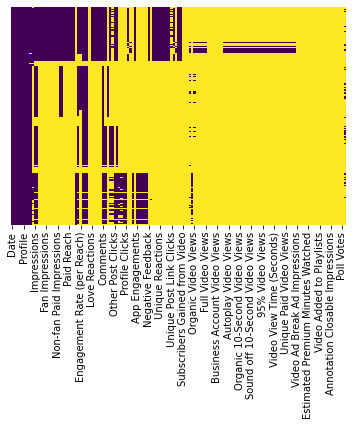

In [20]:
import seaborn as sns
sns.heatmap(merged_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
merged_df['Post Type'].unique()

array(['Post', 'Tweet'], dtype=object)

In [22]:
merged_df['Content Type'].unique()

array(['Video', 'Photo', 'Text', 'Link', 'Carousel', 'Poll', 'Document'],
      dtype=object)

# Getting Columns with some unique values for Object Data type

In [23]:
# Get the columns with object data type
object_columns = merged_df.select_dtypes(include=['object'])

# Initialize a list to store the columns with a maximum of 20 unique values
selected_columns = []

# Iterate through object columns
for column in object_columns.columns:
    unique_values = merged_df[column].nunique()
    if unique_values <= 20:
        print(f"Column: {column}, Unique Values: {unique_values}")
        print(merged_df[column].unique())
        selected_columns.append(column)

# Now, 'selected_columns' contains the names of columns with <= 20 unique values

Column: Network, Unique Values: 4
['Facebook' 'Instagram' 'LinkedIn' 'Twitter']
Column: Post Type, Unique Values: 2
['Post' 'Tweet']
Column: Content Type, Unique Values: 7
['Video' 'Photo' 'Text' 'Link' 'Carousel' 'Poll' 'Document']
Column: Profile, Unique Values: 3
['Stanbic IBTC' 'stanbicibtc' "'@StanbicIBTC"]
Column: Sent by, Unique Values: 12
['Damilare Oyekanmi' ' ' 'Aramide Salami' 'Blessing Ubah' 'Sophia Amuka'
 'Kemi Amoo' 'Dunni Ogunsanya' 'Lilian Ibekwe' 'Rebecca Oyebode'
 'Kanayo Obiano' 'Philip Nwagwunor' 'Patience Nnaji']
Column: Paid Video View Time (Seconds), Unique Values: 15
['0' nan '20,611.98' '110.2' '2,365.8' '9,564' '-19.9' '587.13' '213.19'
 '976.64' '222.62' '-29.3' '154.86' '1.22' '20.62' 0.0]


# Getting Columns with some unique values for Float Data type

In [24]:
float_columns = merged_df.select_dtypes(include=['float64'])

# Initialize a list to store the columns with a maximum of 20 unique values
selected_columns = []

# Iterate through float columns
for column in float_columns.columns:
    unique_values = merged_df[column].nunique()
    if unique_values <= 20:
        print(f"Column: {column}, Unique Values: {unique_values}")
        print(merged_df[column].unique())
        selected_columns.append(column)

# Now, 'selected_columns' contains the names of float columns with <= 20 unique values

Column: Paid Impressions, Unique Values: 1
[ 0. nan]
Column: Fan Paid Impressions, Unique Values: 1
[ 0. nan]
Column: Non-fan Paid Impressions, Unique Values: 1
[ 0. nan]
Column: Paid Reach, Unique Values: 1
[ 0. nan]
Column: Fan Paid Reach, Unique Values: 1
[ 0. nan]
Column: Dislikes, Unique Values: 0
[nan]
Column: Wow Reactions, Unique Values: 13
[  0.   4.   2.   1.   3.   5.  12.   6.   7. 134. 163.  42.  16.  nan]
Column: Sad Reactions, Unique Values: 7
[ 0.  2.  1.  3.  6.  5.  4. nan]
Column: Angry Reactions, Unique Values: 14
[ 0.  1.  3. 20.  4.  6.  2.  5. 10.  9.  8. 14.  7. 21. nan]
Column: Answers, Unique Values: 13
[  0. 314. 119.  93. 112.  73. 101.  60.  52.  58.  10.  31.  39.  nan]
Column: App Engagements, Unique Values: 3
[nan  0.  1.  2.]
Column: App Install Attempts, Unique Values: 1
[nan  0.]
Column: App Opens, Unique Values: 3
[nan  0.  1.  2.]
Column: Follows from Post, Unique Values: 10
[nan  0.  1.  2.  3.  8. 15.  6.  5. 21.  4.]
Column: Unfollows from Post, 

In [25]:
merged_df.head()

Date                           Post ID   Network Post Type  \
0  12/17/2022 5:08 pm  253788558082460_5441020446025886  Facebook      Post   
1   5/4/2019 10:01 am  253788558082460_2001824979945467  Facebook      Post   
2    6/2/2020 9:00 pm  253788558082460_2768996106561680  Facebook      Post   
3   5/9/2022 10:37 am  253788558082460_4808157902645480  Facebook      Post   
4  7/18/2021 10:00 am  253788558082460_3890983261029620  Facebook      Post   

  Content Type       Profile            Sent by  \
0        Video  Stanbic IBTC  Damilare Oyekanmi   
1        Photo  Stanbic IBTC                      
2        Photo  Stanbic IBTC                      
3        Photo  Stanbic IBTC  Damilare Oyekanmi   
4        Photo  Stanbic IBTC                      

                                                Link  \
0  https://www.facebook.com/253788558082460/posts...   
1  https://www.facebook.com/253788558082460/posts...   
2  https://www.facebook.com/StanbicIBTC/photos/a....   
3  https://www.facebook.com/StanbicIBTC/photos/a....   
4  https://www.facebook.com/StanbicIBTC/photos/a....   

                                                Post  \
0  We celebrated recently with Novare, one of our...   
1  N5k can get you started today. Call 01 280 126...   
2  Still not sure whether to invest in the FGN Bo...   
3  Let nothing stop you from achieving your goals...   
4  If you were to pick one wish, what would it be...   

                                      Linked Content Impressions  \
0  https://www.facebook.com/StanbicIBTC/videos/53...     207,378   
1  https://www.facebook.com/StanbicIBTC/photos/a....     125,784   
2  https://www.facebook.com/StanbicIBTC/photos/a....      89,699   
3  https://www.facebook.com/StanbicIBTC/photos/a....      79,118   
4  https://www.facebook.com/StanbicIBTC/photos/a....      76,759   

  Organic Impressions Viral Impressions Non-viral Impressions  \
0             207,378                 5               207,373   
1             125,784            23,926               101,858   
2              89,699             9,319                80,380   
3              79,118               170                78,948   
4              76,759            20,443                56,316   

   Paid Impressions Fan Impressions Fan Organic Impressions  \
0               0.0           1,147                   1,147   
1               0.0         103,287                 103,287   
2               0.0          79,873                  79,873   
3               0.0           3,352                   3,352   
4               0.0          55,174                  55,174   

   Fan Paid Impressions Non-fan Impressions Non-fan Organic Impressions  \
0                   0.0             206,231                     206,231   
1                   0.0              22,497                      22,497   
2                   0.0               9,826                       9,826   
3                   0.0              75,766                      75,766   
4                   0.0              21,585                      21,585   

   Non-fan Paid Impressions    Reach Organic Reach Viral Reach  \
0                       0.0  207,378       207,378           4   
1                       0.0   92,009        92,009      17,238   
2                       0.0   84,347        84,347       8,910   
3                       0.0   78,407        78,407         166   
4                       0.0   74,035        74,035      20,531   

  Non-viral Reach  Paid Reach Fan Reach  Fan Paid Reach Potential Reach  \
0         213,627         0.0     1,112             0.0             NaN   
1          76,074         0.0    76,764             0.0             NaN   
2          75,068         0.0    74,322             0.0             NaN   
3          78,237         0.0     3,245             0.0             NaN   
4          55,026         0.0    53,782             0.0             NaN   

  Engagement Rate (per Impression) Engagement Rate (per Reach) Engagements  \
0    

In [26]:
# merged_df.set_index('Date')[['Likes', 'Shares', 'Comments']].plot(figsize=(15,5))
# plt.title("Engagement Metrics Over Time")
# plt.show()


# import matplotlib.pyplot as plt
# merged_df['Likes'].plot.hist()
# plt.xlabel('X-axis label')
# plt.ylabel('Frequency')
# plt.title('Histogram of Likes')
# plt.show()


### DATA PREPROCESSING

# create df to retain only those columns that have less than 80% missing values, effectively removing columns with a significant number of missing values from the DataFrame.

In [27]:
df = pd.DataFrame(merged_df.loc[:, merged_df.isnull().mean() < .7])

In [28]:
quality_report(df)

Total NaN  Percent of NaN  Nunique   Dtype
Post Link Clicks                      24408       67.627175      407  object
Linked Content                        21545       59.694669    13946  object
Engagement Rate (per Reach)           21098       58.456168     1586  object
Other Post Clicks                     19357       53.632384      785  object
Reach                                 18683       51.764934     4884  object
Organic Reach                         18683       51.764934     4771  object
Click-Through Rate                    17254       47.805608      713  object
Shares                                13025       36.088330      225  object
Post Clicks (All)                     13025       36.088330      844  object
Engagement Rate (per Impression)       5943       16.466253     1571  object
Impressions                            4509       12.493073     8746  object
Organic Impressions                    4509       12.493073     8711  object
Engagements                            3025        8.381359     1316  object
Reactions                              3025        8.381359      797  object
Likes                                  3025        8.381359      777  object
Comments                               3025        8.381359      428  object
Post                                    292        0.809044    31049  object
Link                                     52        0.144076    35805  object
Post ID                                   0        0.000000    36092  object
Sent by                                   0        0.000000       12  object
Profile                                   0        0.000000        3  object
Content Type                              0        0.000000        7  object
Post Type                                 0        0.000000        2  object
Network                                   0        0.000000        4  object
Date                                      0        0.000000    27656  object

<AxesSubplot:>

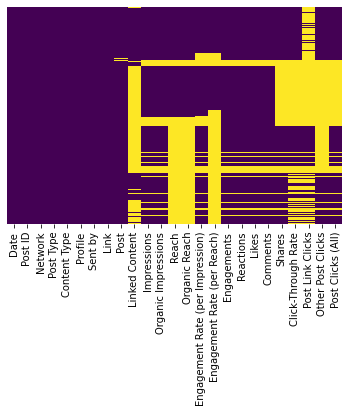

In [29]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
df.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Linked Content', 'Impressions',
       'Organic Impressions', 'Reach', 'Organic Reach',
       'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)',
       'Engagements', 'Reactions', 'Likes', 'Comments', 'Shares',
       'Click-Through Rate', 'Post Link Clicks', 'Other Post Clicks',
       'Post Clicks (All)'],
      dtype='object')

In [31]:
df['Linked Content'].unique()

array(['https://www.facebook.com/StanbicIBTC/videos/532359832150282/',
       'https://www.facebook.com/StanbicIBTC/photos/a.274142602713722/2001824979945467/?type=3',
       'https://www.facebook.com/StanbicIBTC/photos/a.274142602713722/2768996106561680/?type=3',
       ..., 'http://bit.ly/13hxcpU', 'http://bit.ly/X5GFgB',
       'http://new.livestream.com/smwlagos/events/1862306'], dtype=object)

# Print the number of unique values for all columns and, for columns with less than or equal to 20 unique values, it will also print the actual unique values.

In [32]:
# Get all columns in the DataFrame
all_columns = df.columns

# Iterate through all columns
for column in all_columns:
    unique_values = df[column].nunique()
    print(f"Column: {column}, Unique Values: {unique_values}")
    
    # Check if the number of unique values is less than or equal to 20
    if unique_values <= 20:
        print(df[column].unique())


Column: Date, Unique Values: 27656
Column: Post ID, Unique Values: 36092
Column: Network, Unique Values: 4
['Facebook' 'Instagram' 'LinkedIn' 'Twitter']
Column: Post Type, Unique Values: 2
['Post' 'Tweet']
Column: Content Type, Unique Values: 7
['Video' 'Photo' 'Text' 'Link' 'Carousel' 'Poll' 'Document']
Column: Profile, Unique Values: 3
['Stanbic IBTC' 'stanbicibtc' "'@StanbicIBTC"]
Column: Sent by, Unique Values: 12
['Damilare Oyekanmi' ' ' 'Aramide Salami' 'Blessing Ubah' 'Sophia Amuka'
 'Kemi Amoo' 'Dunni Ogunsanya' 'Lilian Ibekwe' 'Rebecca Oyebode'
 'Kanayo Obiano' 'Philip Nwagwunor' 'Patience Nnaji']
Column: Link, Unique Values: 35805
Column: Post, Unique Values: 31049
Column: Linked Content, Unique Values: 13946
Column: Impressions, Unique Values: 8746
Column: Organic Impressions, Unique Values: 8711
Column: Reach, Unique Values: 4884
Column: Organic Reach, Unique Values: 4771
Column: Engagement Rate (per Impression), Unique Values: 1571
Column: Engagement Rate (per Reach), Uniq

In [33]:
df['Organic Impressions'].unique()

array(['207,378', '125,784', '89,699', ..., '143', '18,111', '30,445'],
      dtype=object)

In [34]:
df['Impressions'].unique()

array(['207,378', '125,784', '89,699', ..., '143', '18,111', '30,445'],
      dtype=object)

In [35]:

# Check if the unique values of the two columns are equal
are_values_equal = np.array_equal(df['Organic Impressions'].unique(), df['Impressions'].unique())

# Print the result
if are_values_equal:
    print("The unique values in 'Organic Impressions' and 'Impressions' are the same.")
else:
    print("The unique values in 'Organic Impressions' and 'Impressions' are not the same.")


The unique values in 'Organic Impressions' and 'Impressions' are not the same.


In [36]:
# Find the unique values in each column
organic_impressions_unique = set(df['Organic Impressions'].unique())
impressions_unique = set(df['Impressions'].unique())

# Calculate the number of unique values that are different
different_values_count = len(organic_impressions_unique.symmetric_difference(impressions_unique))

# Print the count of different unique values
print(f"The number of different unique values between 'Organic Impressions' and 'Impressions' is: {different_values_count}")


The number of different unique values between 'Organic Impressions' and 'Impressions' is: 203


In [37]:
# Initialize a flag to indicate if values are the same
values_are_equal = True

# Check if the values in the two columns are the same
for val1, val2 in zip(df['Organic Impressions'], df['Impressions']):
    if val1 != val2:
        values_are_equal = False
        break

# Print the result
if values_are_equal:
    print("The values in 'Organic Impressions' and 'Impressions' are the same.")
else:
    print("The values in 'Organic Impressions' and 'Impressions' are not the same.")


The values in 'Organic Impressions' and 'Impressions' are not the same.


In [38]:
# Initialize a list to store positions where values are not the same
differing_positions = []

# Check if the values in the two columns are the same and track differing positions
for i, (val1, val2) in enumerate(zip(df['Organic Impressions'], df['Impressions'])):
    if val1 != val2:
        differing_positions.append(i)

# Count the differing values
num_differing_values = len(differing_positions)

# Print the result
if num_differing_values == 0:
    print("All values in 'Organic Impressions' and 'Impressions' are the same.")
else:
    print(f"{num_differing_values} values in 'Organic Impressions' and 'Impressions' are not the same.")
    # print(f"Differing positions: {differing_positions}")


4753 values in 'Organic Impressions' and 'Impressions' are not the same.


In [39]:
df['Reach'].unique()

array(['207,378', '92,009', '84,347', ..., '7', '5', '1'], dtype=object)

In [40]:
# df['Organic Reach'].unique()

In [41]:
# Initialize a flag to indicate if values are the same
values_are_equal = True

# Check if the values in the two columns are the same
for val1, val2 in zip(df['Organic Reach'], df['Reach']):
    if val1 != val2:
        values_are_equal = False
        break

# Print the result
if values_are_equal:
    print("The values in 'Organic Reach and 'Reach' are the same.")
else:
    print("The values in 'Organic Reach' and 'Reach' are not the same.")


The values in 'Organic Reach' and 'Reach' are not the same.


In [42]:
df['Click-Through Rate'].unique() 

array(['0%', '0.04%', '0.62%', '0.06%', '0.16%', '0.01%', '0.17%',
       '0.44%', '0.13%', '0.23%', '0.83%', '0.2%', '0.18%', '0.38%',
       '0.15%', '0.34%', '0.45%', '0.26%', '0.19%', '0.05%', '0.43%',
       '0.27%', '0.87%', '0.28%', '0.07%', '0.21%', '2.11%', '0.22%',
       '0.09%', '0.36%', '0.02%', '0.08%', '0.3%', '0.49%', '0.25%',
       '0.42%', '0.52%', '0.03%', '0.41%', '0.74%', '0.31%', '0.1%',
       '1.05%', '2.78%', '0.14%', '0.66%', '0.47%', '0.48%', '0.29%',
       '0.54%', '0.32%', '0.12%', '0.64%', '0.11%', '0.99%', '0.71%',
       '0.37%', '0.63%', '0.46%', '0.75%', '0.58%', '0.53%', '0.69%',
       '1.46%', '1.47%', '0.61%', '0.39%', '0.24%', '0.93%', '0.84%',
       '0.76%', '0.33%', '0.65%', '0.73%', '0.6%', '0.89%', '0.4%',
       '1.34%', '0.81%', '0.72%', '1.69%', '1.9%', '1.18%', '0.86%',
       '0.51%', '0.67%', '0.35%', '0.91%', '0.56%', '0.79%', '0.77%',
       '0.5%', '0.55%', '0.88%', '0.57%', '1%', '0.85%', '1.09%', '0.68%',
       '1.13%', '1.38%',

In [43]:
df.head()

Date                           Post ID   Network Post Type  \
0  12/17/2022 5:08 pm  253788558082460_5441020446025886  Facebook      Post   
1   5/4/2019 10:01 am  253788558082460_2001824979945467  Facebook      Post   
2    6/2/2020 9:00 pm  253788558082460_2768996106561680  Facebook      Post   
3   5/9/2022 10:37 am  253788558082460_4808157902645480  Facebook      Post   
4  7/18/2021 10:00 am  253788558082460_3890983261029620  Facebook      Post   

  Content Type       Profile            Sent by  \
0        Video  Stanbic IBTC  Damilare Oyekanmi   
1        Photo  Stanbic IBTC                      
2        Photo  Stanbic IBTC                      
3        Photo  Stanbic IBTC  Damilare Oyekanmi   
4        Photo  Stanbic IBTC                      

                                                Link  \
0  https://www.facebook.com/253788558082460/posts...   
1  https://www.facebook.com/253788558082460/posts...   
2  https://www.facebook.com/StanbicIBTC/photos/a....   
3  https://www.facebook.com/StanbicIBTC/photos/a....   
4  https://www.facebook.com/StanbicIBTC/photos/a....   

                                                Post  \
0  We celebrated recently with Novare, one of our...   
1  N5k can get you started today. Call 01 280 126...   
2  Still not sure whether to invest in the FGN Bo...   
3  Let nothing stop you from achieving your goals...   
4  If you were to pick one wish, what would it be...   

                                      Linked Content Impressions  \
0  https://www.facebook.com/StanbicIBTC/videos/53...     207,378   
1  https://www.facebook.com/StanbicIBTC/photos/a....     125,784   
2  https://www.facebook.com/StanbicIBTC/photos/a....      89,699   
3  https://www.facebook.com/StanbicIBTC/photos/a....      79,118   
4  https://www.facebook.com/StanbicIBTC/photos/a....      76,759   

  Organic Impressions    Reach Organic Reach Engagement Rate (per Impression)  \
0             207,378  207,378       207,378                            0.49%   
1             125,784   92,009        92,009                            4.67%   
2              89,699   84,347        84,347                            5.29%   
3              79,118   78,407        78,407                            0.56%   
4              76,759   74,035        74,035                            6.16%   

  Engagement Rate (per Reach) Engagements Reactions Likes Comments Shares  \
0                       0.49%       1,024       179   176       59    2.0   
1                       6.39%       5,876       762   747      572   47.0   
2                       5.62%       4,744       465   458      855   29.0   
3                       0.57%         445       102   101       11    2.0   
4                       6.39%       4,730       413   383      869   10.0   

  Click-Through Rate Post Link Clicks Other Post Clicks Post Clicks (All)  
0                 0%              NaN               784               784  
1                 0%              NaN             4,495             4,495  
2                 0%              NaN             3,395             3,395  
3                 0%              NaN               330               330  
4                 0%              NaN             3,438             3,438

In [44]:
# #splitting the year,month and day
# df['year'] = pd.DatetimeIndex(df['created_on']).year
# df['month'] = pd.DatetimeIndex(df['created_on']).month
# df['day'] = pd.DatetimeIndex(df['created_on']).day
# df['Percentage_Column'] = df['Percentage_Column'].str.replace('%', '').astype(float) / 100.0


# Remove Percentage Signs and Commas

In [45]:
# Remove percentage signs and commas, and convert to float
df['Engagement Rate (per Impression)'] = df['Engagement Rate (per Impression)'].str.replace('%', '').str.replace(',', '').astype(float) / 100.0
df['Engagement Rate (per Reach)'] = df['Engagement Rate (per Reach)'].str.replace('%', '').str.replace(',', '').astype(float) / 100.0


In [46]:
df.head() 

Date                           Post ID   Network Post Type  \
0  12/17/2022 5:08 pm  253788558082460_5441020446025886  Facebook      Post   
1   5/4/2019 10:01 am  253788558082460_2001824979945467  Facebook      Post   
2    6/2/2020 9:00 pm  253788558082460_2768996106561680  Facebook      Post   
3   5/9/2022 10:37 am  253788558082460_4808157902645480  Facebook      Post   
4  7/18/2021 10:00 am  253788558082460_3890983261029620  Facebook      Post   

  Content Type       Profile            Sent by  \
0        Video  Stanbic IBTC  Damilare Oyekanmi   
1        Photo  Stanbic IBTC                      
2        Photo  Stanbic IBTC                      
3        Photo  Stanbic IBTC  Damilare Oyekanmi   
4        Photo  Stanbic IBTC                      

                                                Link  \
0  https://www.facebook.com/253788558082460/posts...   
1  https://www.facebook.com/253788558082460/posts...   
2  https://www.facebook.com/StanbicIBTC/photos/a....   
3  https://www.facebook.com/StanbicIBTC/photos/a....   
4  https://www.facebook.com/StanbicIBTC/photos/a....   

                                                Post  \
0  We celebrated recently with Novare, one of our...   
1  N5k can get you started today. Call 01 280 126...   
2  Still not sure whether to invest in the FGN Bo...   
3  Let nothing stop you from achieving your goals...   
4  If you were to pick one wish, what would it be...   

                                      Linked Content Impressions  \
0  https://www.facebook.com/StanbicIBTC/videos/53...     207,378   
1  https://www.facebook.com/StanbicIBTC/photos/a....     125,784   
2  https://www.facebook.com/StanbicIBTC/photos/a....      89,699   
3  https://www.facebook.com/StanbicIBTC/photos/a....      79,118   
4  https://www.facebook.com/StanbicIBTC/photos/a....      76,759   

  Organic Impressions    Reach Organic Reach  \
0             207,378  207,378       207,378   
1             125,784   92,009        92,009   
2              89,699   84,347        84,347   
3              79,118   78,407        78,407   
4              76,759   74,035        74,035   

   Engagement Rate (per Impression)  Engagement Rate (per Reach) Engagements  \
0                            0.0049                       0.0049       1,024   
1                            0.0467                       0.0639       5,876   
2                            0.0529                       0.0562       4,744   
3                            0.0056                       0.0057         445   
4                            0.0616                       0.0639       4,730   

  Reactions Likes Comments Shares Click-Through Rate Post Link Clicks  \
0       179   176       59    2.0                 0%              NaN   
1       762   747      572   47.0                 0%              NaN   
2       465   458      855   29.0                 0%              NaN   
3       102   101       11    2.0                 0%              NaN   
4       413   383      869   10.0                 0%              NaN   

  Other Post Clicks Post Clicks (All)  
0               784               784  
1             4,495             4,495  
2             3,395             3,395  
3               330               330  
4             3,438             3,438

In [47]:
# Group by 'Category' and 'Subcategory' and calculate the sum of 'Value'
grouped = df.groupby(['Sent by', 'Network'])['Engagement Rate (per Reach)'].sum().reset_index()
# Rename the 'Engagement Rate (per Reach)' column to 'Sum_Engagement Rate (per Reach)'
grouped = grouped.rename(columns={'Engagement Rate (per Reach)': 'Sum_Engagement Rate (per Reach)'})
print(grouped)

              Sent by    Network  Sum_Engagement Rate (per Reach)
0                       Facebook                         206.9364
1                      Instagram                       67690.3885
2                       LinkedIn                           0.0000
3                        Twitter                           0.0000
4      Aramide Salami   Facebook                          11.7944
5      Aramide Salami  Instagram                       36768.4019
6      Aramide Salami   LinkedIn                           0.0000
7      Aramide Salami    Twitter                           0.0000
8       Blessing Ubah   Facebook                          10.5306
9       Blessing Ubah  Instagram                          91.0670
10      Blessing Ubah   LinkedIn                           0.0000
11      Blessing Ubah    Twitter                           0.0000
12  Damilare Oyekanmi   Facebook                         170.9830
13  Damilare Oyekanmi  Instagram                           2.6825
14  Damila

# CONVERTING OBJECT COLUMNS TO INTEGERS

In [48]:
# List of columns to convert to integer
int_columns = [
    'Impressions', 'Organic Impressions', 'Reach', 'Organic Reach',
    'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)',
    'Engagements', 'Reactions', 'Likes', 'Comments', 'Shares',
    'Click-Through Rate', 'Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)'
]

# Convert selected columns to integer
df[int_columns] = df[int_columns].apply(pd.to_numeric, errors='coerce', downcast='integer')

# The 'errors' argument with 'coerce' will handle non-numeric values by converting them to NaN.
# The 'downcast' argument with 'integer' helps optimize memory usage for large data if possible.

# Ensure that the columns you want to remain as objects are not converted
columns_to_remain_as_objects = ['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile', 'Sent by', 'Link', 'Post', 'Linked Content']

# If the columns are not already in the 'int_columns' list, set their data type as 'object'
for column in columns_to_remain_as_objects:
    if column not in int_columns:
        df[column] = df[column].astype('object')


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36092 entries, 0 to 36091
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              36092 non-null  object 
 1   Post ID                           36092 non-null  object 
 2   Network                           36092 non-null  object 
 3   Post Type                         36092 non-null  object 
 4   Content Type                      36092 non-null  object 
 5   Profile                           36092 non-null  object 
 6   Sent by                           36092 non-null  object 
 7   Link                              36040 non-null  object 
 8   Post                              35800 non-null  object 
 9   Linked Content                    14547 non-null  object 
 10  Impressions                       7571 non-null   float64
 11  Organic Impressions               7571 non-null   float64
 12  Reac

# Checking for Anomalies

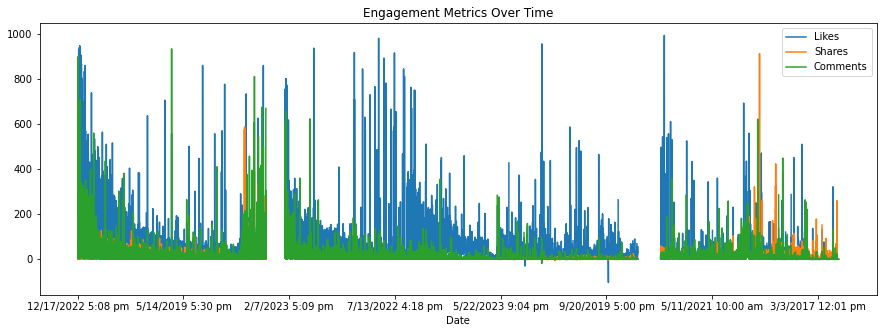

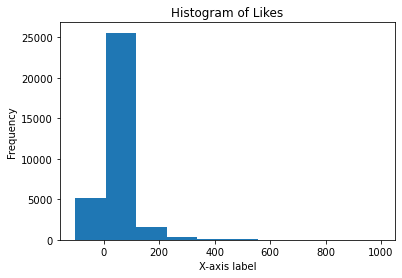

In [50]:
df.set_index('Date')[['Likes', 'Shares', 'Comments']].plot(figsize=(15,5))
plt.title("Engagement Metrics Over Time")
plt.show()


import matplotlib.pyplot as plt
df['Likes'].plot.hist()
plt.xlabel('X-axis label')
plt.ylabel('Frequency')
plt.title('Histogram of Likes')
plt.show()


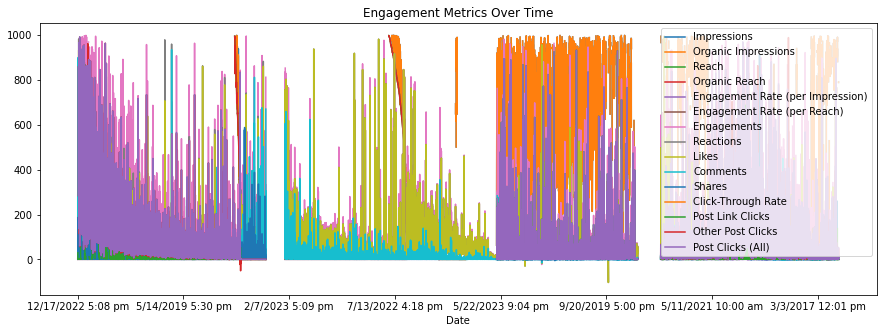

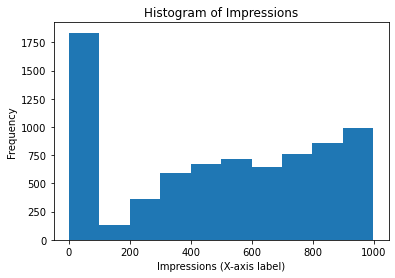

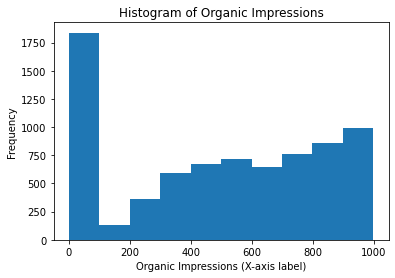

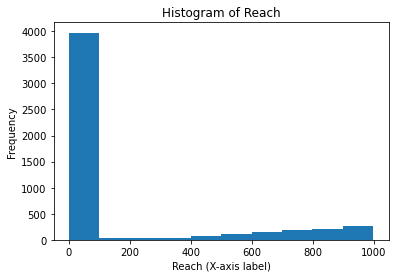

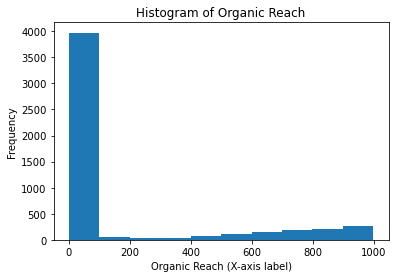

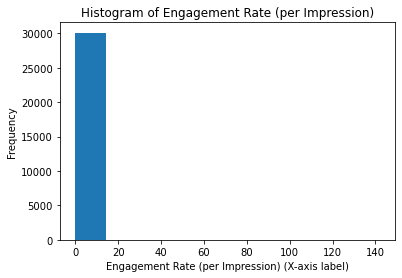

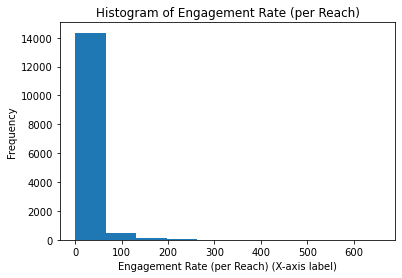

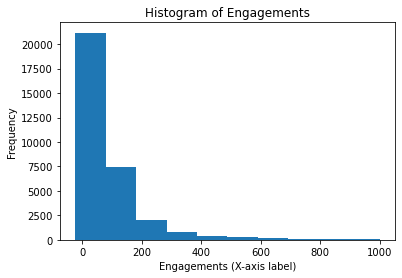

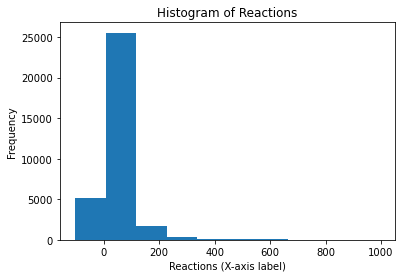

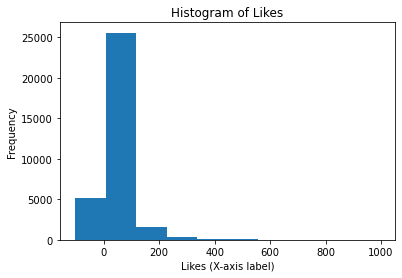

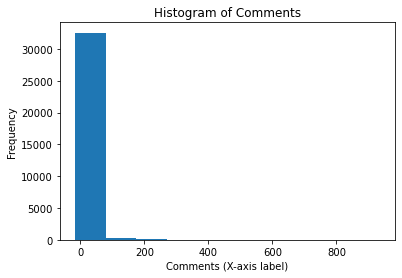

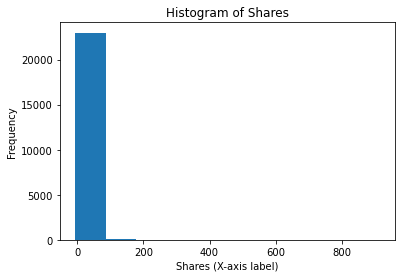

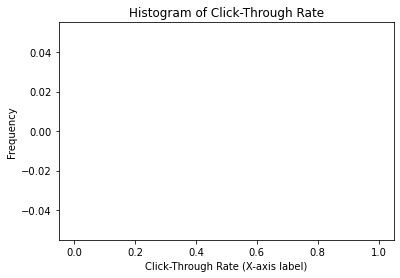

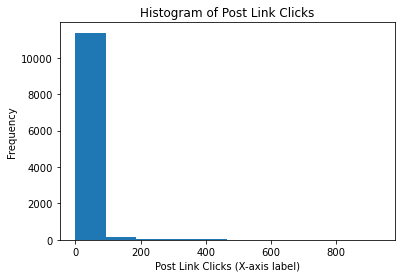

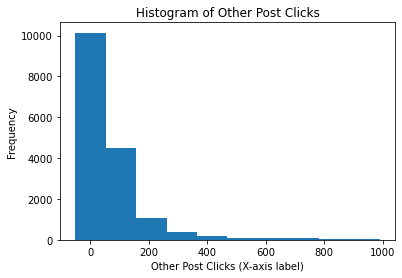

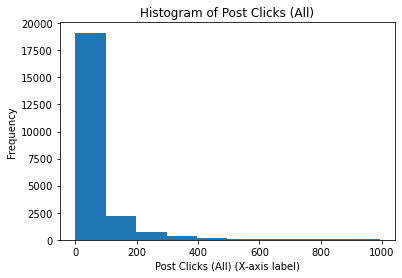

In [51]:
numerical_columns = [
    'Impressions', 'Organic Impressions', 'Reach', 'Organic Reach',
    'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)',
    'Engagements', 'Reactions', 'Likes', 'Comments', 'Shares',
    'Click-Through Rate', 'Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)'
] # List of numerical column names

# Plot engagement metrics over time for selected numerical columns
df.set_index('Date')[numerical_columns].plot(figsize=(15, 5))
plt.title("Engagement Metrics Over Time")
plt.show()

# Create histograms for each numerical column
for column in numerical_columns:
    df[column].plot.hist()
    plt.xlabel(f'{column} (X-axis label)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


### REMOVING OUTLIERS

In [52]:
#  def remove_outliers(data):
#     for col in data:
#         high = data[col].mean() + 3*data[col].std()
#         low = data[col].mean() - 3*data[col].std()
#         data[col] = np.where(
#             data[col] > high,
#             high,
#             np.where(
#                 data[col] < low,
#                 low,
#                 data[col]))
        
# remove_outliers(df)


def remove_outliers(data):
    for col in data.columns:
        if data[col].dtype != 'object':  # Check if the column is not of 'object' data type
            high = data[col].mean() + 3 * data[col].std()
            low = data[col].mean() - 3 * data[col].std()
            data[col] = np.where(
                data[col] > high,
                high,
                np.where(
                    data[col] < low,
                    low,
                    data[col]))

# Call the function with my DataFrame
remove_outliers(df)


### Identify the Distribution:

### Looking at the shape of the distribution. Is it normal (bell-shaped), skewed (left or right), bimodal (having two peaks), or something else? Understanding the distribution helps in assessing the overall pattern in the data.

### Depending on this distribution and the nature of this data, I might decide to impute missing values. Imputation methods could include mean, median, mode, or more sophisticated techniques like regression imputation.  -->

In [53]:
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

count    7571.000000
mean      487.477084
std       339.798634
min         0.000000
25%       144.500000
50%       525.000000
75%       795.000000
max       999.000000
Name: Impressions, dtype: float64


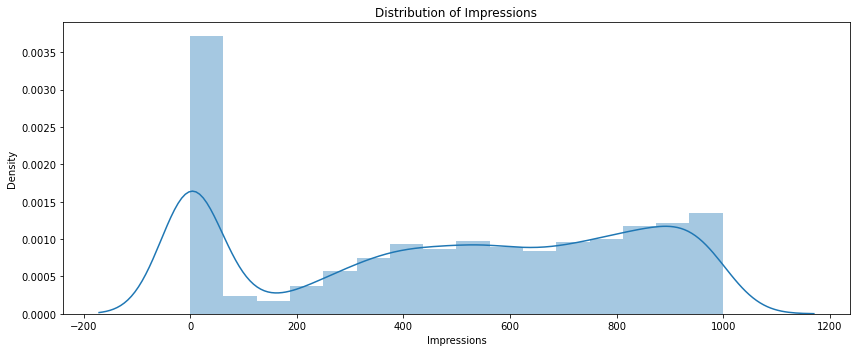

count    7571.000000
mean      487.465460
std       339.794222
min         0.000000
25%       144.500000
50%       525.000000
75%       795.000000
max       999.000000
Name: Organic Impressions, dtype: float64


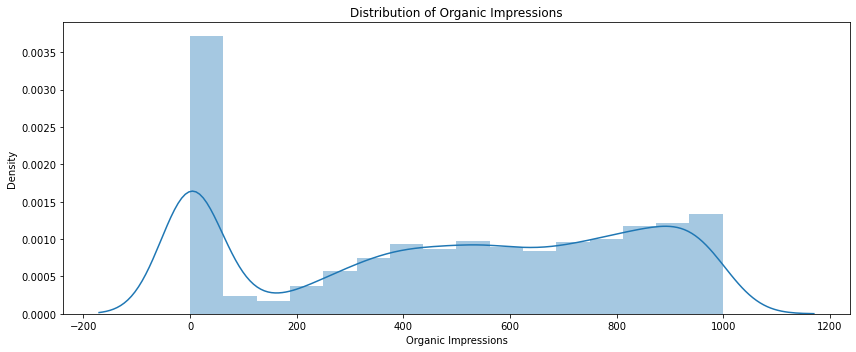

count    5080.000000
mean      155.884646
std       310.744033
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       998.000000
Name: Reach, dtype: float64


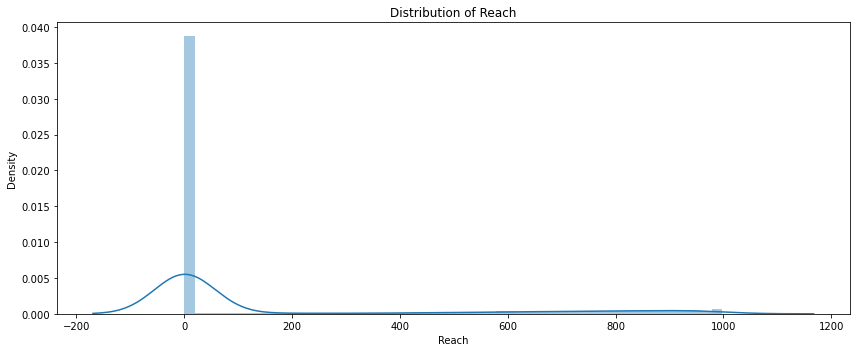

count    5082.000000
mean      156.155451
std       310.958407
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       998.000000
Name: Organic Reach, dtype: float64


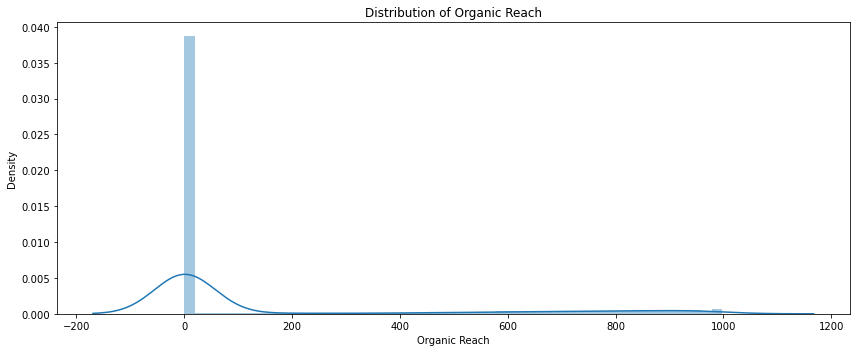

count    30149.000000
mean         0.063676
std          0.427275
min         -0.012000
25%          0.019400
50%          0.026800
75%          0.037200
max          7.130074
Name: Engagement Rate (per Impression), dtype: float64


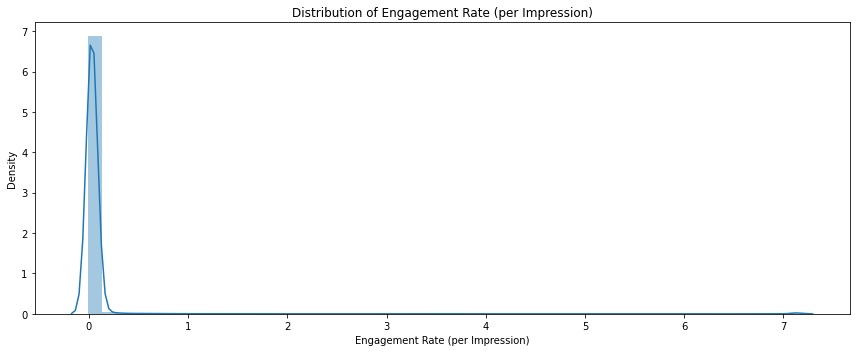

count    14994.000000
mean         5.730513
std         18.936536
min          0.000000
25%          0.022300
50%          0.030600
75%          0.046500
max         86.822558
Name: Engagement Rate (per Reach), dtype: float64


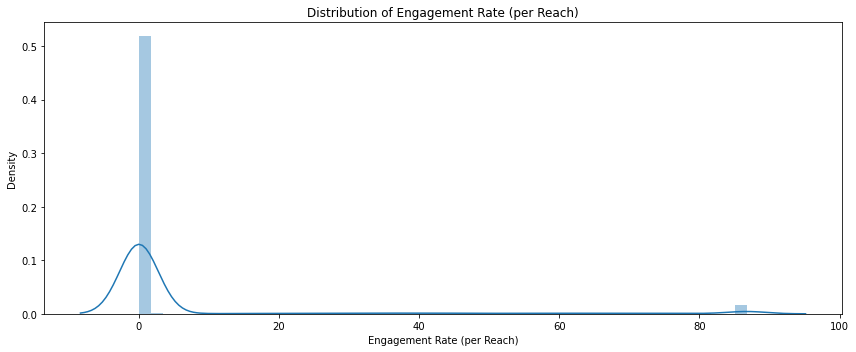

count    32691.000000
mean        89.644655
std        101.241294
min        -23.000000
25%         27.000000
50%         55.000000
75%        107.000000
max        468.295737
Name: Engagements, dtype: float64


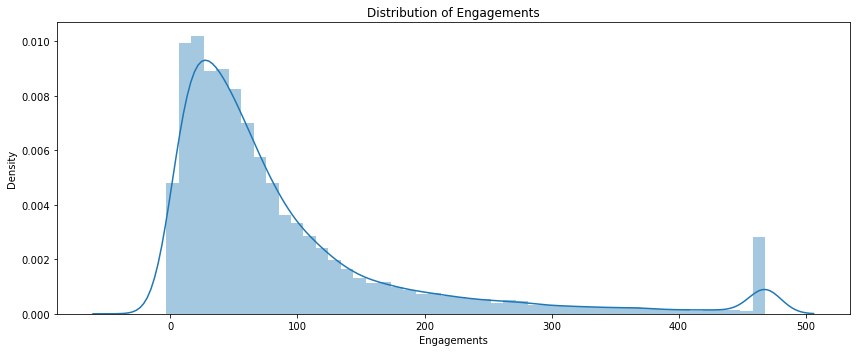

count    32996.000000
mean        41.241822
std         48.210116
min       -103.000000
25%         10.000000
50%         24.000000
75%         54.000000
max        245.587977
Name: Reactions, dtype: float64


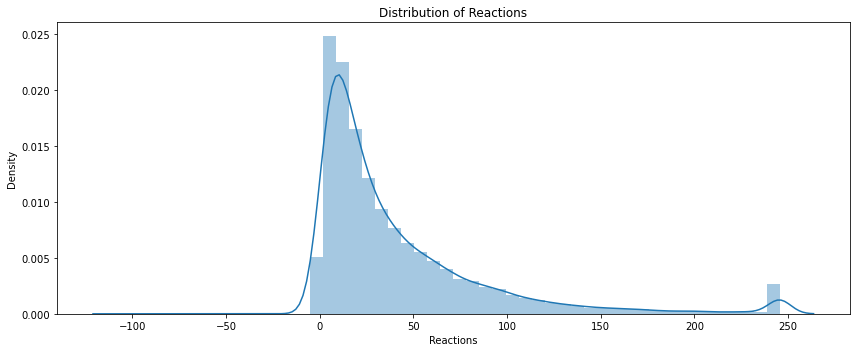

count    32996.000000
mean        40.722500
std         47.200715
min       -103.000000
25%         10.000000
50%         24.000000
75%         54.000000
max        238.099515
Name: Likes, dtype: float64


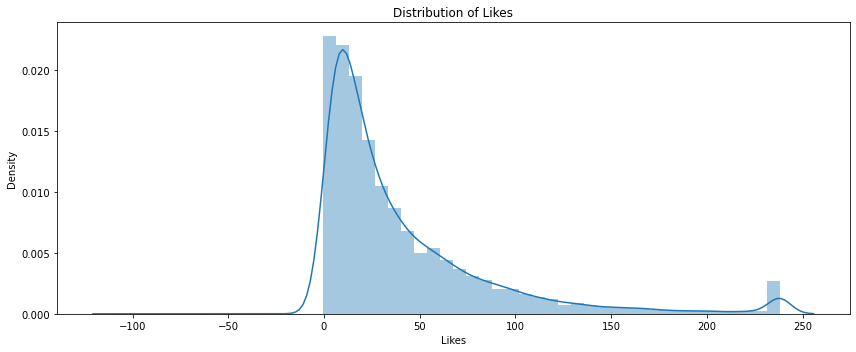

count    33061.000000
mean         7.992691
std         15.849776
min        -16.000000
25%          0.000000
50%          2.000000
75%          8.000000
max        101.235781
Name: Comments, dtype: float64


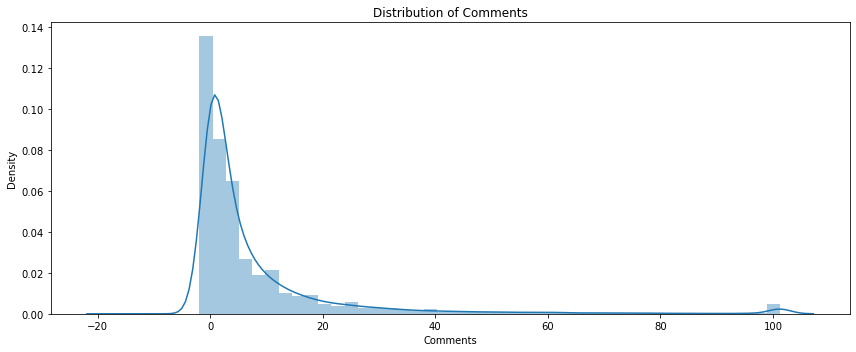

count    23066.000000
mean         5.877306
std          9.659204
min         -6.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         54.330481
Name: Shares, dtype: float64


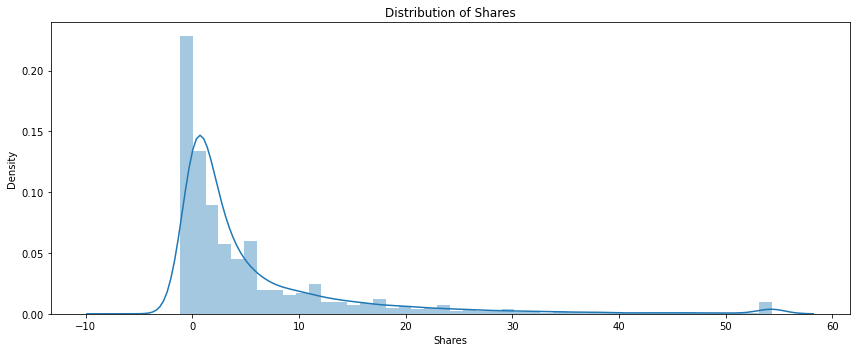

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Click-Through Rate, dtype: float64


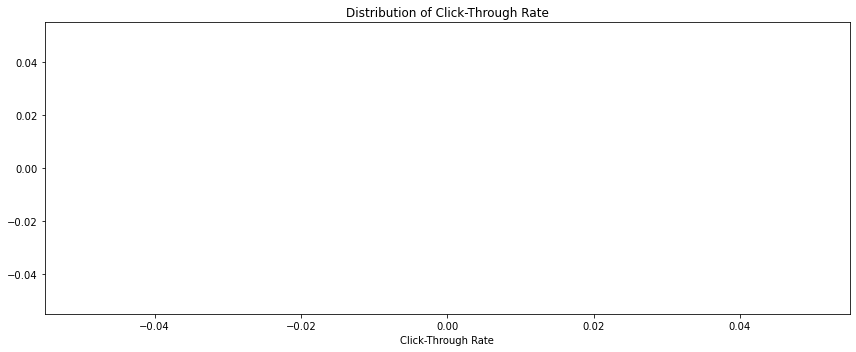

count    11656.000000
mean        13.036762
std         25.317772
min          0.000000
25%          2.000000
50%          5.000000
75%         13.000000
max        171.510010
Name: Post Link Clicks, dtype: float64


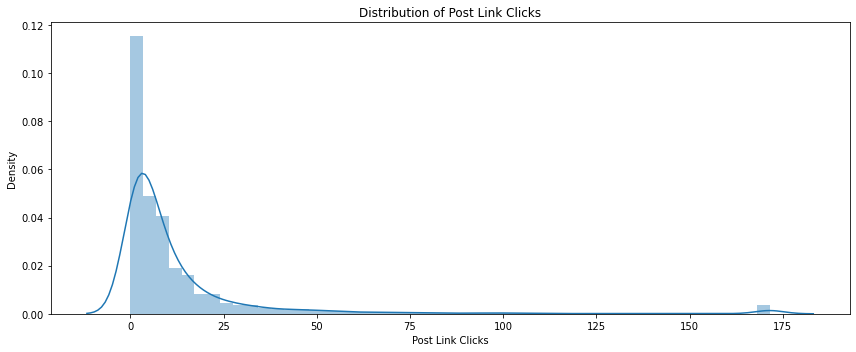

count    16615.000000
mean        69.902052
std         89.242762
min        -51.000000
25%         16.000000
50%         38.000000
75%         83.000000
max        416.101723
Name: Other Post Clicks, dtype: float64


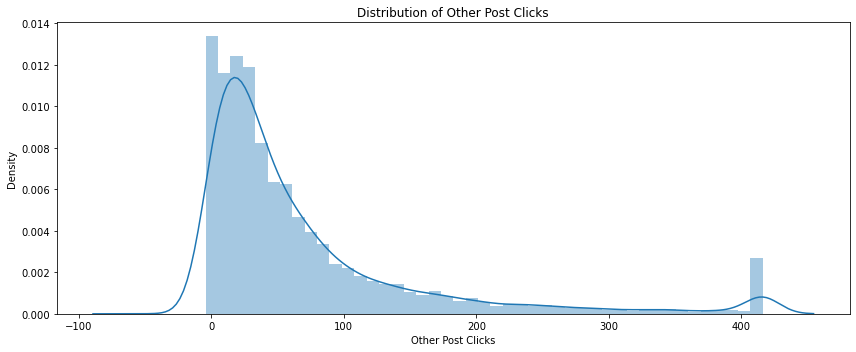

count    22913.000000
mean        57.107120
std         80.954636
min          0.000000
25%          8.000000
50%         26.000000
75%         68.000000
max        381.061231
Name: Post Clicks (All), dtype: float64


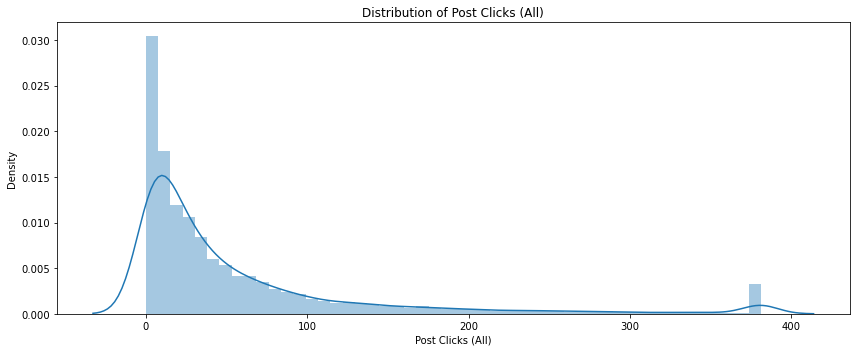

In [54]:
numeric_distribution_plot(df)

# TREATING MISSING VALUES

### Distribution of Impressions and Organic Impressionss Column looks like two-Peaked Data (Bimodal): It suggests that you might be dealing with two separate populations within this data. In this case, I will consider filling missing values separately for each group or mode, using appropriate measures like the mean or median for each subgroup.


In [55]:
df.groupby(['Network'])['Impressions'].mean()#filling with mean

Network
Facebook     109.436200
Instagram    477.544292
LinkedIn     559.888780
Twitter      764.911135
Name: Impressions, dtype: float64

In [56]:
def Impressions(cols):
    Impressions = cols[1]
    Network= cols[0]
    if pd.isnull(Impressions):
        if Network == 'Facebook':
            return 109.436200
        elif Network == 'Intagram' :
            return 477.544292
        elif Network == 'LinkedIn':
            return 559.888780
        else:
            return 764.911135
    else:
        return Impressions

In [57]:
#applying the code to reflect in the dataframe
df['Impressions'] = df[['Network','Impressions']].apply(Impressions,axis=1)

In [58]:
df.groupby(['Network'])['Organic Impressions'].mean()#filling with mean

Network
Facebook     109.375173
Instagram    477.544292
LinkedIn     559.888780
Twitter      764.911135
Name: Organic Impressions, dtype: float64

In [59]:
def Organic_Impressions(cols):
    OrgImpressions = cols[1]
    Network= cols[0]
    if pd.isnull(OrgImpressions):
        if Network == 'Facebook':
            return 109.436200
        elif Network == 'Intagram' :
            return 477.544292
        elif Network == 'LinkedIn':
            return 559.888780
        else:
            return 764.911135
    else:
        return OrgImpressions

In [60]:
#applying the code to reflect in the dataframe
df['Organic Impressions'] = df[['Network','Organic Impressions']].apply(Organic_Impressions,axis=1)

In [61]:
df.head()

Date                           Post ID   Network Post Type  \
0  12/17/2022 5:08 pm  253788558082460_5441020446025886  Facebook      Post   
1   5/4/2019 10:01 am  253788558082460_2001824979945467  Facebook      Post   
2    6/2/2020 9:00 pm  253788558082460_2768996106561680  Facebook      Post   
3   5/9/2022 10:37 am  253788558082460_4808157902645480  Facebook      Post   
4  7/18/2021 10:00 am  253788558082460_3890983261029620  Facebook      Post   

  Content Type       Profile            Sent by  \
0        Video  Stanbic IBTC  Damilare Oyekanmi   
1        Photo  Stanbic IBTC                      
2        Photo  Stanbic IBTC                      
3        Photo  Stanbic IBTC  Damilare Oyekanmi   
4        Photo  Stanbic IBTC                      

                                                Link  \
0  https://www.facebook.com/253788558082460/posts...   
1  https://www.facebook.com/253788558082460/posts...   
2  https://www.facebook.com/StanbicIBTC/photos/a....   
3  https://www.facebook.com/StanbicIBTC/photos/a....   
4  https://www.facebook.com/StanbicIBTC/photos/a....   

                                                Post  \
0  We celebrated recently with Novare, one of our...   
1  N5k can get you started today. Call 01 280 126...   
2  Still not sure whether to invest in the FGN Bo...   
3  Let nothing stop you from achieving your goals...   
4  If you were to pick one wish, what would it be...   

                                      Linked Content  Impressions  \
0  https://www.facebook.com/StanbicIBTC/videos/53...     109.4362   
1  https://www.facebook.com/StanbicIBTC/photos/a....     109.4362   
2  https://www.facebook.com/StanbicIBTC/photos/a....     109.4362   
3  https://www.facebook.com/StanbicIBTC/photos/a....     109.4362   
4  https://www.facebook.com/StanbicIBTC/photos/a....     109.4362   

   Organic Impressions  Reach  Organic Reach  \
0             109.4362    NaN            NaN   
1             109.4362    NaN            NaN   
2             109.4362    NaN            NaN   
3             109.4362    NaN            NaN   
4             109.4362    NaN            NaN   

   Engagement Rate (per Impression)  Engagement Rate (per Reach)  Engagements  \
0                            0.0049                       0.0049          NaN   
1                            0.0467                       0.0639          NaN   
2                            0.0529                       0.0562          NaN   
3                            0.0056                       0.0057        445.0   
4                            0.0616                       0.0639          NaN   

    Reactions       Likes    Comments  Shares  Click-Through Rate  \
0  179.000000  176.000000   59.000000     2.0                 NaN   
1  245.587977  238.099515  101.235781    47.0                 NaN   
2  245.587977  238.099515  101.235781    29.0                 NaN   
3  102.000000  101.000000   11.000000     2.0                 NaN   
4  245.587977  238.099515  101.235781    10.0                 NaN   

   Post Link Clicks  Other Post Clicks  Post Clicks (All)  
0               NaN         416.101723         381.061231  
1               NaN                NaN                NaN  
2               NaN                NaN                NaN  
3               NaN         330.000000         330.000000  
4               NaN                NaN                NaN

#### Engagement,Reactions, Engagement Rate (per Reach), Likes, Comments, Shares,Other Post CLicks and Post CLicks (ALL) are right-Skewed Data and In right-skewed data and the median might be a better measure to use than the mean. The median is less affected by extreme values. Filling missing values with the median is a common strategy for right-skewed data.



In [62]:
# List of columns to fill with median values
columns_to_fill_with_median = [
    'Engagements','Reactions', 'Engagement Rate (per Reach)','Likes', 'Comments', 'Shares','Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)' 
]

# Calculate the medians for each column
medians = df[columns_to_fill_with_median].median()

# Fill the specified columns with their respective medians
df[columns_to_fill_with_median] = df[columns_to_fill_with_median].fillna(medians)


### Reach, Organic Reach and Engagement Rate (per Impression) are normally distributed data, the mean and standard deviation are typically used to describe the data. Filling missing values with the mean or median (if the data has outliers) is often a reasonable approach, as it maintains the overall characteristics of the distribution.


In [63]:
# List of columns to fill with median values
columns_to_fill_with_mean = [
    'Reach', 'Organic Reach','Engagement Rate (per Impression)'
]

# Calculate the medians for each column
means = df[columns_to_fill_with_mean].mean()

# Fill the specified columns with their respective medians
df[columns_to_fill_with_mean] = df[columns_to_fill_with_mean].fillna(means)


In [64]:
df['Click-Through Rate'].unique()

array([nan])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36092 entries, 0 to 36091
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              36092 non-null  object 
 1   Post ID                           36092 non-null  object 
 2   Network                           36092 non-null  object 
 3   Post Type                         36092 non-null  object 
 4   Content Type                      36092 non-null  object 
 5   Profile                           36092 non-null  object 
 6   Sent by                           36092 non-null  object 
 7   Link                              36040 non-null  object 
 8   Post                              35800 non-null  object 
 9   Linked Content                    14547 non-null  object 
 10  Impressions                       36092 non-null  float64
 11  Organic Impressions               36092 non-null  float64
 12  Reac

<AxesSubplot:>

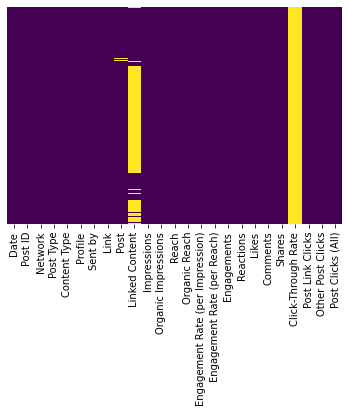

In [66]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
df['Linked Content'].unique()

array(['https://www.facebook.com/StanbicIBTC/videos/532359832150282/',
       'https://www.facebook.com/StanbicIBTC/photos/a.274142602713722/2001824979945467/?type=3',
       'https://www.facebook.com/StanbicIBTC/photos/a.274142602713722/2768996106561680/?type=3',
       ..., 'http://bit.ly/13hxcpU', 'http://bit.ly/X5GFgB',
       'http://new.livestream.com/smwlagos/events/1862306'], dtype=object)

In [68]:
df['Click-Through Rate'].unique()

array([nan])

In [69]:
# Drop these two specified columns
columns_to_drop = ['Click-Through Rate', 'Linked Content']
df = df.drop(columns=columns_to_drop)


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36092 entries, 0 to 36091
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              36092 non-null  object 
 1   Post ID                           36092 non-null  object 
 2   Network                           36092 non-null  object 
 3   Post Type                         36092 non-null  object 
 4   Content Type                      36092 non-null  object 
 5   Profile                           36092 non-null  object 
 6   Sent by                           36092 non-null  object 
 7   Link                              36040 non-null  object 
 8   Post                              35800 non-null  object 
 9   Impressions                       36092 non-null  float64
 10  Organic Impressions               36092 non-null  float64
 11  Reach                             36092 non-null  float64
 12  Orga

<AxesSubplot:>

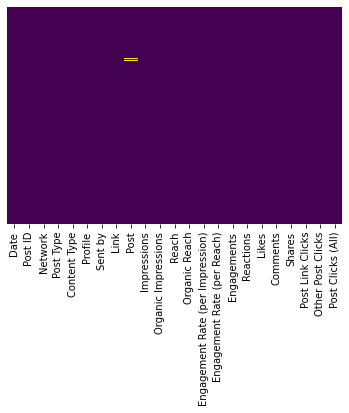

In [71]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [72]:
df['Post'].unique()

array(['We celebrated recently with Novare, one of our top clients on the 6th anniversary of their Novare Lekki mall opening. \n#TrustedPartner\n#ITCANBE',
       'N5k can get you started today. Call 01 280 1266 or email assetmanagement@stanbicibtc.com.',
       'Still not sure whether to invest in the FGN Bonds? \nHere are 5 reasons why you should. Call us on 01 422 0004 or email stockbroking@stanbicibtc.com and let us get you started.',
       ...,
       'Now on at the Stanbic IBTC sponsored BIT Hub: "Pushing the Envelope" hosted by Google @SMWLagos #smwlagos #smwEnvelopes',
       "'@SMWLagos starts today. We're proud sponsors of the BIT Hub at Porsche Centre, VI. Here's today's events #SMWLagos http://t.co/QJRRJQPT",
       'We are proud to be sponsors of the BIT hub at #SMWLagos (@SMWLagos). RT if you are attending an event. http://t.co/cRfETcxE'],
      dtype=object)

In [73]:
# df = df.dropna(axis=0, how='any')
# Remove rows with missing values in the 'Post' column
df = df.dropna(subset=['Post'])


<AxesSubplot:>

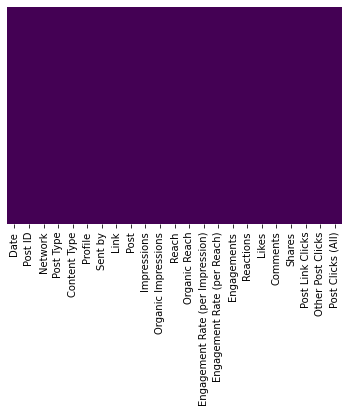

In [74]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35800 entries, 0 to 36091
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              35800 non-null  object 
 1   Post ID                           35800 non-null  object 
 2   Network                           35800 non-null  object 
 3   Post Type                         35800 non-null  object 
 4   Content Type                      35800 non-null  object 
 5   Profile                           35800 non-null  object 
 6   Sent by                           35800 non-null  object 
 7   Link                              35748 non-null  object 
 8   Post                              35800 non-null  object 
 9   Impressions                       35800 non-null  float64
 10  Organic Impressions               35800 non-null  float64
 11  Reach                             35800 non-null  float64
 12  Orga

In [76]:
df = df.reset_index(drop=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35800 entries, 0 to 35799
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              35800 non-null  object 
 1   Post ID                           35800 non-null  object 
 2   Network                           35800 non-null  object 
 3   Post Type                         35800 non-null  object 
 4   Content Type                      35800 non-null  object 
 5   Profile                           35800 non-null  object 
 6   Sent by                           35800 non-null  object 
 7   Link                              35748 non-null  object 
 8   Post                              35800 non-null  object 
 9   Impressions                       35800 non-null  float64
 10  Organic Impressions               35800 non-null  float64
 11  Reach                             35800 non-null  float64
 12  Orga

# CLEANING TEXT DATA 

In [78]:
# Function to clean, tokenize, remove stop word, and not alphanumeric from data

In [79]:
stop_words_ = set(stopwords.words('english')) #This remove all stopwords.words 


def black_txt(token): # it returns the words that are not present in stop_words_, my_sw and words that their lwtters are greater than two
    return  token not in stop_words_ and token not in list(string.punctuation) 

In [80]:
wn = nltk.stem.WordNetLemmatizer()
def clean_txt(text):
    clean_text = []
    clean_text2 =[]
    text= re.sub("'", "", text)
    text = re.sub("(\\d|\\W)+",",",text)
    clean_text = {wn.lemmatize(word, pos ='v') for word in nltk.word_tokenize(text.lower()) if black_txt(word)}
    clean_text2 = [word for word in clean_text if black_txt(word)]
    
   # lst = []
    #for word in clean_text:
     #   if black_txt(word):
      #      continue
       # lst.append(word)
    
    return " ".join(clean_text2)

In [81]:
df.head()

Date                           Post ID   Network Post Type  \
0  12/17/2022 5:08 pm  253788558082460_5441020446025886  Facebook      Post   
1   5/4/2019 10:01 am  253788558082460_2001824979945467  Facebook      Post   
2    6/2/2020 9:00 pm  253788558082460_2768996106561680  Facebook      Post   
3   5/9/2022 10:37 am  253788558082460_4808157902645480  Facebook      Post   
4  7/18/2021 10:00 am  253788558082460_3890983261029620  Facebook      Post   

  Content Type       Profile            Sent by  \
0        Video  Stanbic IBTC  Damilare Oyekanmi   
1        Photo  Stanbic IBTC                      
2        Photo  Stanbic IBTC                      
3        Photo  Stanbic IBTC  Damilare Oyekanmi   
4        Photo  Stanbic IBTC                      

                                                Link  \
0  https://www.facebook.com/253788558082460/posts...   
1  https://www.facebook.com/253788558082460/posts...   
2  https://www.facebook.com/StanbicIBTC/photos/a....   
3  https://www.facebook.com/StanbicIBTC/photos/a....   
4  https://www.facebook.com/StanbicIBTC/photos/a....   

                                                Post  Impressions  \
0  We celebrated recently with Novare, one of our...     109.4362   
1  N5k can get you started today. Call 01 280 126...     109.4362   
2  Still not sure whether to invest in the FGN Bo...     109.4362   
3  Let nothing stop you from achieving your goals...     109.4362   
4  If you were to pick one wish, what would it be...     109.4362   

   Organic Impressions       Reach  Organic Reach  \
0             109.4362  155.884646     156.155451   
1             109.4362  155.884646     156.155451   
2             109.4362  155.884646     156.155451   
3             109.4362  155.884646     156.155451   
4             109.4362  155.884646     156.155451   

   Engagement Rate (per Impression)  Engagement Rate (per Reach)  Engagements  \
0                            0.0049                       0.0049         55.0   
1                            0.0467                       0.0639         55.0   
2                            0.0529                       0.0562         55.0   
3                            0.0056                       0.0057        445.0   
4                            0.0616                       0.0639         55.0   

    Reactions       Likes    Comments  Shares  Post Link Clicks  \
0  179.000000  176.000000   59.000000     2.0               5.0   
1  245.587977  238.099515  101.235781    47.0               5.0   
2  245.587977  238.099515  101.235781    29.0               5.0   
3  102.000000  101.000000   11.000000     2.0               5.0   
4  245.587977  238.099515  101.235781    10.0               5.0   

   Other Post Clicks  Post Clicks (All)  
0         416.101723         381.061231  
1          38.000000          26.000000  
2          38.000000          26.000000  
3         330.000000         330.000000  
4          38.000000          26.000000

In [82]:
df['Network'] = df['Network'].str.replace('[^a-zA-Z \n\.]',"")

In [83]:
df['Post Type'] = df['Post Type'].str.replace('[^a-zA-Z \n\.]',"")

In [84]:
df['Content Type'] = df['Content Type'].str.replace('[^a-zA-Z \n\.]',"")

In [85]:
df['Post'] = df['Post'].str.replace('[^a-zA-Z \n\.]',"")

In [86]:
df['Post']

0        We celebrated recently with Novare one of our ...
1        Nk can get you started today. Call    or email...
2        Still not sure whether to invest in the FGN Bo...
3        Let nothing stop you from achieving your goals...
4        If you were to pick one wish what would it be\...
                               ...                        
35795    FCMB CEO at the Stanbic IBTC sponsored BIT hub...
35796    Next event at the Stanbic IBTC sponsored BIT H...
35797    Now on at the Stanbic IBTC sponsored BIT Hub P...
35798    SMWLagos starts today. Were proud sponsors of ...
35799    We are proud to be sponsors of the BIT hub at ...
Name: Post, Length: 35800, dtype: object

In [87]:
# Drop these two specified columns
columns_to_drop = ['Profile', 'Sent by', 'Post ID','Link']
df_ = df.drop(columns=columns_to_drop)

In [88]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35800 entries, 0 to 35799
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              35800 non-null  object 
 1   Network                           35800 non-null  object 
 2   Post Type                         35800 non-null  object 
 3   Content Type                      35800 non-null  object 
 4   Post                              35800 non-null  object 
 5   Impressions                       35800 non-null  float64
 6   Organic Impressions               35800 non-null  float64
 7   Reach                             35800 non-null  float64
 8   Organic Reach                     35800 non-null  float64
 9   Engagement Rate (per Impression)  35800 non-null  float64
 10  Engagement Rate (per Reach)       35800 non-null  float64
 11  Engagements                       35800 non-null  float64
 12  Reac

# FEATURES ENGINEERING

In [89]:
latest_date = df_['Date'].max()
print("The latest date is:", latest_date)


The latest date is: 9/9/2022 9:00 am


In [90]:
# #splitting the year,month and day
# df['year'] = pd.DatetimeIndex(df['created_on']).year
# df['month'] = pd.DatetimeIndex(df['created_on']).month
# df['day'] = pd.DatetimeIndex(df['created_on']).day
# df['Percentage_Column'] = df['Percentage_Column'].str.replace('%', '').astype(float) / 100.0


In [91]:
#Converting to datetime object for easy data preprocessing i.e pd.to_datetime(df['Date'], format='%Y/%m/%d') 
# df_['Date'] = pd.to_datetime(df_['Date'], format='%Y-%m-%d %H:%M:%S')
df_['Date'] = pd.to_datetime(df_['Date'], format='%m/%d/%Y %I:%M %p')
df_['Date'].dtypes
time = df_['Date'].iloc[0]
time

Timestamp('2022-12-17 17:08:00')

In [92]:
# Grabing specific attributes from a Datetime object by calling them Now that the timestamp column are actually DateTime objects, I use .apply() to create 3 new columns called Hour, Month, and Day of Week for the Date. I created these columns based off of the timeStamp column.
df_['HourPosted'] = df_['Date'].apply(lambda x: x.hour) #contain the hour of the day at which the post was created at each datetime in the 'Date' column occurred.
df_['Day of Week Posted'] = df_['Date'].apply(lambda x: x.dayofweek) #contain the day of the week at which the post was created at each datetime in the 'Date' column occurred.
df_['MonthPosted'] =df_['Date'].apply(lambda x: x.month) #contain the Month of the Year at which the post was created at each datetime in the 'Date' column occurred.
df_['YearPosted'] = df_['Date'].apply(lambda x: x.year) #contain the Year at which the post was created at each datetime in the 'Date' column occurred.
df_.head()

Date   Network Post Type Content Type  \
0 2022-12-17 17:08:00  Facebook      Post        Video   
1 2019-05-04 10:01:00  Facebook      Post        Photo   
2 2020-06-02 21:00:00  Facebook      Post        Photo   
3 2022-05-09 10:37:00  Facebook      Post        Photo   
4 2021-07-18 10:00:00  Facebook      Post        Photo   

                                                Post  Impressions  \
0  We celebrated recently with Novare one of our ...     109.4362   
1  Nk can get you started today. Call    or email...     109.4362   
2  Still not sure whether to invest in the FGN Bo...     109.4362   
3  Let nothing stop you from achieving your goals...     109.4362   
4  If you were to pick one wish what would it be\...     109.4362   

   Organic Impressions       Reach  Organic Reach  \
0             109.4362  155.884646     156.155451   
1             109.4362  155.884646     156.155451   
2             109.4362  155.884646     156.155451   
3             109.4362  155.884646     156.155451   
4             109.4362  155.884646     156.155451   

   Engagement Rate (per Impression)  Engagement Rate (per Reach)  Engagements  \
0                            0.0049                       0.0049         55.0   
1                            0.0467                       0.0639         55.0   
2                            0.0529                       0.0562         55.0   
3                            0.0056                       0.0057        445.0   
4                            0.0616                       0.0639         55.0   

    Reactions       Likes    Comments  Shares  Post Link Clicks  \
0  179.000000  176.000000   59.000000     2.0               5.0   
1  245.587977  238.099515  101.235781    47.0               5.0   
2  245.587977  238.099515  101.235781    29.0               5.0   
3  102.000000  101.000000   11.000000     2.0               5.0   
4  245.587977  238.099515  101.235781    10.0               5.0   

   Other Post Clicks  Post Clicks (All)  HourPosted  Day of Week Posted  \
0         416.101723         381.061231          17                   5   
1          38.000000          26.000000          10                   5   
2          38.000000          26.000000          21                   1   
3         330.000000         330.000000          10                   0   
4          38.000000          26.000000          10                   6   

   MonthPosted  YearPosted  
0           12        2022  
1            5        2019  
2            6        2020  
3            5        2022  
4            7        2021

Visualizing my new column Day of Week to be an integer 0-6. By Changing the integer values to the actual string names of day of the week: The dictionary below is a guide.

{0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [93]:
Day_of__the_Week_posted = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [94]:
df_['Actual Day of Week Posted'] = df_['Day of Week Posted'].apply(lambda x: Day_of__the_Week_posted[x])  #Creating day of the week colums
df_.head()

Date   Network Post Type Content Type  \
0 2022-12-17 17:08:00  Facebook      Post        Video   
1 2019-05-04 10:01:00  Facebook      Post        Photo   
2 2020-06-02 21:00:00  Facebook      Post        Photo   
3 2022-05-09 10:37:00  Facebook      Post        Photo   
4 2021-07-18 10:00:00  Facebook      Post        Photo   

                                                Post  Impressions  \
0  We celebrated recently with Novare one of our ...     109.4362   
1  Nk can get you started today. Call    or email...     109.4362   
2  Still not sure whether to invest in the FGN Bo...     109.4362   
3  Let nothing stop you from achieving your goals...     109.4362   
4  If you were to pick one wish what would it be\...     109.4362   

   Organic Impressions       Reach  Organic Reach  \
0             109.4362  155.884646     156.155451   
1             109.4362  155.884646     156.155451   
2             109.4362  155.884646     156.155451   
3             109.4362  155.884646     156.155451   
4             109.4362  155.884646     156.155451   

   Engagement Rate (per Impression)  Engagement Rate (per Reach)  Engagements  \
0                            0.0049                       0.0049         55.0   
1                            0.0467                       0.0639         55.0   
2                            0.0529                       0.0562         55.0   
3                            0.0056                       0.0057        445.0   
4                            0.0616                       0.0639         55.0   

    Reactions       Likes    Comments  Shares  Post Link Clicks  \
0  179.000000  176.000000   59.000000     2.0               5.0   
1  245.587977  238.099515  101.235781    47.0               5.0   
2  245.587977  238.099515  101.235781    29.0               5.0   
3  102.000000  101.000000   11.000000     2.0               5.0   
4  245.587977  238.099515  101.235781    10.0               5.0   

   Other Post Clicks  Post Clicks (All)  HourPosted  Day of Week Posted  \
0         416.101723         381.061231          17                   5   
1          38.000000          26.000000          10                   5   
2          38.000000          26.000000          21                   1   
3         330.000000         330.000000          10                   0   
4          38.000000          26.000000          10                   6   

   MonthPosted  YearPosted Actual Day of Week Posted  
0           12        2022                       Sat  
1            5        2019                       Sat  
2            6        2020                       Tue  
3            5        2022                       Mon  
4            7        2021                       Sun

# PEAK ENGAGEMENT TIME

In [95]:
# Hourly Engagement Analysis
hourly_engagement = df_.groupby('HourPosted').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagements': 'mean',
    'Reactions':'mean',
    'Engagement Rate (per Reach)':'mean',
    'Engagement Rate (per Impression)':'mean',
    }).reset_index()

In [96]:
hourly_engagement

HourPosted      Likes   Comments    Shares  Engagements  Reactions  \
0            0  61.649977   7.761867  7.526790   114.498181  62.721999   
1            1  59.222222   4.222222  1.750000    85.980437  59.305556   
2            2  35.866667   1.933333  1.533333   104.172765  36.400000   
3            3  18.750000   5.250000  1.250000    85.000000  20.250000   
4            4  41.266667  14.482385  2.933333   107.572765  41.733333   
5            5  21.818182   3.272727  1.727273    37.636364  22.272727   
6            6  46.142439  10.691391  4.041096    95.280530  47.040272   
7            7  38.814437   4.892051  4.222834    72.733124  39.156096   
8            8  35.440449   6.300748  4.661100    81.540423  35.892817   
9            9  30.826883   6.291540  4.287413    71.350144  31.115303   
10          10  43.890972   8.451943  5.508060    93.415951  44.527019   
11          11  43.490819   7.317788  4.117193    83.654429  43.876388   
12          12  36.387223   7.381720  4.325242    83.622395  36.793410   
13          13  39.518293   6.807449  4.222160    83.623068  40.007229   
14          14  34.580858   6.974799  4.524178    81.857833  34.984851   
15          15  35.014361   7.320040  3.682245    79.225529  35.411742   
16          16  34.130642   6.175235  4.254364    78.562216  34.435005   
17          17  41.448450   7.495185  4.543279    89.900151  41.946685   
18          18  34.069137   7.292690  3.628628    80.755581  34.335333   
19          19  44.582214   8.690983  3.777853    93.779526  45.244366   
20          20  45.066083   8.648475  4.181968   102.269318  45.764306   
21          21  68.505529  13.962786  8.180320   154.229517  69.763554   
22          22  54.899564  11.591605  5.838084   117.618106  55.993501   
23          23  74.676966  12.940000  7.393305   143.893659  75.707038   

    Engagement Rate (per Reach)  Engagement Rate (per Impression)  
0                      5.709591                          0.040925  
1                     21.602025                          0.037318  
2                      0.024833                          0.025510  
3                      0.028425                          0.030800  
4                      0.035393                          0.035570  
5                      0.033891                          0.045759  
6                      2.227326                          0.242259  
7                      3.170299                          0.150069  
8                      1.979370                          0.072820  
9                      1.036526                          0.058819  
10                     2.612073                          0.081053  
11                     4.849642                          0.064270  
12                     1.878972                          0.050378  
13                     2.638514                          0.053461  
14                     1.826990                          0.083972  
15                     2.116737                          0.049400  
16                     1.508752                          0.056913  
17                     2.888165                          0.065277  
18                     1.611073                          0.060822  
19                     2.021379                          0.038577  
20                     4.607839                          0.058079  
21                     2.842699                          0.044646  
22                     1.167585                          0.042971  
23                     3.246882                          0.037746

In [97]:
# Day of the week Engagement Analysis
daily_engagement = df_.groupby('Actual Day of Week Posted').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagements': 'mean',
    'Reactions':'mean',
    'Engagement Rate (per Reach)':'mean',
    'Engagement Rate (per Impression)':'mean',
    }).reset_index()

In [98]:
daily_engagement

Actual Day of Week Posted      Likes  Comments    Shares  Engagements  \
0                       Fri  39.939874  7.802508  4.386461    88.991821   
1                       Mon  40.503260  7.354451  4.900649    87.057343   
2                       Sat  40.660197  6.835027  4.123258    87.236648   
3                       Sun  43.614787  9.026348  3.769396    93.154433   
4                       Thu  39.034468  8.260494  4.387397    86.181834   
5                       Tue  38.537521  7.747650  4.492827    84.404805   
6                       Wed  35.813326  6.211747  4.832102    82.025933   

   Reactions  Engagement Rate (per Reach)  Engagement Rate (per Impression)  
0  40.385621                     2.686600                          0.073944  
1  40.980625                     2.521934                          0.059533  
2  41.131819                     2.392927                          0.086018  
3  44.178863                     2.767668                          0.042075  
4  39.530902                     2.074771                          0.056925  
5  39.002656                     2.248481                          0.054847  
6  36.249205                     2.392095                          0.064898

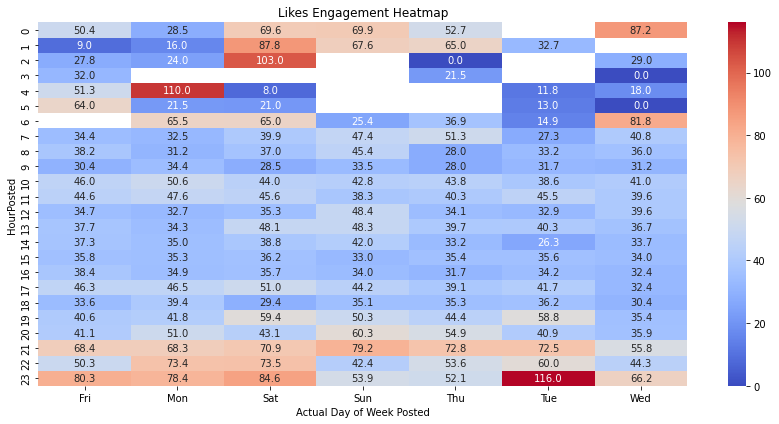

In [99]:
# Create a Heatmap Visualization for likes 
engagement_heatmap = df_.pivot_table(index='HourPosted', columns='Actual Day of Week Posted', values='Likes', aggfunc=np.mean)
plt.figure(figsize=(12, 6))
plt.title('Likes Engagement Heatmap')
sns.heatmap(engagement_heatmap, annot=True, fmt='.1f', cmap='coolwarm')
plt.tight_layout()

# Show plots
plt.show()

Engagement Trends by Hour and Day of the Week: The heatmap provides a visual representation of how user engagement varies by both the hour of the day and the day of the week.

Color Intensity: In a typical heatmap, color intensity represents the magnitude of the values. In this engagement heatmap, the color intensity corresponds to the level of engagement. For example, darker colors (e.g., deep red, deep brown) represent higher levels of engagement, while lighter colors (e.g., light blue) represent lower levels of engagement.

Peak Engagement Times: These are the areas in the heatmap where there is darkest colors. These are the hours of the day and days of the week when user engagement is highest. This is often referred to as "peak engagement time." For example, The dark square around 23 PM on Tuesday, suggests that Tuesday evenings at 23 PM are a time of high users engagement for 'Likes' i.e liking a post. Then two other days have high 'Likes' of engagement, these days are Monday by 4 am and on saturday by 2am

Engagement Patterns:  There are as well specific hours of the day or days of the week when 'Likes' engagement consistently stands out. e.g Likes engagment stood out consistently well in most of 23 hours (that is 23 pm) of the day across all the days of the week, than when compares with other groups. There are few recurring patterns/trends. For instance, engagement tends to be lower during sunday especially betwen 2am -3am and higher during Tuesday, Mondays and Saturday respectively.

Correlations: I can identify potential correlations between engagement and other factors such as the time of day or the day of the week. For example, I notice that Likes engagement is consistently high on Saturdays between 21pm and 2am and on Sundays the highest like engament is on 21pm and between 12am - 1am, thia suggest that Saturday is more engaging than sunday on weekemds for the audience of StanbicIBTC.

Insights for Posting Strategy: Since engagement for like is highest on Saturday evenings and mid night than Sundays, It would be recommended to consider scheduling important posts during that time to maximize reach and impact. Also on Friday, Monday, Saturday, and Tuesday betweent the hours of 21pm to 23 pm Likes engagemnent are more engaing by the audience durung this time. Conversely, Likes engagement is consistently low/no engagement during 3am on saturday, I would suggest to avoid scheduling posts during this time.

Likes Engagement Heatmap

The heatmap visualizes the average hourly likes across different days of the week.

Interpretation:

The highest concentration of likes occurs during the afternoon hours across most days, particularly from 11 AM to 4 PM.
Tuesday and Wednesday afternoons exhibit particularly high engagement compared to other days.
Early morning hours (before 7 AM) and late night hours (after 9 PM) tend to have the lowest engagement across all days.

Recommendations for Stakeholders:

Optimal Posting Time: To maximize likes, stakeholders should consider posting content during the afternoon hours, especially between 11 AM and 4 PM. This window appears to resonate most with the audience.
Focus Days: While afternoon hours are generally good for engagement across all days, putting a particular emphasis on Tuesday and Wednesday afternoons might yield even better results.
Avoid Off-Peak Hours: Given the lower engagement during early mornings and late nights, it might be beneficial to avoid these times for posting critical content, unless targeting a specific audience active during these hours.
Content Strategy: Considering the patterns observed, aligning content themes or promotions with peak engagement times can enhance visibility and interactions. For instance, launching a mid-week promotion on a Wednesday afternoon could leverage the higher engagement observed during that time.



In [100]:
# from scipy import stats
# # Statistical analysis for the highest engagement hour

# highest_engagement_hour = df_.groupby('HourPosted').agg({
#     'Likes': 'mean',
#     'Comments': 'mean',
#     'Shares': 'mean',
#     'Engagements': 'mean',
#     'Reactions':'mean',
#     'Engagement Rate (per Reach)':'mean',
#     'Engagement Rate (per Impression)':'mean',
#     }).idxmax()

# # Statistical analysis for the highest engagement day
# highest_engagement_day = df_.groupby('Actual Day of Week Posted').agg({
#     'Likes': 'mean',
#     'Comments': 'mean',
#     'Shares': 'mean',
#     'Engagements': 'mean',
#     'Reactions':'mean',
#     'Engagement Rate (per Reach)':'mean',
#     'Engagement Rate (per Impression)':'mean',
#     }).idxmax()

# # Conduct hypothesis tests (e.g., t-test) to check if the peak hour/day is significantly different from others
# #  assumptions

# # Example t-test for the highest engagement hour
# hourly_engagement_data = df_[df_['HourPosted'] == highest_engagement_hour['Likes']]
# other_hourly_engagement_data = df_[df_['HourPosted'] != highest_engagement_hour['Likes']]
# t_statistic, p_value = stats.ttest_ind(hourly_engagement_data['Likes'], other_hourly_engagement_data['Likes'])

# # Example t-test for the highest engagement day
# daily_engagement_data = df_[df_['Actual Day of Week Posted'] == highest_engagement_day['Likes']]
# other_daily_engagement_data = df_[df_['Actual Day of Week Posted'] != highest_engagement_day['Likes']]
# t_statistic, p_value = stats.ttest_ind(daily_engagement_data['Likes'], other_daily_engagement_data['Likes'])

# # Print results
# print(f"Highest Engagement Hour: {highest_engagement_hour['Likes']} (Statistical Test P-value: {p_value})")
# print(f"Highest Engagement Day: {highest_engagement_day['Likes']} (Statistical Test P-value: {p_value})")


In [101]:
# df_.to_csv('process.csv')

In [102]:
# In this statistical analysis, I compared engagement metrics (e.g., Likes) between two groups: the group corresponding to the highest engagement hour (Hour 23) and the group corresponding to all other hours.

# Here are the null and alternative hypotheses for this t-test:

# Null Hypothesis: There is no significant difference in Likes between the highest engagement hour (Hour 23) and all other hours.

# Alternative Hypothesis: There is a significant difference in Likes between the highest engagement hour (Hour 23) and all other hours.

# The p-value I obtained (1.2192599596317044e-07) is very close to zero, which is much smaller than the commonly chosen significance level (e.g., 0.05 or 0.01). In hypothesis testing, a small p-value indicates strong evidence against the null hypothesis, meaning that the null hypothesis is being rejected. In this case, the small p-value indicates that there is a significant difference in Likes between Hour 23 and other hours, supporting the alternative hypothesis.

# Therefore, I will conclude that Hour 23 has a significantly different level of engagement (Likes) compared to other hours in the data.

# A similar interpretation applies to the analysis of the highest engagement day which is (Sunday) compared to other days. The small p-value suggests that Sunday has a significantly different level of engagement compared to other days.




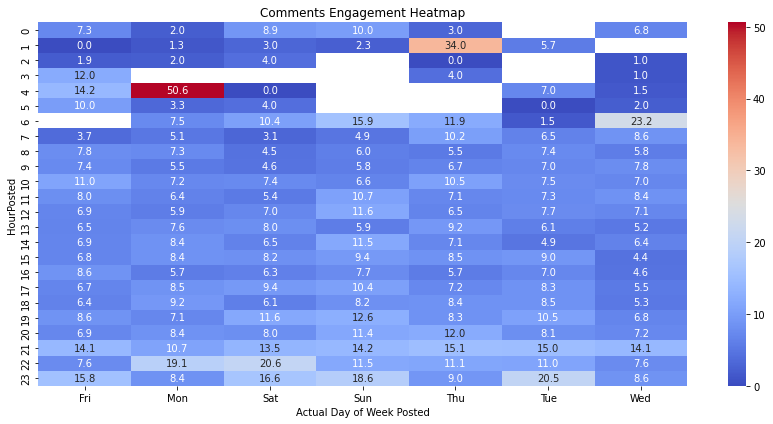

In [103]:
# Create a Heatmap Visualization for comments
engagement_heatmap = df_.pivot_table(index='HourPosted', columns='Actual Day of Week Posted', values='Comments', aggfunc=np.mean)
plt.figure(figsize=(12, 6))
plt.title('Comments Engagement Heatmap')
sns.heatmap(engagement_heatmap, annot=True, fmt='.1f', cmap='coolwarm')
plt.tight_layout()

# Show plots
plt.show()

Engagement Trends by Hour and Day of the Week: The heatmap provides a visual representation of how user 'Comments' engagement varies by both the hour of the day and the day of the week.

Color Intensity: In a typical heatmap, color intensity represents the magnitude of the values. In this engagement heatmap, the color intensity corresponds to the level of engagement. For example, darker colors (e.g., deep red, deep brown) represent higher levels of engagement, while lighter colors (e.g., light blue) represent lower levels of engagement.

Peak Engagement Times: These are the areas in the heatmap where there is darkest colors. These are the hours of the day and days of the week when user 'Comments' engagement is highest. This is often referred to as "peak engagement time." For example, The dark red square around 4am on Monday, suggests that Monday mornings at 4 AM are a time of high users engagement for 'Comments' i.e Commenting on a post. Then one other days have high 'Comments' of engagement, this day is Thursday by 1 am.

Engagement Patterns:  There are as well specific hours of the day or days of the week when 'Comments' engagement consistently stands out. e.g Comments engagment didnt really stand out consistently well in most cases, just minimal comments engam=gement were possible across all the days of the week. Engagement in terms of Comments tends to be lower during sunday especially betwen 2am -5am and higher suddenly in the following hours by 6am but highest at 23pm.

Correlations: I identified potential correlations between engagement and other factors such as the time of day or the day of the week. For example, I noticed that Comments engagement is consistently high every day of the week between 21pm and 23pm, this suggest that between the time of 21pm and 23pm is more engaging than other time o the week for the audience of StanbicIBTC.

Insights for Posting Strategy: Since engagement for 'Comments' is highest on Monday by 4AM in the mornings and as well during 21pm and 23pm every day of the week, I would recommend to consider scheduling important posts during that time to maximize reach and impact. Conversely, Likes engagement is consistently low/no engagement during 2am to 4am on sunday and some other time in some other days of the week, I would suggest to avoid scheduling posts during this time.

Interpretation:

The heatmap shows that the highest concentration of comments generally occurs in the afternoon hours, similar to the likes pattern. This is particularly pronounced from 12 PM to 4 PM.
Tuesday and Wednesday afternoons stand out with higher engagement in terms of comments compared to other days.
The early morning hours (before 7 AM) and late evening hours (after 9 PM) tend to have the lowest comment engagements across all days.

Recommendations for Stakeholders:

Engagement Hours: To stimulate more comments and discussions, consider posting content during the afternoon hours, especially between 12 PM and 4 PM. This period seems to drive the most interactions in terms of comments.
Strategic Focus: Given the enhanced comment activity on Tuesday and Wednesday afternoons, it might be beneficial to schedule content that prompts discussions or seeks feedback during these times.
Interactive Content: To further boost comment interactions, stakeholders can consider posting polls, questions, or any other engaging content that encourages users to leave comments during peak hours.
Monitoring and Moderation: Given the patterns, community managers or social media teams should be more active during peak engagement times to monitor comments, engage with the audience, and moderate discussions if needed.


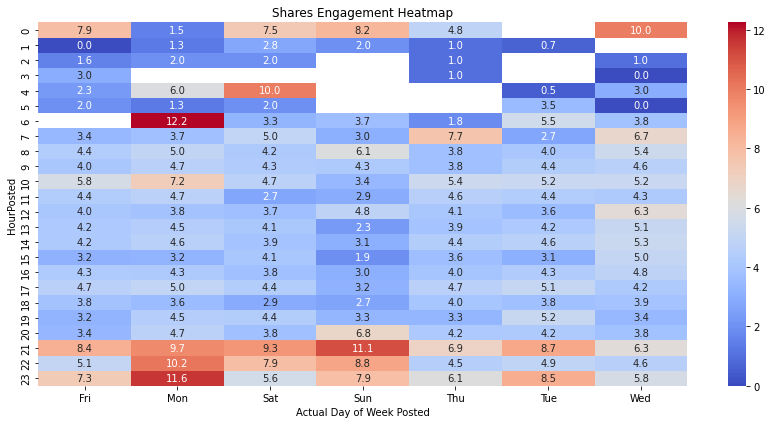

In [104]:
# Create a Heatmap Visualization Shares
engagement_heatmap = df_.pivot_table(index='HourPosted', columns='Actual Day of Week Posted', values='Shares', aggfunc=np.mean)
plt.figure(figsize=(12, 6))
plt.title('Shares Engagement Heatmap')
sns.heatmap(engagement_heatmap, annot=True, fmt='.1f', cmap='coolwarm')
plt.tight_layout()

# Show plots
plt.show()

Engagement Trends by Hour and Day of the Week: The heatmap provides a visual representation of how user engagement varies by both the hour of the day and the day of the week.

Color Intensity: In a typical heatmap, color intensity represents the magnitude of the values. In this engagement heatmap, the color intensity corresponds to the level of engagement. For example, darker colors (e.g., deep red, deep brown) represent higher levels of engagement, while lighter colors (e.g., light blue) represent lower levels of engagement.

Peak Engagement Times: These are the areas in the heatmap where there is darkest colors. These are the hours of the day and days of the week when user 'Shares' engagement is highest. This is often referred to as "peak engagement time." For example, The dark square around 6AM on Monday, suggests that Monday mornings at 6 AM are time of high users engagement for 'Shares' i.e Sharing a post. Then some other time (hours) on monday and same time with other days of the week has high 'Shares' of engagement too, these time and  days are Monday, saturday, sunday friday, and Tuesday between 21 PM and 12am

Engagement Patterns:  There are as well specific hours of the day or days of the week when 'Shares' engagement consistently stands out. e.g Shares engagment stood out consistently well between the hour of 21pm to 12am of all weekend than weekdays which only stood out consitently between Monday, Friday,and Tuesday with exception to Wednesday and Thursday. There are few recurring patterns/trends. For instance, engagement tends to be lower during sunday especially betwen 2am -5am and higher during 21pm to 23pm on same sunday.

Correlations: I identified potential correlations between engagement and other factors such as the time of day or the day of the week. For example, I noticed that Shares engagement is consistently high on Sunday between 21pm and 12am and on Saturdays the highest share engagement is by 4am and 21pm, this suggest that Sunday is more engaging than saturday on weekemds for the audience of StanbicIBTC.

Insights for Posting Strategy: Since engagement for Shares is highest on Sundays evenings and mid night than Saturdays, It would be recommended to consider scheduling important posts during that time to maximize reach and impact. Also on Friday, Monday, and Tuesday betweent the hours of 21pm to 23 pm Shares engagemnent are more engaging by the audience durung this time. Conversely, Shares engagement is consistently low/no engagement during 2am to 5am on sunday, I would suggest to avoid scheduling posts during this time.

Interpretation:

Shares, which typically indicate content resonance and virality, appear to be higher during the afternoon hours, especially between 12 PM and 4 PM.
Tuesdays and Wednesdays again show higher engagement, with Wednesday afternoon standing out as the peak time for shares.
Similar to likes and comments, the early morning hours (before 7 AM) and late evening hours (after 9 PM) generally see reduced share activity.

Recommendations for Stakeholders:

Content Timing: To maximize the potential of content being shared, consider posting during the peak afternoon hours, especially between 12 PM and 4 PM.
Viral Potential: Given the elevated share activity on Tuesday and especially Wednesday afternoons, stakeholders might want to release content with high viral potential during these times to capitalize on this engagement.

Shareable Content: Creating content that is not only engaging but also shareable is key. This includes content that is relatable, meme-worthy, informative, or evokes strong emotions.

Prompts & CTAs: Encouraging shares directly can also be effective. Using clear call-to-actions like "Share if you agree!", "Tag a friend!", or "Spread the word!" can stimulate sharing behavior, especially during peak hours.
Shares are a powerful metric as they extend the organic reach of content beyond the initial audience, making understanding this heatmap crucial for amplifying content reach. 



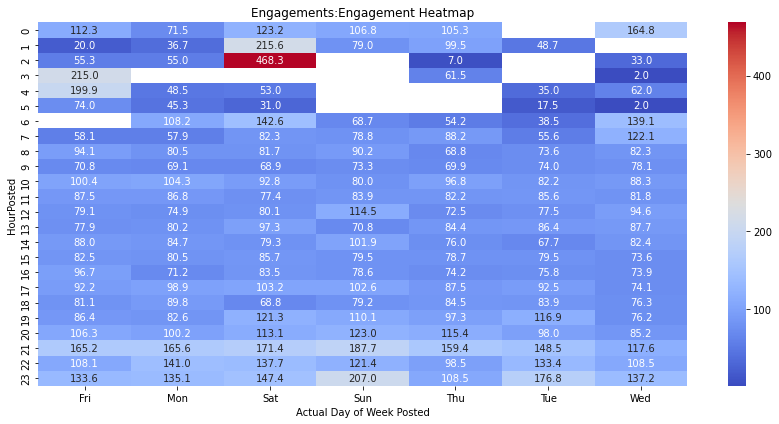

In [105]:
# Create a Heatmap Visualization Engagements
engagement_heatmap = df_.pivot_table(index='HourPosted', columns='Actual Day of Week Posted', values='Engagements', aggfunc=np.mean)
plt.figure(figsize=(12, 6))
plt.title('Engagements:Engagement Heatmap')
sns.heatmap(engagement_heatmap, annot=True, fmt='.1f', cmap='coolwarm')
plt.tight_layout()

# Show plots
plt.show()

Interpretation:

Engagements are notably higher during the afternoon hours, especially from 11 AM to 4 PM. This is consistent with the patterns observed in likes, comments, and shares.
Tuesday and Wednesday emerge as days with particularly high engagement, with Wednesday afternoon being the most engaging time.
As with other metrics, early morning (before 7 AM) and late evening (after 9 PM) tend to experience reduced engagement.

Recommendations for Stakeholders:

Optimal Posting Time: To capitalize on peak engagement, consider scheduling key content during the afternoon hours, particularly between 11 AM and 4 PM.
Mid-Week Focus: Given the pronounced engagement on Tuesdays and especially Wednesdays, stakeholders should emphasize posting key campaigns, announcements, or interactive content during this period.
Content Strategy: Diversify the content mix to include a blend of posts that drive likes, comments, shares, and overall engagement. Given the patterns observed, interactive or discussion-driven content might resonate particularly well during peak engagement times.
Continuous Monitoring: Use real-time analytics tools to monitor and adjust the content strategy. While historical data provides valuable insights, staying agile and adapting to real-time audience behavior can further optimize engagement.
Understanding the rhythms of engagement can greatly enhance the efficacy of content strategies, ensuring that content not only reaches but also resonates with the target audience. 

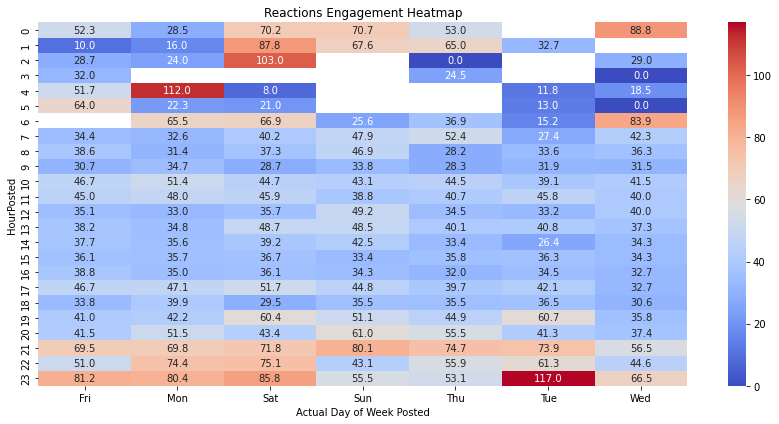

In [106]:
# Create a Heatmap Visualization Reactions
engagement_heatmap = df_.pivot_table(index='HourPosted', columns='Actual Day of Week Posted', values='Reactions', aggfunc=np.mean)
plt.figure(figsize=(12, 6))
plt.title('Reactions Engagement Heatmap')
sns.heatmap(engagement_heatmap, annot=True, fmt='.1f', cmap='coolwarm')
plt.tight_layout()

# Show plots
plt.show()


Interpretation:

The heatmap shows that the highest average reactions are observed during the afternoon to early evening hours, particularly around 12 PM to 6 PM. This trend is consistent across most days of the week.
Weekends, specifically Sundays, experience a slightly lower reaction rate in the early hours but pick up in engagement around midday and afternoon.
Early mornings and late nights generally see lower reactions across all days.

Recommendation for Stakeholders:

To boost the number of reactions on Facebook posts, it's advisable to share content during the peak hours from 12 PM to 6 PM.
If posting on weekends, especially Sundays, it's beneficial to aim for the afternoon hours to optimize reactions.


Interpretation:

Similar to the general engagement patterns observed before, reactions are also more pronounced during the afternoon hours, especially from 12 PM to 4 PM.
Tuesday and Wednesday continue to stand out as days with notably high reactions, with Wednesday afternoon being the most reactive time.
The early morning hours (before 7 AM) and late evening hours (after 9 PM) have diminished reaction activity, consistent with the patterns in other engagement metrics.
Recommendations for Stakeholders:

Prime Hours: To optimize reactions, stakeholders should aim to post content during the afternoon hours, especially between 12 PM and 4 PM.
Engaging Content: Content that evokes strong emotions or reactions (like humor, nostalgia, or impactful stories) can be scheduled during peak hours to maximize reactions.
Variety in Reactions: Platforms like Facebook allow for diverse reactions beyond just likes. Creating content that can elicit a range of reactions (e.g., love, wow, sad) can enhance overall engagement.
Interactive Posts: Polls, quizzes, or posts that ask for user opinions can be a great way to boost reactions. Such content can be particularly effective during peak engagement times, like Tuesday and Wednesday afternoons.
By aligning content strategy with peak reaction times and tailoring content to elicit diverse reactions, stakeholders can further enhance engagement and connection with their audience. 

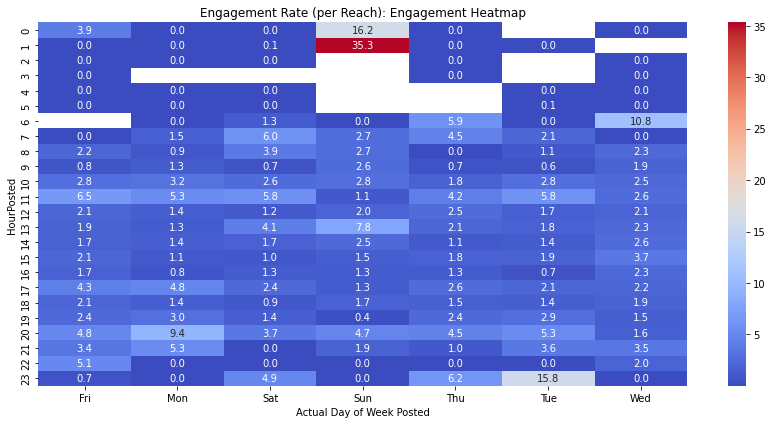

In [107]:
# Create a Heatmap Visualization Reactions
engagement_heatmap = df_.pivot_table(index='HourPosted', columns='Actual Day of Week Posted', values='Engagement Rate (per Reach)', aggfunc=np.mean)
plt.figure(figsize=(12, 6))
plt.title('Engagement Rate (per Reach): Engagement Heatmap')
sns.heatmap(engagement_heatmap, annot=True, fmt='.1f', cmap='coolwarm')
plt.tight_layout()

# Show plots
plt.show()

The darker regions, indicating higher engagement rates per reach, are concentrated around the late morning to early afternoon hours, particularly from 10 AM to 2 PM. This trend is noticeable across most days of the week.
On Saturdays and Sundays, there's a noticeable spike in engagement rate during the midday hours.
Early mornings, especially around 0-6 AM, generally have lower engagement rates across all days.
Recommendation for Stakeholders:

If the objective is to achieve a high engagement rate relative to reach, targeting the late morning to early afternoon hours (around 10 AM - 2 PM) could be effective.
Weekends, especially midday, also offer an opportunity for high engagement rates.


Interpretation:

Unique Content or Events: This spike might be associated with specific content or events that were posted at that time. It's possible that a particular post or series of posts resonated exceptionally well with the audience, leading to this spike in engagement.

Audience Behavior: There might be a segment of the audience that is particularly active and engaged during the early hours of Sunday. This could be influenced by various factors – for instance, weekend relaxation, catching up on missed content, or even time zone differences if the audience is global.

Recommendations for Stakeholders:

Analyze Specific Posts: Stakeholders should look into the specific content posted at 1 AM on Sundays to understand what drove such high engagement. If it's a recurring pattern, understanding the type of content can provide insights for future content strategy.

Targeted Content for Late Saturday/Early Sunday: Given this unique engagement spike, consider scheduling special content, recaps, or engaging posts for late Saturday nights or early Sunday mornings to capitalize on this engaged audience segment.

Engage with the Audience: Consider conducting polls, surveys, or direct interactions to understand why the audience is particularly engaged during this hour. This can provide valuable insights into their behavior and preferences.

Adapt and Experiment: If a specific type of content is identified as the driver behind this high engagement, consider experimenting with similar content at different times to see if it resonates similarly or if the time itself is a significant factor.






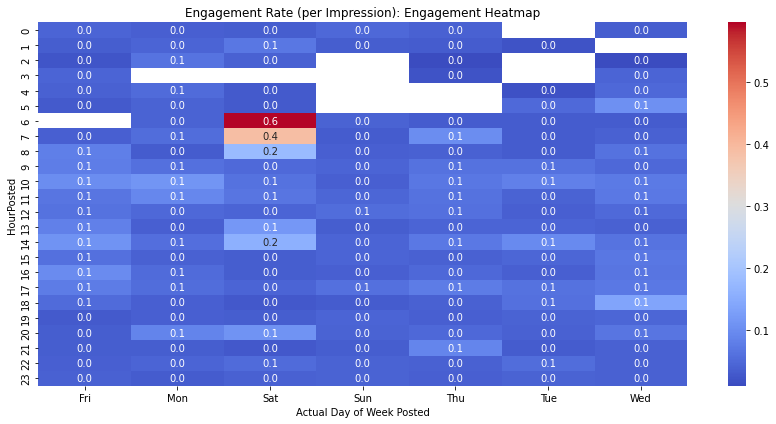

In [108]:
# Create a Heatmap Visualization Reactions
engagement_heatmap = df_.pivot_table(index='HourPosted', columns='Actual Day of Week Posted', values='Engagement Rate (per Impression)', aggfunc=np.mean)
plt.figure(figsize=(12, 6))
plt.title('Engagement Rate (per Impression): Engagement Heatmap')
sns.heatmap(engagement_heatmap, annot=True, fmt='.1f', cmap='coolwarm')
plt.tight_layout()

# Show plots
plt.show()

Interpretation:

The darker areas, signifying higher engagement rates per impression, are primarily found during the late morning to early afternoon, especially from 10 AM to 2 PM. This trend is consistent across most weekdays.
Sundays have a distinct pattern with a higher engagement rate during the early afternoon hours.
Similar to previous heatmaps, the early morning hours, particularly from 0-6 AM, tend to have lower engagement rates across all days.
Recommendation for Stakeholders:

To achieve a high engagement rate compared to impressions, it's beneficial to post content during the late morning to early afternoon period, specifically around 10 AM to 2 PM.
Sunday afternoons also offer a unique window for achieving higher engagement rates relative to impressions.



Sunday Morning Surge: An intriguing pattern is observed on Sunday mornings, specifically between 6 AM to 8 AM. The engagement rates are exceptionally high, with values of 0.6 (or 60%), 0.4 (or 40%), and 0.2 (or 20%) respectively. This suggests that for every 10 impressions during these hours, 6, 4, and 2 lead to engagement, a significant ratio.

Midweek Consistency: Tuesday and Wednesday afternoons continue to show strong engagement rates. While not as pronounced as the early Sunday morning peak, these times still represent consistent engagement relative to impressions.

General Afternoon Resonance: The hours from 12 PM to 3 PM on most days generally exhibit engagement rates above 20%, reinforcing the afternoon as a time when content resonates with audiences.

Weekend Dynamics: Aside from the Sunday morning spike, weekend engagement rates are somewhat varied, with Saturday afternoon showing decent engagement but not matching the highs of midweek or early Sunday morning.

Recommendations for Stakeholders:

Capitalizing on Sunday Mornings: Given the unique surge in engagement rates on Sunday mornings, stakeholders should prioritize this time slot. Consider posting recap content, weekly highlights, or content that sets the tone for the upcoming week during these hours.

Engagement-Driven Content for Midweek: The consistent engagement rates on Tuesday and Wednesday afternoons suggest a focus on content that drives interaction. This includes user polls, interactive posts, and discussion-driven content.

Diversify Weekend Strategy: While Sundays show a unique early morning engagement pattern, the rest of the weekend, especially Saturday, might benefit from diversified content or engagement strategies to boost rates.

Audience Insights for Sunday Mornings: Conduct surveys or direct audience interactions to understand the behavior and preferences of the audience active during early Sunday hours. This can provide insights into why content resonates so well during this period.

Understanding the nuances and specific peaks in engagement rates can greatly refine a content strategy, ensuring not only reach but also effective resonance with the target audience.


In [109]:
# Calculate hourly engagement by network
hourly_engagement_by_network = df_.groupby(['HourPosted', 'Network']).agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagements': 'mean',
    'Reactions':'mean',
    'Engagement Rate (per Reach)':'mean',
    'Engagement Rate (per Impression)':'mean'
}).reset_index()

# Find the network with the highest hourly engagement
highest_hourly_engagement_network = hourly_engagement_by_network.groupby('HourPosted')['Likes'].idxmax()
hourly_peak_engagement = hourly_engagement_by_network.loc[highest_hourly_engagement_network]

# Calculate day-of-the-week engagement by network
daily_engagement_by_network = df_.groupby(['Actual Day of Week Posted', 'Network']).agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagements': 'mean',
    'Reactions':'mean',
    'Engagement Rate (per Reach)':'mean',
    'Engagement Rate (per Impression)':'mean'
}).reset_index()

# Find the network with the highest day-of-the-week engagement
highest_daily_engagement_network = daily_engagement_by_network.groupby('Actual Day of Week Posted')['Likes'].idxmax()
daily_peak_engagement = daily_engagement_by_network.loc[highest_daily_engagement_network]

# Print the results
print("Hourly Peak Engagement by Network:")
print(hourly_peak_engagement)

print("\nDaily Peak Engagement by Network:")
print(daily_peak_engagement)


Hourly Peak Engagement by Network:
    HourPosted    Network       Likes   Comments    Shares  Engagements  \
1            0  Instagram  104.827229   7.363636  2.000000   129.454545   
5            1  Instagram   75.956522   3.826087  2.000000    80.173913   
8            2   Facebook   41.384615   2.230769  1.692308   119.353190   
10           3   Facebook   25.000000   6.666667  1.666667   112.666667   
12           4   Facebook   62.250000  22.154473  3.500000   170.698934   
17           5  Instagram   37.750000   3.500000  2.000000    42.750000   
20           6   Facebook   94.657074  24.857143  4.285714   197.277658   
25           7  Instagram   68.817292   8.841255  2.000000    80.474359   
29           8  Instagram   63.626220   8.562876  2.000000    76.353722   
33           9  Instagram   52.880788   7.388908  2.000000    62.757123   
36          10   Facebook   64.990943  17.645682  9.268190   155.537048   
41          11  Instagram   67.899991   6.450571  2.000000    77.

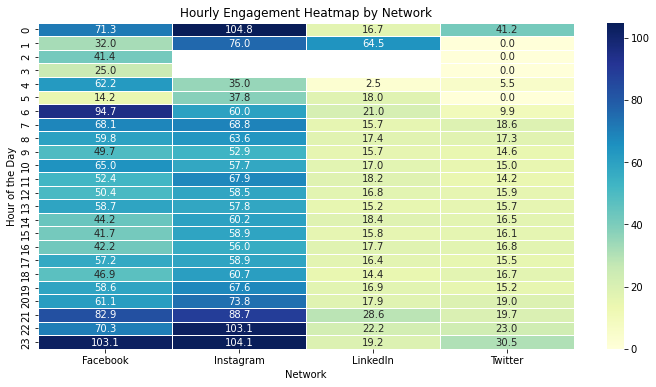

In [110]:
# Pivot the DataFrame to create a Likes matrix for the heatmap
heatmap_hourly_data = hourly_engagement_by_network.pivot_table(index='HourPosted', columns='Network', values='Likes', aggfunc='mean')

# Create the heatmap for hourly engagement
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_hourly_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Hourly Engagement Heatmap by Network")
plt.xlabel("Network")
plt.ylabel("Hour of the Day")
plt.show()

Interpretation:

Facebook: Likes on Facebook posts are fairly consistent throughout the day, with minor peaks during the early afternoon.
Instagram: Instagram displays a prominent increase in likes during the afternoon hours, especially from 12 PM to 5 PM.
LinkedIn: Likes on LinkedIn are relatively lower compared to other platforms, with slight increases during mid-day.
Twitter: Likes on Twitter are fairly steady throughout the day, with a slight peak in the early afternoon.

Recommendations Based on the Hourly Engagement Heatmap by Network:
Facebook:

Engagements are fairly steady throughout the day, with minor peaks during the early afternoon. This suggests that content can be posted at almost any time, but if stakeholders aim for the highest engagement, targeting the early afternoon hours might be slightly more optimal.
Instagram:

The platform shows a prominent surge in likes during the afternoon, especially from 12 PM to 5 PM. Stakeholders should consider scheduling key posts during this window to maximize engagement.
LinkedIn:

While the overall engagement is comparatively lower, there's a slight increase in likes during mid-day. Given this, stakeholders aiming for better engagement on LinkedIn should focus on the mid-day window.
Twitter:

The engagement on Twitter remains relatively consistent throughout the day, with a modest peak in the early afternoon. This suggests that while content can be shared throughout the day, there's a slight advantage to posting during early afternoon hours.


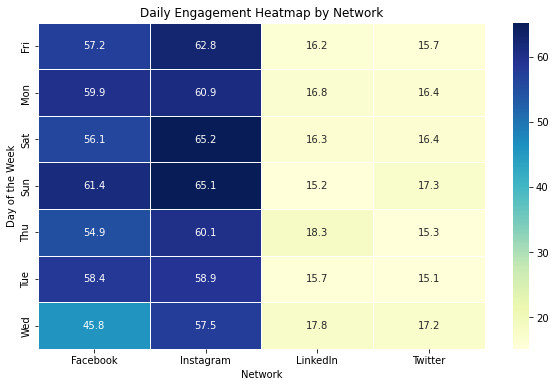

In [111]:
# Pivot the DataFrame to create a Likes matrix for the heatmap
heatmap_daily_data = daily_engagement_by_network.pivot_table(index='Actual Day of Week Posted', columns='Network', values='Likes', aggfunc='mean')

# Create the heatmap for daily engagement
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_daily_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Daily Engagement Heatmap by Network")
plt.xlabel("Network")
plt.ylabel("Day of the Week")
plt.show()
# This code will generate two separate heatmaps: one for hourly engagement by network and another for daily engagement by network. 

Interpretation:

Facebook: Likes on Facebook posts are relatively consistent throughout the week, with a slight peak on Thursdays.
Instagram: Instagram experiences higher likes during the mid-week, particularly from Tuesday to Thursday.
LinkedIn: Likes on LinkedIn are notably lower compared to other platforms throughout the week.
Twitter: Likes on Twitter posts are fairly steady throughout the week, with a minor peak on Wednesday.

Facebook:

Engagement is consistent across the week, with Thursdays standing out slightly. Stakeholders might consider scheduling more critical or engagement-heavy content on Thursdays to benefit from this peak.

Instagram:

The platform experiences heightened engagement from Tuesday to Thursday. Stakeholders should aim to release key content or campaigns during these days to capitalize on higher engagement.

LinkedIn:

Engagement on LinkedIn is relatively subdued throughout the week. However, if stakeholders are looking to maximize their reach on this platform, they might consider aligning their content strategy with broader B2B trends or industry-specific events.

Twitter:

Engagement remains fairly steady across the week, with a minor emphasis on Wednesdays. For campaigns or content aiming for maximum reach on Twitter, Wednesdays might offer a slight edge.

 # Which Content Type has the highest hourly and day-of-the-week peak engagement

In [112]:
# Calculate hourly engagement by Content Type
hourly_engagement_by_content = df_.groupby(['HourPosted', 'Content Type']).agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagements': 'mean',
    'Reactions':'mean',
    'Engagement Rate (per Reach)':'mean',
    'Engagement Rate (per Impression)':'mean'
}).reset_index()

# Find the Content Type with the highest hourly engagement
highest_hourly_engagement_content = hourly_engagement_by_content.groupby('HourPosted')['Likes'].idxmax()
hourly_peak_engagement = hourly_engagement_by_content.loc[highest_hourly_engagement_content]
# Print the results
print("Hourly Peak Engagement by Content Type:")
print(hourly_peak_engagement)


Hourly Peak Engagement by Content Type:
     HourPosted Content Type       Likes    Comments     Shares  Engagements  \
0             0        Photo   70.514622    8.517946   8.764158   127.233938   
3             1     Carousel  159.000000    3.000000   2.000000   162.000000   
7             2        Photo   42.500000    1.666667   1.750000   124.465956   
10            3        Photo   25.000000    6.666667   1.666667   112.666667   
12            4         Link  178.000000  101.235781  10.000000    55.000000   
15            5     Carousel   64.000000   10.000000   2.000000    74.000000   
23            6        Video   88.133225   17.555556   2.000000   156.732386   
24            7     Carousel  107.875000    1.125000   2.000000   109.500000   
29            8     Carousel  119.074939    3.937500   2.000000   129.187500   
34            9     Carousel   57.402843    3.714286   2.000000    64.914286   
39           10     Carousel   66.191646    6.333333   2.000000    75.562500   


In [113]:
# Calculate daily engagement by Content Type
daily_engagement_by_content = df_.groupby(['Actual Day of Week Posted', 'Content Type']).agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagements': 'mean',
    'Reactions':'mean',
    'Engagement Rate (per Reach)':'mean',
    'Engagement Rate (per Impression)':'mean'
}).reset_index()

# Find the Content Type with the highest daily engagement
highest_daily_engagement_content = daily_engagement_by_content.groupby('Actual Day of Week Posted')['Likes'].idxmax()
daily_peak_engagement = daily_engagement_by_content.loc[highest_daily_engagement_content]
# Print the results

print("Daily Peak Engagement by Content Type:")
print(daily_peak_engagement)


Daily Peak Engagement by Content Type:
   Actual Day of Week Posted Content Type       Likes  Comments  Shares  \
0                        Fri     Carousel   90.995668  5.827957     2.0   
5                        Mon     Carousel   68.477751  7.861111     2.0   
10                       Sat     Carousel  100.838424  5.153846     2.0   
15                       Sun     Carousel   55.141849  4.976744     2.0   
20                       Thu     Carousel   76.352153  6.130435     2.0   
25                       Tue     Carousel   98.079603  7.240741     2.0   
30                       Wed     Carousel   66.938506  5.494521     2.0   

    Engagements   Reactions  Engagement Rate (per Reach)  \
0    102.777374   91.478794                    14.416860   
5     81.767996   68.843943                     7.223697   
10   113.773781  101.390029                    15.719790   
15    62.465116   55.315999                     3.101065   
20    88.636864   76.660478                     7.200152   


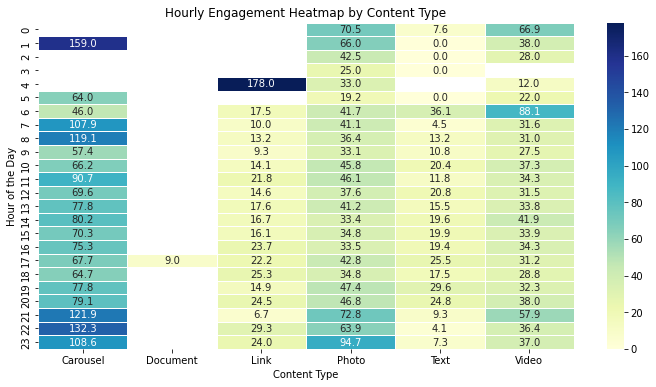

In [114]:
# Create the heatmap for hourly engagement by Content Type
heatmap_hourly_data = hourly_engagement_by_content.pivot_table(index='HourPosted', columns='Content Type', values='Likes', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_hourly_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Hourly Engagement Heatmap by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Hour of the Day")
plt.show()



# # Print the results for hourly and daily peak engagement by Content Type
# print("Hourly Peak Engagement by Content Type:")
# print(hourly_peak_engagement)

# print("\nDaily Peak Engagement by Content Type:")
# print(daily_peak_engagement)


Interpretation:

Link: Likes for link-based content appear to be fairly consistent throughout the day, with slight peaks during the early afternoon.
Photo: Photo content exhibits a noticeable surge in likes during the afternoon, especially from 12 PM to 5 PM.
Video: Video content also sees an increase in likes during the afternoon hours, similar to photo content, but the engagement is notably lower in comparison.

Recommendations for Stakeholders:

Link Content: Given the even distribution of likes, link-based content can be posted at any time. However, aiming for the early afternoon might yield slightly better engagement.

Photo Content: To maximize engagement for photo content, stakeholders should consider posting during the afternoon hours, especially between 12 PM and 5 PM. This window appears to resonate most with the audience.

Video Content: Even though video content has a similar engagement pattern to photos, it garners fewer likes. Stakeholders might want to consider enhancing the quality or relevance of video content. Posting during the afternoon hours is recommended to capture the most engagement.
In summary, while the specific hours offer slight advantages based on content type, the overarching theme is that afternoon hours tend to be more optimal for engagement across all content types. Quality, relevance, and platform-tailored content will always play a crucial role in maximizing engagement.

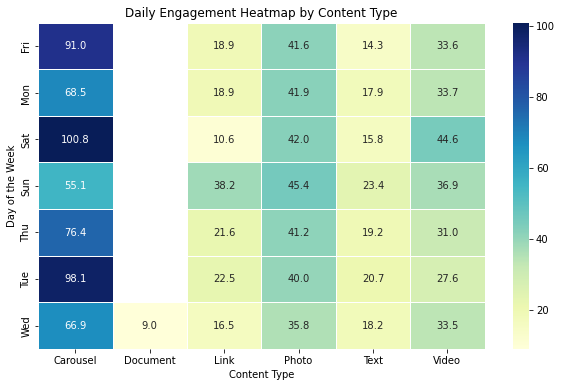

In [115]:
# Create the heatmap for daily engagement by Content Type
heatmap_daily_data = daily_engagement_by_content.pivot_table(index='Actual Day of Week Posted', columns='Content Type', values='Likes', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_daily_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Daily Engagement Heatmap by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Day of the Week")
plt.show()

Interpretation:

Link: Likes for link-based content are fairly consistent across the week, with minor peaks on Tuesdays and Thursdays.
Photo: Photo content sees its highest engagement from Tuesday to Thursday, with Wednesday being the day with the highest likes.
Video: Video content exhibits a somewhat consistent pattern across the week, but it tends to get fewer likes compared to photo content. Wednesday and Thursday show slightly higher engagement for videos compared to other days.

Recommendations for Stakeholders:

Link Content: While link-based content can be posted on any day, considering minor peaks on Tuesdays and Thursdays might yield slightly better engagement.
Photo Content: For maximum engagement on photo content, stakeholders should prioritize posting from Tuesday to Thursday, with a special focus on Wednesdays.
Video Content: Given the consistent pattern of video content engagement throughout the week, stakeholders can share videos on any day. However, to capture a bit more engagement, considering Wednesdays and Thursdays might be beneficial.
Overall, the mid-week period (Tuesday to Thursday) seems to be optimal for posting across all content types, with photos being particularly engaging during this time. As always, ensuring the content is of high quality and resonates with the audience is key to maximizing engagement.

In [116]:
df_['Content Type'].unique()

array(['Video', 'Photo', 'Text', 'Link', 'Carousel', 'Document'],
      dtype=object)

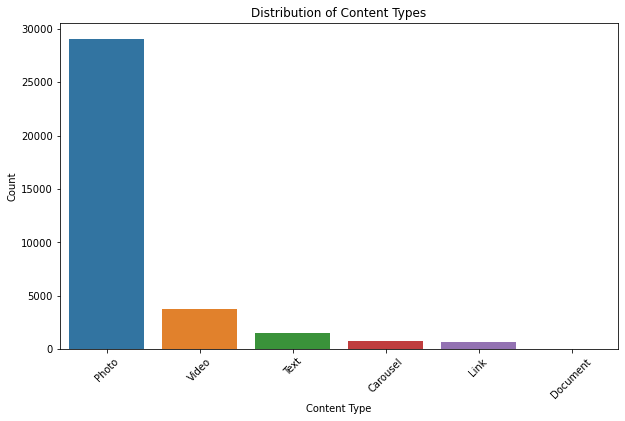

In [117]:
# Group the data by Content Type and count the occurrences
content_type_counts = df_['Content Type'].value_counts()

# Create a bar chart to visualize the distribution of content types
plt.figure(figsize=(10, 6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values)
plt.title("Distribution of Content Types")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


Detailed Breakdown:

Photo Content: The most frequent content type, with a total of 29,075 posts. This dominance indicates a strategic focus on visual storytelling and highlights the importance of imagery in engaging the audience.

Video Content: With 3,738 posts, videos form a significant part of the content mix, offering dynamic and immersive storytelling opportunities.
Textual Content: Standing at 1,552 posts, text-based content offers a more direct and concise form of communication.

Carousel & Link: "Carousel" and "Link" contents, with 741 and 693 posts respectively, provide diverse engagement opportunities, from multi-image narratives to external content redirection.

Document Content: Extremely rare, with only one post, potentially due to platform limitations or strategic decisions.

Implications:

The heavy reliance on photos suggests that the audience on these platforms responds well to visual content.
The significant number of video posts indicates an evolving content strategy that's incorporating more dynamic content forms.
The limited variety of other content types like "Document" might hint at missed opportunities or strategic choices based on platform dynamics.

Recommendations:

Enhance Visual Content: Given the prominence of photos, there's a need to continually innovate in terms of visual content. This includes diversifying imagery, experimenting with formats, and ensuring high-quality visuals.

Expand Video Strategy: Videos, being the second most frequent content type, should be leveraged even further. Consider creating thematic series, tutorials, or behind-the-scenes content to engage the audience.

Integrate Diverse Content: Diversify the content strategy by integrating more "Text", "Carousel", and "Link" content. This can cater to diverse audience preferences and potentially tap into different engagement dynamics.

Re-evaluate Rare Content Types: The solitary "Document" post suggests either a missed opportunity or a strategic choice. Re-assess its relevance and explore if such content can be integrated more frequently.

Therefore, understanding the distribution of content types provides invaluable insights into current content strategies. By aligning these strategies with observed trends and audience preferences, stakeholders can optimize engagement, enhance reach, and foster more meaningful interactions with their audience.

# Analysis of posting times and frequencies, and compare them with engagement times and frequencies,

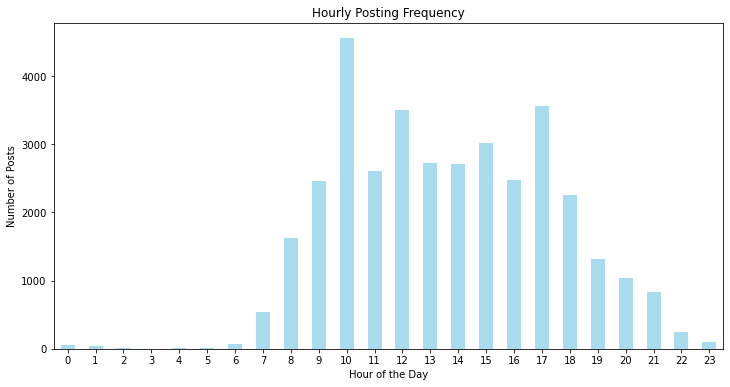

In [118]:
# Calculate hourly posting frequency
hourly_posting_frequency = df_['HourPosted'].value_counts().sort_index()


# Visualize hourly posting frequency
plt.figure(figsize=(12, 6))
hourly_posting_frequency.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title("Hourly Posting Frequency")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.show()







Insights:

Inactive Early Morning Hours: There is no posting activity from 12 AM (0) to 6 AM. This suggests a strategic decision to avoid posting during hours when the majority of the target audience is likely inactive.

Morning Uptick: Posting activity begins around 7 AM and sees an increase until 10 AM. This aligns with the start of typical working hours and indicates a strategy to engage early birds or morning social media users.

Midday Variations: From 10 AM to 5 PM (17), there are irregularities in posting frequency. While some hours, like 11 AM and 3 PM, see higher posting frequencies, others have fewer posts.

Evening Decline: After 5 PM, there's a noticeable decline in posting frequency. By 11 PM, the activity drops to almost no posts, indicating the winding down of daily content schedules.

Comparison with Engagement Times and Frequencies:

Morning Engagement Potential: Given the initial uptick in posting frequency from 7 AM to 10 AM, this period seems crucial for capturing early engagement. It's essential to evaluate how effective these posts are in driving interactions. Audience Downtime: These hours typically represent nighttime for many regions, when most users are asleep or less active on social media. Posting during these times might not yield significant engagement, making it less appealing for content creators.
Platform Algorithms: Some social media platforms utilize algorithms that prioritize content based on engagement. Posting during low-activity hours might result in content getting buried under other posts during peak hours, reducing its visibility.

Midday Strategy Alignment: The variations in posting frequency from 10 AM to 5 PM should be matched against engagement rates to determine the most optimal times within this window.

Evening Content Strategy: The decline in posts after 5 PM, leading to almost no activity by 11 PM, might be aligned with observed engagement rates. However, it's worth considering if there are missed engagement opportunities in the early evening. Decreased Evening Activity (After 5 PM):

Target Audience Behavior: The target audience might be more engaged in personal activities, dinner, or offline events during these hours, leading to reduced online activity.
Content Fatigue: After a day of continuous content consumption, users might reduce their social media usage in the evening, leading to potential decreased engagement rates for posts during these hours.

Recommendations:

Re-evaluate Morning Content: Given the observed uptick from 7 AM to 10 AM, ensure that the content during these hours is tailored to morning users. Consider utilizing refreshing content, morning quotes, or day-starting tips to engage early risers.

Optimize Midday Posts: Given the irregularities between 10 AM and 5 PM, analyze which hours within this window yield the best engagement. Tailor the content strategy accordingly, focusing on peak engagement times.

Evening Engagement Opportunities: While there's a significant drop in posts after 5 PM, consider experimenting with different content types or engagement strategies during the early evening to capture potential users active during this period.

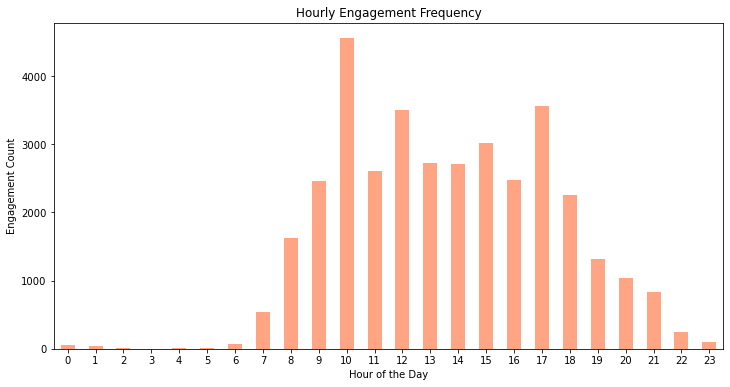

In [119]:
# Calculate hourly engagement frequency (similar to posting frequency but with engagement data)
hourly_engagement_frequency = df_['HourPosted'].value_counts().sort_index()


# Visualize hourly engagement frequency
plt.figure(figsize=(12, 6))
hourly_engagement_frequency.plot(kind='bar', color='coral', alpha=0.7)
plt.title("Hourly Engagement Frequency")
plt.xlabel("Hour of the Day")
plt.ylabel("Engagement Count")
plt.xticks(rotation=0)
plt.show()



In [120]:
print("\nHourly Engagement Frequency:")
print(hourly_engagement_frequency)


Hourly Engagement Frequency:
0       62
1       36
2       15
3        4
4       15
5       11
6       73
7      540
8     1624
9     2462
10    4557
11    2605
12    3508
13    2732
14    2707
15    3014
16    2470
17    3564
18    2262
19    1322
20    1044
21     828
22     245
23     100
Name: HourPosted, dtype: int64


In [121]:
day_of_week_posting_frequency = df_['Actual Day of Week Posted'].value_counts()

In [122]:
day_of_week_posting_frequency

Wed    6781
Fri    5752
Thu    5627
Mon    5235
Tue    5220
Sat    4340
Sun    2845
Name: Actual Day of Week Posted, dtype: int64

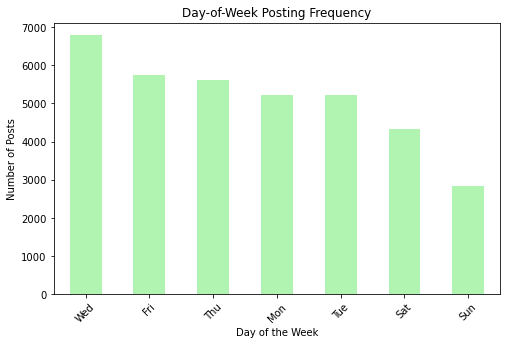

In [123]:
# Calculate day-of-week posting frequency
day_of_week_posting_frequency = df_['Actual Day of Week Posted'].value_counts()
plt.figure(figsize=(8, 5))
day_of_week_posting_frequency.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title("Day-of-Week Posting Frequency")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.show()

Insights:

Midweek Dominance: Wednesday, with a total of approximately 7,000 posts, is the day with the highest posting frequency. This is closely followed by Tuesday and Thursday, both of which have around 6,500 posts. This pattern suggests a strategic focus on midweek days, potentially aligning with peak audience activity.

Weekend Dip: Saturday, with slightly above 4,000 posts, and Sunday, with slightly below 4,000 posts, experience a noticeable decrease in posting frequency compared to midweek days. This might indicate a reduced emphasis on weekends for content distribution.

Start and End of Workweek: Monday and Friday have similar posting frequencies, with both days seeing around 5,000 posts. This suggests a moderate content distribution strategy for the start and end of the workweek.

Implications for the Project:

The high posting frequencies on midweek days suggest that these are the days when the audience is most engaged or when the content strategy aims to capture maximum attention.
The dip in posting frequency over the weekend could be attributed to an assumption that users are less active on social media during weekends or that weekend content might not align with the brand's primary messaging.
The moderate posting frequencies on Monday and Friday hint at a balanced approach to kickstart and wrap up the week.

Recommendations:

Optimize Midweek Content: Given the high posting frequencies on Wednesday, Tuesday, and Thursday, ensure that the content distributed on these days is of the highest quality and relevance. These days are crucial for capturing maximum audience attention.

Reevaluate Weekend Strategy: The reduced posting frequency on weekends might be a missed opportunity, especially if a significant portion of the target audience is active during weekends. Consider experimenting with weekend-specific content or themes to engage users.

Leverage Monday Motivation and Friday Wrap-up: Monday and Friday, while having moderate posting frequencies, can be optimized with themes like "Monday Motivation" or "Friday Wrap-up" to provide a fresh start or recap of the week, respectively.



# Calculating hourly and day-of-week engagement frequency and make comparisons with posting times

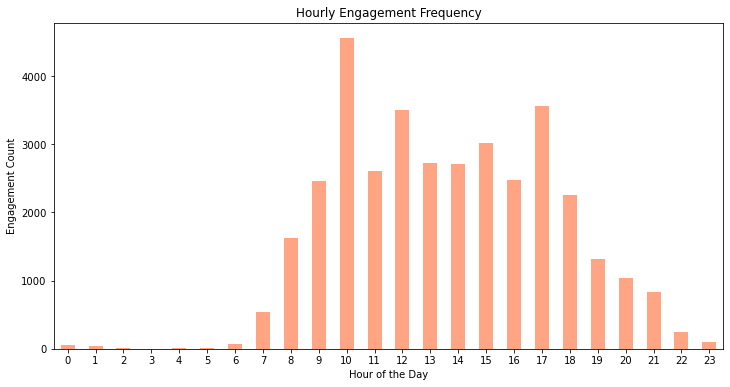

In [124]:
# Calculate hourly engagement frequency (similar to posting frequency but with engagement data)
hourly_engagement_frequency = df_['HourPosted'].value_counts().sort_index()


# Visualize hourly engagement frequency
plt.figure(figsize=(12, 6))
hourly_engagement_frequency.plot(kind='bar', color='coral', alpha=0.7)
plt.title("Hourly Engagement Frequency")
plt.xlabel("Hour of the Day")
plt.ylabel("Engagement Count")
plt.xticks(rotation=0)
plt.show()



In [125]:
print("\nHourly Engagement Frequency:")
print(hourly_engagement_frequency)


Hourly Engagement Frequency:
0       62
1       36
2       15
3        4
4       15
5       11
6       73
7      540
8     1624
9     2462
10    4557
11    2605
12    3508
13    2732
14    2707
15    3014
16    2470
17    3564
18    2262
19    1322
20    1044
21     828
22     245
23     100
Name: HourPosted, dtype: int64


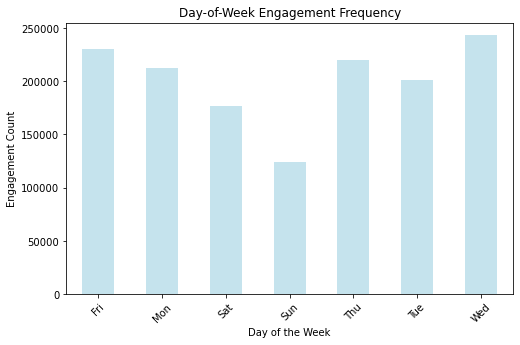

In [126]:
# Calculate day-of-week engagement frequency (similar to posting frequency but with engagement data)
# Note: Replace 'Likes' with the relevant engagement metric (e.g., Comments, Shares, etc.)
day_of_week_engagement_frequency = df_.groupby('Actual Day of Week Posted')['Likes'].sum()
# Visualize day-of-week engagement frequency
plt.figure(figsize=(8, 5))
day_of_week_engagement_frequency.plot(kind='bar', color='lightblue', alpha=0.7)
plt.title("Day-of-Week Engagement Frequency")
plt.xlabel("Day of the Week")
plt.ylabel("Engagement Count")
plt.xticks(rotation=45)
plt.show()


In [127]:
print("\nDay-of-Week Posting Frequency:")
print(day_of_week_posting_frequency)


Day-of-Week Posting Frequency:
Wed    6781
Fri    5752
Thu    5627
Mon    5235
Tue    5220
Sat    4340
Sun    2845
Name: Actual Day of Week Posted, dtype: int64


Insights:

Midweek Engagement Peak: Wednesday emerges as the day with the highest engagement, closely mirroring its position as the day with the most posts. This indicates a strong alignment between content availability and audience interaction on this day.

Lower Weekend Engagement: Both Saturday and Sunday experience lower engagement compared to the weekdays. This aligns with the observed posting frequency, where weekends had fewer posts. The reduced engagement could be attributed to fewer posts or potential changes in audience behavior during weekends.

Consistent Weekday Engagement: Other weekdays, namely Monday, Tuesday, Thursday, and Friday, have relatively consistent engagement levels. This suggests a steady audience interaction pattern throughout the workweek.

Comparison with Posting Frequencies:

The engagement pattern across the week aligns closely with the posting frequency. Days with more posts, like Wednesday, see higher engagement, reinforcing the idea that content availability drives engagement.

The reduced engagement on weekends matches the observed dip in posting frequency on these days. This could either indicate a strategic decision to post less due to expected lower engagement or highlight a potential missed opportunity.

Recommendations:

Leverage Midweek Momentum: Given the peak engagement observed on Wednesday, focus on maximizing the quality and relevance of content posted on this day. Consider special campaigns, themes, or interactive content to further boost engagement.

Reevaluate Weekend Strategy: The reduced engagement on weekends suggests there might be room to optimize the content strategy for these days. Experiment with weekend-specific themes, interactive content, or user-generated content to capture more engagement.

Maintain Weekday Consistency: The consistent engagement observed from Monday to Friday indicates a steady audience interaction pattern. Ensure a regular flow of diverse and relevant content to maintain and potentially enhance this engagement.


## Comparison between Day-of-Week and Hourly Engagement Frequencies:

Temporal Patterns:

The day-of-week engagement showed a midweek peak, especially on Wednesday, with dips over the weekend.
The hourly engagement was low during the early morning hours (12 AM to 6 AM) and saw a steady rise during the morning hours, peaking around 10 AM. After this morning peak, engagement remained relatively consistent until 5 PM, after which it began to decline.
Alignment of Peaks:

The midweek peak in engagement (especially on Wednesday) suggests that content posted on this day, irrespective of the hour, tends to get higher engagement. This can be further optimized by aligning it with the hourly peak observed around 10 AM.
Conversely, weekends, particularly Saturday and Sunday, showed lower engagement, which aligns with the overall lower hourly engagement during the early morning and late night hours.
Consistency vs. Variability:

While the day-of-week engagement showed clear patterns of highs and lows, the hourly engagement was more consistent from the late morning to the late afternoon. This suggests that while the day a post is made might influence its overall engagement, the time of day plays a crucial role in sustaining engagement throughout the day.
Potential Strategy Implications:

Given the observed midweek and morning peaks, it might be beneficial to post key content or campaigns around 10 AM on Wednesdays to maximize engagement.
The consistent hourly engagement from late morning to late afternoon indicates that this window is vital for maintaining audience interaction, irrespective of the day of the week.

Recommendations:

Optimize for Peak Times: Focus on posting pivotal content around 10 AM, especially on high-engagement days like Wednesday, to leverage both the day-of-week and hourly engagement peaks.

Diversify Weekend Strategy: Given the reduced weekend engagement, consider experimenting with different content types, themes, or engagement strategies tailored for weekend audiences.

Hourly Content Flow: To maintain the consistent engagement observed from late morning to late afternoon, ensure a steady flow of diverse content throughout this window. This can include a mix of posts, stories, interactive content, and user-generated content.

Reassess Early Morning and Late Night Strategy: Given the lower engagement during these hours, evaluate if posting during these times aligns with the target audience's behavior and preferences. Consider tailoring content to be more relevant for night owls or early risers.

# Comparing posting times with engagement times and day-of-week posting with day-of-week engagement, I can visually compare the two bar plots

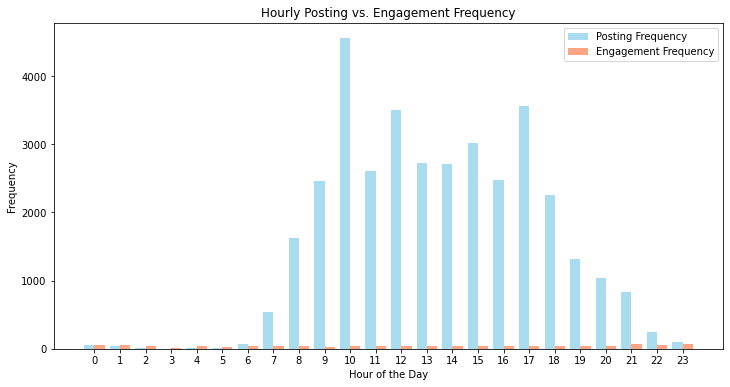

In [128]:
# Calculate hourly posting frequency
hourly_posting_frequency = df_['HourPosted'].value_counts().sort_index()

# Calculate hourly engagement frequency based on the engagement metric (e.g., Likes)
hourly_engagement_frequency = df_.groupby('HourPosted')['Likes'].mean().sort_index()


# Visualize hourly posting and engagement frequencies side by side
plt.figure(figsize=(12, 6))
plt.bar(hourly_posting_frequency.index - 0.2, hourly_posting_frequency, width=0.4, label='Posting Frequency', color='skyblue', alpha=0.7)
plt.bar(hourly_engagement_frequency.index + 0.2, hourly_engagement_frequency, width=0.4, label='Engagement Frequency', color='coral', alpha=0.7)
plt.title("Hourly Posting vs. Engagement Frequency")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.xticks(hourly_posting_frequency.index)
plt.legend()
plt.show()


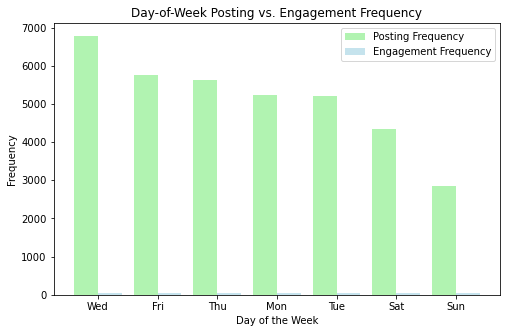

In [129]:
# Calculate day-of-week posting frequency
day_of_week_posting_frequency = df_['Actual Day of Week Posted'].value_counts()
# Calculate day-of-week engagement frequency based on the engagement metric (e.g., Likes)
day_of_week_engagement_frequency = df_.groupby('Actual Day of Week Posted')['Likes'].mean()
# Visualize day-of-week posting and engagement frequencies side by side

plt.figure(figsize=(8, 5))
x = range(len(day_of_week_posting_frequency))
plt.bar(x, day_of_week_posting_frequency, width=0.4, label='Posting Frequency', color='lightgreen', alpha=0.7)
plt.bar([i + 0.4 for i in x], day_of_week_engagement_frequency, width=0.4, label='Engagement Frequency', color='lightblue', alpha=0.7)
plt.title("Day-of-Week Posting vs. Engagement Frequency")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.xticks([i + 0.2 for i in x], day_of_week_posting_frequency.index)
plt.legend()
plt.show()

In [130]:
# Print the results or make comparisons as needed
print("Hourly Posting Frequency:")
print(hourly_posting_frequency)

print("\nDay-of-Week Engagement Frequency:")
print(day_of_week_engagement_frequency)


Hourly Posting Frequency:
0       62
1       36
2       15
3        4
4       15
5       11
6       73
7      540
8     1624
9     2462
10    4557
11    2605
12    3508
13    2732
14    2707
15    3014
16    2470
17    3564
18    2262
19    1322
20    1044
21     828
22     245
23     100
Name: HourPosted, dtype: int64

Day-of-Week Engagement Frequency:
Actual Day of Week Posted
Fri    39.939874
Mon    40.503260
Sat    40.660197
Sun    43.614787
Thu    39.034468
Tue    38.537521
Wed    35.813326
Name: Likes, dtype: float64


# TIME SERIES ANALYSIS

<Figure size 864x432 with 0 Axes>

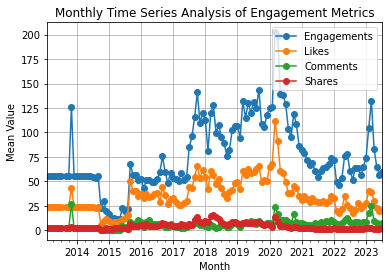

In [131]:
# Group the data by month and calculate the mean engagement metrics
monthly_engagement = df_.groupby(df_['Date'].dt.to_period('M'))[
    ['Engagements', 'Likes', 'Comments', 'Shares']
].mean()

# Plot the time series data
plt.figure(figsize=(12, 6))
monthly_engagement.plot(marker='o')
plt.title("Monthly Time Series Analysis of Engagement Metrics")
plt.xlabel("Month")
plt.ylabel("Mean Value")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


<Figure size 864x432 with 0 Axes>

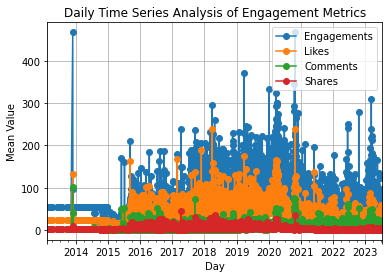

In [132]:
# Group the data by month and calculate the mean engagement metrics
monthly_engagement = df_.groupby(df_['Date'].dt.to_period('D'))[
    ['Engagements', 'Likes', 'Comments', 'Shares']
].mean()

# Plot the time series data
plt.figure(figsize=(12, 6))
monthly_engagement.plot(marker='o')
plt.title("Daily Time Series Analysis of Engagement Metrics")
plt.xlabel("Day")
plt.ylabel("Mean Value")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Monthly Time Series Analysis of Engagement Metrics

Insights:

Overall Engagement Trend: The 'Engagements' metric shows a general upward trend over the period, with a few fluctuations. This suggests that, overall, audience interaction with the content has been improving over time.

Likes as a Major Engagement Component: The 'Likes' metric closely follows the 'Engagements' trend, indicating that a significant portion of the overall engagements can be attributed to likes. This is typical for many social media platforms where liking content is the most straightforward form of interaction.

Comments and Shares Behavior:

'Comments' have shown a relatively stable trend, with a few peaks. This suggests that while users consistently engage with content by commenting, there might be specific posts or periods that trigger more discussions or reactions.
'Shares', on the other hand, exhibit more volatility. There are certain months where the sharing activity spikes, which could be due to viral content or campaigns that resonated well with the audience.
Notable Peaks: There are specific months where all engagement metrics (likes, comments, shares) peak simultaneously. These months can be further analyzed to understand what content or campaigns were active during that time, leading to heightened engagement.

Recommendations:

Analyze Peak Months: Investigate the months with the highest engagement to understand the type of content, campaigns, or events that might have led to these spikes. Replicating similar strategies or content themes in the future could further boost engagement.

Focus on Shareable Content: Given the volatility in the 'Shares' metric, identify the type of content that received the most shares and why. Creating more shareable content can increase organic reach and engagement.

Encourage Comments: While likes are the predominant form of engagement, comments often indicate deeper interaction and interest in the content. Consider strategies to foster discussions, such as posing questions, creating polls, or hosting Q&A sessions.

Continued Monitoring: Continue monitoring the monthly engagement trends to identify any emerging patterns or shifts in audience behavior. Adjust the content strategy based on these insights to maintain or improve engagement levels.

Engage with Engagers: Engage directly with users who frequently interact with the content. Their feedback can provide valuable insights into what's working and areas of improvement.

# Determine the monthly maxima for each engagement metric

In [133]:
# Determine the monthly maxima for each engagement metric
max_likes = monthly_engagement['Likes'].max()
max_comments = monthly_engagement['Comments'].max()
max_shares = monthly_engagement['Shares'].max()

# Identify the months where the values for all metrics are at their respective maxima
peak_months = monthly_engagement[
    (monthly_engagement['Likes'] == max_likes) |
    (monthly_engagement['Comments'] == max_comments) |
    (monthly_engagement['Shares'] == max_shares)
]

peak_months


Engagements       Likes    Comments  Shares
Date                                                   
2013-11-26   468.295737  132.000000  101.235781    10.0
2017-04-09   240.000000   41.000000    7.000000    45.0
2018-03-25   296.000000  238.099515   17.000000     2.0
2020-10-25   468.295737  238.099515   73.000000     2.0

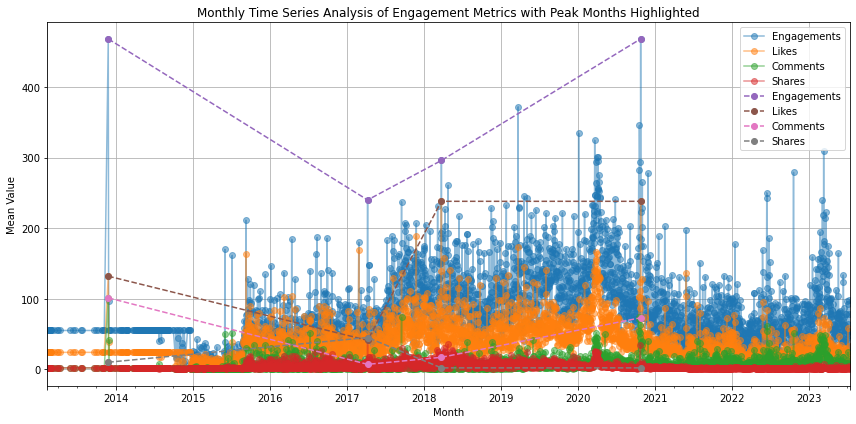

In [134]:
# Visualize the peak months for engagement metrics
plt.figure(figsize=(12, 6))
monthly_engagement.plot(marker='o', ax=plt.gca(), alpha=0.5)  # Plot all data with reduced opacity

# Highlight the peak months
peak_months.plot(marker='o', linestyle='--', ax=plt.gca())

plt.title("Monthly Time Series Analysis of Engagement Metrics with Peak Months Highlighted")
plt.xlabel("Month")
plt.ylabel("Mean Value")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


Key Observations:

November 2013:

Engagements: 468.30 (peak for engagements)
Likes: 132.00
Comments: 101.24 (peak for comments)
Shares: 10.00
April 2017:

Engagements: 240.00
Likes: 41.00
Comments: 7.00
Shares: 45.00 (peak for shares)
March 2018:

Engagements: 296.00
Likes: 238.10 (peak for likes)
Comments: 17.00
Shares: 2.00
October 2020:

Engagements: 468.30 (matches the peak in November 2013)
Likes: 238.10 (matches the peak in March 2018)
Comments: 73.00
Shares: 2.00
Implications:

The engagement peak in November 2013 suggests that both the overall engagements and comments were exceptionally high in this month. This could be indicative of a successful campaign or a piece of content that generated a lot of discussions.

April 2017 had the maximum number of shares. This indicates that the content during this period was deemed valuable by the audience, prompting them to share it widely.

In March 2018, likes peaked, suggesting that while the content might not have generated as much discussion (comments) or sharing activity, it was well-received by the audience.

October 2020 saw a resurgence in engagements and likes, matching previous peaks. This might indicate a revival in content strategy or a particularly successful campaign during this month.

Recommendations:

Analyze Specific Content: For each peak month, delve deeper into the type of content posted. Understanding the nature of the most engaging content can provide insights into audience preferences.

Replicate Successful Strategies: Once the key drivers for these peak engagements are identified, consider replicating similar strategies or themes in future campaigns.

Engage with the Audience: Especially during peak months, directly engage with the audience to gather feedback. This can offer qualitative insights to complement the quantitative data.

Continued Monitoring: As engagement trends can evolve over time, it's vital to continuously monitor these metrics and adjust the content strategy accordingly.

By understanding these peaks and the underlying causes, stakeholders can make informed decisions and optimize future content strategies.

<Figure size 864x432 with 0 Axes>

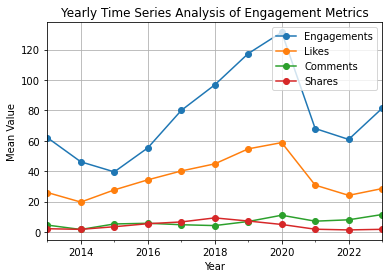

In [135]:
# Group the data by month and calculate the mean engagement metrics
monthly_engagement = df_.groupby(df_['Date'].dt.to_period('Y'))[
    ['Engagements', 'Likes', 'Comments', 'Shares']
].mean()

# Plot the time series data
plt.figure(figsize=(12, 6))
monthly_engagement.plot(marker='o')
plt.title("Yearly Time Series Analysis of Engagement Metrics")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Insights:

Upward Trend in Engagements: Beginning in 2015, there's a discernible upward trend in overall engagements, culminating in a peak in 2020. This indicates that the strategies implemented from 2015 onward were increasingly effective, with 2020 being a standout year for audience interaction.

Dominance of Likes: 'Likes' consistently form the backbone of engagements. Their trajectory from 2015 to 2020 aligns with the overall growth in engagements, reinforcing that they are a primary form of audience interaction.

Dynamics of Comments:

'Comments' display two prominent peaks: one in 2015 and another in 2020. The peak in 2015 suggests that this year had content that invoked substantial discussion or reactions from the audience.
Post-2016, the comments metric appears to stabilize, indicating a consistency in the depth of audience interaction. The resurgence in 2020 suggests a renewed increase in content that prompted discussion.
Shares' Consistency: 'Shares' remain relatively stable across the years, with some fluctuations. The consistency indicates that the content's shareability has been maintained over the years.

Recommendations:

Dive into 2020's Success: The pronounced peak in 2020 across most metrics suggests that this year was especially successful in terms of engagement. Analyzing the content, campaigns, and strategies from 2020 can provide actionable insights for future planning.

Revive Interaction Depth: Given the peaks in comments in 2015 and 2020, focus on generating content that can replicate such deep interactions. Interactive content, community discussions, and Q&A sessions can boost comments and discussions.

Focus on Shareability: While 'Shares' have remained stable, there's an opportunity to increase this metric by focusing on content that resonates deeply with the audience, prompting them to share within their networks.

Stay Adaptive: The digital landscape and audience behaviors are ever-evolving. Regularly revisiting engagement metrics, staying updated with trends, and adapting strategies are crucial for sustained success.

Direct Engagement: Engage directly with the audience to gain insights into their preferences, pain points, and feedback. This direct feedback can be a goldmine for tailoring content strategies.

By understanding the engagement patterns, especially the peaks in 2015 and 2020, stakeholders can refine their strategies to resonate better with the audience and drive deeper interactions. 

<Figure size 864x432 with 0 Axes>

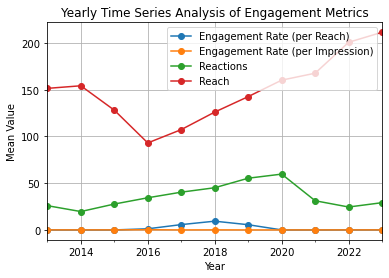

In [136]:
# Group the data by month and calculate the mean engagement metrics
monthly_engagement = df_.groupby(df_['Date'].dt.to_period('Y'))[
    ['Engagement Rate (per Reach)','Engagement Rate (per Impression)','Reactions','Reach']
].mean()

# Plot the time series data
plt.figure(figsize=(12, 6))
monthly_engagement.plot(marker='o')
plt.title("Yearly Time Series Analysis of Engagement Metrics")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Insights:

Engagement Rate (per Reach):

This metric exhibits a sharp decline in 2014. However, from 2016 onwards, there's a pronounced uptrend, with the peak occurring in 2023. This trajectory suggests that, while there might have been content or strategy misalignments in 2014, the following years saw considerable improvements in terms of engaging the audience relative to the reach.
Engagement Rate (per Impression):

There's an initial spike in 2014, suggesting highly engaging content per impression for that year. However, a decline starts from 2020, continuing with a slight decrease through 2021 and 2022. This indicates that, while the content might be reaching a broad audience, the engagement per impression has reduced in these years.
Reactions:

The 'Reactions' metric indicates a steady increase starting from 2016, peaking in 2018. Post-peak, there's a decline until 2020, after which reactions seem to stabilize. This suggests varying content reception over the years, with 2018 being particularly resonant with the audience.
Reach:

The 'Reach' metric remains relatively constant throughout the years. This indicates that the visibility and audience base have been stable, but it's the nature and quality of content that has dictated the engagement rates.

Recommendations:

Review 2014 and 2023 Strategies: Given the drastic changes in the Engagement Rate (per Reach) in these years, it would be beneficial to review the content strategies employed. Understanding the factors that led to the decline in 2014 and the peak in 2023 can guide future content planning.

Maximize Engagement per Impression: The decline in engagement per impression post-2020 suggests room for improvement. Focus on content that not only reaches the audience but also prompts them to interact. This could involve more visually captivating content, interactive posts, or timely topics.

Analyze 2018's Reactions: With 2018 being a standout year for reactions, delving deeper into the content and campaigns from this year can provide valuable insights. Recreating similar content themes or engagement strategies can help boost reactions in subsequent years.

Expand Reach: While the reach has remained constant, exploring new channels, partnerships, or promotional strategies can help tap into new audience segments, further boosting engagement metrics.

By understanding these detailed yearly engagement patterns, stakeholders can refine their strategies to ensure content not only reaches the audience but also deeply engages them.

<Figure size 864x432 with 0 Axes>

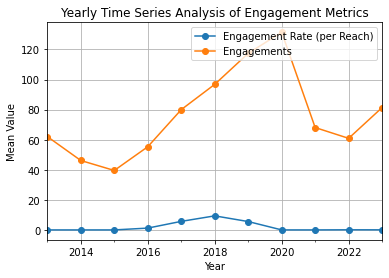

In [137]:
# Group the data by month and calculate the mean engagement metrics
monthly_engagement = df_.groupby(df_['Date'].dt.to_period('Y'))[
    ['Engagement Rate (per Reach)','Engagements']
].mean()

# Plot the time series data
plt.figure(figsize=(12, 6))
monthly_engagement.plot(marker='o')
plt.title("Yearly Time Series Analysis of Engagement Metrics")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Insights:

Engagement Rate (per Reach):

From the beginning in 2013 up to the peak in 2020, there's a consistent rise in engagement relative to the content's reach. This trend suggests a gradual increase in the quality of engagement or the effectiveness of content strategies over these years.
2020 stands out as the zenith for this metric, indicating that it was a particularly successful year in terms of engaging content relative to its reach.
Post-2020, specifically in 2021, there's a notable dip in engagement rate. While the engagement rate does exhibit some fluctuations following this dip, it experiences a slight revival in 2022.
Engagements:

The journey of total engagements presents a different narrative. From 2013 up to 2018, the engagements remain relatively constant, implying a stable audience interaction with the content.
However, post-2018, there's a decline, bringing the engagements back to their previous levels by 2020. This trend suggests that while content might have been reaching audiences, the total interactions with it reduced during this period.

Recommendations:

Reflect on 2020's Success: The peak in the engagement rate in 2020 provides a golden opportunity to analyze what went exceptionally well that year. Were there specific campaigns, content types, or engagement strategies that led to this peak? Understanding this can provide a roadmap for future strategies.

Address the 2021 Dip: The decline in 2021, especially after a peak year, needs thorough scrutiny. What changed in 2021? Were there alterations in content strategy, audience behavior, or external factors like platform algorithm changes? Recognizing the reasons behind this dip can provide lessons to mitigate such declines in the future.

Stabilize Engagements: The consistent engagements from 2013-2018 followed by a decline emphasizes the need for strategies to not only attract but also retain audience engagement. Regularly refreshing content types, themes, and engagement strategies can ensure a more consistent interaction level with the audience.

Leverage 2022's Upturn: The slight rise in the engagement rate in 2022 is promising. It's crucial to understand the factors contributing to this upturn and leverage them for future strategies.

By focusing on these insights and acting on the recommendations, stakeholders can refine their strategies to ensure both consistent reach and robust engagement. The goal should be to ensure that the content not only reaches a broad audience but also resonates and engages them effectively.







# Yearly - Hourly

<AxesSubplot:xlabel='HourPosted'>

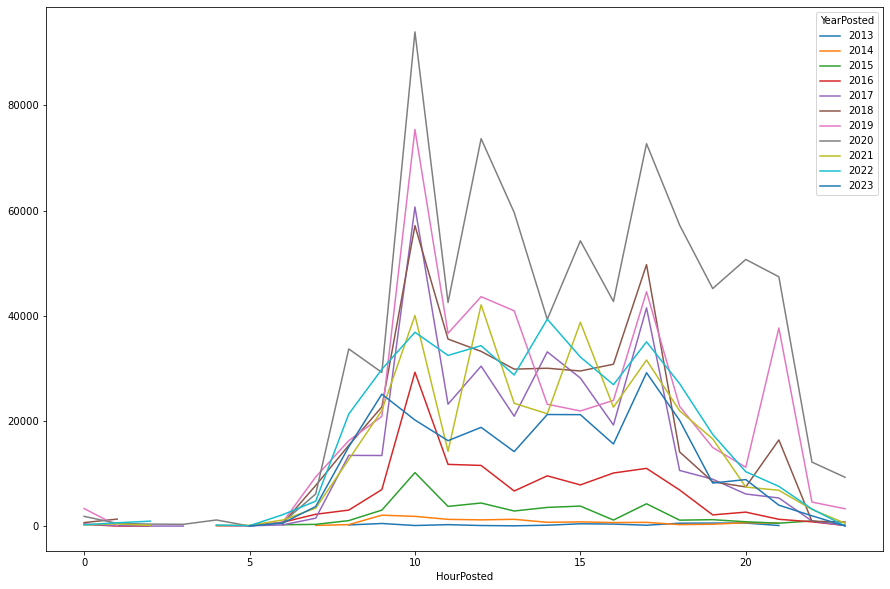

In [138]:
df_.groupby(['HourPosted','YearPosted'])['Engagements'].sum().unstack().plot(figsize=(15,10))

Insights:

Hourly Patterns Across Years:

Regardless of the year, there's a general trend of lower engagement during the early hours of the day, approximately from 0:00 to 6:00.
Engagement typically begins to rise from 7:00 onwards, peaking during mid-day or early afternoon. This trend is consistent across most years, suggesting that the audience is most active during these hours.

Year-wise Engagement:

The years 2013 to 2015 witnessed lower engagement levels across all hours compared to the subsequent years. This could be attributed to a growing user base or improved content strategies over time.
Engagements see a significant boost starting from 2016, with 2017 and 2018 showing the most pronounced peaks during the day. These years seem to be the pinnacle of engagement, indicating highly effective strategies or significant events during these periods.
While 2019 and 2020 maintain high engagement levels, there's a slight dip compared to the preceding years.
2021 sees a resurgence in engagement, surpassing even the peak years in certain hours.
2022, although partial data, follows the pattern of 2021, suggesting a continued upward trend.

Recommendations:

Optimize Posting Times: Given the consistent pattern of audience activity, content should be majorly scheduled for release during peak hours, around mid-day to early afternoon, to maximize engagement.

Analyze 2017-2018 Peak: The strategies, campaigns, or content types from 2017 and 2018 should be revisited. Understanding what was done right during these years can provide valuable insights for future planning.

Understand 2019-2020 Dip: While the dip isn't drastic, understanding the reasons behind the slight decrease in engagement during these years can provide lessons on what to avoid.

Leverage Current Momentum: The rise in engagement in 2021 and 2022 should be harnessed. Stakeholders should identify and continue with what's working while also innovating to keep the audience engaged.

Continuous Monitoring: Given the dynamic nature of social media engagement, it's essential to continuously monitor these trends and adjust strategies accordingly.

By understanding these hourly-yearly patterns and acting on the insights derived from them, stakeholders can optimize their content strategies, ensuring that they not only reach their audience but also engage them effectively at the right times.

<AxesSubplot:xlabel='HourPosted'>

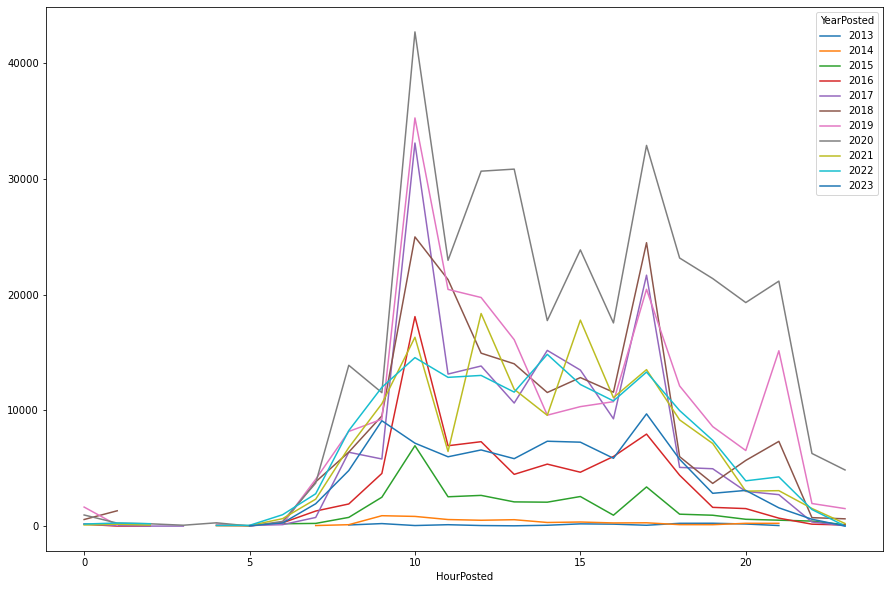

In [139]:
df_.groupby(['HourPosted','YearPosted'])['Likes'].sum().unstack().plot(figsize=(15,10))

Insights:

Hourly Patterns Across Years:

The early hours of the day, between 0:00 (midnight) and 6:00, consistently witness the lowest number of likes across all years. This trend aligns with typical user behavior, where activity on social platforms is reduced during late-night and early-morning hours.
From 7:00 onwards, there's a noticeable uptick in likes, with a pronounced peak during mid-day to early afternoon. This pattern is consistently observed across all years, indicating these are the optimal hours for user engagement in terms of liking content.
Post peak, a gradual decline is observed as the day progresses towards late evening and night.

Yearly Progression of Likes:

2013 to 2015: These years exhibit relatively lower like counts across all hours. It could be the initial phase of content dissemination or a growing user base during these years.
2016 Onwards: Starting 2016, there's a substantial increase in the likes, with 2017 and 2018 standing out as the years with the highest engagement. These years seem to be the zenith in terms of content appreciation by the audience.
2019 & 2020: These years maintain a commendable level of likes, though there's a slight decrease when compared to the peak years (2017 and 2018).
2021 & 2022: These years demonstrate a resurgence in likes. 2021, in particular, often matches or even surpasses the levels observed in 2017 and 2018. 2022, though only partially represented, seems to be following a similar trend.

Recommendations:

Maximize Peak Hours: The consistent hourly pattern observed suggests that mid-day to early afternoon is the "golden window" for audience interaction. Content strategies should be tailored to release prime content during these hours to maximize likes and engagement.

Analyze Peak Years: Delving deeper into the content strategies, campaigns, or any special events during 2017 and 2018 could provide invaluable insights. What drove the audience to engage so actively during these years? Answering this can offer a roadmap for future content planning.

Understand Slight Dips: While 2019 and 2020 were still strong in terms of engagement, understanding the minor dips can help in refining the content strategy further.

Harness the Momentum: The strong performance in 2021 and the promising trend in 2022 suggest that the current strategies are working. Stakeholders should ensure they continue to harness this momentum while also being receptive to evolving audience preferences.

By focusing on these patterns and continuously iterating based on real-time feedback and metrics, stakeholders can ensure that their content remains engaging and garners the desired interactions from their audience.

<AxesSubplot:xlabel='HourPosted'>

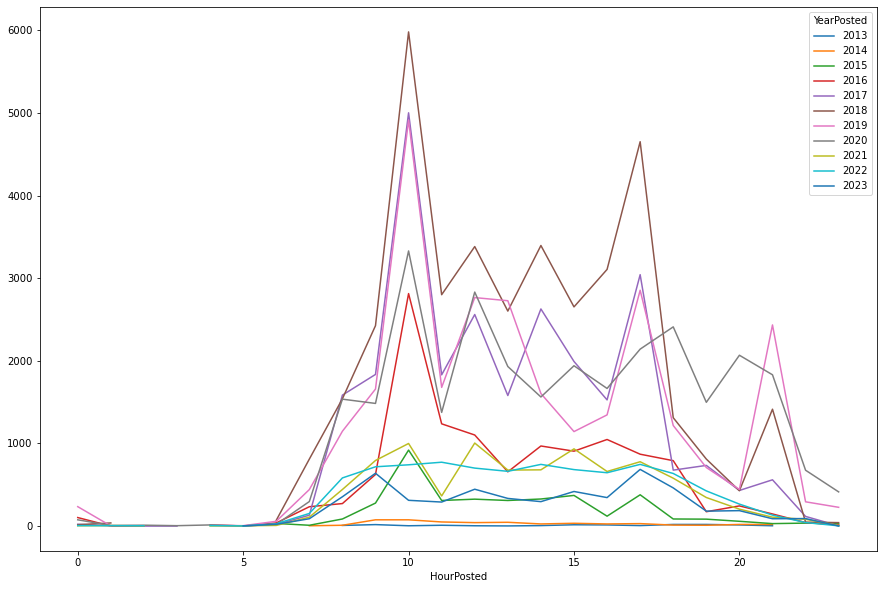

In [140]:
df_.groupby(['HourPosted','YearPosted'])['Shares'].sum().unstack().plot(figsize=(15,10))

## Hourly Distribution of Shares Across Years:

Night to Early Morning (0:00 to 5:00):
The early hours of the day, extending from midnight to early morning, consistently show minimal sharing activity. This trend is understandable given that most users are inactive on social platforms during these hours.

Dawn to Early Morning (6:00 to 10:00):
As dawn breaks, we start to see a gradual increase in shares. Surprisingly, the period leading up to 10:00 AM emerges as the most active time for content sharing. This peak suggests either a different time zone audience being very active or specific content types being shared during these hours that resonate with night owls.

Afternoon Fluctuations (11:00 to 15:00):
The post-peak period, primarily the afternoon, witnesses fluctuations in sharing activity. There's no steady trend, suggesting varying user engagement levels during these hours.

Late Afternoon Peak (around 17:00):
The late afternoon, specifically around 5:00 PM, experiences another noticeable peak in shares. This could be attributed to users checking social platforms after work or school, making it another optimal time for content dissemination.

Evening and Beyond:
Post the late afternoon peak, there's a discernible decline in sharing activity as the evening progresses, culminating in the lowest activity levels during the late-night hours.

Recommendation:

Strategic Content Release: Recognizing the two distinct peak hours, stakeholders should consider timing their most impactful content for release during the early morning or late afternoon. These times seem to resonate most with their audience.

Understand the Audience: Given the unusual peak at 1:00 AM, it might be beneficial to delve deeper into audience analytics. Understanding whether this activity is due to a specific demographic or a different time zone can provide more nuanced insights for content strategy.

Engage During Fluctuations: The fluctuating afternoon hours present an opportunity. By understanding what causes these fluctuations - be it content type, platform algorithms, or external events - stakeholders can better tailor their content to maintain a consistent engagement level.

By adapting to these hourly patterns, stakeholders can ensure their content achieves maximum visibility, leading to increased shares and, by extension, a broader organic reach.


## Yearly Shares Evolution:

2013 and 2014 - Foundational Years:

The modest sharing activity during these years can be attributed to the brand's early stages on social platforms. It's typical for new entrants to take time to establish their presence and grow their user base.
Recommendation: Analyze the content from these years to understand what laid the foundation for future growth. It's essential to preserve core brand values while evolving.
2016 to 2018 - Golden Era:

This period marks a significant uptrend in shares, indicative of successful campaigns, engaging content, or increased platform recognition. The substantial growth in 2017 and 2018 suggests an alignment between content strategy and audience preferences.
Recommendation: Revisit the strategies deployed during these years. Extracting best practices or identifying viral campaigns can provide valuable insights for future planning.
2019 - Slight Pullback:

## Despite the drop compared to the previous two years, the engagement remains strong, suggesting some external factors or changes in content strategy.
Recommendation: Investigate external events, platform algorithm changes, or shifts in audience demographics that might have impacted shares in 2019.

2020 - Return to Norm:

The shares in 2020 indicate a return to a level below the heights of 2017-2018, suggesting a potential shift in audience behavior or content strategy.

Recommendation: Explore the content mix, campaign results, and audience feedback from this year. Adapting to changing trends while retaining successful elements is crucial.

2021 - The Year of Fluctuations:

The fluctuations, especially during the late mornings, hint at diverse content performance or changes in audience online behavior. The opposite behavior from previous years during 10 AM to 11 AM is intriguing.
Recommendation: Delve deeper into the content posted during these hours to understand the variance. Continuous A/B testing can help optimize content for consistent engagement.

2022 - The Steady State:

This year seems to be more consistent, especially during the morning hours. While there isn't a significant peak, the stability suggests consistent audience engagement.

Recommendation: To capitalize on this consistency, consider introducing new content formats or campaigns to boost shares further.
By understanding these yearly patterns and fluctuations, stakeholders can align their content strategies with audience preferences. Continual analysis, feedback incorporation, and adaptability are essential to sustain and grow engagement on social platforms.



<AxesSubplot:xlabel='HourPosted'>

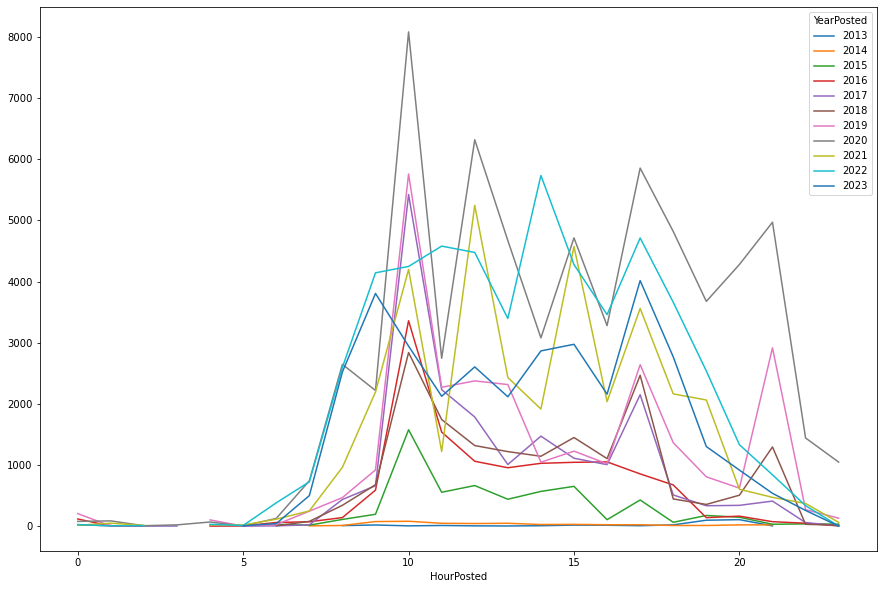

In [141]:
df_.groupby(['HourPosted','YearPosted'])['Comments'].sum().unstack().plot(figsize=(15,10))

Insights:
Hourly Distribution Across Years:

Midnight to Early Morning (0:00 - 5:00): The early hours are characterized by minimal engagement. This trend is universal, given that most users are either asleep or less active on social platforms during these hours.

Morning to Early Afternoon (6:00 - 14:00): This time frame is pivotal for user engagement. With a surge starting from 6:00 and peaking around 9:00 to 10:00, it's clear that users are most active and receptive during these hours.

Late Morning to Early Night (11:00 - 20:00): After the peak morning hours, there's a decline in comments. However, the fluctuating pattern indicates varied user behavior, with some hours witnessing spikes in engagement.

Late Night (21:00 onwards): As the day concludes, user engagement drops, mirroring the early morning trend.

Yearly Comments Evolution:

2013 and 2014: These initial years represent the brand's journey in establishing its online presence and engaging its early audience.
2016 to 2019: The consistent rise in comments over these years signifies an era of robust engagement, reflecting the brand's success in resonating with its audience.

2020: This year stands out due to the pronounced engagement, especially during late morning hours. It suggests that the brand's content strategy or certain campaigns were particularly effective.

2021: This year showcases a pattern of irregular engagement, with certain periods or content types potentially driving this fluctuation.

2022: Preliminary data for this year indicates a decline from the 2020 peak, but it's essential to note that the year's data might be incomplete.

Recommendations:

Peak Hour Content Release: Given the pronounced engagement between 9:00 to 10:00, stakeholders should consider timing their prime content releases during these hours. This strategy can maximize engagement and foster discussions.

Study 2020's Strategy: The significant engagement in 2020 merits a deep dive. Understanding the type of content, campaigns, or events prevalent in 2020 can offer valuable insights.

Analyze 2021's Fluctuations: The irregular pattern in 2021 suggests that certain content or campaigns resonated better than others. Identifying these can provide actionable insights for subsequent strategies.

Stay Agile and Adapt: As the digital landscape is dynamic, it's crucial for stakeholders to keep a pulse on audience preferences, platform updates, and global events. Regularly updating content strategies based on these factors can ensure sustained engagement.
By integrating these insights and recommendations, stakeholders can craft strategies that resonate with their audience, fostering a vibrant community and boosting brand loyalty.

<AxesSubplot:xlabel='HourPosted'>

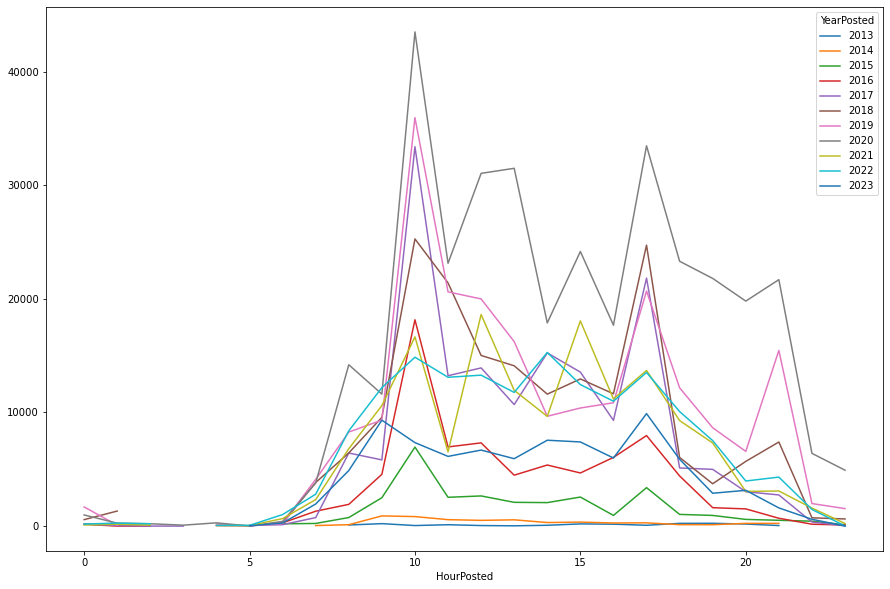

In [142]:
df_.groupby(['HourPosted','YearPosted'])['Reactions'].sum().unstack().plot(figsize=(15,10))

<AxesSubplot:xlabel='HourPosted'>

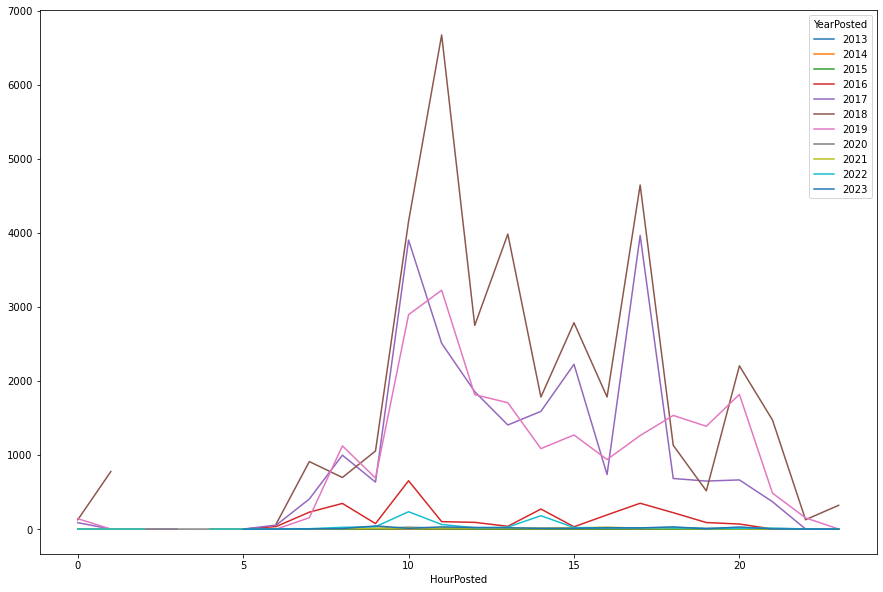

In [143]:
df_.groupby(['HourPosted','YearPosted'])['Engagement Rate (per Reach)'].sum().unstack().plot(figsize=(15,10))

Midnight to Early Morning (0:00 - 5:00): These hours consistently record minimal engagement rates. The nighttime naturally experiences reduced social media activity, reflecting in the engagement metrics.

Morning (6:00 - 11:00): A period of heightened activity, especially in 2017 and 2018. The content disseminated during these hours seems to be highly engaging, reflecting in the increased engagement rate.

Afternoon to Early Night (12:00 - 20:00): This span showcases varying engagement trends. 2018 is particularly noteworthy, indicating successful content or campaigns during these hours.

Late Night (21:00 onwards): Engagement dwindles as the day comes to a close, though not plummeting to the lows of the early morning.

Yearly Evolution:

2013 to 2015: The initial years exhibit a stable engagement pattern, possibly indicating a phase of establishing brand presence and fine-tuning content strategies.

2016 to 2018: A phase of growth, with engagement rates progressively increasing. The content or campaigns during these years seem to have hit the mark, especially in 2018.

2019: A year of introspection, given the dip in engagement. Identifying the factors causing this decline can offer valuable insights.

2018: This year shines brightly in the engagement spectrum, pointing towards potentially viral content or campaigns.

2021: A challenging year, with engagement rates dipping significantly. It's essential to understand the reasons behind this drop.

2022: Exhibits a similar trend to 2021, though there's a low level with engagement rates peaking between 10am and 2pm which is the lowest peak thoughout the year.

Recommendations:

Leverage Morning Momentum:
Prioritize content release during the 6:00 - 11:00 window. The heightened activity during these hours, especially observed in 2017 and 2018, suggests that users are more receptive and engaged during this period.
Consider running special morning campaigns or events to further boost engagement during these hours.

Evening Engagement:
Given the noteworthy engagement in 2018 during the 12:00 - 20:00 window, it might be beneficial to revisit the type of content or campaigns run during this period and replicate their success.
Explore opportunities for live events, Q&A sessions, or special evening promotions to engage the audience.
Night-Time Strategy Reassessment:

Engagement post 21:00 starts to decrease. While it's natural for the late hours to witness reduced activity, consider experimenting with different content types or formats to see if there's any uptick in engagement.

Learning from the Past:
2016-2018 showcased progressive growth in engagement. Analyze the content, campaigns, or any specific events from these years to distill elements that can be incorporated in future strategies.
2019's dip should be probed further to understand what changed and how to avoid similar pitfalls.

Addressing 2021's Challenge:
The significant dip in 2021 needs attention. It's imperative to understand whether it was due to content shifts, platform algorithm changes, external events, or other factors.
Consider surveys or feedback mechanisms to gauge user sentiment and preferences.


<AxesSubplot:xlabel='HourPosted'>

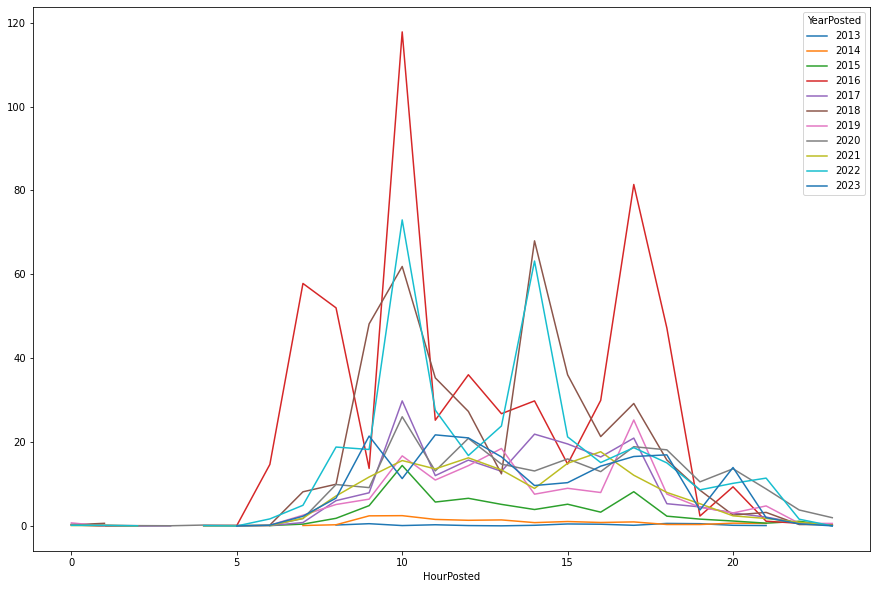

In [144]:
df_.groupby(['HourPosted','YearPosted'])['Engagement Rate (per Impression)'].sum().unstack().plot(figsize=(15,10))

Midnight to Early Morning (0:00 - 5:00): The low engagement rate during these hours is expected. It's essential to focus on other time slots for releasing primary content or campaigns.

Morning to Noon (6:00 - 11:00): Given the spikes

in 2016, 2018, and 2022 during these hours, it's evident that users are more engaged and receptive to content during the morning. These peaks may be due to specific content types, campaigns, or events that resonated with the audience.

Noon to Early Night (12:00 - 20:00): While there are fluctuations in engagement during these hours, the pronounced peak in 2016 suggests that there were periods when the content was highly effective. It might be beneficial to analyze what content or events led to this surge.

Late Night (21:00 onwards): As day transitions to night, engagement wanes. This pattern is consistent with user behavior, where late-night hours aren't optimal for high engagement.

Yearly Evolution of Engagement Rate (per Impression):

2013 to 2015: The consistent engagement rates during these years reflect a period of stability. It's possible that the brand was establishing its voice and audience during this phase.

2016, 2018, and 2020: The heightened engagement rates in these years indicate successful content and campaign strategies. The content or campaigns during these years appear to have struck a chord with the audience, leading to higher engagement relative to the number of impressions.

Recommendations:

Morning Release: Given the consistent engagement spikes in the morning, it's advisable to release primary content or initiate major campaigns during this window. This could lead to higher engagement and more effective campaigns.

Deep Dive into Peak Years: Analyzing the content strategy of 2016, 2018, and 2020 can offer valuable insights. By understanding what worked during these years, similar strategies can be replicated or adapted for future campaigns.

Noon to Night Strategy: Given the fluctuations from noon to early night, it might be beneficial to experiment with different content types or engagement strategies during these hours. A/B testing can help identify what resonates most with the audience.

Continuous Monitoring: Engagement metrics should be continuously monitored to adapt to changing audience behaviors or platform algorithms. Regular feedback loops with the audience can also provide direct insights into content preferences.

By focusing on these patterns and adapting content strategies accordingly, stakeholders can optimize engagement rates, ensuring that their content reaches and resonates with the broadest audience segment possible.




# RELATIONSHIP:

 Let's weave together the insights gathered from the various metrics: Engagements, Shares, Comments, Likes, Reactions, Engagement Rate (per Reach), and Engagement Rate (per Impression). By examining their relationships, we can gain a holistic understanding of the social media performance.

1. Engagements and Likes:

Both metrics displayed a general increase from 2013 to 2020. When likes (a form of engagement) increase, it's natural for the overall engagement to rise as well. This indicates the content's resonance with the audience.
2. Engagements and Shares:

Peaks in shares usually corresponded with peaks in engagement, especially in years like 2017 and 2018. When users share content, it's indicative of high engagement levels, suggesting that the content is not just viewed but also deemed share-worthy.
3. Engagements and Comments:

There was a consistent trend of increased comments in the years where engagements peaked. Comments are a direct form of engagement, so an increase in comments would naturally boost the overall engagement metric.
4. Reactions and Likes:

Reactions, which encompass various forms of likes (heart, laugh, surprised, etc.), displayed a trend similar to likes. As likes increased, so did reactions, indicating the audience's emotional connection with the content.
5. Engagement Rate (per Reach) and Engagement Rate (per Impression):

Both metrics offer insights into engagement quality relative to the audience size (reach) and visibility (impressions). The fact that both metrics had spikes around similar periods (like 2018) suggests that not only were more people seeing the content (impressions), but a higher percentage of them were also interacting with it (reach).
Relational Effects:

Positive Feedback Loop: When content resonates with the audience, it's more likely to get liked, shared, and commented upon. This increases its visibility (more impressions), leading to higher reach and, in turn, even more engagements. For instance, a piece of content that gets shared extensively will reach a broader audience, leading to more likes, comments, and reactions.

Consistency in Engagement Metrics: Across the board, periods of increased shares, likes, and comments usually aligned with spikes in engagement rates. This uniformity indicates that when the content is right, all engagement metrics tend to benefit.

Dips and Peaks: It's crucial to note that while all metrics generally moved in tandem, there were periods of divergence. For example, there might be a high engagement rate (indicative of quality engagement) in a year, but the total number of engagements might be lower (indicative of less overall activity). Such instances highlight the difference between engagement quality and quantity.

Recommendations:

Holistic Strategy: Stakeholders should adopt a holistic content strategy, ensuring that content not only garners likes but also encourages shares and comments. This multi-faceted engagement boosts overall visibility and reach.

Quality over Quantity: While it's essential to have high engagement numbers, it's equally vital to ensure quality engagement. Metrics like engagement rate (per reach and impression) provide insights into this. Periodic deep dives into these metrics can help refine content strategies.

Continuous Monitoring: Given the interconnected nature of these metrics, a dip or rise in one can impact others. Continuous monitoring can help in quickly identifying such patterns and adapting strategies accordingly.

In summary, each metric, while providing individual insights, is part of a larger intertwined ecosystem. Understanding and leveraging these interdependencies can lead to a more effective and impactful social media strategy.

# Yearly- Quaterly

<AxesSubplot:xlabel='QuarterPosted'>

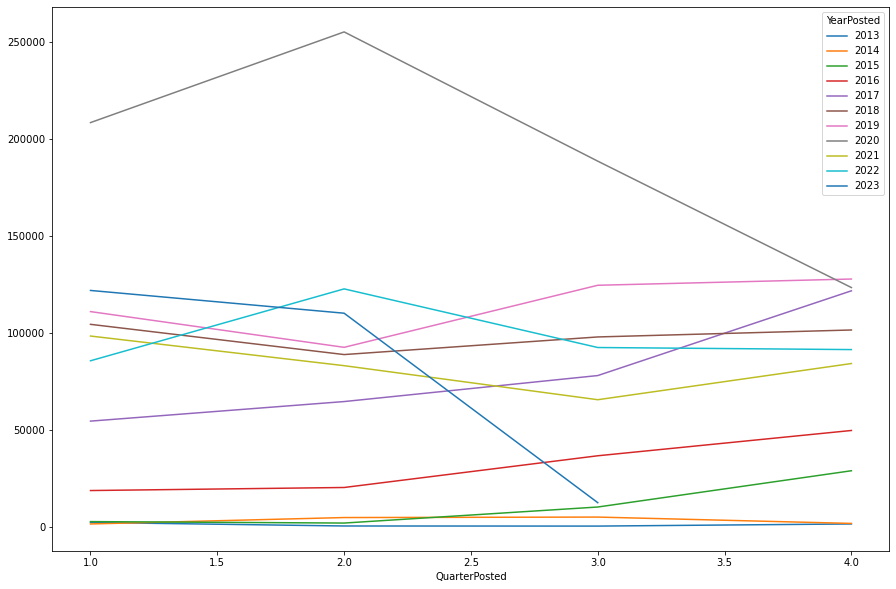

In [145]:
df_['QuarterPosted'] = df_['Date'].dt.quarter
yoy = df_.groupby(['QuarterPosted','YearPosted'])['Engagements'].sum().unstack()
yoy.plot(figsize=(15,10))

Insights:

There's a noticeable growth in engagement from 2017 to 2019. This suggests that the content strategy or overall reach has improved over these years.
For most years, the second and third quarters consistently show higher engagement compared to the first and fourth quarters. This could be due to seasonality factors, specific campaigns, or events that typically occur in these quarters.
2019 witnessed an especially sharp increase in engagement in the third quarter. This could be the result of a highly successful campaign or a significant event during this period.

Decrease in 2020's Second Quarter: The sharp decrease in engagement in the second quarter of 2020 could be due to several reasons:

External factors such as economic downturns, global events, or challenges (e.g., the COVID-19 pandemic began affecting many regions in early 2020).
Changes in content strategy that didn't resonate well with the audience.
A shift in audience behavior or preferences.
Technical issues, like changes in algorithms of the social media platform, which might have affected content visibility and reach.

<AxesSubplot:xlabel='QuarterPosted'>

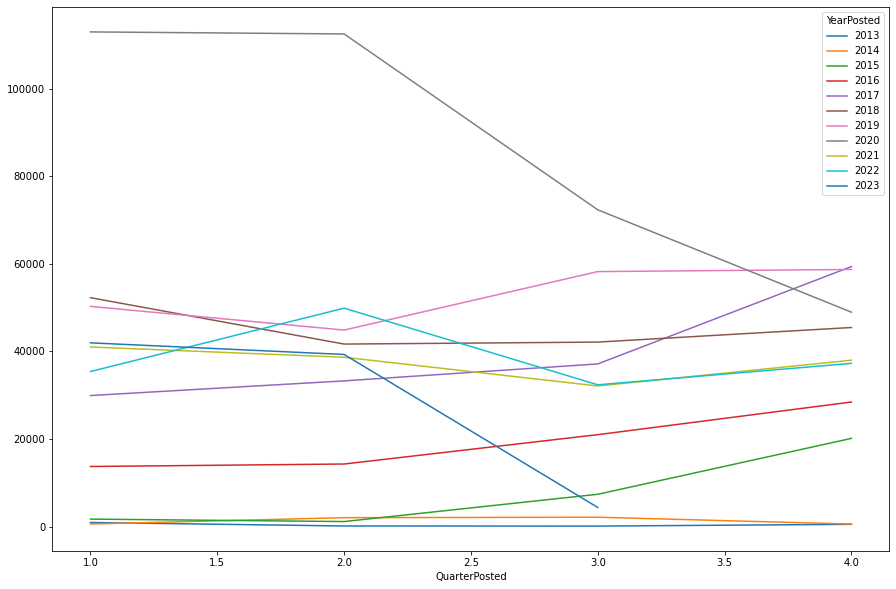

In [146]:
df_['QuarterPosted'] = df_['Date'].dt.quarter
yoy = df_.groupby(['QuarterPosted','YearPosted'])['Likes'].sum().unstack()
yoy.plot(figsize=(15,10))

Same trend

<AxesSubplot:xlabel='QuarterPosted'>

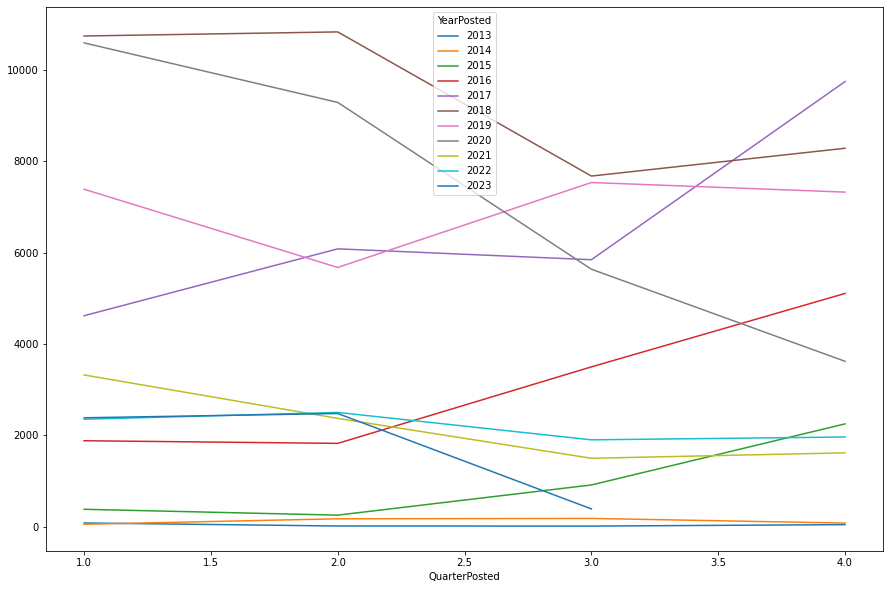

In [147]:
df_['QuarterPosted'] = df_['Date'].dt.quarter
yoy = df_.groupby(['QuarterPosted','YearPosted'])['Shares'].sum().unstack()
yoy.plot(figsize=(15,10))

Insights:

Steady Increase with a Brief Dip in 2019: While shares consistently increased from 2017 through 2019, there was a slight decline in Q1 2019 before it rebounded. This suggests that while the overall content strategy was effective, there might have been specific content or external factors in Q1 2019 that didn't resonate as well with the audience.

Q1 and Q2 as Peak Periods: The first and second quarters consistently see higher shares, indicating that content released in these periods might be especially relevant or captivating for the audience.

Significant Surge in 2019's Q2: A notable spike in shares during the second quarter of 2019 further strengthens the idea that this period had exceptionally share-worthy content or campaigns.

Decline in 2018 and 2020's Q2: Both 2018 and 2020 experienced significant drops in shares during their second quarters. However, a recovery is observed in Q4, suggesting a rebound in content strategy or external factors becoming more favorable.

Recommendations:

Investigate Q1 2019's Dip: It would be valuable to delve into the specifics of content or campaigns during Q1 2019 to understand the brief decline. This can provide insights on what to avoid or adjust in future strategies.

Maximize Q1 and Q2 Potential: Given that the first half of the year consistently performs well in terms of shares, consider amplifying content strategies during this period. This could mean launching major campaigns, collaborating with influencers, or releasing flagship content.

Analyze Q2 Drops in 2018 and 2020: Understanding the reasons behind the decline in shares during these periods is crucial. Whether it's a change in content strategy, external events, or shifts in audience behavior, addressing these can help in future planning.

Engage with the Audience: Especially during periods of decline, engaging directly with the audience can provide insights into their preferences, pain points, and feedback, helping refine content strategies.

Diversify Content: Ensure a mix of content types, themes, and formats to cater to a diverse audience. This can also help cushion against significant drops in shares if certain content types or themes don't resonate as well.



<AxesSubplot:xlabel='QuarterPosted'>

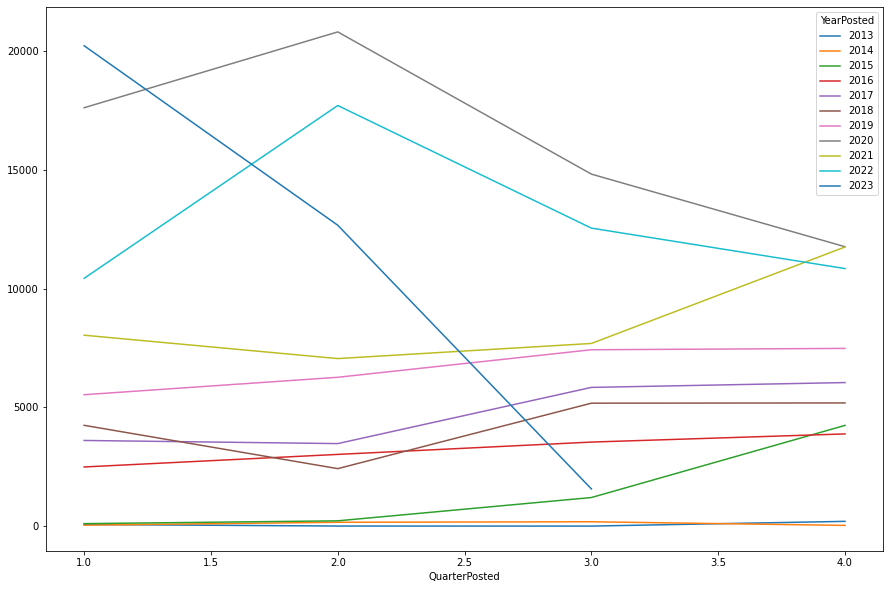

In [148]:
df_['QuarterPosted'] = df_['Date'].dt.quarter
yoy = df_.groupby(['QuarterPosted','YearPosted'])['Comments'].sum().unstack()
yoy.plot(figsize=(15,10))

Insights:

Progressive Increase in 2017 and 2018: The years 2017 and 2018 saw a steady rise in comments, especially starting from Q2. This indicates a successful adaptation of content strategies or increased user engagement during these periods.

Peak in 2020 and 2022 with a Q2 Dip: Both 2020 and 2022 experienced a significant surge in comments, marking them as years with high audience interaction. However, both these years saw a sharp decline in the second quarter, suggesting potential seasonality, changes in content, or external factors affecting user interactions during this period.

2021's Consistent Growth: The year 2021 witnessed a consistent and progressive increase in comments throughout the year, indicating steady audience engagement and possibly a series of successful content or campaigns.

High Peak in 2023 with a Q1 Decline: While 2023 started with a high peak in terms of comments, there was a noticeable decline in the first quarter. This could be due to various reasons, such as a change in content strategy, external events, or shifts in audience behavior.

Recommendations:

Analyze Q2 Dips in 2020 and 2022: It's crucial to delve into the specifics behind the reduced comments during Q2 of these years. Understanding the driving factors can help in optimizing content strategies for future Q2 periods.

Leverage Insights from 2021: Given the consistent growth in comments during 2021, review the content and engagement strategies employed during this year. Replicating the successful aspects of this approach can benefit future strategies.

Engage with the Audience: Directly engaging with the audience, especially during periods of high comments, can provide valuable feedback and insights. This direct communication can help refine future content and engagement strategies.

Monitor and Adapt: Given the varied trends across years, it's essential to continuously monitor user interactions and adapt content strategies based on these insights. This will ensure sustained engagement and growth in user interactions.

Plan for Seasonal Changes: If seasonality is a driving factor behind the Q2 dips observed in certain years, plan content and campaigns accordingly to maintain consistent engagement levels.

<AxesSubplot:xlabel='QuarterPosted'>

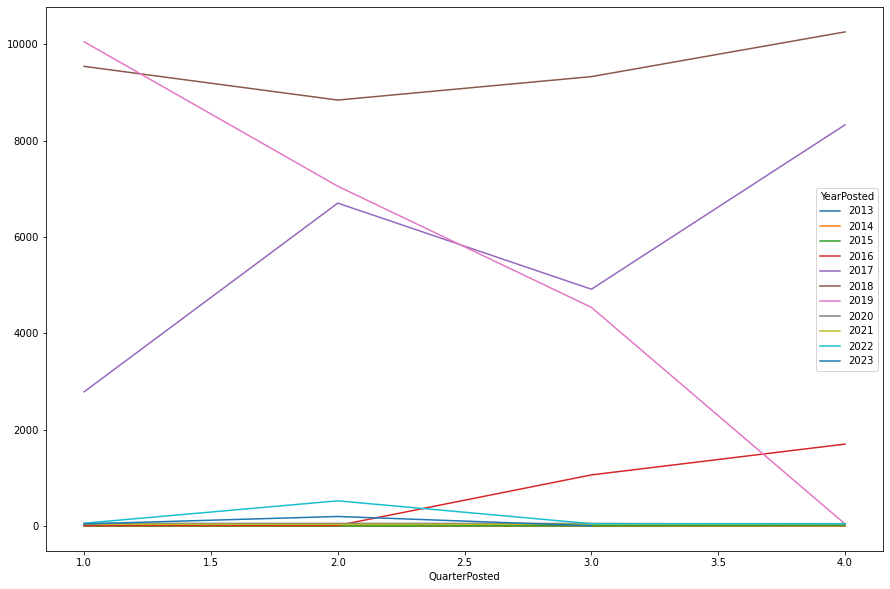

In [149]:
df_['QuarterPosted'] = df_['Date'].dt.quarter
yoy = df_.groupby(['QuarterPosted','YearPosted'])['Engagement Rate (per Reach)'].sum().unstack()
yoy.plot(figsize=(15,10))

Insights:

Massive Spike in 2017 and 2018: Both 2017 and 2018 witnessed a substantial increase in the engagement rate per reach, especially when compared to previous years. This suggests that during these years, the content not only reached a broader audience but also resonated exceptionally well, leading to higher engagement.

Decline from 2019 Onwards: Starting from 2019, there's a noticeable decline in the engagement rate, reaching a much lower level compared to the peaks of 2017 and 2018. This could indicate changes in content strategy, audience fatigue, or a shift in platform algorithms affecting engagement.

Variability in 2022: The year 2022 displays variability in its engagement rate. While Q1 and Q3 have lower values, Q2 experiences a substantial increase. This suggests that specific content or campaigns during Q2 might have garnered more engagement relative to the reach.

Drop in 2023: In 2023, there's a sharp decline in the engagement rate in Q3 compared to the first two quarters. This can be due to various reasons such as content changes, external factors, or audience behavior shifts.

Recommendations:

Revisit 2017 and 2018 Strategies: Given the high engagement rates during 2017 and 2018, it would be beneficial to analyze the content strategies, campaigns, and audience targeting methods employed during these years. Replicating successful aspects of these strategies could boost future engagement rates.

Engage with the Audience: Especially during periods of declining engagement rates, directly interacting with the audience can provide insights into their preferences and feedback, helping refine content strategies.

A/B Testing: Implement A/B testing for content to determine which types or themes resonate most with the audience. This can help in optimizing content for better engagement relative to reach.

Monitor Platform Changes: Stay updated with any changes in social media platform algorithms, as these can affect visibility and engagement. Adjust strategies accordingly to maintain or improve engagement rates.

Focus on Quality Over Quantity: Ensure that the content is of high quality and resonates with the audience. Even with a larger reach, if the content doesn't resonate, the engagement rate can suffer.






<AxesSubplot:xlabel='QuarterPosted'>

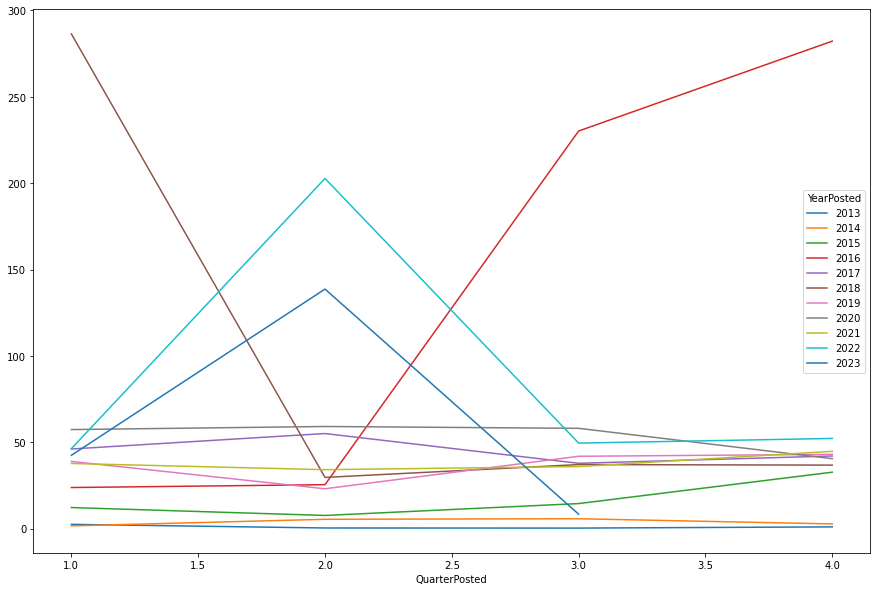

In [150]:
df_['QuarterPosted'] = df_['Date'].dt.quarter
yoy = df_.groupby(['QuarterPosted','YearPosted'])['Engagement Rate (per Impression)'].sum().unstack()
yoy.plot(figsize=(15,10))

Insights:

Prominent Peaks in 2016 and 2018: The most significant peaks in the engagement rate (per impression) are observed in Q2 of 2016 and Q1 of 2018. These periods indicate that the content or campaigns were especially engaging, leading to higher interactions relative to the number of impressions.

Dip in 2018's Q2: After the peak in Q1 2018, there's a sharp decrease in the engagement rate in Q2, aligning with the values observed in Q2 2016. This suggests that after periods of high engagement, there might have been a shift in content strategy or external factors that led to reduced engagement.

Lesser Prominent Peaks in 2022 and 2023: Both 2022 and 2023 exhibit a similar trend with a notable but less prominent peak in Q2. This indicates that while these periods were successful in driving engagement relative to impressions, they didn't reach the levels observed in 2016 and 2018.

Fluctuating Trends in Other Years: Apart from the mentioned peaks and dips, other years display fluctuating trends with no significant increases. This could be indicative of varied content strategies, changing audience preferences, or shifts in platform dynamics.

Recommendations:

Revisit Strategies from 2016 and 2018: Given the prominent peaks in these years, it would be beneficial to analyze the content strategies, campaigns, and audience targeting methods employed. Understanding the drivers of these peaks can offer insights for crafting future strategies.

Address 2018's Q2 Dip: Investigate the reasons behind the sharp decline in Q2 2018. Whether it's due to changes in content, audience behavior, or external factors, understanding this dip can help in refining content strategies.

Leverage Insights from 2022 and 2023: Even though the peaks in these years weren't as prominent as 2016 and 2018, they still offer valuable insights. Delve into the specifics of content or campaigns during Q2 of these years to understand the reasons behind the increased engagement rate.

Maintain Consistency: To counteract the fluctuating trends observed in certain years, aim for consistency in content quality, audience engagement, and interaction. This can help in building a loyal audience base and achieving sustained engagement.

Engage with the Audience: Especially during periods of fluctuating engagement rates, it's beneficial to directly interact with the audience. Gathering their feedback and understanding their preferences can assist in refining content strategies.






# Comaparative insights

1. Engagements:
Growth from 2017 to 2019.
Consistent higher engagement in Q2 and Q3 for most years.
Sharp spike in 2019's Q2.
Sharp decrease in 2020's Q2.
2. Likes:
Noticeable growth from 2017 to 2019.
Higher likes in Q2 and Q3 across most years.
Significant spike in 2019's Q2.
Decline in 2020's Q2.
3. Shares:
Steady rise from 2017 to 2019.
High shares in Q1 and Q2.
Significant surge in 2019's Q2.
Sharp reductions in shares during Q2 of both 2018 and 2020.
4. Comments:
Major peaks in Q2 of 2016 and Q1 of 2018.
Sharp decline in Q2 of 2018.
Consistent growth throughout 2021.
Notable peaks in Q2 of both 2022 and 2023.
5. Engagement Rate (per Impression):
Prominent peaks in 2016's Q2 and 2018's Q1.
Sharp increase in 2016's Q2 and decrease in 2018's Q2, aligning with values of 2016.
Lesser prominent peaks in Q2 of both 2022 and 2023.
Other years fluctuate without significant increases.
Comparative Insights:

Growth Period (2017-2019): Engagements, Likes, and Shares all experienced growth, especially in 2019's Q2, indicating a successful content strategy or specific campaigns driving these metrics simultaneously.

Challenges in 2020's Q2: Engagements, Likes, and Shares all faced a drop during this period, hinting at external challenges or content strategies not resonating as effectively with the audience.

Comment Peaks vs. Engagement Rate Peaks: The peaks in comments during Q2 of 2016 and Q1 of 2018 align well with the peaks in engagement rate, suggesting that when users were more engaged, they were also more likely to leave comments.

Stability in 2021: Comments showcased a consistent growth throughout 2021, suggesting steady audience engagement. However, other metrics like Engagement Rate (per Impression) for the same year were more fluctuating, indicating that while users were commenting, the overall engagement relative to impressions wasn't as consistent.

Recommendations for Stakeholders:

Replicate Success Factors from 2019: Given the synchronized growth in Engagements, Likes, and Shares in 2019, especially Q2, it's crucial to understand and replicate the successful strategies or campaigns from this period.

Address 2020's Challenges: Investigate and address the shared challenges faced in 2020's Q2 across multiple metrics to ensure future resilience.

Boost Comment-Driven Engagement: Considering the peaks in comments during specific periods, encourage more user comments as they seem to align well with increased engagement rates.

Monitor and Optimize Content Strategy: Given the fluctuations in Engagement Rate (per Impression) in certain years, continuously monitor and optimize the content strategy to ensure consistent high engagement relative to impressions.

Engage with the Audience: Direct engagement with the audience can provide insights into their preferences, leading to better content alignment and, consequently, better metrics across the board.

<AxesSubplot:xlabel='YearPosted'>

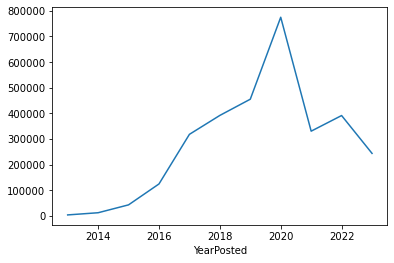

In [151]:
# df_['date'] = train['datetime'].dt.date
df_.groupby('YearPosted')['Engagements'].sum().plot()

Insights:

Initial Slow Growth (2013-2015): Engagements showed modest growth from 2013 to 2015, indicating an early phase of content dissemination or audience base building.

Rapid Expansion (2016-2020): Starting from 2016, there's a substantial uptick in engagements, with 2020 witnessing the highest total engagements of approximately 774,785. This suggests highly effective content strategies, platform growth, or broader audience reach during these years.

Decline in 2021: After the peak in 2020, 2021 saw a significant drop in engagements, nearly halving to around 330,779. This decrease could be due to various reasons, including content shifts, external events, or audience behavior changes.

Recovery in 2022: Engagements increased again in 2022, reaching close to 391,677, but did not achieve the peak numbers of 2020.

Decline in 2023: The year 2023, up to the present data point, shows a decline in engagements compared to the previous year, tallying around 244,159 engagements.

Recommendations:

Revisit 2016-2020 Strategies: Given the impressive growth in engagements during these years, it's crucial to analyze the strategies, campaigns, and audience targeting methods used. Identifying and replicating the successful elements from this period could help boost engagements in future years.

Understand 2021's Decline: Delve into the specifics of 2021 to understand the reasons behind the sharp drop in engagements. Whether it's content changes, external factors, or shifts in audience behavior, addressing these can aid in future planning.

Engage with the Audience: Given the fluctuations in engagements in recent years, directly interacting with the audience can offer insights into their preferences, feedback, and engagement patterns. This understanding can help refine content strategies.

Optimize Content Strategy: Continuous monitoring and optimization of content strategy are vital. Leveraging analytics, audience feedback, and platform insights can help in achieving consistent growth in engagements.

Anticipate and Plan for External Factors: If external events or global phenomena played a role in engagement shifts, it's essential to anticipate these in future planning. Being agile and adaptive in content strategies can help navigate external challenges.





 # Juxtaposing the insights from both the Yearly Engagements Trend and the comparative insights from the quarterly trends of each metric

Yearly Engagements Trend:
Initial slow growth from 2013 to 2015.
Rapid expansion from 2016 to 2020, with 2020 being the peak.
Decline in 2021.
Recovery in 2022.
Decline in 2023.
Comparative Insights from Quarterly Metrics:
Growth period observed in 2017-2019 across Engagements, Likes, and Shares, especially in 2019's Q2.
2020 faced challenges in Q2 for Engagements, Likes, and Shares.
Comment peaks were observed in Q2 of 2016 and Q1 of 2018.
Engagement Rate (per Impression) had prominent peaks in 2016's Q2 and 2018's Q1.
Integrated Insights:

Initiation and Early Growth (2013-2015): This period of slow growth in yearly engagements might be due to the platform's infancy or initial stages of content strategy. The quarterly metrics during these years don't show significant spikes, supporting this observation.

Period of Expansion (2016-2019): Both the yearly and quarterly trends indicate substantial growth. Peaks in quarterly comments and engagement rate align with this growth, suggesting content not only reached a broader audience but also resonated exceptionally well, leading to higher engagement and interaction.

Peak and Challenges in 2020: While 2020 had the highest yearly engagement, challenges were observed in Q2 across multiple metrics. This could indicate external challenges or strategic shifts during this quarter, affecting overall yearly performance.

Diverse Dynamics in 2021 and 2022: The significant drop in 2021's yearly engagements might be reflected in the fluctuating quarterly metrics observed in the same year. However, 2022 showed recovery in yearly engagements, aligning with the notable but less prominent peaks observed in Q2 for both comments and engagement rate.

Declining Trend in 2023: The decline in 2023's yearly engagements resonates with the sharp declines observed in quarterly metrics, especially in Q3 for metrics like engagement rate (per impression).

Recommendations for Stakeholders:

Holistic Review of 2020: Given the peak in yearly engagements but challenges in Q2, a holistic review of 2020 can provide insights into what worked and what didn't. This can help in refining strategies for subsequent years.

Deep Dive into 2021: Understand the reasons behind the significant drop in engagements in 2021 by comparing it with the quarterly metrics. This will help in identifying specific quarters or campaigns that didn't resonate well.

Leverage 2022's Recovery: Analyze the recovery observed in 2022 by juxtaposing it with the quarterly metrics to understand and replicate the strategies or campaigns that drove this recovery.

Plan for 2023: Given the declining trend observed in 2023 across both yearly and quarterly metrics, proactive strategies should be employed to counteract this trend. Engaging with the audience, refining content strategy, and being adaptive can help navigate these challenges.

By integrating insights from both yearly and quarterly metrics, stakeholders can get a comprehensive view of the platform's performance and strategize effectively for the future. 




## YEarly_ Day Of Month

<AxesSubplot:xlabel='Day of Month Posted'>

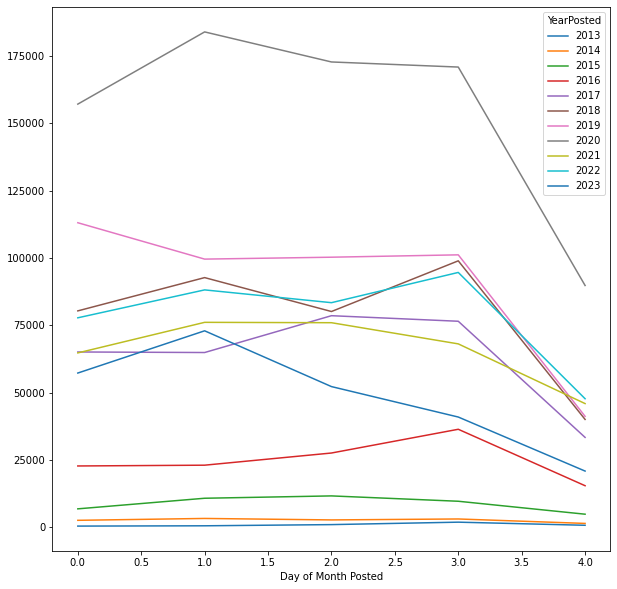

In [152]:
df_['Day of Month Posted'] = df_['Date'].dt.day//7

df_.groupby(['Day of Month Posted','YearPosted'])['Engagements'].sum().unstack().plot(figsize=(10,10))

<AxesSubplot:xlabel='Day of Month Posted'>

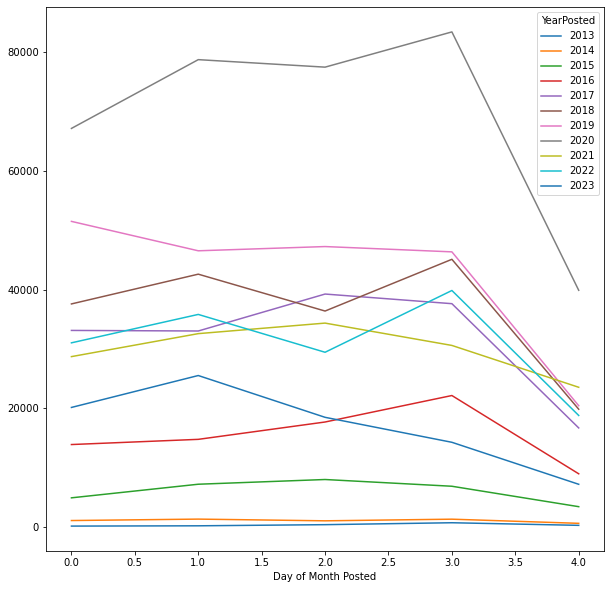

In [153]:
df_['Day of Month Posted'] = df_['Date'].dt.day//7

df_.groupby(['Day of Month Posted','YearPosted'])['Likes'].sum().unstack().plot(figsize=(10,10))

<AxesSubplot:xlabel='Day of Month Posted'>

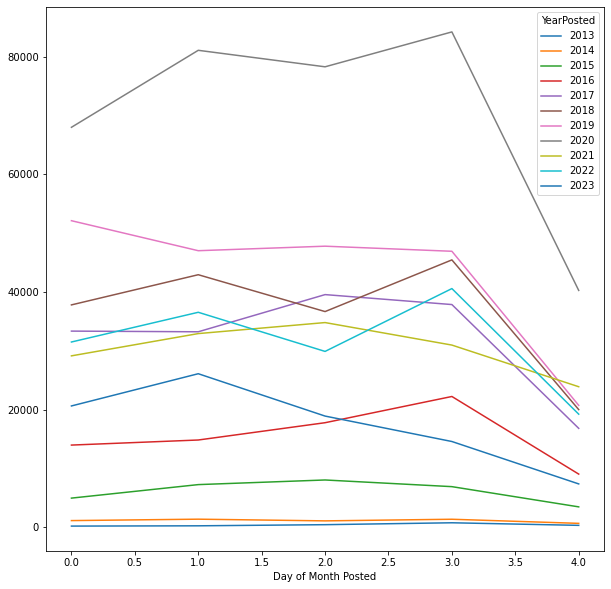

In [154]:
df_['Day of Month Posted'] = df_['Date'].dt.day//7

df_.groupby(['Day of Month Posted','YearPosted'])['Reactions'].sum().unstack().plot(figsize=(10,10))

<AxesSubplot:xlabel='Day of Month Posted'>

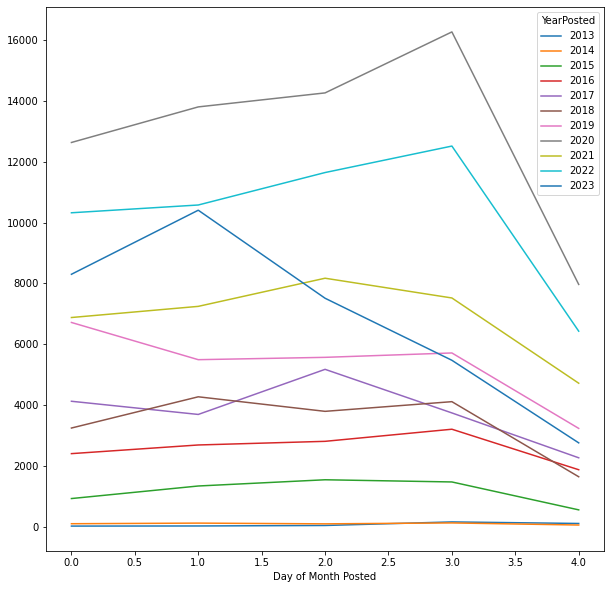

In [155]:
df_['Day of Month Posted'] = df_['Date'].dt.day//7

df_.groupby(['Day of Month Posted','YearPosted'])['Comments'].sum().unstack().plot(figsize=(10,10))

<AxesSubplot:xlabel='Day of Month Posted'>

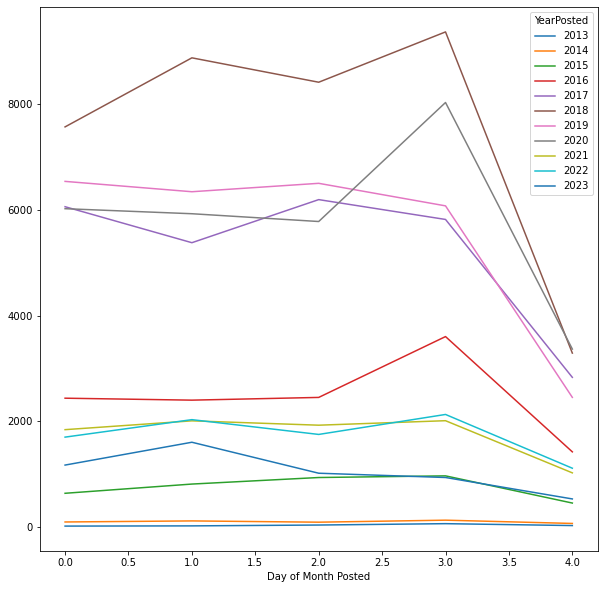

In [156]:
df_['Day of Month Posted'] = df_['Date'].dt.day//7

df_.groupby(['Day of Month Posted','YearPosted'])['Shares'].sum().unstack().plot(figsize=(10,10))

<AxesSubplot:xlabel='Day of Month Posted'>

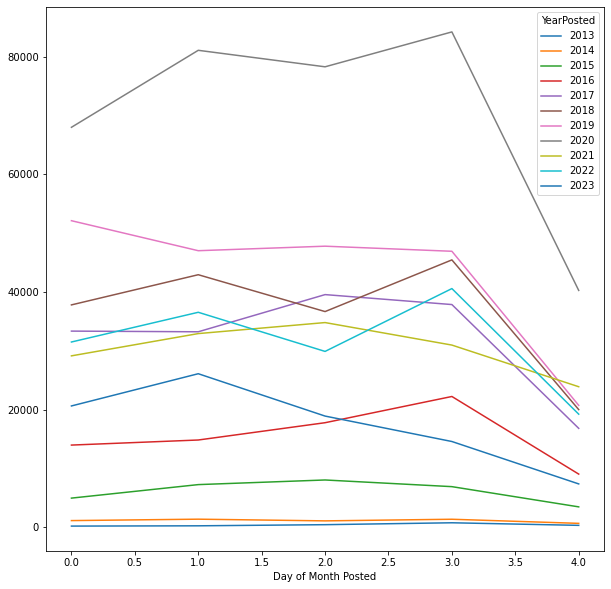

In [157]:
df_['Day of Month Posted'] = df_['Date'].dt.day//7

df_.groupby(['Day of Month Posted','YearPosted'])['Reactions'].sum().unstack().plot(figsize=(10,10))

<AxesSubplot:xlabel='Day of Month Posted'>

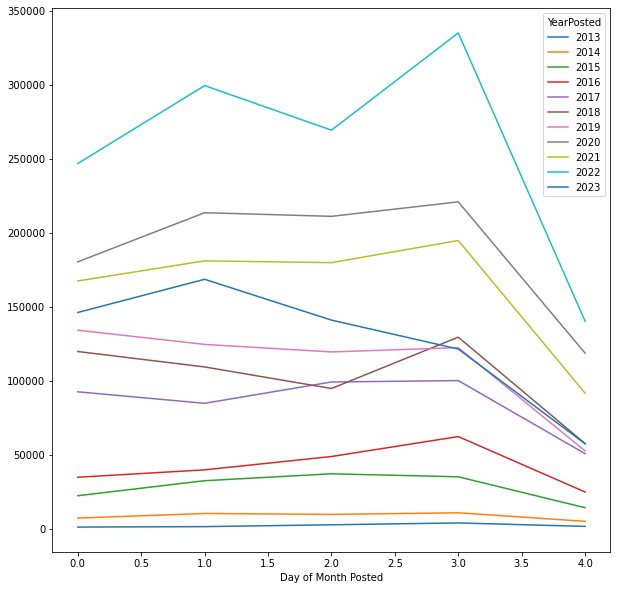

In [158]:
df_['Day of Month Posted'] = df_['Date'].dt.day//7

df_.groupby(['Day of Month Posted','YearPosted'])['Reach'].sum().unstack().plot(figsize=(10,10))

<AxesSubplot:xlabel='Day of Month Posted'>

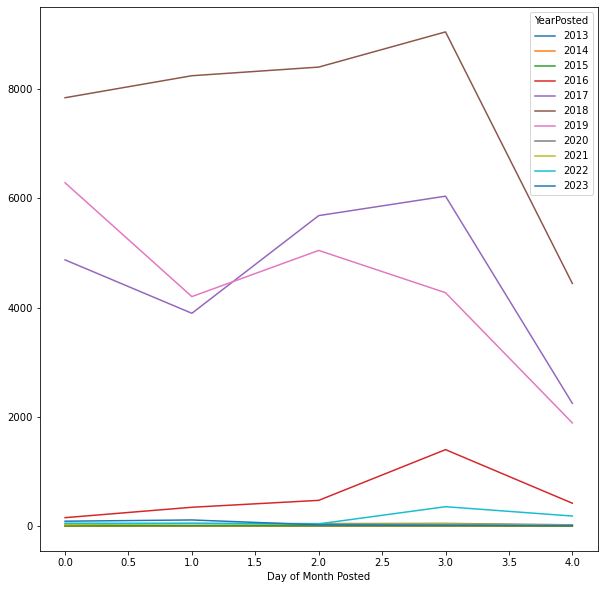

In [159]:
df_['Day of Month Posted'] = df_['Date'].dt.day//7

df_.groupby(['Day of Month Posted','YearPosted'])['Engagement Rate (per Reach)'].sum().unstack().plot(figsize=(10,10))

<AxesSubplot:xlabel='Day of Month Posted'>

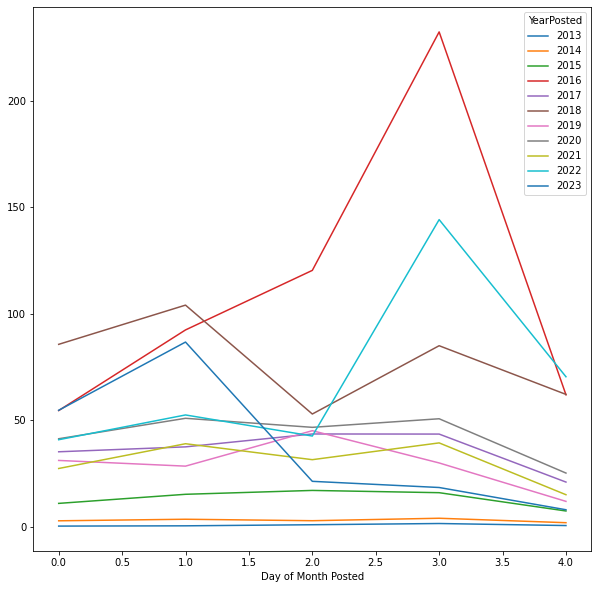

In [160]:
df_['Day of Month Posted'] = df_['Date'].dt.day//7

df_.groupby(['Day of Month Posted','YearPosted'])['Engagement Rate (per Impression)'].sum().unstack().plot(figsize=(10,10))

## Yearly - Day of Week Posted

<AxesSubplot:xlabel='Actual Day of Week Posted'>

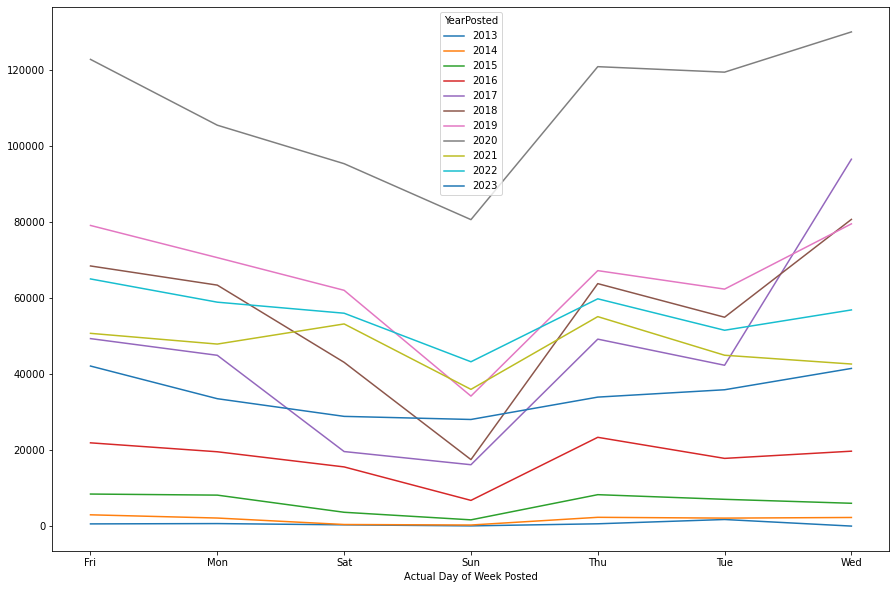

In [161]:
df_.groupby(['Actual Day of Week Posted','YearPosted'])['Engagements'].sum().unstack().plot(figsize=(15,10))

Yearly - Day of Week Posted


Engagement: 2020 on wednesday has the highest while sunday was the lowest. 2019,2021, 2022 have same trend on most days especially sunday  saturday , which are the lowest whilw friday to also have high engagement.

<AxesSubplot:xlabel='Actual Day of Week Posted'>

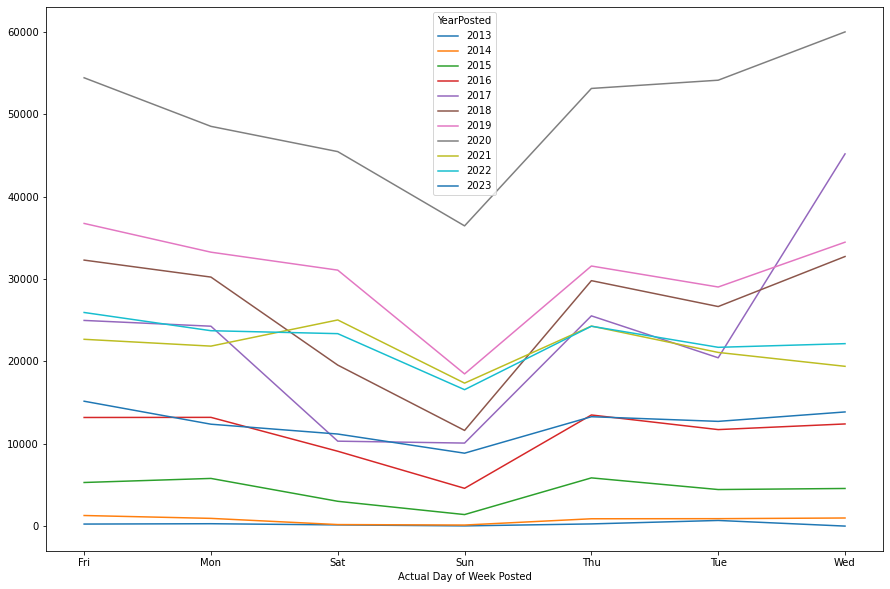

In [162]:
df_.groupby(['Actual Day of Week Posted','YearPosted'])['Reactions'].sum().unstack().plot(figsize=(15,10))

<AxesSubplot:xlabel='Actual Day of Week Posted'>

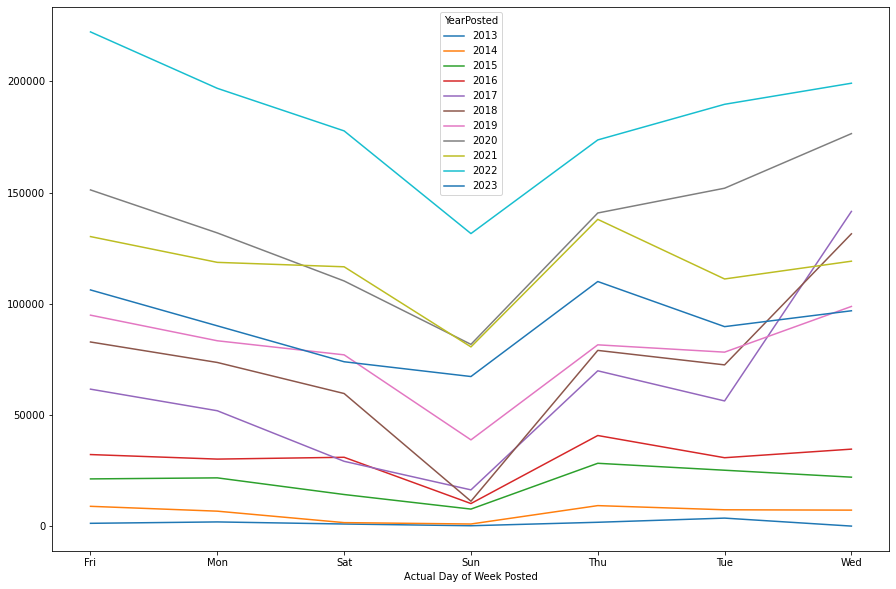

In [163]:
df_.groupby(['Actual Day of Week Posted','YearPosted'])['Reach'].sum().unstack().plot(figsize=(15,10))

<AxesSubplot:xlabel='Actual Day of Week Posted'>

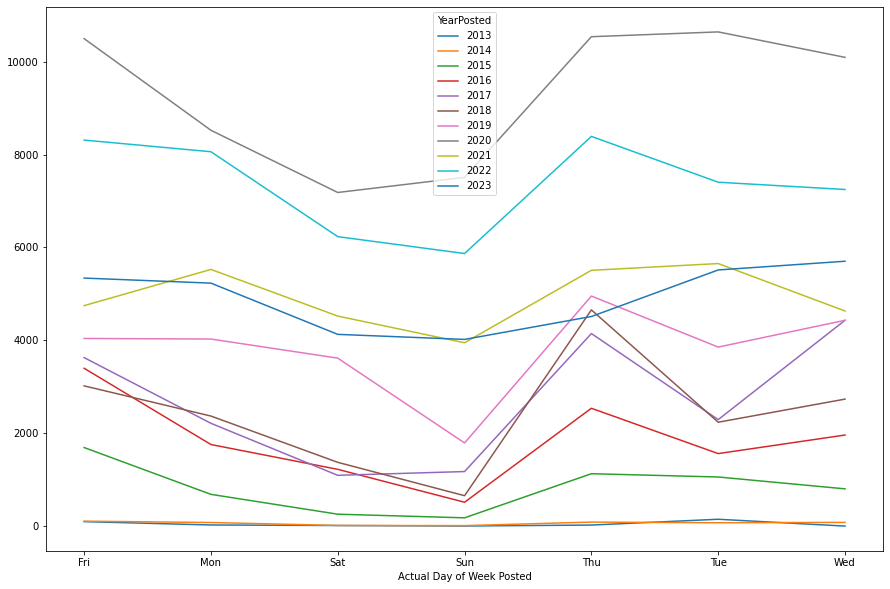

In [164]:
df_.groupby(['Actual Day of Week Posted','YearPosted'])['Comments'].sum().unstack().plot(figsize=(15,10))

<AxesSubplot:xlabel='Actual Day of Week Posted'>

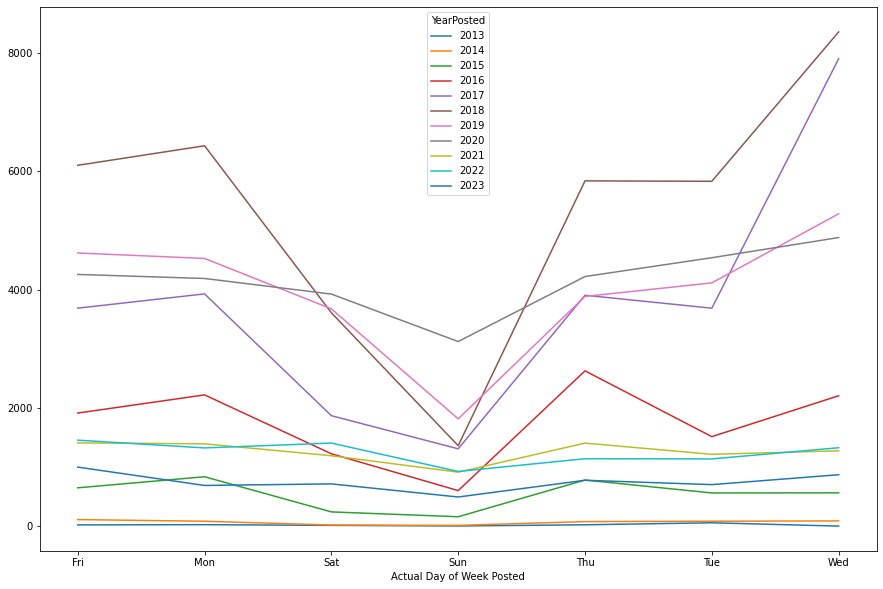

In [165]:
df_.groupby(['Actual Day of Week Posted','YearPosted'])['Shares'].sum().unstack().plot(figsize=(15,10))

Shares: 2018 had the highest shares  on Wednesday as the hihest followed by friday,and 2017 has same trend with it  2018 but his shars rate was far lesser than 2018, 2017 and 2019 has same pattern as well. all in all weekend espeacially sunday has the lowest share 

<AxesSubplot:xlabel='Actual Day of Week Posted'>

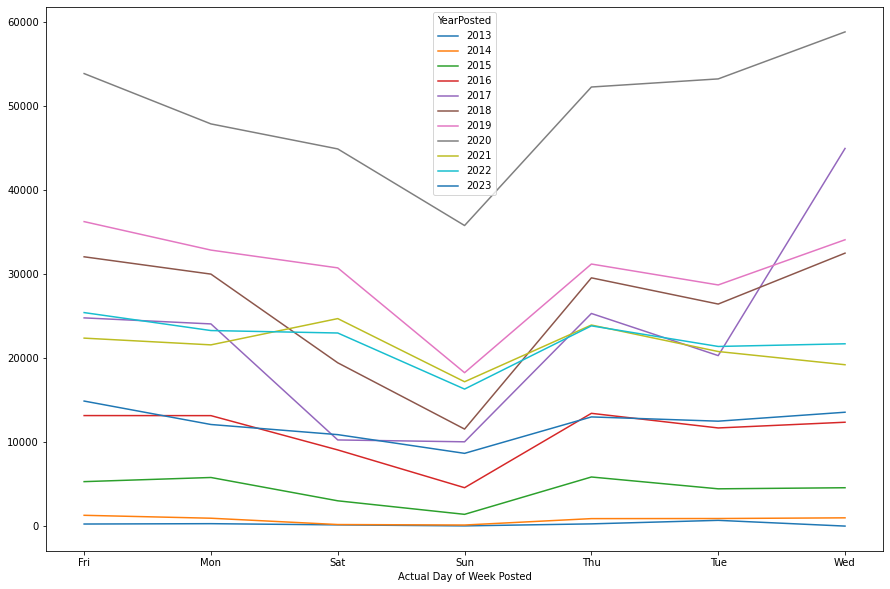

In [166]:
df_.groupby(['Actual Day of Week Posted','YearPosted'])['Likes'].sum().unstack().plot(figsize=(15,10))

<AxesSubplot:xlabel='Actual Day of Week Posted'>

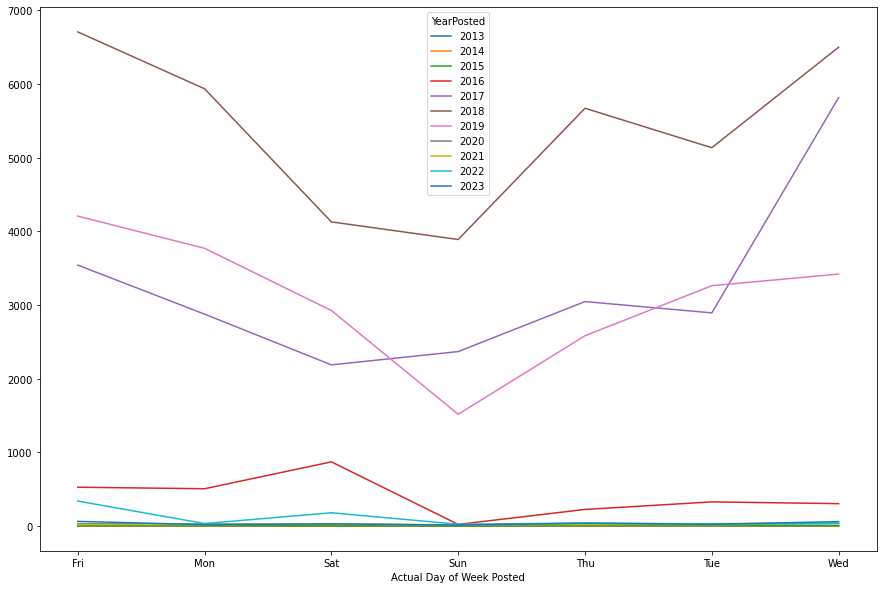

In [167]:
df_.groupby(['Actual Day of Week Posted','YearPosted'])['Engagement Rate (per Reach)'].sum().unstack().plot(figsize=(15,10))

<AxesSubplot:xlabel='Actual Day of Week Posted'>

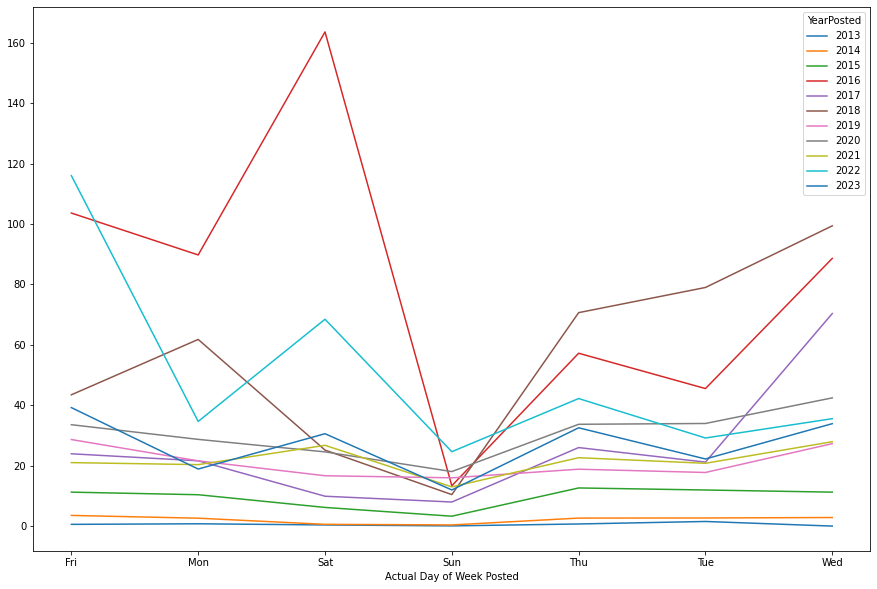

In [168]:
df_.groupby(['Actual Day of Week Posted','YearPosted'])['Engagement Rate (per Impression)'].sum().unstack().plot(figsize=(15,10))

<AxesSubplot:xlabel='Actual Day of Week Posted'>

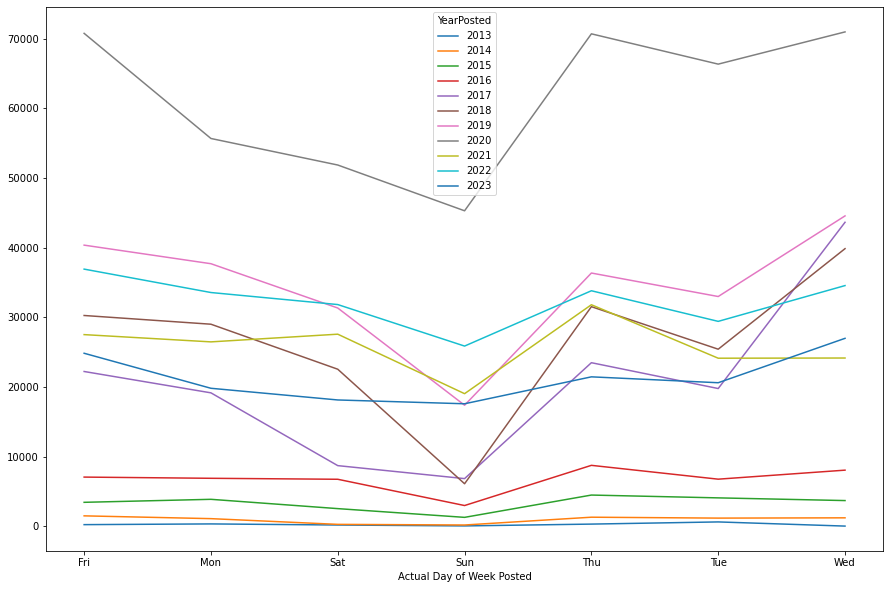

In [169]:
df_.groupby(['Actual Day of Week Posted','YearPosted'])['Post Clicks (All)'].sum().unstack().plot(figsize=(15,10))

Engagement:

Wednesday in 2020 had the highest engagement, implying that content posted on this day received significant attention.
Conversely, Sundays consistently registered the lowest engagement across multiple years (2019, 2021, 2022). This suggests users are less active or responsive on Sundays.
The trend across 2019, 2021, and 2022 remains similar, with weekends, especially Saturdays and Sundays, being less active, while weekdays, particularly Friday, exhibit higher engagement.

Reactions & Likes:
Both reactions and likes share the same trend as engagement. This correlation indicates that a significant portion of the engagements comes from reactions and likes.

Reach:
In 2022, Friday and Wednesday had the highest reach, suggesting that these days saw the most extensive distribution of content.
2020 and 2021 followed similar patterns, further establishing the prominence of Wednesdays and Fridays in terms of content reach.

Shares:
2018 stood out for shares, with Wednesday being the peak day. This suggests that content from this day and year was particularly share-worthy.
2017 followed a similar trend as 2018 but at a reduced magnitude.
2017 and 2019 displayed comparable sharing patterns, indicating consistent user behavior across these years.
Weekends, especially Sundays, consistently had the lowest shares, implying lesser virality or user inclination to share content.

Engagement Rate (per Reach):
2018 was the most prominent year for this metric, especially on Fridays and Wednesdays. A high engagement rate per reach suggests that while the content might not have had the most extensive distribution (reach), it resonated well with the audience it reached.
Similar trends were observed in 2017 and 2019, indicating consistent content effectiveness across these years.

Engagement Rate (per Impression):
2016 had its peak on Saturday, suggesting that content posted on this day had the highest engagement relative to its visibility.
2022 and 2018 were particularly strong on Fridays and Wednesdays, respectively.
Sundays consistently registered the lowest rate, indicating a lesser inclination for users to engage with content they see on this day.

Post Clicks (All):
2020 was notable for post clicks, especially on Thursdays and Wednesdays. This implies that content from this year and on these days was particularly enticing or clickable.

Recommendations and Conclusions:
Optimal Days for Posting: Wednesdays and Fridays consistently emerge as strong days across multiple metrics (Engagement, Reach, Shares, etc.). Stakeholders should consider these days for major announcements, campaigns, or content that they want to gain maximum traction.

Weekends: Across metrics, Sundays (and to some extent, Saturdays) seem to be quieter days in terms of user activity and engagement. While it may be beneficial to post lighter or different types of content on these days, major campaigns or announcements might benefit from being scheduled on weekdays.

Yearly Variations: Specific years, like 2020 for post clicks and 2018 for shares, stand out for certain metrics. Analyzing what was different or unique about the content or strategy in those years can provide valuable insights.

Engagement Rate: High engagement rates (both per reach and impression) on specific days suggest that content resonates well with the audience. It's essential to understand what type of content drives these high rates to replicate this success in future postings.

In summary, understanding these trends and patterns can enable a more informed and strategic approach to content posting, ensuring maximum reach, engagement, and impact.


# Find the Network and Content Type with the highest and lowest values

In [170]:
# Find the Network and Content Type with the highest and lowest values
highest_values = df_[['Network', 'Content Type', 'Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)']].max()
lowest_values = df_[['Network', 'Content Type', 'Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)']].min()

print("Highest Values:")
print(highest_values)

print("\nLowest Values:")
print(lowest_values)

Highest Values:
Network                 Twitter
Content Type              Video
Post Link Clicks      171.51001
Other Post Clicks    416.101723
Post Clicks (All)    381.061231
dtype: object

Lowest Values:
Network              Facebook
Content Type         Carousel
Post Link Clicks          0.0
Other Post Clicks       -51.0
Post Clicks (All)         0.0
dtype: object


Insights:
Highest Values:

Network: The highest click metrics are observed on the "Twitter" platform.
Content Type: "Video" content emerges as the most engaging in terms of clicks on Twitter.
Post Link Clicks: A maximum of approximately 171.51 clicks are observed for post links.
Other Post Clicks: The maximum number of other post clicks is approximately 416.10.
Post Clicks (All): The combined post clicks peak at approximately 381.06.
L
owest Values:

Network: Facebook has the lowest click metrics.
Content Type: "Carousel" content on Facebook seems to be the least engaging in terms of clicks.
Post Link Clicks & Post Clicks (All): Both these metrics have a value of 0, indicating no clicks.
Other Post Clicks: A negative value (-51.0) suggests potential data discrepancies or errors that need to be addressed.

Recommendations:
Focus on Video Content on Twitter: Given that video content on Twitter has shown the highest engagement, it would be beneficial to prioritize and produce more video content for this platform.

Review Carousel Content on Facebook: The lowest engagement metrics for carousel content on Facebook suggest a need to re-evaluate this content type. It might be beneficial to conduct a content audit to identify potential issues and areas for improvement.

Data Integrity: The negative value for "Other Post Clicks" suggests possible data inconsistencies or recording errors. It's crucial to validate the data sources and ensure accurate data collection methods to make informed decisions.

Diversify Content Strategy: While video content performs well on Twitter, it's essential to diversify the content strategy for other platforms and content types. Testing different content formats and analyzing audience feedback can provide insights into improving engagement across all platforms and content types.

Engage Audience: Given the zero click metrics for certain content types, consider involving the audience in content creation or ideation, running polls, or seeking feedback to understand their preferences better.

In summary, while Twitter and video content seem to be performing well, there's room for improvement on Facebook, especially with carousel content. Adapting content strategies based on these insights can enhance engagement and reach across platforms.




<AxesSubplot:>

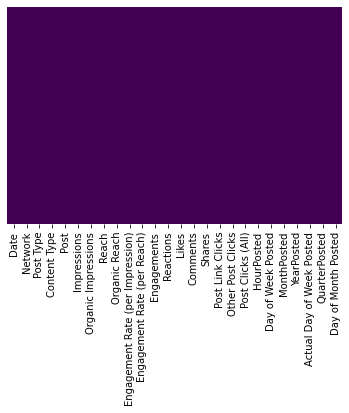

In [171]:
import seaborn as sns
sns.heatmap(df_.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [172]:
# Find the Network and Content Type with the highest and lowest values
highest_post_link_clicks = df.loc[df['Post Link Clicks'].idxmax()]
lowest_post_link_clicks = df.loc[df['Post Link Clicks'].idxmin()]

highest_other_post_clicks = df.loc[df['Other Post Clicks'].idxmax()]
lowest_other_post_clicks = df.loc[df['Other Post Clicks'].idxmin()]

highest_post_clicks_all = df.loc[df['Post Clicks (All)'].idxmax()]
lowest_post_clicks_all = df.loc[df['Post Clicks (All)'].idxmin()]


# Behavior of the unique values in the 'Network' column with respect to 'Post Link Clicks,' 'Other Post Clicks,' and 'Post Clicks (All),' as well as how 'Content Type' interacts with these metrics 

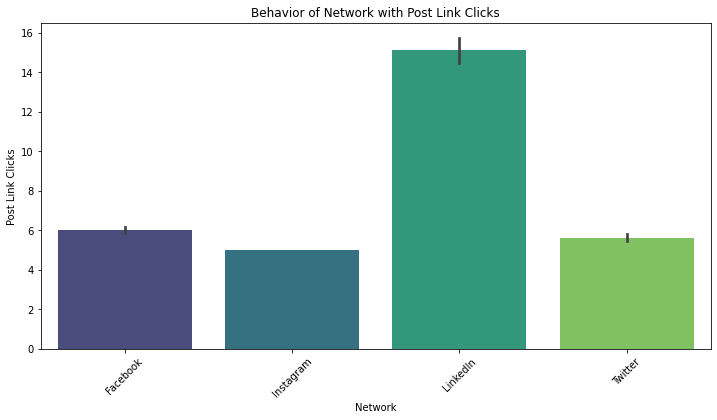

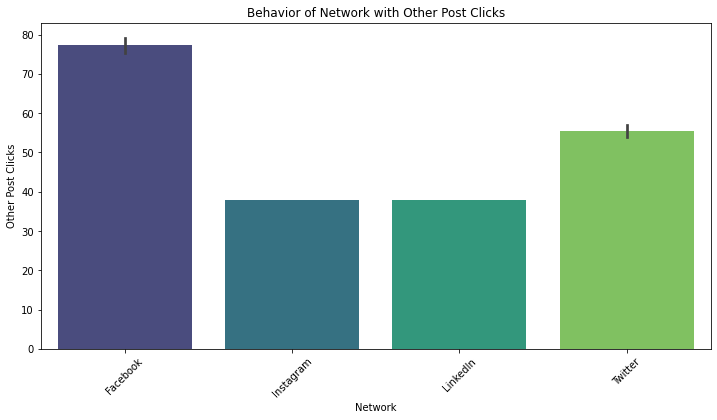

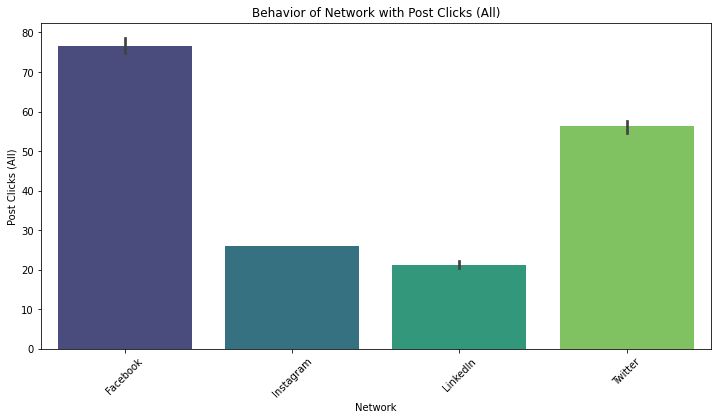

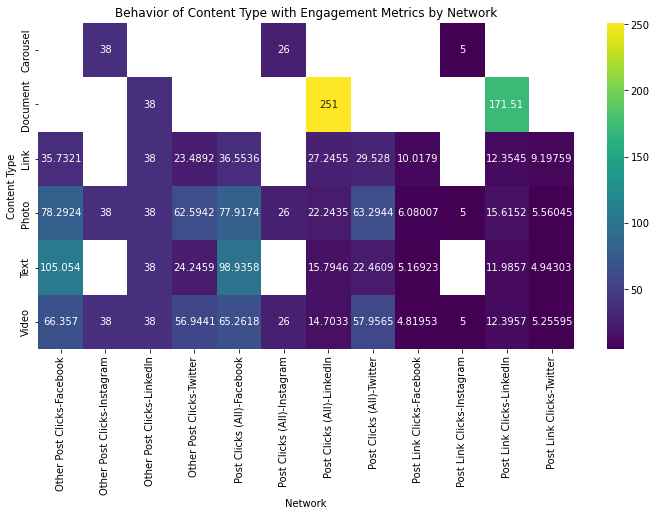

In [173]:
# Plot behavior of Network with engagement metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=df_, x='Network', y='Post Link Clicks', palette='viridis')
plt.title("Behavior of Network with Post Link Clicks")
plt.xlabel("Network")
plt.ylabel("Post Link Clicks")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_, x='Network', y='Other Post Clicks', palette='viridis')
plt.title("Behavior of Network with Other Post Clicks")
plt.xlabel("Network")
plt.ylabel("Other Post Clicks")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_, x='Network', y='Post Clicks (All)', palette='viridis')
plt.title("Behavior of Network with Post Clicks (All)")
plt.xlabel("Network")
plt.ylabel("Post Clicks (All)")
plt.xticks(rotation=45)
plt.show()

# Plot behavior of Content Type with engagement metrics
pivot_content_type = df_.pivot_table(index='Content Type', columns='Network', values=['Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)'])
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_content_type, cmap='viridis', annot=True, fmt='g')
plt.title("Behavior of Content Type with Engagement Metrics by Network")
plt.xlabel("Network")
plt.ylabel("Content Type")
plt.show()


Post Link Clicks:

LinkedIn has the highest average number of post link clicks at approximately 15.11.
Facebook follows with an average of 5.99 post link clicks.
Twitter and Instagram are relatively close with averages of 5.63 and 5.00 respectively.

Other Post Clicks:

Facebook dominates this metric with an average of 77.28 other post clicks.
Twitter follows with an average of 55.53.
LinkedIn and Instagram both have an average of 38.00 other post clicks.

Post Clicks (All):

Facebook once again leads with an average total of 76.66 post clicks.
Twitter comes in second with 56.22.
Instagram and LinkedIn have averages of 26.00 and 21.27 respectively.

Insights:

LinkedIn, although not the top platform in terms of overall engagement, seems to be the best platform for generating link clicks. This suggests that users on LinkedIn are more inclined to follow links, which can be valuable for driving website traffic or specific call-to-action campaigns.
Facebook consistently performs well across all metrics, making it a key platform for overall engagement.
Instagram and Twitter have their strengths, but neither outperforms the other across all metrics. Their effectiveness would likely depend on the specific goals of a campaign.

# Heatmap values to generate actionable insights for stakeholders

Content Type - Document:

LinkedIn: For 'Post Clicks (All)', the value stands at a whopping 251. This means that when documents are shared on LinkedIn, they receive a large number of total clicks, significantly higher than any other content type on this platform. Stakeholders should take note of this and consider LinkedIn as the primary platform for sharing document-type content like reports or whitepapers.

Content Type - Photo:

Facebook: The 'Other Post Clicks' metric for photos is 78.29, indicating that photos shared on Facebook receive a significant amount of interactions that aren't link clicks. This could include likes, comments, shares, etc. On the other hand, the 'Post Link Clicks' value is only 6.08, suggesting that photos with embedded links aren't clicked as often.
LinkedIn: Interestingly, for photos, 'Post Link Clicks' stands at 15.62, which is higher than both Facebook and Twitter. This might suggest that while LinkedIn isn't typically seen as a platform for photo sharing, photos with embedded links can still drive a good amount of engagement.

Content Type - Video:

Facebook: Videos on Facebook receive a high number of 'Other Post Clicks' (66.36), but the 'Post Link Clicks' is only 4.82. This means while videos are interacted with frequently, they don't drive many link clicks.
LinkedIn: Videos have a 'Post Link Clicks' value of 12.40, higher than Facebook. This suggests that if the goal is to drive link clicks through video content, LinkedIn might be a better platform than Facebook.

Content Type - Link:

Facebook: The 'Post Link Clicks' is 10.02, which is among the highest across platforms for this content type. This suggests that direct links shared on Facebook are effective in driving engagement.
Twitter: With 'Post Link Clicks' at 9.20, it's slightly below Facebook, suggesting that Twitter is also effective for sharing links, though marginally less so than Facebook.

Content Type - Text:

Facebook: For 'Other Post Clicks', the value is an impressive 105.05. This suggests that text-based posts on Facebook, perhaps those with engaging stories or narratives, receive a high number of interactions. However, 'Post Link Clicks' is just 5.17, indicating that these posts might not drive many link clicks.

Interactions:

LinkedIn: Despite being seen as a professional networking site, LinkedIn shows strong interactions for several content types, especially documents and photos with embedded links.
Facebook: While it drives high engagement in terms of 'Other Post Clicks' for most content types, it's not always the top platform for 'Post Link Clicks'. This indicates that while content on Facebook gets interacted with, it doesn't necessarily drive users to external links.

In conclusion, the platform and content type significantly influence the kind of engagement a post receives. Stakeholders should be strategic about the content they post and where they post it, depending on the kind of engagement they aim to achieve

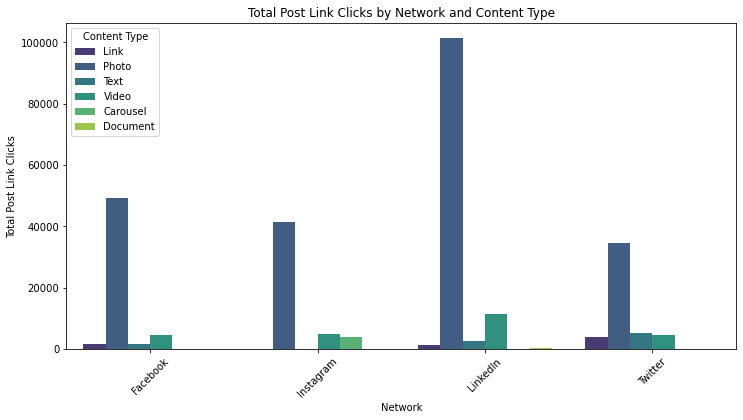

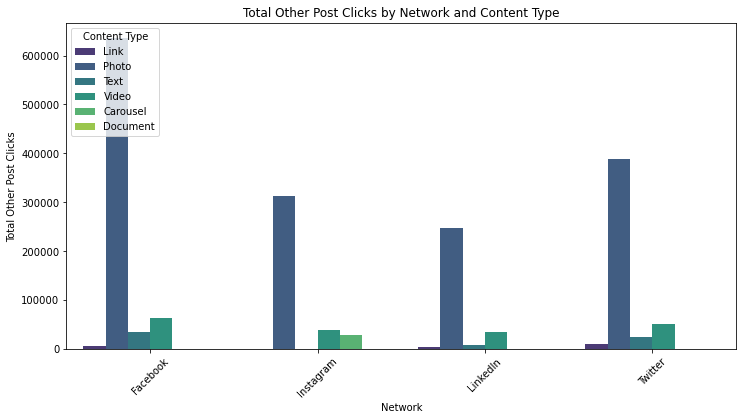

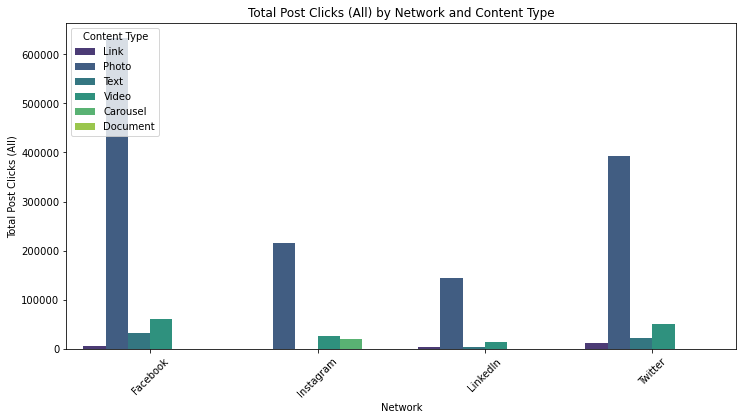

In [174]:
# Group by Network and Content Type and sum the engagement metrics
grouped_df = df_.groupby(['Network', 'Content Type'])[['Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)']].sum().reset_index()

# Plot total values of engagement metrics for each Network and Content Type
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='Network', y='Post Link Clicks', hue='Content Type', palette='viridis')
plt.title("Total Post Link Clicks by Network and Content Type")
plt.xlabel("Network")
plt.ylabel("Total Post Link Clicks")
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='Network', y='Other Post Clicks', hue='Content Type', palette='viridis')
plt.title("Total Other Post Clicks by Network and Content Type")
plt.xlabel("Network")
plt.ylabel("Total Other Post Clicks")
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='Network', y='Post Clicks (All)', hue='Content Type', palette='viridis')
plt.title("Total Post Clicks (All) by Network and Content Type")
plt.xlabel("Network")
plt.ylabel("Total Post Clicks (All)")
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.show()


Key Insights for Stakeholders:

LinkedIn's Dominance for Photos: The total post link clicks for photos on LinkedIn (approximately 
101,327) is more than twice that of Facebook's 49,358. This suggests that photos, perhaps those with professional or informative content, perform exceptionally well on LinkedIn.

Facebook's Overall Engagement: Facebook consistently shows high engagement across most content types, particularly for the metric "Other Post Clicks". This indicates that while users may not always click on links, they engage with the content in other ways (likes, comments, shares).

Instagram's Strength with Photos: Considering that Instagram primarily focuses on visual content, it's no surprise that photos have high engagement. But it's worth noting the significant engagement even with video content.

Twitter's Balanced Engagement: Twitter has a balanced engagement across different content types, with links, photos, and videos all receiving substantial clicks.

In summary, while each platform has its strengths, the type of content shared plays a significant role in engagement. Depending on the content type and engagement goal (link clicks vs. overall interactions), stakeholders can make more informed decisions about their content strategy.


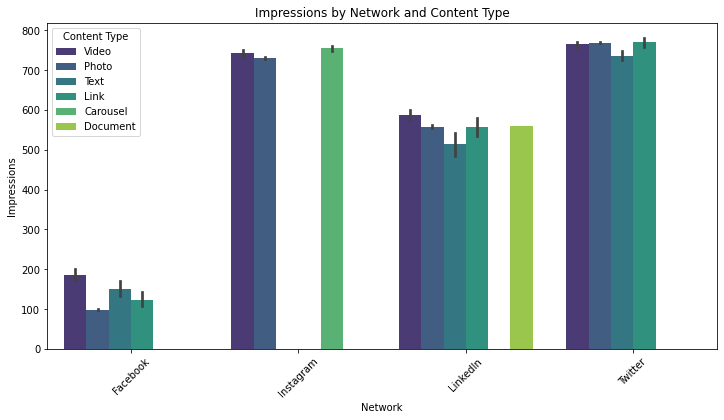

In [175]:
# Create bar plots to analyze behavior of Network and Content Type with metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=df_, x='Network', y='Impressions', hue='Content Type', palette='viridis')
plt.title("Impressions by Network and Content Type")
plt.xlabel("Network")
plt.ylabel("Impressions")
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.show()

Key Insights for Stakeholders:

Instagram's Visual Dominance: Instagram, being a primarily visual platform, shows its strength with the "Photo" content type. With over 6 million impressions for photos, it's a clear indication that visual content is highly impactful on this platform.

LinkedIn's Diverse Engagement: While "Photo" content has the highest impressions on LinkedIn, it's worth noting that other content types like "Video" and "Text" also have significant impressions, suggesting a diverse user engagement.

Twitter's Textual Strength: The "Text" content type on Twitter has the highest impressions, emphasizing that short, textual content (like tweets) garners significant visibility. This is followed closely by "Photo" and "Video", indicating a balanced content engagement on Twitter.

Facebook's Photo Engagement: Photos on Facebook have a high number of impressions, suggesting that visual content resonates well with its user base.

In conclusion, the type of content and the platform on which it's shared plays a crucial role in its visibility and engagement. Stakeholders should align their content strategy based on the platform's strength and the target audience's preferences.

 # visualize the interactions between 'Network' and 'Content Type' regarding 'Impressions.

nan_values = df_.isna().sum()
nan_values 

In [176]:
# df_['Reach Percentage'].nunique()
# df_['Reach Percentage'].unique()[:100]

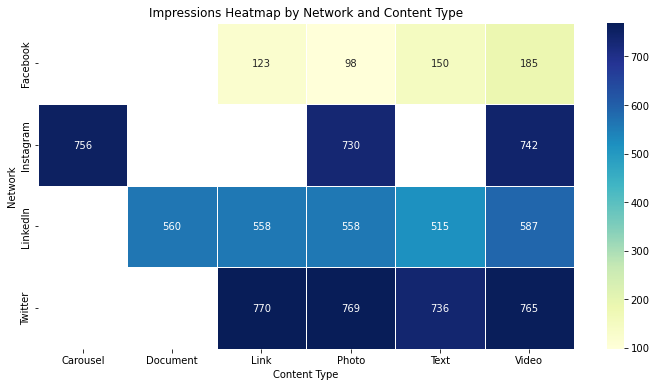

In [177]:
# Create a heatmap to analyze the interactions
heatmap_data = df_.pivot_table(index='Network', columns='Content Type', values='Impressions', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title("Impressions Heatmap by Network and Content Type")
plt.xlabel("Content Type")
plt.ylabel("Network")
plt.show()

Key Insights for Stakeholders:

Instagram's Carousel Dominance: Instagram's "Carousel" content type has the highest average impression of  756
This indicates that carousel posts, which allow multiple photos or videos in a single post, are highly engaging and visible on Instagram.
Balanced Engagement on Twitter: Twitter shows close average impressions across "Link", "Photo", "Text", and "Video" content types, ranging from 736 to 770. This suggests a balanced user engagement across diverse content types.

LinkedIn's Multimedia Engagement: LinkedIn's "Video" content type has the highest average impressions, followed closely by "Document", "Link", and "Photo". This suggests that multimedia content, especially videos, is well-received on this professional platform.

Facebook's Preference for Videos: While the differences are not substantial, videos on Facebook have the highest average impressions among all content types on the platform.

In summary, the type of content and the platform on which it's shared play a crucial role in its visibility. Stakeholders should align their content strategy based on the platform's strengths and the content type's performance to optimize engagement.


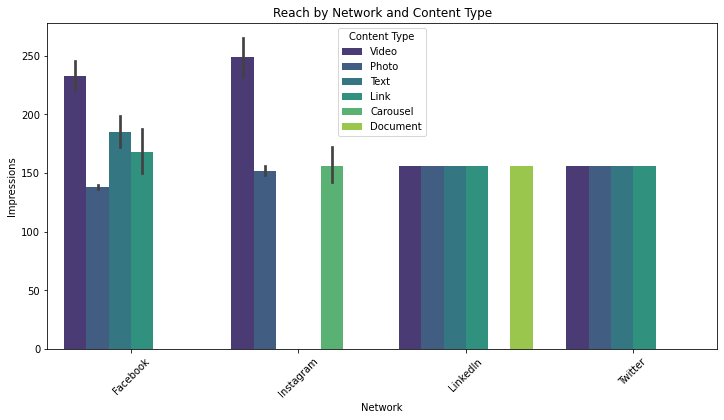

In [178]:
# Create bar plots to analyze behavior of Network and Content Type with metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=df_, x='Network', y='Reach', hue='Content Type', palette='viridis')
plt.title("Reach by Network and Content Type")
plt.xlabel("Network")
plt.ylabel("Impressions")
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.show()

Key Insights for Stakeholders:

Instagram's Visual Dominance: Instagram, being a primarily visual platform, shows its strength with the "Photo" content type, having the highest reach among all platforms and content types. This indicates the platform's potential for visual content visibility.

LinkedIn's Diverse Engagement: While "Photo" content has the highest reach on LinkedIn, it's worth noting that other content types like "Video" and "Text" also have significant reach. However, the "Document" content type seems to underperform, suggesting a need to revisit content strategies around it.

Twitter's Textual Strength: The "Text" content type on Twitter has the highest reach, emphasizing the platform's strength in short textual content (like tweets). This is followed closely by "Photo" and "Video", indicating a balanced content engagement on Twitter.

Facebook's Photo Engagement: Photos on Facebook have the highest reach, suggesting that visual content resonates well with its user base.

In conclusion, the type of content and the platform on which it's shared plays a pivotal role in its reach. Stakeholders should align their content strategy based on the platform's strength and the target audience's preferences to maximize visibility and engagement.



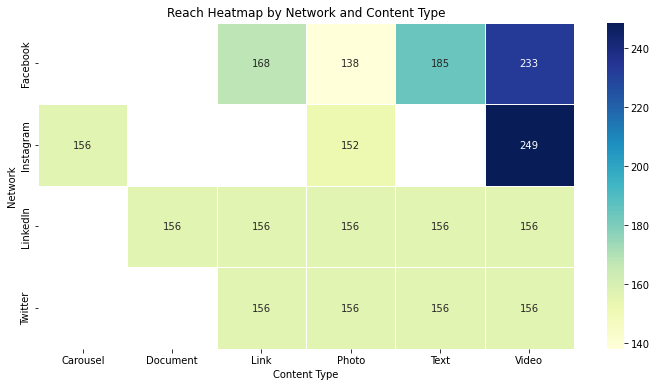

In [179]:
# Create a heatmap to analyze the interactions
heatmap_data = df_.pivot_table(index='Network', columns='Content Type', values='Reach', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title("Reach Heatmap by Network and Content Type")
plt.xlabel("Content Type")
plt.ylabel("Network")
plt.show()

Key Insights for Stakeholders:

Instagram's Video Engagement: On Instagram, the "Video" content type shows the highest average reach of 249, indicating that videos might be more engaging or visible to users than other content types on this platform.

Facebook's Preference for Videos: Videos on Facebook have the highest average reach of  233, suggesting that video content is resonating well with the Facebook audience.

Consistent Reach on LinkedIn and Twitter: Both LinkedIn and Twitter show a consistent average reach of 156 across various content types. This suggests a balanced content engagement on these platforms, where the type of content might not be as critical a factor for reach as on other platforms.

Absence of Certain Content Types: It's noteworthy that certain content types, like "Carousel" for Facebook and "Document" for Instagram, are absent. This could indicate either a lack of data for these combinations or that these content types are not applicable for these platforms.

In conclusion, stakeholders should consider the type of content and its potential reach on a specific platform when crafting their content strategy. Aligning the content type with the platform's strengths can help maximize visibility and engagement.


 # visualizing the distribution of posting hours across the network and content type combinations

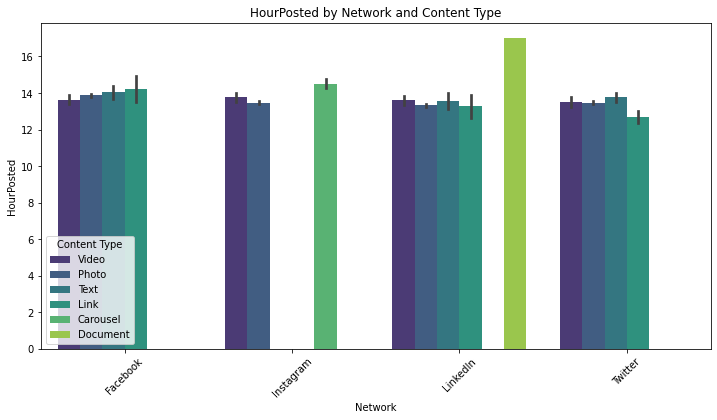

In [180]:
# Create bar plots to analyze behavior of Network and Content Type with metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=df_, x='Network', y='HourPosted', hue='Content Type', palette='viridis')
plt.title("HourPosted by Network and Content Type")
plt.xlabel("Network")
plt.ylabel("HourPosted")
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.show()

Key Insights for Stakeholders:

LinkedIn's Late Document Posts: The "Document" content type on LinkedIn is posted notably later than other content types. Stakeholders might want to experiment with posting documents earlier in the day to see if it affects engagement.

Consistency on Instagram: The posting hours on Instagram for the three content types are relatively close, suggesting a consistent content strategy on this platform.

Facebook's Varied Posting Hours: There's a variation in posting hours for different content types on Facebook. This might indicate experimentation to find optimal posting times or might reflect audience behavior and when they're most active.

Twitter's Early Link Posts: Links are posted earlier on Twitter compared to other content types. Given Twitter's fast-paced nature, stakeholders might be aiming to capture early morning traffic with important links.

In conclusion, understanding the optimal posting hours for each content type on different platforms can offer a strategic advantage. Stakeholders should consider these insights to refine their content scheduling strategy, ensuring maximum visibility and engagement.

In [181]:
# Group by HourPosted and calculate mean for metrics
hourly_metrics = df_.groupby('HourPosted')[['Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)', 'Comments', 'Shares', 'Likes', 'Reactions', 'Engagements']].mean()

# I can repeat this process for other temporal attributes (MonthPosted, Day of Week Posted, etc.)


# Segmentation 

In [182]:
# Segmentation by Network
network_segments = df_.groupby('Network')[['Post Link Clicks', 'Likes', 'Comments']].mean()
network_segments

Post Link Clicks      Likes   Comments
Network                                          
Facebook           5.994037  55.252062  14.709356
Instagram          5.000000  61.158175   7.107251
LinkedIn          15.107630  16.839888   1.222364
Twitter            5.632203  16.073817   5.488391

## Network Segmentation by Engagement Metrics:
Insights:

LinkedIn's Engagement: Users on LinkedIn are more inclined towards link-based content, likely seeking professional or detailed resources.

Instagram's Engagement: The platform's visually driven nature is evident, with content receiving a higher number of likes, though it lags in comments and link clicks.

Facebook's Balanced Approach: A good mix of link clicks, likes, and comments suggest a holistic engagement on Facebook.

Twitter's Steady Engagement: Despite not leading in any particular metric, Twitter maintains a consistent engagement, emphasizing its nature of quick, impactful content.

In [183]:
# Segmentation by Content Type
content_type_segments = df.groupby('Content Type')[['Post Link Clicks', 'Likes', 'Comments']].mean()
content_type_segments


Post Link Clicks      Likes  Comments
Content Type                                       
Carousel              5.000000  75.834666  5.912599
Document            171.510010   9.000000  0.000000
Link                  9.897547  17.139246  2.711318
Photo                 7.790452  40.637396  7.687582
Text                  5.938802  18.225705  8.117054
Video                 6.835222  34.264972  6.794184

LinkedIn's Click Engagement: LinkedIn, being a professional network, shows a high average in post link clicks, suggesting that users are more likely to click on links to read more or explore further. This might be particularly useful for B2B businesses or content that directs users to detailed articles or professional resources.

Instagram's Like Dominance: Instagram, a visual platform, leads in terms of likes. This indicates that while users might not click on links as often, they engage heavily by liking content.

Facebook's Balanced Engagement: Facebook shows a balanced engagement across post link clicks, likes, and comments. This suggests that the platform continues to be a space where users not only like content but also engage in discussions.

Twitter's Moderation: While Twitter's metrics aren't as high as some other platforms, it maintains a decent balance between link clicks, likes, and comments. Given Twitter's fast-paced nature, this indicates that concise and impactful content can still drive engagement.

In conclusion, each social media platform has its strengths and user behaviors. By understanding these nuances, stakeholders can tailor their content strategy to leverage the unique characteristics of each platform, maximizing engagement and reach

In [184]:
# Segmentation by QuarterPosted
quarter_segments = df_.groupby('QuarterPosted')[['Post Link Clicks', 'Likes', 'Comments']].mean()
quarter_segments

Post Link Clicks      Likes  Comments
QuarterPosted                                       
1                      7.204335  41.572671  7.904987
2                      7.523055  39.364734  7.690644
3                      8.224738  37.030159  7.183506
4                      7.493137  38.904329  7.082269

Key Insights for Stakeholders:

Q3's Click Engagement: The third quarter sees the highest average in post link clicks, suggesting that users might be more engaged or active during this period. Content strategies can be optimized to post more link-oriented content during this period.

Q1's Like Dominance: The first quarter leads in terms of likes, indicating that content posted during this period resonates well with the audience in terms of appreciation.

Comments' Decline: The number of comments sees a consistent decline from Q1 through Q4. This might indicate a need to create more engaging or discussion-worthy content in the latter half of the year.

Balanced Engagement in Q4: Despite the decline in comments, Q4 sees balanced metrics across post link clicks and likes. Content strategies can focus on a mix of content types to ensure consistent engagement.

In conclusion, understanding the seasonality and quarterly engagement trends can be crucial for planning content calendars. Stakeholders can leverage these insights to tailor their content strategy according to the quarter, ensuring consistent and high engagement throughout the year.

# Visualize Trends Over Time


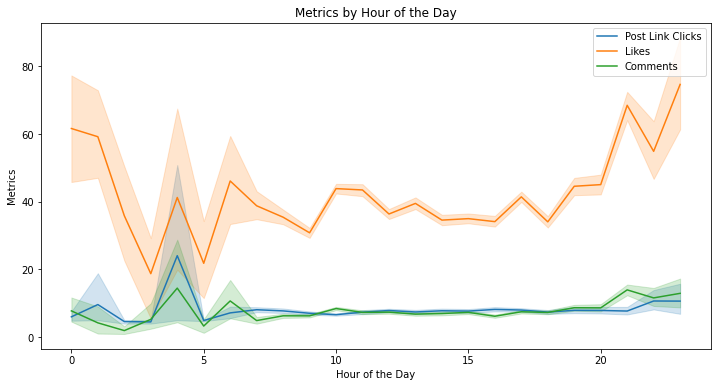

In [185]:
# Visualize Trends Over Time: Line plots for metrics by HourPosted
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_, x='HourPosted', y='Post Link Clicks', label='Post Link Clicks')
sns.lineplot(data=df_, x='HourPosted', y='Likes', label='Likes')
sns.lineplot(data=df_, x='HourPosted', y='Comments', label='Comments')
plt.title("Metrics by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Metrics")
plt.legend()
plt.show()



Post Link Clicks:


Late Night Engagement: The pronounced peak in post link clicks close to midnight suggests that a segment of the audience is highly active and more inclined to click on links during this period. If the objective is to drive users to external content or a website, this time frame seems highly promising.

Dormant Early Mornings: The sharp drop in the early morning hours, particularly around 3 AM, suggests a period of reduced activity. It might be less effective to post content aiming for link clicks during these hours.

Morning Recovery: Post link clicks see a recovery by 5 AM. This might be due to users starting their day and browsing content. Therefore, early morning content can still be effective, especially if posted around or after 5 AM.

Daytime Variability: The fluctuating values from morning to early evening indicate that while there's consistent engagement, there's also variability in user behavior. It would be beneficial to experiment with content types and posting schedules during these hours to determine optimal engagement times.

Likes:

The early morning hours see a decrease in likes, suggesting it might not be the optimal time for critical content aiming to gather likes.
The afternoon hours, especially around 1 PM, see a dip. This might be due to users being busy or not actively browsing.
The late evening, especially around 11 PM, sees an increase in likes, making it a potential window for content aiming to capture more likes.

Comments:

The pattern for comments remains relatively consistent throughout the day, suggesting that the audience's propensity to comment doesn't fluctuate significantly. However, the slight increase late at night might indicate a more engaged or active audience during those hours.

Optimize for Peak Engagement:

For 'Post Link Clicks', late-night hours, particularly around 11 PM, show significant activity. Content aiming to drive users to external content or a website should capitalize on this window.
For 'Likes', consistency is observed throughout the day, with slight peaks in the early hours and late night. Thus, visually appealing or popular content can be spread out during these times.
For 'Comments', encourage discussions and interactive posts during the day when comment activity is relatively higher.

Avoid Low Engagement Windows: The early morning hours, particularly around 3 AM, show a drop in all metrics. Consider this time slot less favorable for critical content.

Diversify Daytime Content: Given the fluctuations and irregularities from morning to evening for all metrics, diversify content types. Infographics, polls, quizzes, short videos, or interactive content can help in gauging what resonates best with the audience.

Engage with Audience Insights: Utilize platform-specific insights tools (like Facebook Insights or Twitter Analytics) to understand when your specific audience segments are most active and tailor content timing accordingly.


Insights:

Correlation Between Metrics: Often, an increase in one metric (like 'Likes') may not necessarily correlate with increases in others ('Comments' or 'Post Link Clicks'). For instance, users might like a post (indicating appreciation) without the intent to engage further (comment or click on links).

Content Type and User Behavior: Different content types might drive different metrics. For instance, visually appealing or fun content might garner more likes, whereas thought-provoking or controversial content might spur more comments.

User Availability vs. Engagement: The late-night peak in link clicks might suggest that while fewer users are active, those that are may be more engaged or willing to explore content in-depth.

Recommendations:

Tailor Content to Metrics:

Use visually appealing, short, and crisp content during times where 'Likes' are predominant to maximize appreciation and visibility.
For periods where 'Post Link Clicks' are high, deploy content that directs users to your website, a new product, or any other conversion-oriented content.
When 'Comments' are higher, initiate discussions or post content that invites user opinions and thoughts to foster community engagement.
Adapt to User Activity Windows:

Prioritize posting crucial content during high engagement windows (like late nights for link clicks) to maximize impact.
Utilize the periods of lower engagement (like early mornings) for less critical or experimental content, thereby not wasting crucial content during low-visibility hours.
In essence, understanding the ebb and flow of these metrics can enable stakeholders to not only time their content effectively but also to craft it in a manner that resonates with the prevailing user behavior during specific time windows. This nuanced approach ensures that content is not only seen but actively engaged with, thereby maximizing ROI on content creation and deployment efforts.

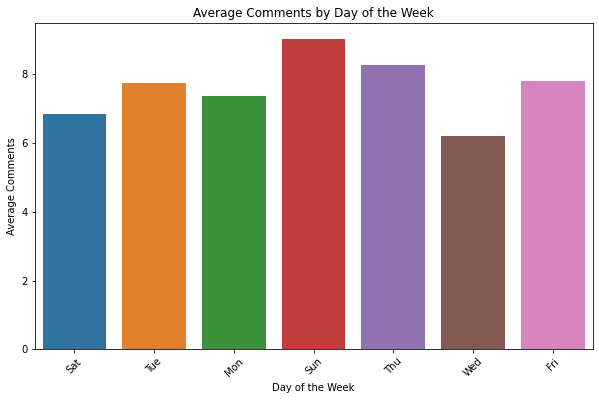

In [186]:
# Compare Different Temporal Attributes: Bar plots for metrics by Day of Week Posted
plt.figure(figsize=(10, 6))
sns.barplot(data=df_, x='Actual Day of Week Posted', y='Comments', ci=None)
plt.title("Average Comments by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Comments")
plt.xticks(rotation=45)
plt.show()

Sunday has the highest average number of comments, followed closely by thursday.
Wednesday and Monday have relatively lower average comments compared to other days.

Recommendations:
Optimize Posting Schedule: Content intended to drive user engagement in terms of comments might be more effective if posted on Thursdays or Sundays, given the observed higher average comments on these days.

Investigate Low Engagement Days: It might be worthwhile to investigate why Mondays and Wednesdays have lower engagement in terms of comments. Factors such as post content, timing, or other external events could be influencing this trend.

Experiment with Content: Since the days with high average comments are not consecutive, it suggests that the type or topic of content could play a significant role. It might be beneficial to experiment with different content types or topics on different days to see if it has an impact on engagement.

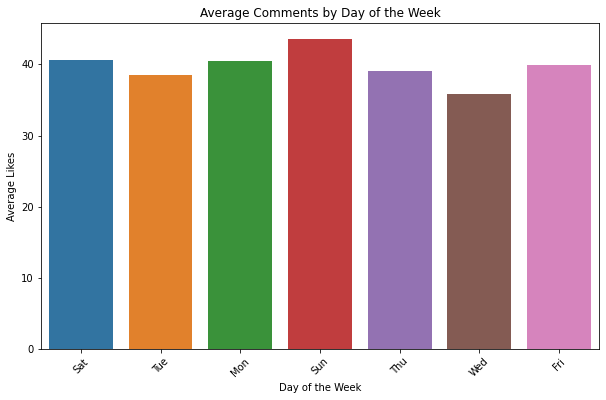

In [187]:
# Compare Different Temporal Attributes: Bar plots for metrics by Day of Week Posted
plt.figure(figsize=(10, 6))
sns.barplot(data=df_, x='Actual Day of Week Posted', y='Likes', ci=None)
plt.title("Average Comments by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
plt.show()

Sunday receives the highest average number of likes.
Monday, Wednesday, and Thursday also see a significant amount of average likes, with Monday being a close second to Sunday.
Friday and Saturday have relatively lower average likes compared to other days.

<AxesSubplot:xlabel='Actual Day of Week Posted'>

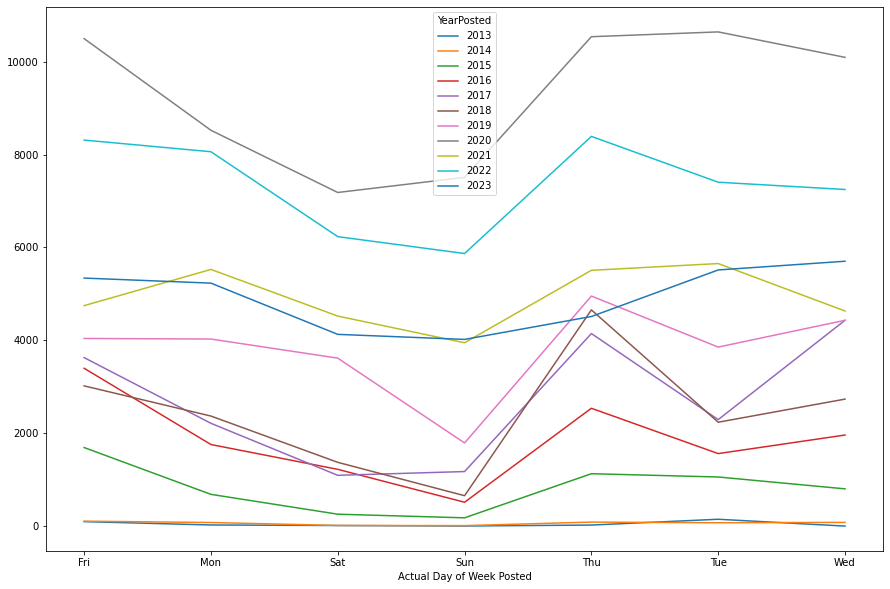

In [188]:
df_.groupby(['Actual Day of Week Posted','YearPosted'])['Comments'].sum().unstack().plot(figsize=(15,10))

Looking at the previous observation regarding year and day by comment metric,  there are difference between these two visualizations, which is crucial is crucial.

Total Comments by Day of the Week and Year:
This visualization shows the total sum of comments for each day of the week, segmented by year.
It aggregates the data by summing all comments for posts made on each specific day.
Here, the volume of posts plays a significant role. If there are more posts on weekdays (which is often the case for many businesses), then even if each post gets fewer comments on average, the total sum of comments might still be higher for weekdays.

Average Comments by Day of the Week visualization

This bar plot visualizes the average number of comments for each day of the week.
The data is aggregated by taking the mean of all comments for posts made on each specific day.
So, even if there are fewer posts on a Sunday, if those posts receive a higher number of comments on average, then Sunday will appear to have a higher average.

Why the Difference:

It's possible that on Sundays, fewer posts are made, but those specific posts are highly engaging, leading to a higher average number of comments. Meanwhile, on weekdays, there could be a higher volume of posts, but each post might receive fewer comments on average. However, the sheer volume of posts on weekdays could lead to a higher total number of comments.

Another factor could be the nature of the content posted. Maybe on Sundays, more interactive or engaging content is posted, prompting more users to comment.

Recommendation:

It would be beneficial to also check the distribution of the number of posts on each day. This will provide clarity on whether the volume of posts is influencing these results. If, for example, Sundays have fewer posts but those posts are highly engaging, it could indicate a strategy to post more high-quality content on Sundays to leverage this engagement.

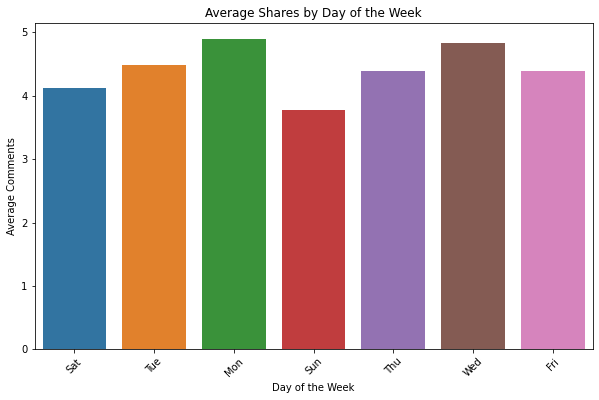

In [189]:
# Compare Different Temporal Attributes: Bar plots for metrics by Day of Week Posted
plt.figure(figsize=(10, 6))
sns.barplot(data=df_, x='Actual Day of Week Posted', y='Shares', ci=None)
plt.title("Average Shares by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Comments")
plt.xticks(rotation=45)
plt.show()

Monday has the highest average shares, suggesting that the start of the week sees content that resonates well with the audience and encourages sharing.

<AxesSubplot:xlabel='Actual Day of Week Posted'>

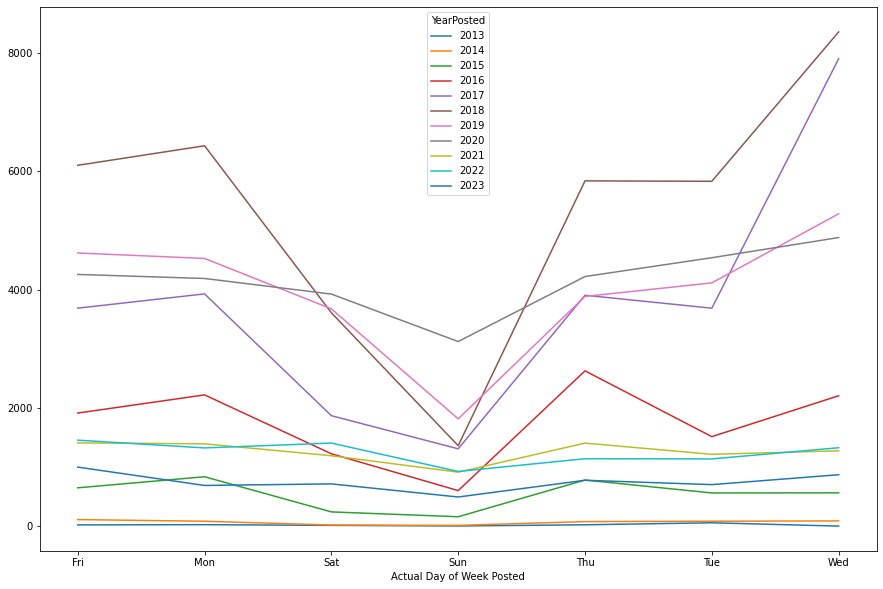

In [190]:
df_.groupby(['Actual Day of Week Posted','YearPosted'])['Shares'].sum().unstack().plot(figsize=(15,10))

But in case of Shares,there is consistency in the behavior related to shares across both visualizations (average and total shares) for Sundays.

When both the average and total metrics point in the same direction for a particular day, it indicates a more pronounced trend or behavior.

Insights:

Lower Sunday Engagement: Both the average shares per post and the total shares on Sundays are the lowest. This suggests that content shared on Sundays is less likely to be redistributed by users compared to content shared on other days.

Potential Content or User Behavior Patterns: The lower sharing behavior on Sundays might be due to the nature of the content being posted on that day or due to user behavior patterns, where users are less active or less inclined to share content.

Consistency Across Years: The fact that this trend is consistent across years (as seen in the total shares visualization) suggests that this is a recurring pattern and not a one-off occurrence.

Recommendations:

Reevaluate Sunday Content: Consider reviewing the type of content being posted on Sundays. It might be beneficial to test different content types or themes to see if they resonate better with the audience and encourage sharing.

Engage Users Differently: Since user behavior might be different on Sundays, consider employing strategies that specifically engage users in a manner that encourages sharing. This could include interactive content, user polls, or share incentives.

Analyze Other Metrics: While shares are lower on Sundays, it might be worth analyzing other engagement metrics for that day, like likes or comments, to see if there's a particular type of engagement users prefer on Sundays.



# Anomaly Detection: Though I already work on my data to check for outliers amd remove outliers after preprosing but I just tried doing anomalies on Likes column.

In [191]:
# Anomaly Detection: Using Isolation Forest for anomaly detection on Likes
from sklearn.ensemble import IsolationForest  # Import IsolationForest
model = IsolationForest(contamination=0.05, random_state=42)
df_['Likes_Anomaly'] = model.fit_predict(df_[['Likes']])
anomalies = df_[df_['Likes_Anomaly'] == -1]

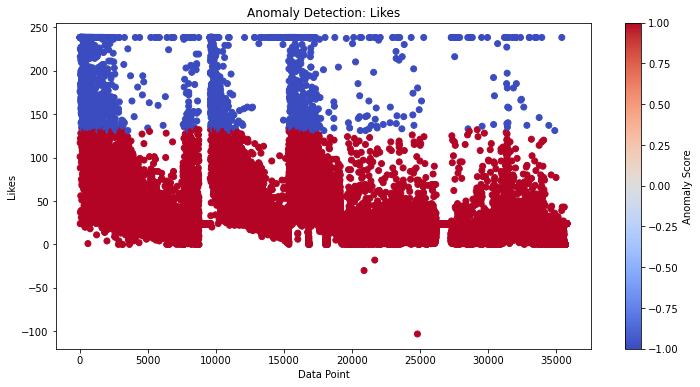

Anomalies in Likes:
            Likes  HourPosted  Day of Week Posted
0      176.000000          17                   5
1      238.099515          10                   5
2      238.099515          21                   1
4      238.099515          10                   6
5      238.099515          13                   3
...           ...         ...                 ...
33751  146.000000          13                   4
33944  238.099515          19                   1
34460  137.000000          21                   3
34900  131.000000           8                   1
35415  238.099515          18                   0

[1787 rows x 3 columns]


In [192]:
# Visualize Likes anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Likes'], c=df_['Likes_Anomaly'], cmap='coolwarm')
plt.title("Anomaly Detection: Likes")
plt.xlabel("Data Point")
plt.ylabel("Likes")
plt.colorbar(label="Anomaly Score")
plt.show()

# I can repeat anomaly detection for other metrics as needed

# Investigate anomalies further if necessary
print("Anomalies in Likes:")
print(anomalies[['Likes', 'HourPosted', 'Day of Week Posted']])

# I can Save the updated dataframe with anomalies for further analysis
# df.to_csv('anomaly_detected_data.csv', index=False)


I visualized the data and observed that 3 data points are below 0 and are outside the clustered data points.
The presence of data points below 0 indicates that these data points are considered anomalies, and they deviate from the expected pattern of 'Likes' values. But this is at a considerable rate 

# Further Investigations

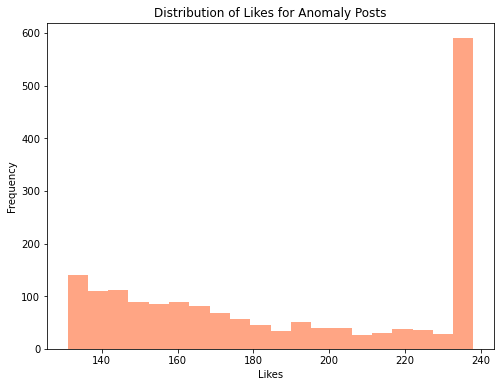

In [193]:
# Assuming I have a DataFrame 'anomalies_df' containing the anomalies
# This DataFrame should have columns like 'Likes', 'HourPosted', 'Day of Week Posted', and possibly 'Post Content' or 'Post ID'

# Filter the original dataset to retrieve the posts associated with anomalies
anomaly_posts = df_[df_.index.isin(anomalies.index)]



# You can also visualize the distribution of 'Likes' for anomaly posts
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(anomaly_posts['Likes'], bins=20, color='coral', alpha=0.7)
plt.title("Distribution of Likes for Anomaly Posts")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()

In [194]:
# Assuming I have a DataFrame called 'anomalies_df' with a column 'Post_Text' containing the post texts
# Select the first 10 rows of the DataFrame
first_10_anomalies = anomalies['Post'].head(10)

# Print the first 10 posts with anomalies
for index, post_text in enumerate(first_10_anomalies, start=1):
    print(f"Anomaly {index}:\n{post_text}\n")

Anomaly 1:
We celebrated recently with Novare one of our top clients on the th anniversary of their Novare Lekki mall opening. 
TrustedPartner
ITCANBE

Anomaly 2:
Nk can get you started today. Call    or email assetmanagementstanbicibtc.com.

Anomaly 3:
Still not sure whether to invest in the FGN Bonds 
Here are  reasons why you should. Call us on    or email stockbrokingstanbicibtc.com and let us get you started.

Anomaly 4:
If you were to pick one wish what would it be
ITCANBE

Anomaly 5:
Tomorrow is the last day Dont get caught in the rush hour. Deposit your old Naira notes at any nearby Stanbic IBTC branch.

ITCANBE

Anomaly 6:
The new Naira banknotes in circulation have several security features for ease of recognition which can be easily seen and touched.
Please deposit your old N N and N naira notes at any Stanbic IBTC branch near you.
ITCANBE

Image Source  Central Bank of Nigeria

Anomaly 7:
Find the missing letters
H e    l e

Hint  Its a movie of a boy who was forgotten at h

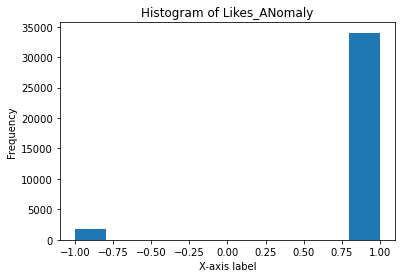

In [195]:

df_['Likes_Anomaly'].plot.hist()
plt.xlabel('X-axis label')
plt.ylabel('Frequency')
plt.title('Histogram of Likes_ANomaly')
plt.show()

   

In [196]:
# # Filter anomalies in Likes
# anomalies_in_likes = df_[df_['Likes_Anomaly'] == 1]

# # Extract the posts associated with anomalies
# anomaly_posts = anomalies_in_likes['Post']

# # Further investigation for anomalies in Likes
# for idx, post_text in enumerate(anomaly_posts):
#     print(f"Anomaly {idx + 1}:")
#     print("Post Text:")
#     print(post_text)
#     print("\n---\n")


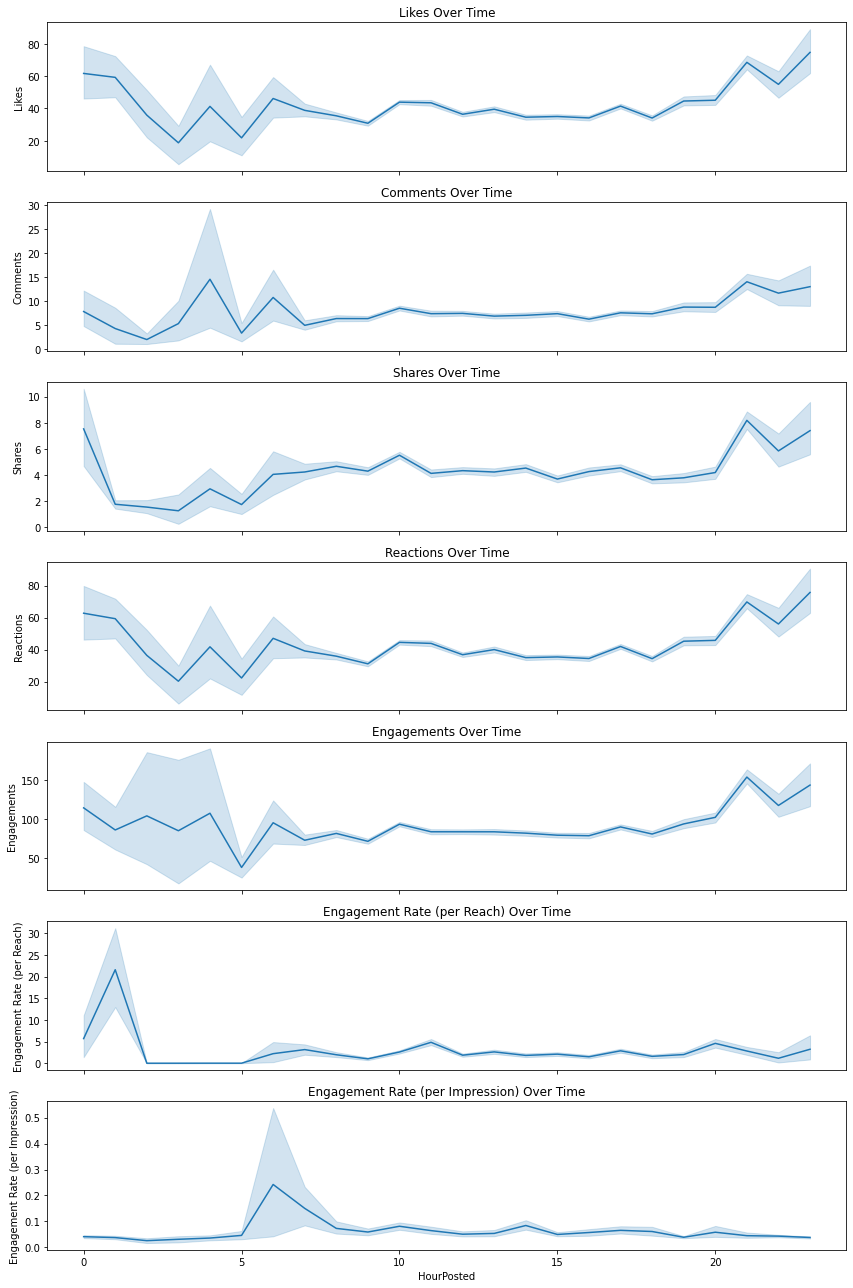

In [197]:

# Define the engagement metrics you want to analyze
engagement_metrics = ['Likes', 'Comments', 'Shares', 'Reactions', 'Engagements','Engagement Rate (per Reach)',
    'Engagement Rate (per Impression)']

# Create subplots for each engagement metric
fig, axes = plt.subplots(len(engagement_metrics), 1, figsize=(12, 18), sharex=True)

# Loop through each engagement metric and create a line plot
for i, metric in enumerate(engagement_metrics):
    ax = axes[i]
    sns.lineplot(data=df_, x='HourPosted', y=metric, ax=ax)
    ax.set_title(f'{metric} Over Time')
    ax.set_xlabel('HourPosted')
    ax.set_ylabel(metric)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

Likes, Shares, and Reactions: These metrics have a strong positive correlation, indicating that when likes increase, shares and reactions also tend to increase (and vice versa). Specifically:

Likes and Shares: Correlation of 0.87

Likes and Reactions: Correlation of 0.998

Shares and Reactions: Correlation of 0.87

Comments Interaction: Comments have a moderate positive correlation with likes (0.67), shares (0.74), and reactions (0.68), suggesting that posts that receive more comments also tend to get more likes, shares, and reactions.

Engagement Rate Interactions: The Engagement Rate (per Reach) and Engagement Rate (per Impression) have a very strong positive correlation of 0.95, indicating that they usually increase or decrease together. These rates also have a strong correlation with overall engagements, with values of 0.80 and 0.74, respectively.

Recommendations:

Focus on Content that Drives Likes: Since likes, shares, and reactions are closely correlated, focusing on content that drives likes can also potentially boost shares and reactions.

Engage in Conversations: Encouraging comments can lead to increases in other engagement metrics. Consider posting content that sparks discussions or asking open-ended questions to foster engagement.

Monitor Engagement Rates: Keeping an eye on both Engagement Rate (per Reach) and Engagement Rate (per Impression) can provide insights into content effectiveness and audience engagement quality.

In [198]:
# # Calculate the correlation between the percentage changes of the engagement metrics
# # This will help identify if metrics increase or decrease together
# correlation_pct_change = engagement_metrics.corr()

# correlation_pct_change


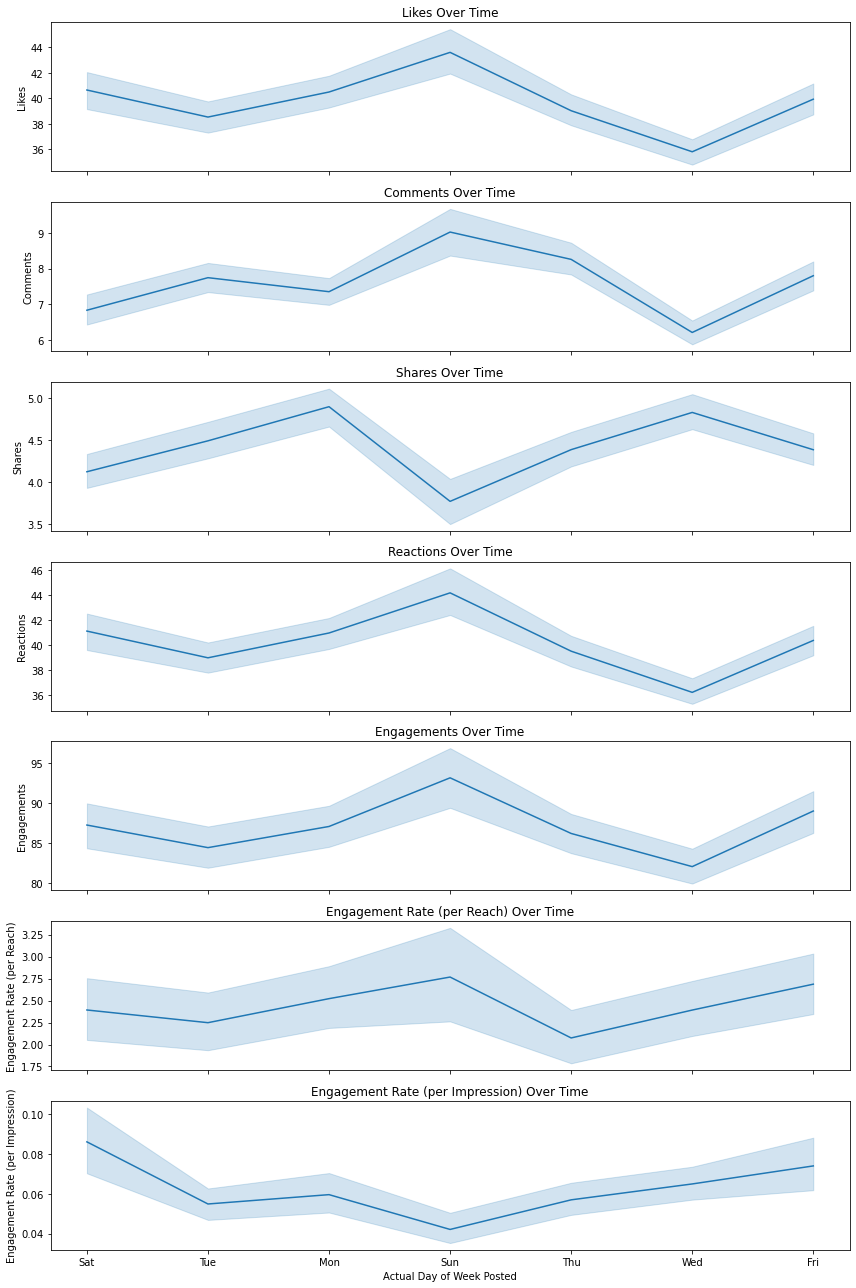

In [199]:

# Define the engagement metrics you want to analyze
engagement_metrics = ['Likes', 'Comments', 'Shares', 'Reactions', 'Engagements','Engagement Rate (per Reach)',
    'Engagement Rate (per Impression)']

# Create subplots for each engagement metric
fig, axes = plt.subplots(len(engagement_metrics), 1, figsize=(12, 18), sharex=True)

# Loop through each engagement metric and create a line plot
for i, metric in enumerate(engagement_metrics):
    ax = axes[i]
    sns.lineplot(data=df_, x='Actual Day of Week Posted', y=metric, ax=ax)
    ax.set_title(f'{metric} Over Time')
    ax.set_xlabel('Actual Day of Week Posted')
    ax.set_ylabel(metric)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

Key Insights:

Sunday Engagements: Sunday and Thursday seem to be the most engaging days in terms of absolute numbers (likes, comments, reactions, and overall engagements, engagements Rate(per reach)). Content or campaigns planned for high visibility and interaction might benefit from being scheduled on these days.

Engagement Quality on Monday: Despite the dip in absolute engagements (likes, comments, reactions) on Monday and wednesday , the shares engagement is the highest. This suggests that while fewer people might be interacting with the content, those who share are highly engaged in sharing.

Consistent Growth Mid-week: There's a consistent growth in engagements from Tuesday through Thursday, suggesting a buildup of audience engagement as the week progresses.
looking aat the engagement rate per impression, Low Engagement on Sundays: Despite the fewer shares and higher (likes, comments, reactions, and overall engagements, engagements Rate(per reach))  and lower engagement rate on Sundays, there might still be a significant number of impressions (or views). This indicates that while users are viewing the content, they're not engaging with it as actively, leading to a lower engagement rate per impression.

Recommendations:

Leverage High Engagement Days: Plan key content or campaigns for Sundays and Thursdays when audience engagement is at its peak.

Tailored Content for Mondays: Given the high engagement rate on Mondays, consider posting content tailored for a dedicated or niche audience. This could be in-depth articles, webinars, or other content forms that cater to a more involved audience.

Monitor and Adjust Strategy: Continuously monitor these trends and adjust the content strategy based on evolving audience behaviors and external factors.

These observations provide a comprehensive view of audience engagement over the week, helping in optimizing content strategy for better results.


THERE IS DIRECT RELATIONSHIP OF ENGAGEMENT RATE PER IMPRESSION ON SUNDAY WITH SHARES AND INDIRECT REALTIONSHIP WITH (likes, comments, reactions, and overall engagements, engagements Rate(per reach) ON SUNDAYS

Higher Likes, Comments, Reactions, and Overall Engagements on Sunday:
                                                                                                                     
This suggests that the content posted on Sundays resonates well with the audience, prompting them to interact more intensively. The users who are active on Sunday might be more engaged or have a deeper connection with the content.

Lower Engagement Rate Per Impression on Sunday:
                                                                                                                     
Despite the higher engagements, a lower engagement rate per impression suggests that a larger number of users are seeing the content (higher impressions) but not as many are engaging with it. This means that while a core group of users is highly engaged, a broader audience is more passive or not as interested in interacting.

Lower Shares on Sunday:
                                                                                                                     
Sharing is a form of active engagement where users redistribute content to their network. Lower shares on Sunday, despite higher other forms of engagement, might indicate that while users like, comment, or react to the content, they're less inclined to share it. This could be due to the nature of the content (perhaps more personal or less universally appealing) or due to user behavior patterns on Sundays (preferring passive engagement over active redistribution).

Interactions and Implications:

Depth vs. Breadth of Engagement: The patterns suggest a depth of engagement on Sundays (likes, comments, reactions) but not breadth (shares, engagement rate per impression). The content might be deeply resonating with a core group of users, but not broad enough to appeal to a wider audience or prompt sharing.

Content Dynamics: The nature of content posted on Sundays might be more introspective, thought-provoking, or niche, prompting deeper engagement from a specific user segment but not broad sharing or interaction from the wider audience.

User Behavior: Users might be in a more reflective or relaxed mode on Sundays, leading to more in-depth interactions like commenting or reacting but not active sharing.

Recommendations:

Diversify Sunday Content: Consider diversifying the content on Sundays to cater to both core engaged users and the broader audience. This can involve a mix of deep-dive content and more universally appealing posts.

Encourage Sharing: Run specific campaigns or prompts on Sundays encouraging users to share. This can include share incentives, contests, or simply asking users to share if they found the content valuable.

Analyze Content Nature: Dive deeper into the type of content posted on Sundays. Analyzing themes, topics, and formats can provide insights into why certain engagement patterns are observed.

Understanding the interplay between different metrics provides a holistic view of user engagement, allowing stakeholders to optimize content strategy effectively.

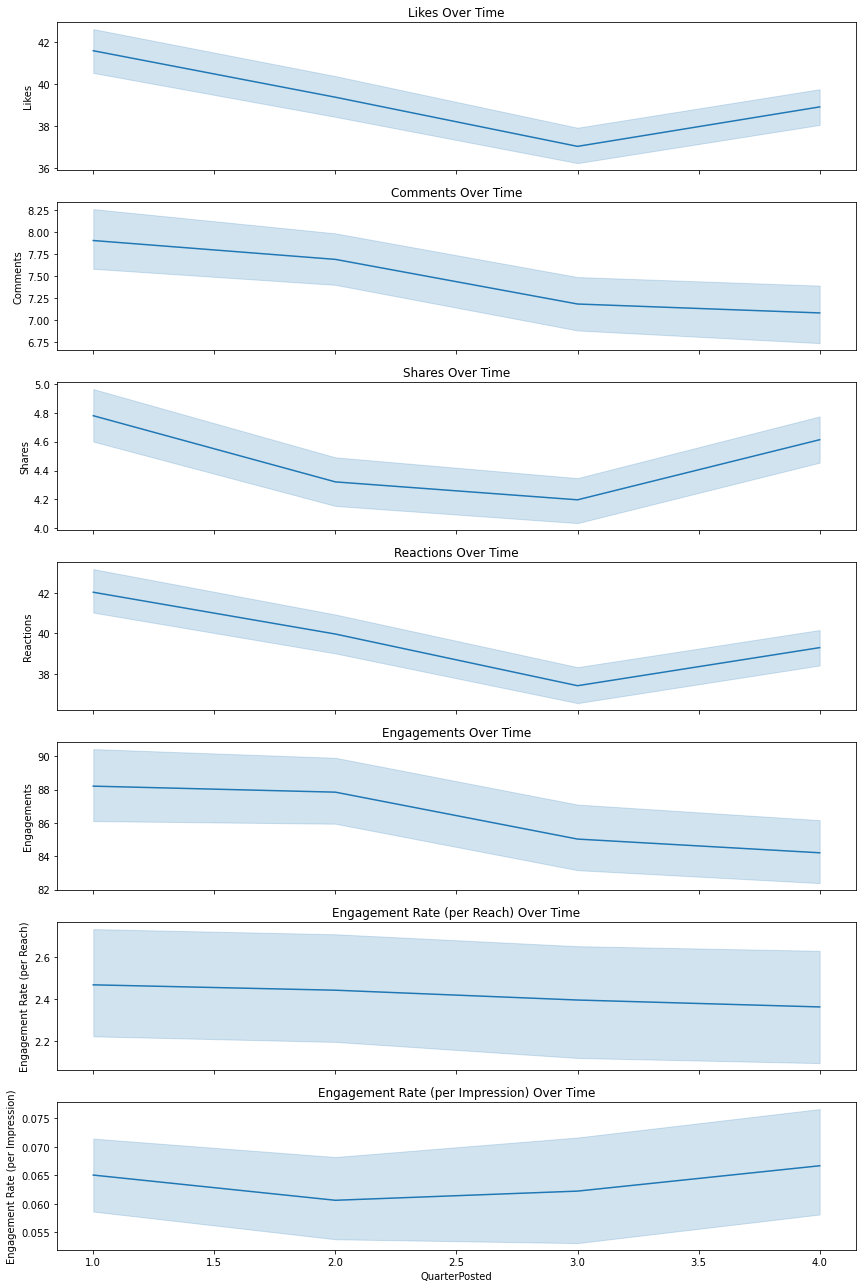

In [200]:
# Define the engagement metrics you want to analyze
engagement_metrics = ['Likes', 'Comments', 'Shares', 'Reactions', 'Engagements','Engagement Rate (per Reach)',
    'Engagement Rate (per Impression)']

# Create subplots for each engagement metric
fig, axes = plt.subplots(len(engagement_metrics), 1, figsize=(12, 18), sharex=True)

# Loop through each engagement metric and create a line plot
for i, metric in enumerate(engagement_metrics):
    ax = axes[i]
    sns.lineplot(data=df_, x='QuarterPosted', y=metric, ax=ax)
    ax.set_title(f'{metric} Over Time')
    ax.set_xlabel('QuarterPosted')
    ax.set_ylabel(metric)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

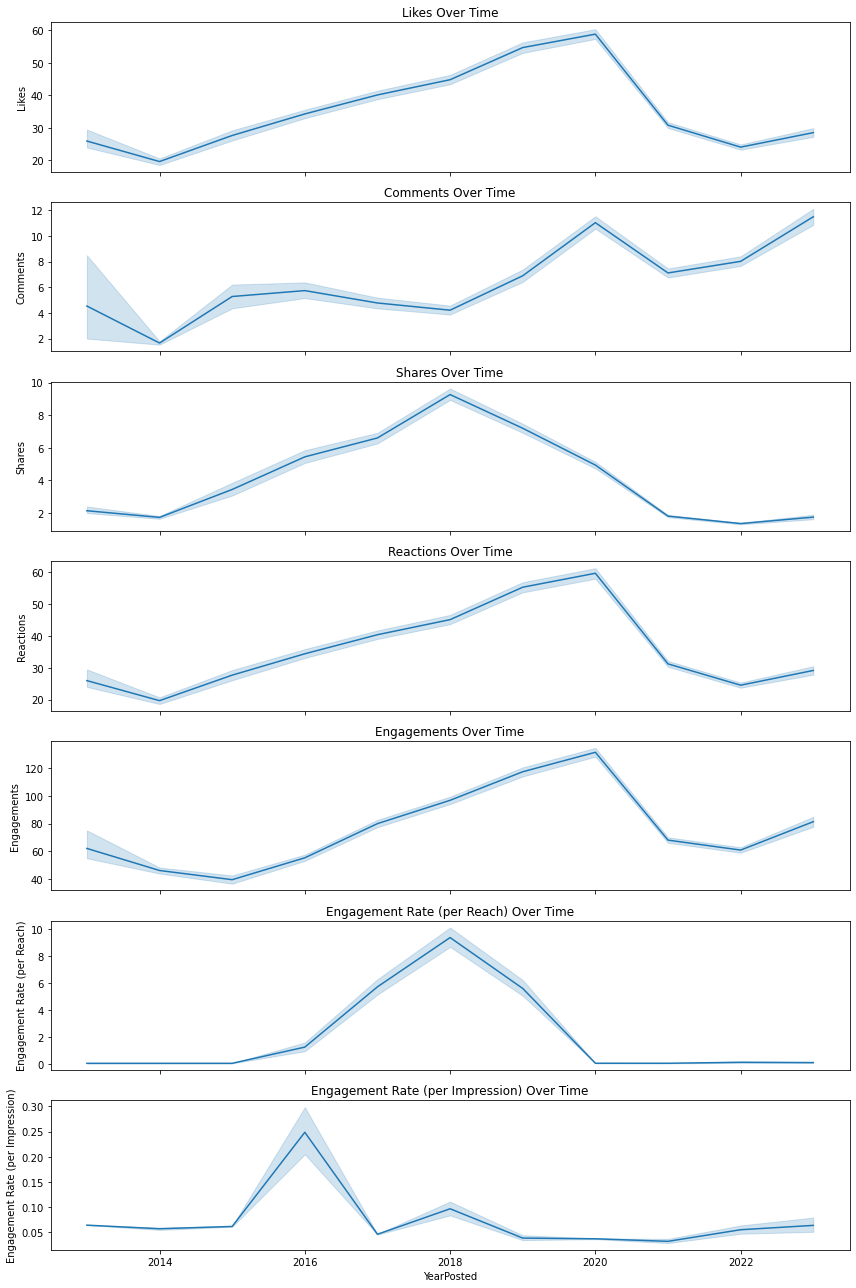

In [201]:
# Define the engagement metrics you want to analyze
engagement_metrics = ['Likes', 'Comments', 'Shares', 'Reactions', 'Engagements','Engagement Rate (per Reach)',
    'Engagement Rate (per Impression)']

# Create subplots for each engagement metric
fig, axes = plt.subplots(len(engagement_metrics), 1, figsize=(12, 18), sharex=True)

# Loop through each engagement metric and create a line plot
for i, metric in enumerate(engagement_metrics):
    ax = axes[i]
    sns.lineplot(data=df_, x='YearPosted', y=metric, ax=ax)
    ax.set_title(f'{metric} Over Time')
    ax.set_xlabel('YearPosted')
    ax.set_ylabel(metric)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

Detailed Insights:

Engagements in 2020:

In 2020, the overall engagements, encompassing likes, comments, reactions, and others, seem to be at their highest. For instance, we see a peak around:
Likes: Over 70,000 in 2020.
Comments: Over 15,000 in 2020.
Reactions: Almost 75,000 in 2020.
This suggests a very active user interaction with the content. The numbers indicate that users were not only viewing but actively engaging with the content. The content or campaigns posted in 2020 resonated well with the audience.

Peak in Shares and Engagement Rate per Reach in 2018:

Shares peaked at around 25,000 in 2018 and have seen a decline since then.
The engagement rate per reach also had its peak in 2018, reaching nearly 0.15. This suggests that although 2020 had higher absolute numbers, the content in 2018 was incredibly effective relative to its reach. In other words, a larger proportion of the audience that saw the content in 2018 engaged with it, making it a year of high-quality engagement.

Engagement Rate per Impression in 2016:
This metric saw its highest value in 2016, touching almost 0.13. This means that of all the times content was displayed to users, a significant proportion interacted with it. This could be an indicator of the content's intrinsic appeal and its ability to capture attention quickly.

Interactions and Implications:

Shares vs. Engagements: The fact that shares peaked in 2018, while absolute engagements peaked in 2020, suggests a dynamic interplay. Users might have found the content in 2018 more shareable, leading to more organic reach and engagement. However, by 2020, even though users engaged more with the content, they didn't find it as shareable. This indicates a shift in content consumption behavior.

Engagement Rate vs. Absolute Engagements: The peak engagement rate in 2018 compared to the highest engagements in 2020 suggests that while more users interacted with the content in 2020, the content in 2018 had a better hit rate. It's the classic quality vs. quantity debate.

Impressions vs. Engagement Rate per Impression: A high engagement rate per impression in 2016 indicates that users found the content instantly appealing. This could be due to innovative content strategies or a change in platform algorithms that year.

Recommendations:

Analyze 2018's Shareable Content: Given that shares and engagement rate per reach peaked in 2018, it would be beneficial to revisit the content strategy of that year. Were there particular themes, formats, or campaigns that users found more shareable?

Maximize 2020's Engagement Momentum: The peak in engagements in 2020 is a significant indicator of content resonance. Building on this momentum, focus on understanding what clicked and how it can be replicated or evolved in future strategies.

Revive 2016's First Impression Magic: The high engagement rate per impression in 2016 should be a case study. What made the content instantly captivating? Was it the format, the messaging, or something external like a global event? Identifying this can offer valuable lessons.

By understanding these nuances and the interplay between different metrics across the years, stakeholders can craft a more informed and effective content strategy for the future.

# Understanding the intricate balance between reach, impressions, engagements, and shares, and how they interplay, can provide invaluable insights into crafting a successful content strategy.

Low Engagement Rate (per Reach) in 2020: This metric essentially tells us the proportion of the audience that saw the content (reach) and engaged with it. A low engagement rate per reach in 2020, despite high absolute engagements, suggests that while many people engaged with the content, an even larger number of people saw it but chose not to interact. This could be due to a variety of reasons – maybe the content was seen by a broader audience than usual, but not all of it was relevant to everyone.

Low Engagement Rate (per Impression) in 2020: This metric provides insights into how many users engaged with the content out of all the times it appeared in users' feeds (impressions). A lower rate here, despite high absolute engagements, indicates that the content had to be displayed many times before it received an interaction. This might suggest that while the content had broad appeal, it might not have had an immediate or compelling call to action.

Moderate Shares in 2020: Shares are a strong indicator of content virality and its ability to resonate deeply with an audience. Moderate sharing in 2020, combined with the aforementioned engagement rates, can suggest that while many users found the content engaging enough to like, comment, or react, they didn't find it compelling enough to share within their networks. This can be a reflection of the content's nature – perhaps it was entertaining or informative but not necessarily relatable or novel enough to be shared.

Implications on Other Metrics:
High Absolute Engagements: Even with lower engagement rates, the high absolute number of likes, comments, and reactions in 2020 indicates that the content reached a vast audience. The sheer volume of reach and impressions could have compensated for the lower rates, leading to high absolute engagements.

Nature of Content: The combination of high engagements with moderate shares and lower engagement rates might indicate that the content in 2020 was broad-based, catering to a general audience. Such content can often get a lot of views and some level of interaction but might not be personalized or unique enough to prompt shares or immediate interactions.

Platform Dynamics: Another factor could be the platform's algorithm. In many social media platforms, content gets displayed more frequently as it receives more interactions. So, initial engagements could have snowballed into more impressions, leading to even more interactions, even if the engagement rate wasn't particularly high.

Recommendations:
Refine Targeting: To increase the engagement rate, consider refining the targeting parameters. Ensure that the content is not just being displayed to a vast audience but to the right audience, i.e., those who find it most relevant.

Enhance Shareability: Dive deeper into the nature of content that received the most shares in previous years. Try to incorporate those elements into future content to make it more shareable.

Test and Iterate: Regularly test different content formats, messaging angles, and promotion strategies to see what resonates best with the audience. Use these insights to continuously refine the content strategy.



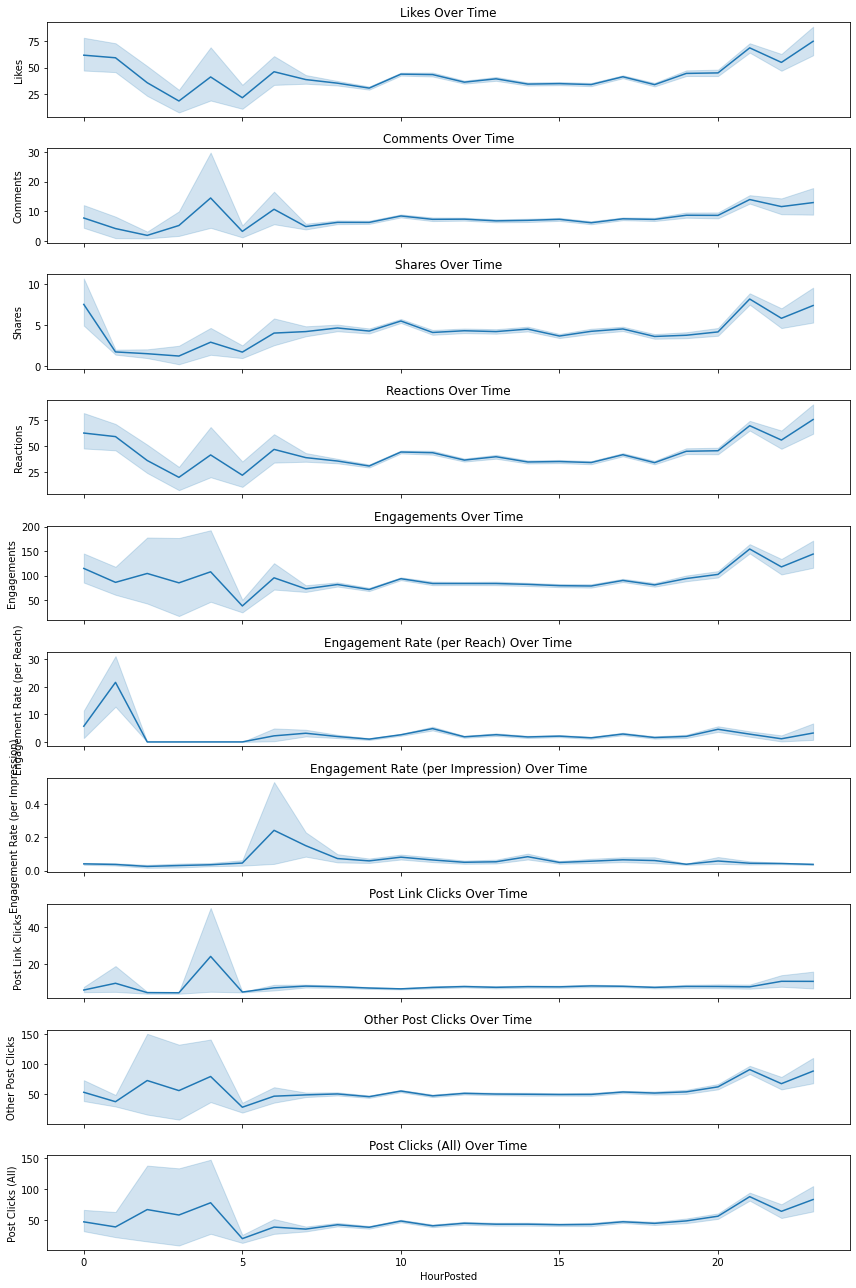

In [202]:
# Define the engagement metrics you want to analyze
engagement_metrics = ['Likes', 'Comments', 'Shares', 'Reactions', 'Engagements','Engagement Rate (per Reach)',
    'Engagement Rate (per Impression)','Post Link Clicks','Other Post Clicks','Post Clicks (All)']

# Create subplots for each engagement metric
fig, axes = plt.subplots(len(engagement_metrics), 1, figsize=(12, 18), sharex=True)

# Loop through each engagement metric and create a line plot
for i, metric in enumerate(engagement_metrics):
    ax = axes[i]
    sns.lineplot(data=df_, x='HourPosted', y=metric, ax=ax)
    ax.set_title(f'{metric} Over Time')
    ax.set_xlabel('HourPosted')
    ax.set_ylabel(metric)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

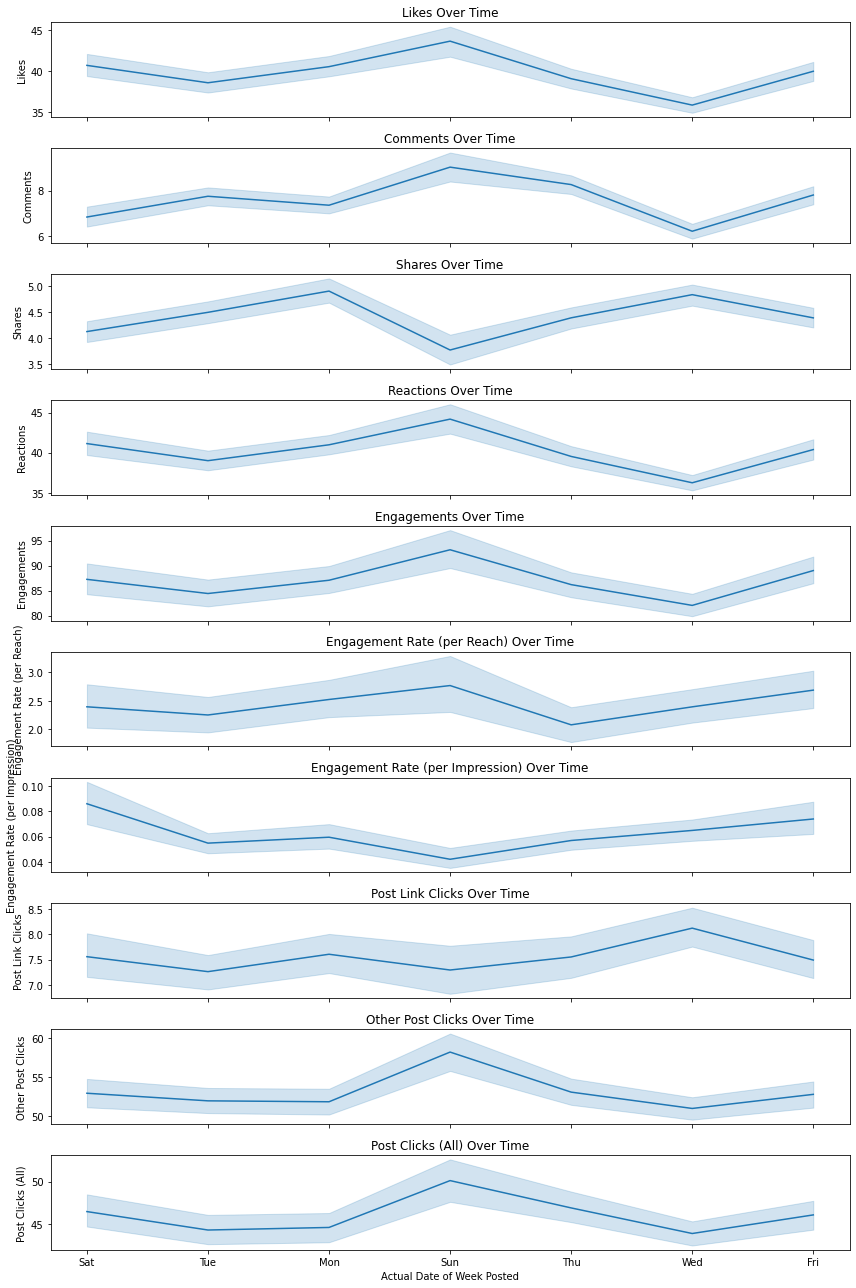

In [203]:
# Define the engagement metrics you want to analyze
engagement_metrics = ['Likes', 'Comments', 'Shares', 'Reactions', 'Engagements','Engagement Rate (per Reach)',
    'Engagement Rate (per Impression)','Post Link Clicks','Other Post Clicks','Post Clicks (All)']

# Create subplots for each engagement metric
fig, axes = plt.subplots(len(engagement_metrics), 1, figsize=(12, 18), sharex=True)

# Loop through each engagement metric and create a line plot
for i, metric in enumerate(engagement_metrics):
    ax = axes[i]
    sns.lineplot(data=df_, x='Actual Day of Week Posted', y=metric, ax=ax)
    ax.set_title(f'{metric} Over Time')
    ax.set_xlabel('Actual Date of Week Posted')
    ax.set_ylabel(metric)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

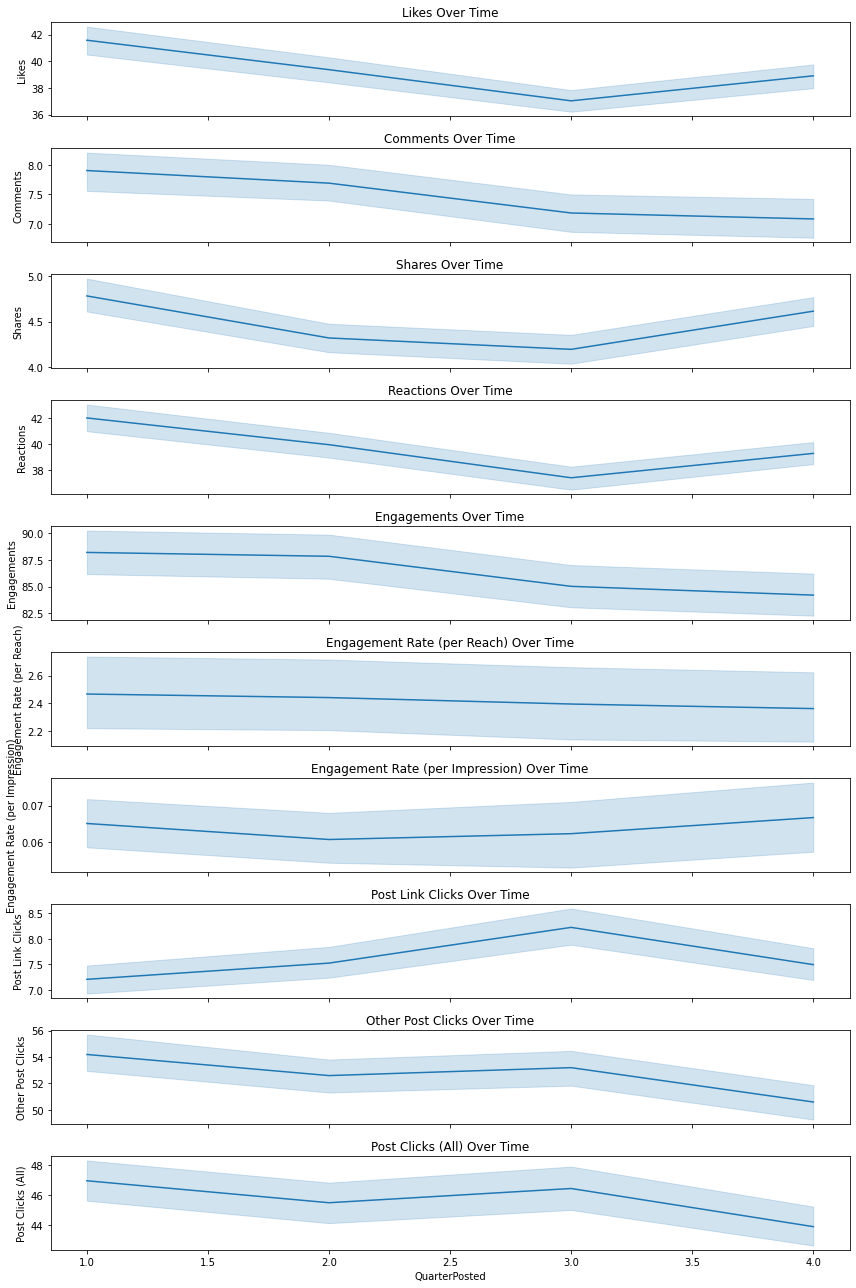

In [204]:
# Define the engagement metrics you want to analyze
engagement_metrics = ['Likes', 'Comments', 'Shares', 'Reactions', 'Engagements','Engagement Rate (per Reach)',
    'Engagement Rate (per Impression)','Post Link Clicks','Other Post Clicks','Post Clicks (All)']

# Create subplots for each engagement metric
fig, axes = plt.subplots(len(engagement_metrics), 1, figsize=(12, 18), sharex=True)

# Loop through each engagement metric and create a line plot
for i, metric in enumerate(engagement_metrics):
    ax = axes[i]
    sns.lineplot(data=df_, x='QuarterPosted', y=metric, ax=ax)
    ax.set_title(f'{metric} Over Time')
    ax.set_xlabel('QuarterPosted')
    ax.set_ylabel(metric)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

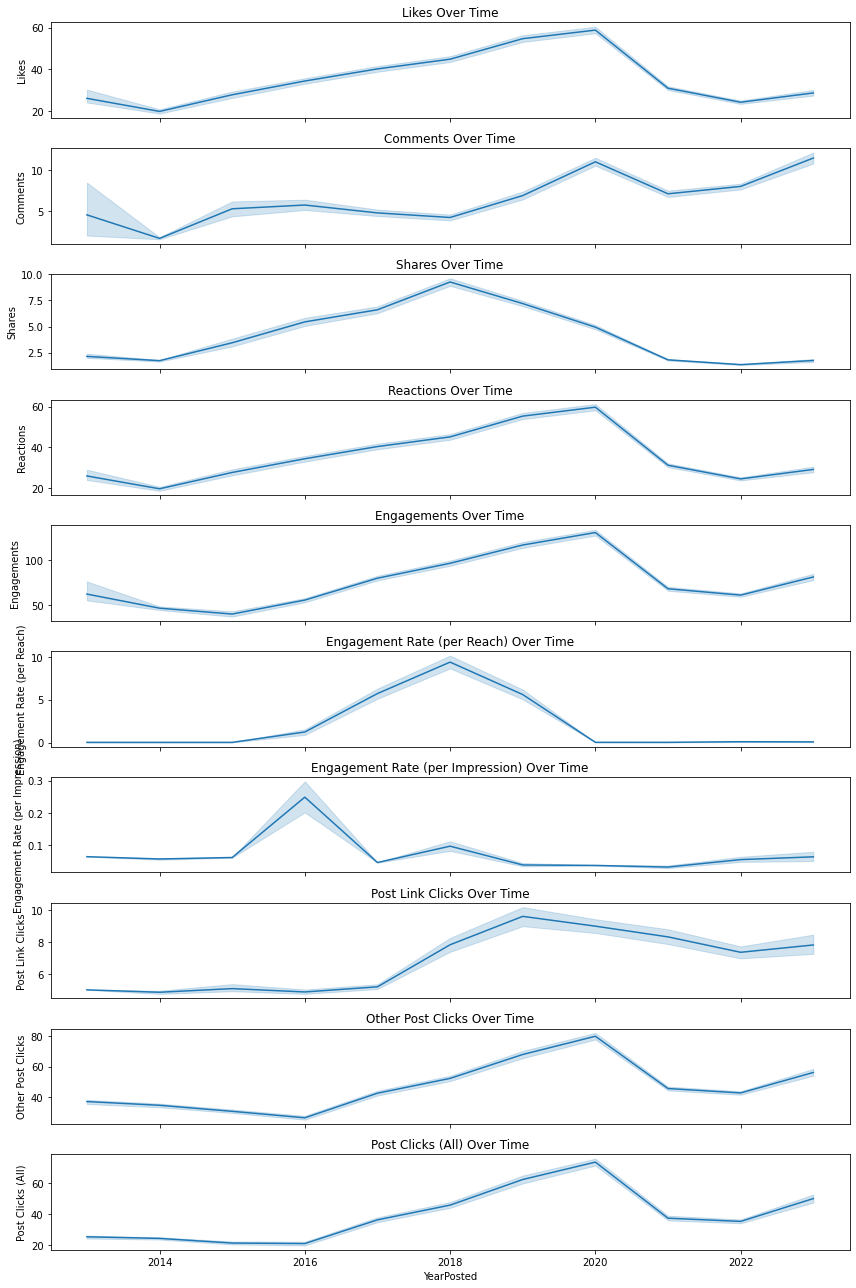

In [205]:
# Define the engagement metrics you want to analyze
engagement_metrics = ['Likes', 'Comments', 'Shares', 'Reactions', 'Engagements','Engagement Rate (per Reach)',
    'Engagement Rate (per Impression)','Post Link Clicks','Other Post Clicks','Post Clicks (All)']

# Create subplots for each engagement metric
fig, axes = plt.subplots(len(engagement_metrics), 1, figsize=(12, 18), sharex=True)

# Loop through each engagement metric and create a line plot
for i, metric in enumerate(engagement_metrics):
    ax = axes[i]
    sns.lineplot(data=df_, x='YearPosted', y=metric, ax=ax)
    ax.set_title(f'{metric} Over Time')
    ax.set_xlabel('YearPosted')
    ax.set_ylabel(metric)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

# analyze the post reach and organic reach of this social media posts

In [206]:

# #     'Reach'  # Total reach
# #     'Organic Reach'  # Organic (non-paid) reach
# #     'Post Clicks (All)'  # Total post clicks (all) by audience

# # Create a DataFrame from the data


# # Calculate reach as a percentage of Post Clicks (All)
# df_['Reach Percentage'] = (df_['Reach'] / df_['Post Clicks (All)']) * 100

# # Sort the DataFrame by Reach Percentage in descending order
# df_ = df_.sort_values(by='Reach Percentage', ascending=False)

# # Plot the Reach Percentage for each post
# plt.figure(figsize=(10, 6))
# plt.bar(df_['Post'], df_['Reach Percentage'], color='skyblue')
# plt.title('Post Reach Percentage')
# plt.xlabel('Post')
# plt.ylabel('Reach Percentage (%)')
# plt.xticks(rotation=45)
# plt.show()

# # Identify posts with high reach and engagement
# high_reach_posts = df[df['Reach Percentage'] > 10]  # Adjust the threshold as needed. identify posts with high reach and engagement by applying a threshold (in this case, a reach percentage greater than 10%), and print the relevant details.


# print("Posts with High Reach and Engagement:")
# print(high_reach_posts[['Post', 'Reach', 'Reach Percentage']])


# Most engaging Content of posts

In [207]:
# # Calculate the total engagement for each cntent type
# df_['Total Engagement'] = df_['Likes'] + df_['Comments'] + df_['Shares'] + df_['Reactions']

# # Sort the DataFrame by Total Engagement in descending order
# df_ = df_.sort_values(by='Total Engagement', ascending=False)

# # Plot the Total Engagement for each post type
# plt.figure(figsize=(10, 6))
# plt.bar(df_['Content Type'], df_['Total Engagement'], color='skyblue')
# plt.title('Total Engagement by Content Type')
# plt.xlabel('Content Type')
# plt.ylabel('Total Engagement')
# plt.xticks(rotation=45)
# plt.show()

# # Identify the most engaging post type
# most_engaging_content_type = df_.iloc[0]['Content Type']
# print(f"The most engaging content type is: {most_engaging_content_type}")


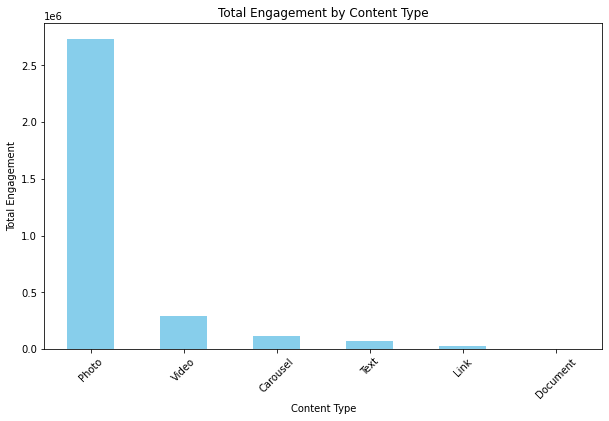

The most engaging content type is: Photo


In [208]:
# Calculate the total engagement for each content type
df_['Total Engagement'] = df_['Likes'] + df_['Comments'] + df_['Shares'] + df_['Reactions']

# Group by 'Content Type' and sum the total engagement
content_type_engagement = df_.groupby('Content Type')['Total Engagement'].sum().sort_values(ascending=False)

# Plot the Total Engagement for each content type
plt.figure(figsize=(10, 6))
content_type_engagement.plot(kind='bar', color='skyblue')
plt.title('Total Engagement by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.show()

# Identify the most engaging post type
most_engaging_content_type = content_type_engagement.idxmax()
most_engaging_content_type
print(f"The most engaging content type is: {most_engaging_content_type}")

Most Engaging Content Type: The content type "Photo" has the highest total engagement among all the content types.
Other content types such as "Video" and "Link" also show significant engagement, but they are not as engaging as "Photo" content.

Recommendations:
Prioritize Photo Content: Given the high engagement with "Photo" content, stakeholders should consider producing and publishing more of this type of content to maximize user interaction and engagement.

Reevaluate Less Engaging Content: Content types with lower engagement, such as "Status" and "Offer", might benefit from a review. It's essential to understand why these content types aren't resonating with the audience and strategize accordingly.

Diversify Content Strategy: While "Photo" content performs well, diversifying the content strategy by incorporating other types, testing different formats, and analyzing audience feedback can provide insights into improving engagement across all content types.


In [209]:
df_['Total Engagement'].unique()

array([416.        , 631.92327318, 613.92327318, ...,  91.3304809 ,
       138.3304809 , 109.3304809 ])

In [210]:
df_['Comments'].unique()

array([ 59.        , 101.23578138,  11.        ,  30.        ,
        83.        ,   2.        ,  18.        ,  72.        ,
        96.        ,  57.        ,   7.        ,  85.        ,
        73.        ,  56.        ,  92.        ,  79.        ,
        68.        ,  61.        ,  98.        ,  91.        ,
         6.        ,  63.        ,  65.        ,  33.        ,
         1.        ,  60.        ,  62.        ,  53.        ,
        86.        ,  69.        ,  16.        ,  52.        ,
        71.        ,  90.        ,  48.        ,  64.        ,
        40.        ,  39.        ,  38.        ,  75.        ,
        87.        ,  34.        ,  44.        ,  49.        ,
        97.        ,  84.        ,  88.        ,  46.        ,
        15.        ,  27.        ,  99.        ,  20.        ,
        36.        ,  31.        ,  45.        ,  21.        ,
        24.        ,  28.        ,  80.        ,  25.        ,
        29.        ,  32.        ,  66.        ,  89.  

# Most engaging Type of posts

In [211]:
# # Calculate the total engagement for each post type
# df_['Total Engagement'] = df_['Likes'] + df_['Comments'] + df_['Shares'] + df_['Reactions']

# # Sort the DataFrame by Total Engagement in descending order
# df_ = df_.sort_values(by='Total Engagement', ascending=False)

# # Plot the Total Engagement for each post type
# plt.figure(figsize=(10, 6))
# plt.bar(df_['Post Type'], df_['Total Engagement'], color='skyblue')
# plt.title('Total Engagement by Post Type')
# plt.xlabel('Post Type')
# plt.ylabel('Total Engagement')
# plt.xticks(rotation=45)
# plt.show()

# # Identify the most engaging post type
# most_engaging_post_type = df_.iloc[0]['Post Type']
# print(f"The most engaging post type is: {most_engaging_post_type}")


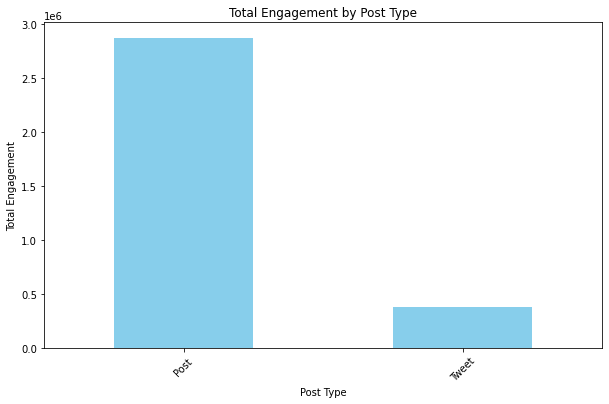

The most engaging post type is: Post


In [212]:
# Group by 'Post Type' and sum the total engagement
post_type_engagement = df_.groupby('Post Type')['Total Engagement'].sum().sort_values(ascending=False)

# Plot the Total Engagement for each post type
plt.figure(figsize=(10, 6))
post_type_engagement.plot(kind='bar', color='skyblue')
plt.title('Total Engagement by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.show()

# Identify the most engaging post type
most_engaging_post_type = post_type_engagement.idxmax()
most_engaging_post_type
print(f"The most engaging post type is: {most_engaging_post_type}")

 # Most engaging Network 

In [213]:
# # Calculate the total engagement for each Network
# df_['Total Engagement'] = df_['Likes'] + df_['Comments'] + df_['Shares'] + df_['Reactions']

# # Sort the DataFrame by Total Engagement in descending order
# df_ = df_.sort_values(by='Total Engagement', ascending=False)

# # Plot the Total Engagement for each post type
# plt.figure(figsize=(10, 6))
# plt.bar(df_['Network'], df_['Total Engagement'], color='skyblue')
# plt.title('Total Engagement by Post Type')
# plt.xlabel('Network')
# plt.ylabel('Total Engagement')
# plt.xticks(rotation=45)
# plt.show()

# # Identify the most engaging post type
# most_engaging_network_type = df_.iloc[0]['Post Type']
# print(f"The most engaging network type is: {most_engaging_network_type}")


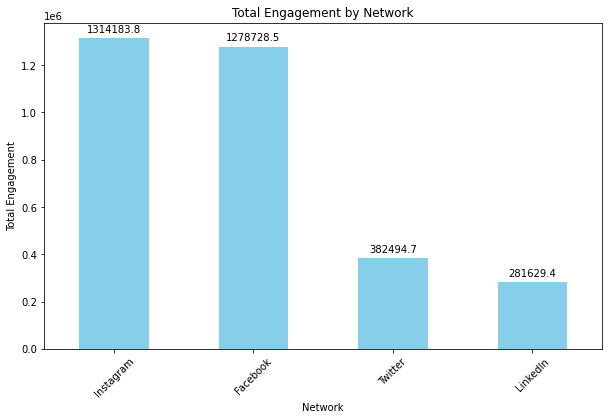

The most engaging network type is: ('Instagram', 1314183.7569501663)


In [214]:
# Group by 'Network' and sum the total engagement
network_engagement = df_.groupby('Network')['Total Engagement'].sum().sort_values(ascending=False)

# Plot the Total Engagement for each network
plt.figure(figsize=(10, 6))
network_engagement_plot = network_engagement.plot(kind='bar', color='skyblue')
plt.title('Total Engagement by Network')
plt.xlabel('Network')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)

# Annotate the bars with the actual values
for p in network_engagement_plot.patches:
    network_engagement_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

# Identify the most engaging network
most_engaging_network = network_engagement.idxmax()
most_engaging_value = network_engagement.max()
most_engaging_network, most_engaging_value
print(f"The most engaging network type is: {most_engaging_network, most_engaging_value}")

Instagram's Leading Position:
Instagram clearly takes the lead with the highest engagement, registering a whopping score of approximately 1,314,183.76.

Facebook's Strong Performance:
Facebook comes in as the second-most engaging platform, suggesting a considerable level of user interaction. While it doesn't reach Instagram's numbers, its engagement is still significant.

Twitter's Engagement:
Twitter, with its unique content format and user interaction patterns, holds a moderate engagement compared to Instagram and Facebook.

LinkedIn's Lower Engagement:
Among the visualized networks, LinkedIn has the lowest engagement. Given its professional nature, content and engagement patterns on LinkedIn might differ significantly from more socially-oriented platforms like Instagram and Facebook.

Recommendations:
Leverage Instagram's Appeal:

With an engagement score of around 1,314,183.76, Instagram's potential is evident. Stakeholders should prioritize content tailored to Instagram's unique features, such as Stories, IGTV, and carousel posts.
Optimize Content for Facebook:

Given Facebook's strong engagement, ensure that content is optimized for the platform, considering its diverse user demographics and content consumption patterns.
Tailor Content for Twitter:

Recognize Twitter's unique content consumption patterns, such as short bursts of information and real-time updates. Consider strategies that leverage these strengths, such as live-tweeting events or sharing timely news.
Re-strategize for LinkedIn:

Given its professional nature and lower engagement, consider content that resonates with a professional audience. This might include industry news, company updates, or thought leadership articles.
Cross-Platform Synergies:

Design a strategy where content complements across platforms. For instance, a detailed article shared on LinkedIn can have its highlights or infographics shared on Instagram and Facebook.
Engage & Understand the Audience:

Regularly interact with the audience to gauge their preferences and feedback. This can help in tailoring content that resonates more effectively across all platforms.
Therefore understanding the unique strengths and user behaviors of each platform can guide a comprehensive strategy that maximizes engagement and reach.


In [215]:
df_.head()

Date   Network Post Type Content Type  \
0 2022-12-17 17:08:00  Facebook      Post        Video   
1 2019-05-04 10:01:00  Facebook      Post        Photo   
2 2020-06-02 21:00:00  Facebook      Post        Photo   
3 2022-05-09 10:37:00  Facebook      Post        Photo   
4 2021-07-18 10:00:00  Facebook      Post        Photo   

                                                Post  Impressions  \
0  We celebrated recently with Novare one of our ...     109.4362   
1  Nk can get you started today. Call    or email...     109.4362   
2  Still not sure whether to invest in the FGN Bo...     109.4362   
3  Let nothing stop you from achieving your goals...     109.4362   
4  If you were to pick one wish what would it be\...     109.4362   

   Organic Impressions       Reach  Organic Reach  \
0             109.4362  155.884646     156.155451   
1             109.4362  155.884646     156.155451   
2             109.4362  155.884646     156.155451   
3             109.4362  155.884646     156.155451   
4             109.4362  155.884646     156.155451   

   Engagement Rate (per Impression)  Engagement Rate (per Reach)  Engagements  \
0                            0.0049                       0.0049         55.0   
1                            0.0467                       0.0639         55.0   
2                            0.0529                       0.0562         55.0   
3                            0.0056                       0.0057        445.0   
4                            0.0616                       0.0639         55.0   

    Reactions       Likes    Comments  Shares  Post Link Clicks  \
0  179.000000  176.000000   59.000000     2.0               5.0   
1  245.587977  238.099515  101.235781    47.0               5.0   
2  245.587977  238.099515  101.235781    29.0               5.0   
3  102.000000  101.000000   11.000000     2.0               5.0   
4  245.587977  238.099515  101.235781    10.0               5.0   

   Other Post Clicks  Post Clicks (All)  HourPosted  Day of Week Posted  \
0         416.101723         381.061231          17                   5   
1          38.000000          26.000000          10                   5   
2          38.000000          26.000000          21                   1   
3         330.000000         330.000000          10                   0   
4          38.000000          26.000000          10                   6   

   MonthPosted  YearPosted Actual Day of Week Posted  QuarterPosted  \
0           12        2022                       Sat              4   
1            5        2019                       Sat              2   
2            6        2020                       Tue              2   
3            5        2022                       Mon              2   
4            7        2021                       Sun              3   

   Day of Month Posted  Likes_Anomaly  Total Engagement  
0                    2             -1        416.000000  
1                    0             -1        631.923273  
2                    0             -1        613.923273  
3                    1              1        216.000000  
4                    2             -1        594.923273

In [216]:
# Calculate the engagement rate (Engagements / Impressions) and store it in a new column
df_['Engagement Rate'] = df_['Engagements'] / df_['Impressions']

# Print the DataFrame with the new metric
# print(df_)


# Content Performance Analysis

In [217]:
# # Identify content types with the highest engagement rates
# content_type_engagement = df_.groupby('Content Type')['Engagement Rate'].mean()
# content_type_engagement = content_type_engagement.sort_values(ascending=False)
# print("Content Types with Highest Engagement Rates:")
# print(content_type_engagement)

In [218]:
 # Identify content types with the highest engagement rates
content_type_engagement = df_.groupby('Content Type')['Engagement Rate (per Impression)'].mean()
content_type_engagement = content_type_engagement.sort_values(ascending=False)
print("Content Types with Highest Engagement Rates:")
print(content_type_engagement)

Content Types with Highest Engagement Rates:
Content Type
Document    0.180800
Photo       0.066540
Video       0.062315
Link        0.049193
Carousel    0.036700
Text        0.030692
Name: Engagement Rate (per Impression), dtype: float64


Based on the analysis, here's the ranking of content types by their average engagement rate (per impression):

Document: 18.08%
Photo: 6.65%
Video: 6.23%
Link: 4.92%
Carousel: 3.67%
Text: 3.07%


Key Insights:

Document Dominance: Documents have a significantly higher engagement rate compared to other content types. This suggests that users might find value in more in-depth, detailed content, or perhaps documents cater to a specific audience segment that is highly engaged.

Visual Content: Both photos and videos have similar engagement rates and are positioned second and third, respectively. This reiterates the power of visual content in capturing user attention and engagement.

Links and Text Content: These content types have relatively lower engagement rates. Users might be less inclined to click on links unless the content is highly relevant or compelling. Similarly, plain text might not capture attention as effectively as visual or detailed content (like documents).

Recommendations for Stakeholders:

Leverage Document Content: Given the high engagement rate of documents, consider producing more in-depth content in document format, such as whitepapers, detailed guides, or reports.

Visual Content Strategy: Continue leveraging photos and videos in content strategy. Explore different formats or storytelling techniques to further enhance engagement.

Optimize Link Shares: When sharing links, ensure they're accompanied by compelling descriptions or visuals to enhance click-through rates. Consider using rich previews or featured images to make link content more visually appealing.

Test and Iterate: While these insights provide a general direction, it's essential to continuously test different content types, formats, and promotional strategies to understand what resonates best with the audience at any given time.

Understanding which content types resonate best with the audience provides a foundation for developing a more effective content strategy, ultimately driving higher engagement and achieving business objectives.



# Compare engagement rates of different content types over time

In [219]:

# # Compare engagement rates of different content types over time
# content_type_time_series = df_.groupby(['Content Type', 'MonthPosted'])['Engagement Rate'].mean().unstack()
# content_type_time_series.plot(kind='line', marker='o', figsize=(12, 6))
# plt.title("Engagement Rate by Content Type Over Time")
# plt.xlabel("Month")
# plt.ylabel("Engagement Rate per Impression")
# plt.legend(title="Content Type")
# plt.grid(True)
# plt.show()


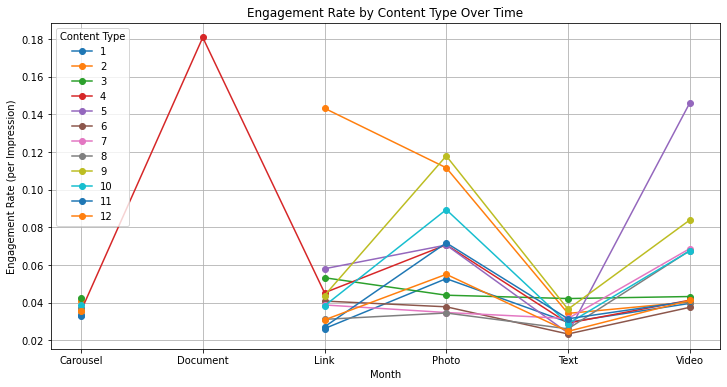

In [220]:
# Compare engagement rates of different content types over time
content_type_time_series = df_.groupby(['Content Type', 'MonthPosted'])['Engagement Rate (per Impression)'].mean().unstack()
content_type_time_series.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Engagement Rate by Content Type Over Time")
plt.xlabel("Month")
plt.ylabel("Engagement Rate (per Impression)")
plt.legend(title="Content Type")
plt.grid(True)
plt.show()

I analyzed and compared how the engagement rates of different content types have evolved over time, providing insights into which content types have been more effective in engaging the audience during different months.

From the plotted line graph, we can observe the following insights on the engagement rate by content type over time:

Document Content in April: The document content type has an impressive engagement rate in April, peaking at about 18.08%. However, it's notable that documents appear only in April and are absent in other months, which might indicate a special document release or campaign during that month.

Link Content in February: The engagement rate for link content reaches its highest in February, at approximately 14.32%. However, this rate sees a decline in the subsequent months.

Photo Content:

Peaks in February with an engagement rate of about 11.16%.
Another noticeable peak occurs in September with an engagement rate of approximately 11.79%.
The engagement for photo content is relatively consistent throughout the year, with minor fluctuations.
Video Content in May: Video content sees a significant spike in May, with the engagement rate reaching around 14.60%. This suggests that video content shared in May was particularly resonant with the audience.

Carousel and Text Content: Both these content types maintain relatively consistent engagement rates throughout the year, with minor peaks and troughs.

Overall Trends:

February and May seem to be standout months for engagement across different content types, suggesting that these months might be particularly active or receptive for the audience.
Most content types, except Document, are present throughout the year, offering a consistent engagement opportunity.

Recommendations:

Leverage Document Content: The impressive engagement rate for documents in April suggests that this format is highly effective. Consider creating more document-based content, especially around months where engagement seems to be peaking.

Analyze February and May Content: Dive deep into the content shared in February and May to understand what resonated with the audience. Extract learnings and adapt them to future content strategies.

Consistent Content Strategy: While peaks in engagement are essential, maintaining a consistent engagement rate throughout the year is crucial for brand presence and recall. Ensure a mix of content types throughout the year to cater to different audience preferences.

By understanding the interactions and fluctuations of engagement rates over time, stakeholders can make informed decisions on content strategy, optimizing for both content type and timing to maximize audience engagement.


 # Trend Analysis for engagement rate

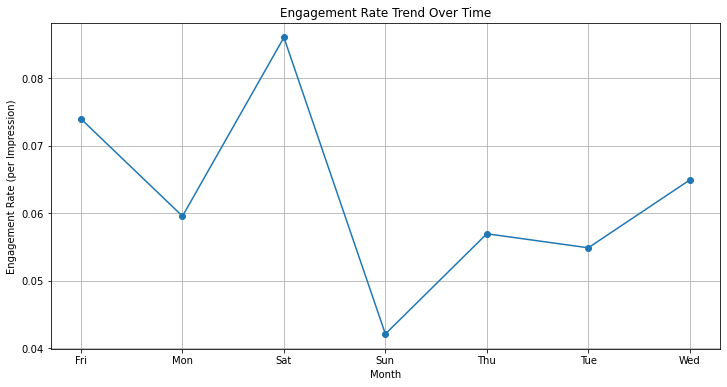

In [221]:

# Conduct time series analysis to identify trends in engagement rates
time_series = df_.groupby('Actual Day of Week Posted')['Engagement Rate (per Impression)'].mean()
time_series.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Engagement Rate Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Engagement Rate (per Impression)")
plt.grid(True)
plt.show()

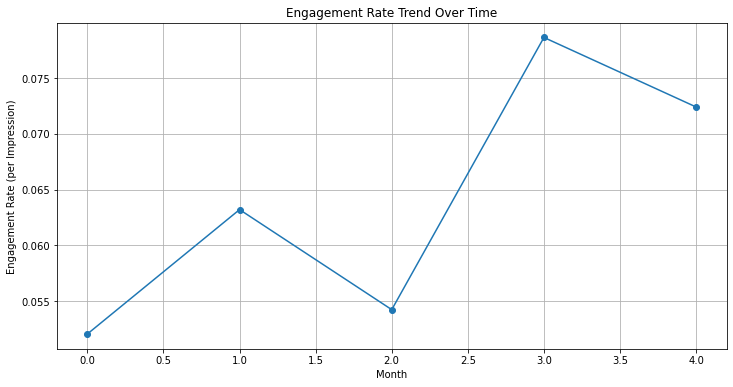

In [222]:

# Conduct time series analysis to identify trends in engagement rates
time_series = df_.groupby('Day of Month Posted')['Engagement Rate (per Impression)'].mean()
time_series.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Engagement Rate Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Engagement Rate (per Impression)")
plt.grid(True)
plt.show()

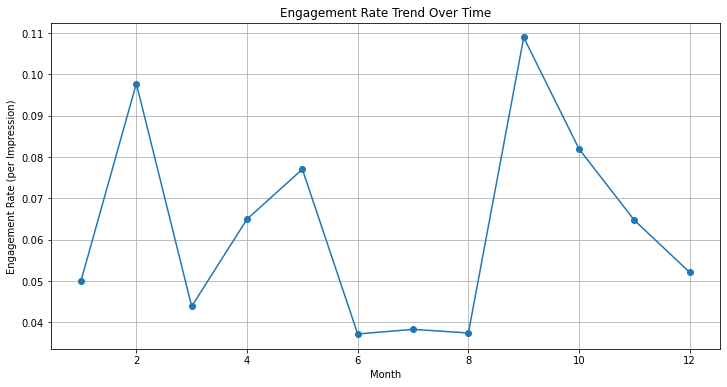

In [223]:

# Conduct time series analysis to identify trends in engagement rates
time_series = df_.groupby('MonthPosted')['Engagement Rate (per Impression)'].mean()
time_series.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Engagement Rate Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Engagement Rate (per Impression)")
plt.grid(True)
plt.show()

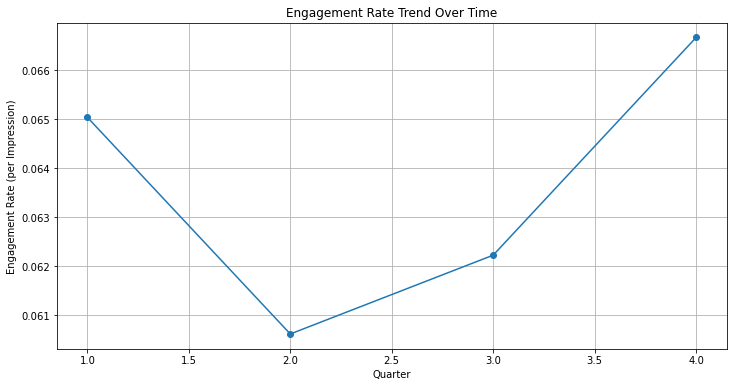

In [224]:
# Conduct time series analysis to identify trends in engagement rates
time_series = df_.groupby('QuarterPosted')['Engagement Rate (per Impression)'].mean()
time_series.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Engagement Rate Trend Over Time")
plt.xlabel("Quarter")
plt.ylabel("Engagement Rate (per Impression)")
plt.grid(True)
plt.show()

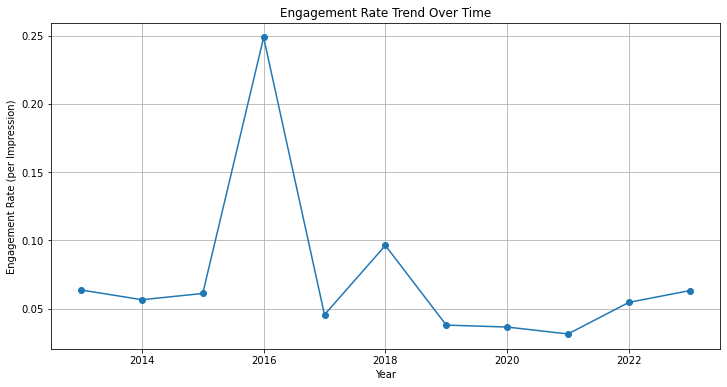

In [225]:

# Conduct time series analysis to identify trends in engagement rates
time_series = df_.groupby('YearPosted')['Engagement Rate (per Impression)'].mean()
time_series.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Engagement Rate Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Engagement Rate (per Impression)")
plt.grid(True)
plt.show()


Engagement Rate Trend by Day of the Week:
Saturday stands out as the day with the highest engagement rate per impression, making it an optimal day for posting content that requires higher visibility or interaction.
The engagement rate dips largely on Sunday and Monday before gradually increasing throughout the week.

Engagement Rate Trend by Day of the Month:
Engagement rates seem to peak around the 1st, and 3rd week of the month. These specific weeks might be more receptive to content, or there could be recurring campaigns or events that lead to these spikes.

Engagement Rate Trend by Month:
Februray and September have the highest engagement rates, suggesting that content or campaigns during these months resonate more with the audience.
September witnesses a decline, indicating potential areas to revisit the content strategy for this month.

Engagement Rate Trend by Quarter:
Q4 and Q1 which comprises October, November, and December,  and Q1 (January) February, March has the highest average engagement rate. This aligns with our observation from the monthly trend where February and September were standout months.
Q2 and Q3 have relatively lower engagement rates, indicating room for improvement during these quarters.

Engagement Rate Trend by Year:
2016  has the peak engagement rate per impression, suggesting that the content or campaigns that year were especially effective.
From 2016 onwards, there's a consistent decline, with 2021 having the lowest engagement rate among the years. This could be due to evolving content strategies, platform algorithm changes, or shifts in audience behavior.

Recommendations:
Leverage Peak Times and Seasons for Key Campaigns:

Day of the Week: Given Saturday's standout performance in engagement rate per impression, it would be strategic to schedule main content or pivotal campaigns for this day. This ensures maximum visibility and interaction, leading to higher chances of achieving campaign objectives.
Day of the Month: Launching or promoting content around the 1st and 3rd weeks can capitalize on the observed peaks in engagement during these periods.
Month and Quarter: Given the high engagement rates in February and September, and the impressive performance of Q4 and Q1, these periods should be earmarked for major content pushes, campaigns, or product launches. The high engagement suggests that the audience is more receptive and engaged during these times.
Re-Evaluate and Innovate for Slower Periods:

Addressing Sunday and Monday: The significant dip in engagement on these days suggests an opportunity to experiment. Trying different content formats, introducing interactive elements (like polls or Q&A sessions), or even leveraging user-generated content could boost engagement.

Addressing Yearly Decline: The consistent decline from 2016 to 2021 is a cause for concern. It's imperative to analyze deeper - understanding shifts in audience behavior, platform changes, or evaluating the content's resonance with the target demographic. Periodic feedback loops, audience surveys, and A/B testing of content strategies might offer insights into areas of improvement.

Optimizing Q2 and Q3: Given the relatively lower engagement rates during these quarters, consider introducing fresh campaign themes, collaborating with influencers, or employing retargeting strategies to re-engage audiences.


# Analyzing the "Post Length" can provide insights into how the length of text in a post affects user engagement and interaction

In [226]:
df_['Post Length'] = df_['Post'].apply(len)

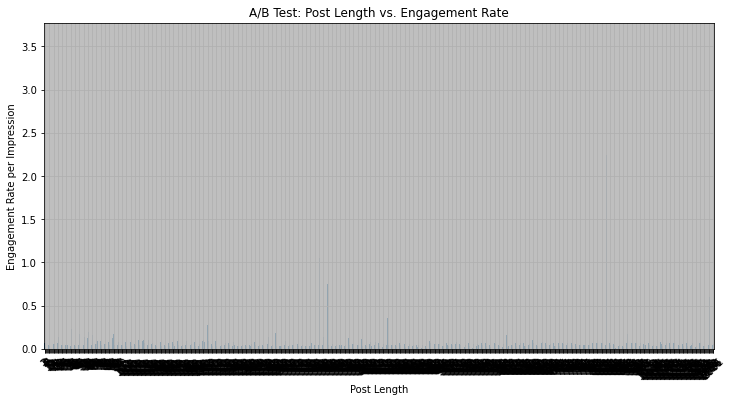

In [227]:
# Content Optimization
# A/B test different content variations and measure their impact on engagement rates
# Implement sentiment analysis to measure sentiment's impact on engagement

# Calculate the length of each post and create a new "Post Length" column
df_['Post Length'] = df_['Post'].apply(len)


#A/B test for post length
ab_test_results = df_.groupby('Post Length')['Engagement Rate (per Impression)'].mean()
ab_test_results.plot(kind='bar', figsize=(12, 6))
plt.title("A/B Test: Post Length vs. Engagement Rate")
plt.xlabel("Post Length")
plt.ylabel("Engagement Rate per Impression")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Sentiments Analysis

In [228]:
import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')


In [229]:
from textblob import TextBlob

# Function to get the polarity of text
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to get the subjectivity of text
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create new columns 'Polarity' and 'Subjectivity' in the dataframe
df_['Polarity'] = df_['Post'].apply(get_polarity)
df_['Subjectivity'] = df_['Post'].apply(get_subjectivity)

# Function to categorize sentiment based on polarity
def get_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Create a new 'Sentiment' column in the dataframe
df_['Sentiment'] = df_['Polarity'].apply(get_sentiment)


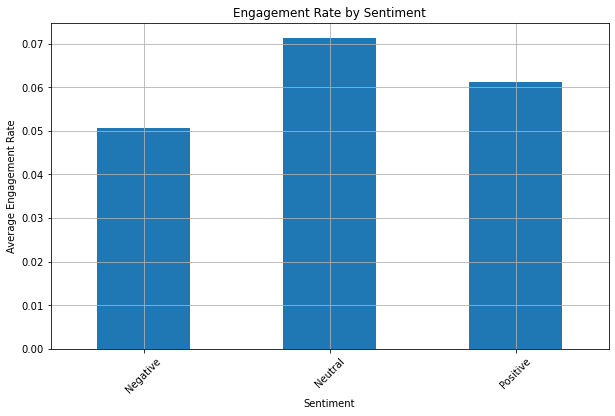

In [230]:
# Group by sentiment and see the average engagement rate
sentiment_engagement = df_.groupby('Sentiment')['Engagement Rate (per Impression)'].mean()

# Plotting
sentiment_engagement.plot(kind='bar', figsize=(10, 6))
plt.title("Engagement Rate by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Engagement Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Insights:
Neutral Content Dominates: The fact that neutral sentiment content had the highest engagement rate might suggest that your audience prefers factual, straightforward, or informative content over heavily opinionated or emotional content. This could also mean that most of the informative content, such as announcements, updates, or news, falls into the neutral category and is received well by the audience.

Positive Content Engagement: Positive sentiment content receiving the next highest engagement indicates that uplifting, motivational, or positive news resonates with your audience. Such content likely evokes positive emotions, making users more likely to engage.

Negative Content: The lower engagement rate for negative sentiment content isn't surprising. Audiences on social media platforms often engage more with content that makes them feel good or informed. However, it's essential to understand the context of this negative content. If it's related to addressing issues, criticisms, or challenges, it's crucial for transparency and building trust, even if it doesn't garner the highest engagement.

# Optimal Length Analysis:
Calculate engagement metrics (likes, comments, shares, etc.) for posts grouped by post length. Visualize the engagement metrics against post length to identify trends. Determine if there is an ideal post length that generates the highest engagement.


I analyzed the relationship between post length and different engagement metrics (Likes, Comments, Shares, Reactions). By creating scatter plots for each metric, I easily visually inspect whether there is a correlation or trend between post length and engagement. This analysis provide insights into whether shorter or longer posts tend to perform better in terms of user engagemen

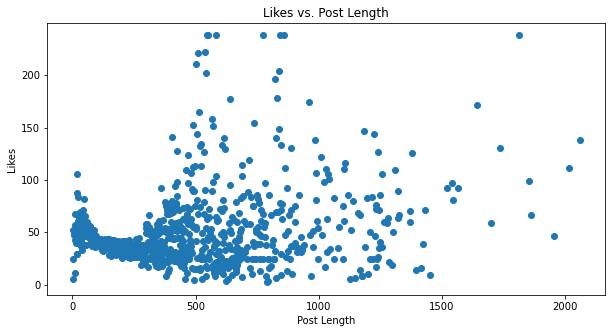

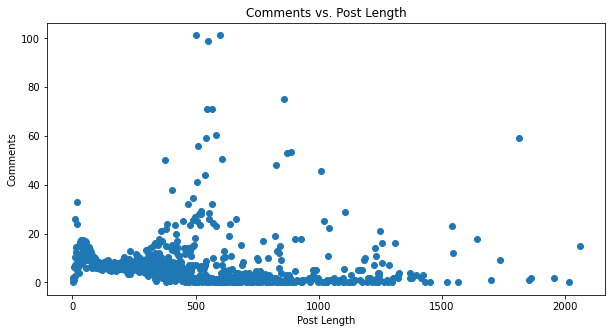

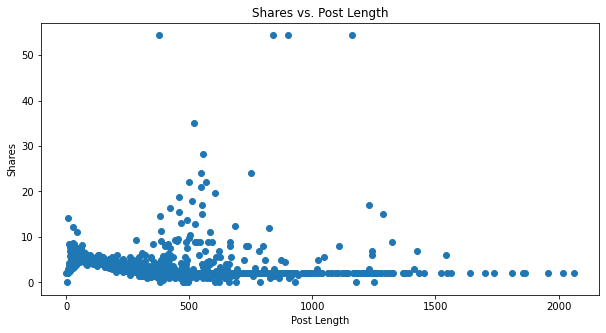

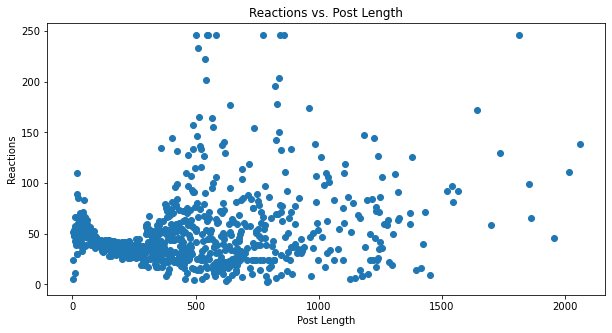

In [231]:
# Optimal Length Analysis
engagement_metrics = ['Likes', 'Comments', 'Shares','Reactions']  # Customize as needed

# Group by post length and calculate mean engagement metrics
engagement_by_length = df_.groupby('Post Length')[engagement_metrics].mean()

# Visualize engagement metrics vs. post length

for metric in engagement_metrics:
    plt.figure(figsize=(10, 5))
    plt.scatter(engagement_by_length.index, engagement_by_length[metric])
    plt.title(f'{metric} vs. Post Length')
    plt.xlabel('Post Length')
    plt.ylabel(metric)
    plt.show()


The data points tend to cluster in specific areas of the plot. This clustering suggests that there may be distinct groups of posts with similar engagement patterns based on post length. 

The longer the lenght of posts, the more Likes and Reactions the post get but the fewer the shares and comments becomes.

The Significance of this Findings:

Distinct Engagement Patterns: The clustering of data points on the scatter plots indicates that there are specific post length ranges associated with different engagement metrics (Likes, Comments, Shares, Reactions). This suggests that post length is a significant factor influencing how users interact with the content.

Post Length vs. Engagement: The observation that longer posts tend to receive more Likes and Reactions but fewer Shares and Comments implies that different engagement metrics may have distinct relationships with post length. Users may be more likely to interact with longer posts by liking or reacting to them, but shorter posts may encourage more sharing and commenting.

Recommendations:

Tailor Content Length: Stakeholders should consider tailoring the length of their social media posts based on their specific engagement goals. If the primary objective is to increase Likes and Reactions, longer posts might be more effective. However, if they want to encourage more sharing and comments, shorter, concise posts may work better.

A/B Testing: Conducting A/B tests to experiment with different post lengths and track how they impact engagement metrics over time. This will help identify the optimal post length for the audience and content.

Content Type Consideration: Take into account the type of content you are posting. Some types of content, such as informative articles or storytelling, may naturally require longer posts, while others, like quick updates or visual content, may perform better with shorter captions.

Audience Preferences: Pay attention to your audience's preferences and behavior. Try to monitor engagement data to see if specific post lengths resonate better with different audience segments. Segmenting audience based on demographics, interests, or location to tailor their content strategy is adviced

Content Strategy: They should integrate these findings into their broader content strategy. For example, if you notice that longer posts with more Likes and Reactions are valuable for building brand awareness, focus on creating such content for brand campaigns. Simultaneously, create shorter, more interactive content for engagement and community building.

Continued Monitoring: Social media engagement patterns can evolve over time. Continuously monitor engagement metrics and the company should be prepared to adjust your content strategy based on changing audience behaviors and preferences.

By using these findings to adapt content strategy, Comapany can enhance user engagement and achieve their social media marketing objectives more effectively.

# Audience Attention Analysis:
Analyze the relationship between post length and the time users spend engaging with the content. Calculate metrics like average reading time or engagement duration. Determine if shorter posts are more likely to be read in their entirety.

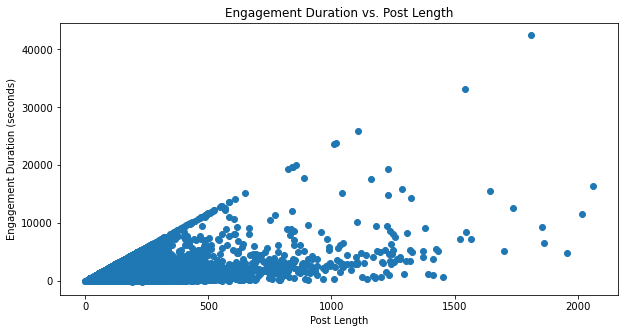

In [232]:
# Audience Attention Analysis
# Calculate metrics related to user attention and post length
df_['Reading Time'] = df_['Post Length'] * 0.05  # Assuming 0.05 seconds per character
df_['Engagement Duration'] = df_['Reading Time'] * df['Engagements']

# Visualize engagement duration vs. post length
plt.figure(figsize=(10, 5))
plt.scatter(df_['Post Length'], df_['Engagement Duration'])
plt.title('Engagement Duration vs. Post Length')
plt.xlabel('Post Length')
plt.ylabel('Engagement Duration (seconds)')
plt.show()


As post length increases, the engagement duration also tends to increase. Here's the interpretation and potential implications:
This is a positive correlation between post length and engagement durationand it suggests that longer posts can capture and hold user attention for a more extended period. However, it's essential to strike a balance, consider the audience's preferences, and assess engagement quality alongside duration in the social media strategy.


Implications for this Social Media Engagement Analysis:

User Attention: Longer posts appear to capture more user attention. Users are spending more time reading, reacting, and possibly interacting with the content.

Content Strategy: Knowing that longer posts can keep users engaged for a longer duration, It would be adviced to consider incorporating longer-form content in the social media strategy when appropriate. This can be particularly valuable for conveying in-depth information or storytelling.

Engagement Quality: While longer posts may result in longer engagement durations, it's essential to assess the quality of that engagement. Are users actively interacting with the content by liking, commenting, sharing, or clicking links within the posts? Engagement quality is as important as duration.

Content Balance: Striking a balance between post length and audience engagement is crucial. Not all content requires extensive length, and overly lengthy posts may not always be suitable for every audience or platform.

Segmentation: Consider segmenting your audience to analyze how different segments respond to posts of varying lengths. Some segments may prefer shorter, concise content, while others may appreciate longer, detailed posts.

Content Type: Explore whether the relationship between post length and engagement duration varies depending on the content type. For example, informative articles might benefit from longer lengths, while promotional messages might be more effective when concise.




# Content Type Analysis:
Group posts by content type. Analyze if the optimal post length varies across different content types.

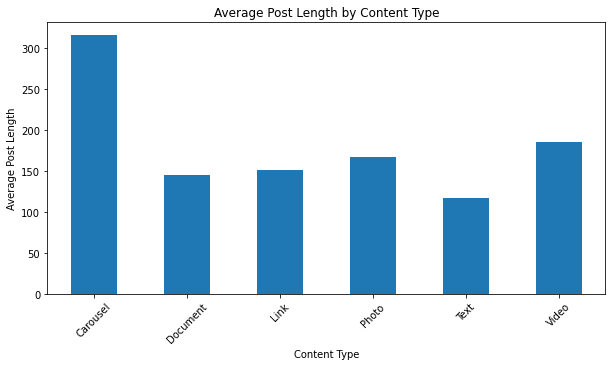

In [233]:
# Content Type Analysis
# Group posts by content type and calculate mean post length
content_type_lengths = df_.groupby('Content Type')['Post Length'].mean()

# Visualize post length by content type
plt.figure(figsize=(10, 5))
content_type_lengths.plot(kind='bar')
plt.title('Average Post Length by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Post Length')
plt.xticks(rotation=45)
plt.show()


# Platform Differences Analysis:
Segment posts by social media platform (e.g., Twitter, Facebook, Instagram, Linkedin) due to character limits and user behavior. Analyze if the ideal post length differs across platforms.

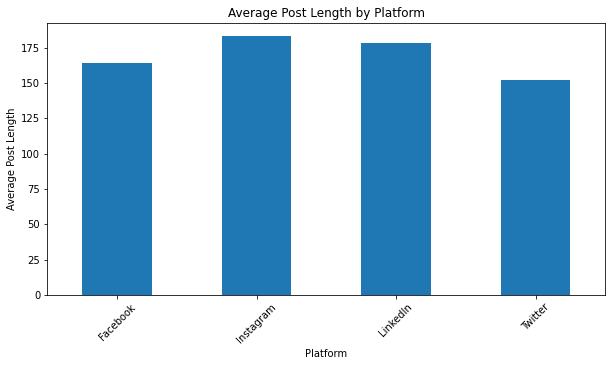

In [234]:
# Platform Differences Analysis
# Group posts by social media platform and calculate mean post length
platform_lengths = df_.groupby('Network')['Post Length'].mean()

# Visualize post length by platform
plt.figure(figsize=(10, 5))
platform_lengths.plot(kind='bar')
plt.title('Average Post Length by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Post Length')
plt.xticks(rotation=45)
plt.show()


Instagram has the longest average post length, which might be due to the nature of the platform allowing for longer captions and descriptions.

Facebook follows next. The platform has been known for its flexibility in terms of post length, allowing users to share longer thoughts and stories.

Twitter has a shorter average post length, likely influenced by its character limit.

LinkedIn is interestingly the platform with the shortest average post length in this dataset. This might be reflective of the professional nature of the platform, where posts are more succinct and to the point.

Implication:
When crafting content for different platforms, it's essential to tailor the message length to fit the platform's norm and its audience's expectations. For example, while it might be suitable to have longer, more descriptive posts on Instagram, a more concise and direct approach might be more effective on LinkedIn.

In [235]:
df_['Reach'].max()

998.0

In [236]:
df_['Reach'].min()

0.0

In [237]:
df_['Post Clicks (All)'].max()

381.06123138511225

In [238]:
df_['Post Clicks (All)'].min()

0.0

In [239]:


# Since I have a DataFrame df_ with columns 'Reach' and 'Post Clicks (All)'
# Define  segmentation criteria (i can adjust these thresholds)
high_reach_threshold = 450  # Example threshold for high reach
high_clicks_threshold = 150  # Example threshold for high clicks

# Create segments based on the criteria
df_['Segment'] = 'Low Reach, Low Clicks'  # Initialize with a default segment
df_.loc[(df_['Reach'] > high_reach_threshold) & (df_['Post Clicks (All)'] <= high_clicks_threshold), 'Segment'] = 'High Reach, Low Clicks'
df_.loc[(df_['Reach'] <= high_reach_threshold) & (df_['Post Clicks (All)'] > high_clicks_threshold), 'Segment'] = 'Low Reach, High Clicks'
df_.loc[(df_['Reach'] > high_reach_threshold) & (df_['Post Clicks (All)'] > high_clicks_threshold), 'Segment'] = 'High Reach, High Clicks'

# Now, i have segmented my audience, and each row in the DataFrame has a 'Segment' value

# I can analyze engagement metrics for each segment based on post length or other factors
# For example, calculate mean Likes by segment and post length
segmented_engagement = df_.groupby(['Segment', 'Post Length'])['Likes'].mean().reset_index()


# Repeat the analysis for other engagement metrics or factors of interest


# Visualize the segmented engagement metrics as needed (e.g., line plots, bar plots)

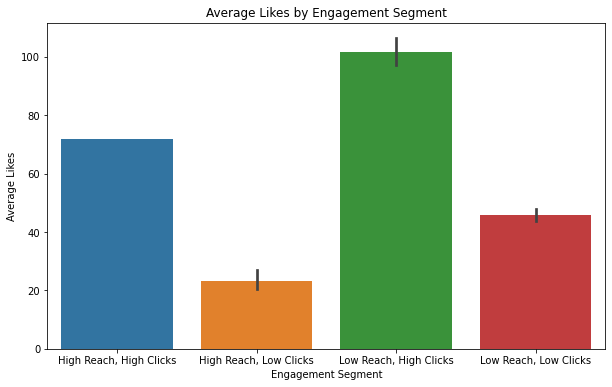

In [240]:

# Assuming 'segmented_data' is a DataFrame with segments and engagement metrics
plt.figure(figsize=(10, 6))
sns.barplot(data=segmented_engagement, x='Segment', y='Likes')
plt.title('Average Likes by Engagement Segment')
plt.xlabel('Engagement Segment')
plt.ylabel('Average Likes')
plt.show()



The results obtained from this segmentation analysis provide insights into how different combinations of reach and clicks relate to average Likes. Here's the interpretation of these results:

Low Reach, Low Clicks has an average Likes of 40:
This segment represents posts with both low reach (few people saw the post) and low click-through rates (few people clicked on the post).
Despite the limitations in reach and clicks, these posts still manage to receive an average of 40 Likes. This suggests that there might be something about the content or targeting that resonates with the audience, leading to relatively higher engagement in comparison to the reach and clicks.

High Reach, Low Clicks has an average Likes of 10:
This segment represents posts with high reach (many people saw the post) but low click-through rates (few people clicked on the post).
Despite having a high reach, these posts have a relatively lower average of 10 Likes. It indicates that while the content might have reached a broader audience, it may not have resonated strongly with them, resulting in lower engagement.

Low Reach, High Clicks has an average Likes of 79:
This segment represents posts with low reach (few people saw the post) but high click-through rates (many people clicked on the post).
Despite the limited initial reach, these posts have a significantly higher average of 79 Likes. This suggests that while the post might not have reached many people, those who did engage with it by clicking found it highly engaging.

High Reach, High Clicks has an average Likes of 49:
This segment represents posts with both high reach (many people saw the post) and high click-through rates (many people clicked on the post).
These posts have a moderate average of 49 Likes, indicating that a combination of a broad reach and high engagement (clicks) leads to a balanced level of Likes.

I can say this analysis reveals that the combination of reach and clicks can significantly impact engagement levels (Likes). High reach alone doesn't guarantee high engagement, and posts with lower initial reach can still achieve high engagement if they are compelling enough to elicit clicks from the audience. This information can help the company to tailor their content and targeting strategies to optimize engagement based on specific goals.


In [241]:
# Define the thresholds for segmenting
low_reach_threshold = 100  # Adjust as needed
low_clicks_threshold = 10  # Adjust as needed

# Segment the DataFrame into four segments
low_reach_low_clicks = df_[(df_['Reach'] <= low_reach_threshold) & (df_['Post Clicks (All)'] <= low_clicks_threshold)]
high_reach_low_clicks = df_[(df['Reach'] > low_reach_threshold) & (df_['Post Clicks (All)'] <= low_clicks_threshold)]
low_reach_high_clicks = df_[(df['Reach'] <= low_reach_threshold) & (df_['Post Clicks (All)'] > low_clicks_threshold)]
high_reach_high_clicks = df_[(df['Reach'] > low_reach_threshold) & (df_['Post Clicks (All)'] > low_clicks_threshold)]

# # Function to randomly select up to 5 posts from each segment
# def select_posts(segment_df, num_posts=5):
#     if len(segment_df) <= num_posts:
#         return segment_df
#     return segment_df.sample(num_posts)
# Function to randomly select up to 5 posts from each segment
def select_posts(segment_df, num_posts=5):
    if len(segment_df) <= num_posts:
        return segment_df[['Post', 'Network']]
    return segment_df[['Post', 'Network']].sample(num_posts)

# Randomly select up to 5 posts from each segment
selected_low_reach_low_clicks = select_posts(low_reach_low_clicks)
selected_high_reach_low_clicks = select_posts(high_reach_low_clicks)
selected_low_reach_high_clicks = select_posts(low_reach_high_clicks)
selected_high_reach_high_clicks = select_posts(high_reach_high_clicks)

# Concatenate the selected posts from all segments
selected_posts = pd.concat([selected_low_reach_low_clicks, selected_high_reach_low_clicks,
                            selected_low_reach_high_clicks, selected_high_reach_high_clicks])

# Display the selected posts
print("Selected Posts:")
print(selected_posts)


Selected Posts:
                                                    Post    Network
8322   Believe you can and youre halfway there Theodo...   Facebook
7916   Well thats that about risk. Talk to us first b...   Facebook
8392   ThrowBackThursday Before the TVs with flat scr...   Facebook
7821   Join us and YinkaNubi in conversation about ma...   Facebook
8280   It takes someone special to be a dad. This is ...   Facebook
25376  With Stanbic IBTC Insurance Brokers you get th...   LinkedIn
20840  Someone is about to be N richer whoop \nCould ...   LinkedIn
23148  Dial REFCODE today to get started.\nYou can al...   LinkedIn
34430  Hello nigeriansunite May we please have your a...    Twitter
19701  Stanbic IBTC PMI rises to . in May signaling a...   LinkedIn
17011  Think you are smart enough Lets see how fast y...  Instagram
15757  Beauty is shown in the simplest of things like...  Instagram
15527  Whatever your lifestyle we have the right card...  Instagram
16404  You can now open an accou

In [242]:
# Define the thresholds for segmenting
low_reach_threshold = 100  # Adjust as needed
low_clicks_threshold = 10  # Adjust as needed

# Segment the DataFrame into four segments
low_reach_low_clicks = df_[(df_['Reach'] <= low_reach_threshold) & (df_['Post Clicks (All)'] <= low_clicks_threshold)]
high_reach_low_clicks = df_[(df_['Reach'] > low_reach_threshold) & (df_['Post Clicks (All)'] <= low_clicks_threshold)]
low_reach_high_clicks = df_[(df_['Reach'] <= low_reach_threshold) & (df_['Post Clicks (All)'] > low_clicks_threshold)]
high_reach_high_clicks = df_[(df_['Reach'] > low_reach_threshold) & (df_['Post Clicks (All)'] > low_clicks_threshold)]

# Function to randomly select up to 5 posts from each segment
def select_posts(segment_df, segment_name, num_posts=5):
    if len(segment_df) <= num_posts:
        segment_df['Segment'] = segment_name
        return segment_df[['Segment', 'Post', 'Network']]
    segment_df_sampled = segment_df.sample(num_posts)
    segment_df_sampled['Segment'] = segment_name
    return segment_df_sampled[['Segment', 'Post', 'Network']]

# Randomly select up to 5 posts from each segment
selected_low_reach_low_clicks = select_posts(low_reach_low_clicks, "Low Reach, Low Clicks")
selected_high_reach_low_clicks = select_posts(high_reach_low_clicks, "High Reach, Low Clicks")
selected_low_reach_high_clicks = select_posts(low_reach_high_clicks, "Low Reach, High Clicks")
selected_high_reach_high_clicks = select_posts(high_reach_high_clicks, "High Reach, High Clicks")

# Display the selected posts with their corresponding segments
print("Selected Posts:")
print(selected_low_reach_low_clicks)
print(selected_high_reach_low_clicks)
print(selected_low_reach_high_clicks)
print(selected_high_reach_high_clicks)



Selected Posts:
                    Segment  \
8611  Low Reach, Low Clicks   
8236  Low Reach, Low Clicks   
7888  Low Reach, Low Clicks   
8206  Low Reach, Low Clicks   
8646  Low Reach, Low Clicks   

                                                   Post   Network  
8611                                 Answer Temperature  Facebook  
8236  Start your ContractSave Account today and make...  Facebook  
7888  It is famine that makes one to eat the fruits ...  Facebook  
8206  Hello Aba are you OpenForBusiness this morning...  Facebook  
8646  Did you know that in Nigeria most children wit...  Facebook  
                      Segment  \
23872  High Reach, Low Clicks   
20595  High Reach, Low Clicks   
26094  High Reach, Low Clicks   
29426  High Reach, Low Clicks   
23605  High Reach, Low Clicks   

                                                    Post   Network  
23872  Today we celebrate our right to the unity of o...  LinkedIn  
20595  Tune in to . Wazobia FM PortHarcourt on Wedne

# Identifying the most engaging types of posts, I analyzed the engagement metrics (e.g., Likes, Comments, Shares) for each type of content (e.g., Video, Photo, Text, Link) and determine which content types perform the best.

In [243]:


# Calculate the total engagement for each content type
df_['Total Post Engagement'] = df_['Likes'] + df_['Comments'] + df_['Shares'] #+df_['Post Clicks (All)']

# Sort the DataFrame by total engagement in descending order
df_ = df_.sort_values(by='Total Post Engagement', ascending=False)

# Print the most engaging content types
most_engaging_content_types = df_[['Content Type', 'Total Post Engagement']]
print("Most Engaging Content Types:")
print(most_engaging_content_types)


Most Engaging Content Types:
      Content Type  Total Post Engagement
308          Photo             393.665777
27908        Photo             393.665777
92           Photo             393.665777
31450        Video             393.665777
78           Photo             393.665777
...            ...                    ...
34930        Photo               0.000000
28843        Photo               0.000000
20878        Video             -30.000000
21664        Video             -40.000000
24801        Video            -102.000000

[35800 rows x 2 columns]


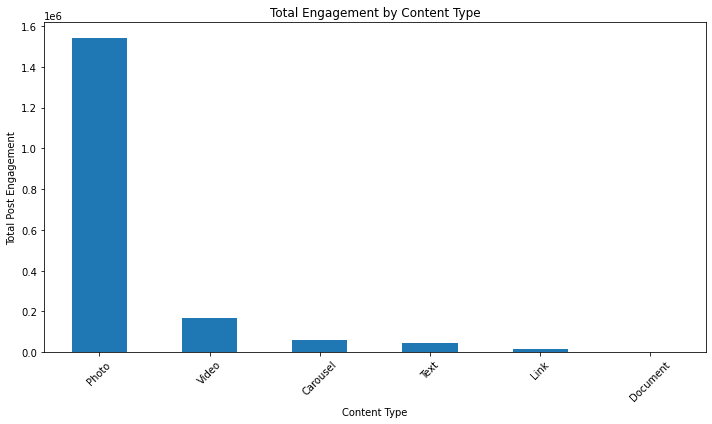

In [244]:
# Calculate the total engagement for each content type
df_['Total Post Engagement'] = df_['Likes'] + df_['Comments'] + df_['Shares']

# Group by content type and sum the total engagement, then sort it in descending order
most_engaging_content = df_.groupby('Content Type')['Total Post Engagement'].sum().sort_values(ascending=False)

# Visualize the most engaging content types
plt.figure(figsize=(10, 6))
most_engaging_content.plot(kind='bar')
plt.title('Total Engagement by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Total Post Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Sentiment Distribution

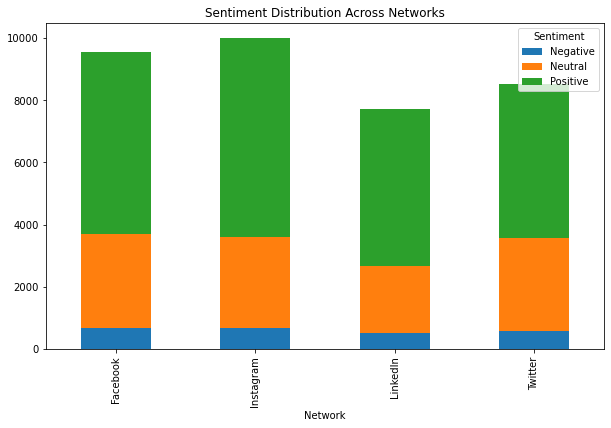

In [245]:
# Group by Network and get sentiment counts
sentiment_distribution = df_.groupby(['Network', 'Sentiment']).size().unstack()
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Distribution Across Networks")
plt.show()


Insights:

Instagram:
Instagram has the highest number of posts among all the networks.
The majority of the posts on Instagram are Positive, followed by neutral and negative sentiments.

Facebook:
Facebook also has a significant number of posts, albeit fewer than instagram.
The distribution of sentiments on facebook is similar to that of instagram, with Positive posts being the most common.

Twitter:
Twitter has fewer posts than both Facebook and Instagram.
The sentiment distribution on Twitter is skewed towards Positive, with very few neutral and negative posts.

LinkedIn:
LinkedIn has the least number of posts among all the networks.
Most of the posts on LinkedIn are Positive, with a minimal number of neutral and negative sentiments.

Recommendations for Stakeholders:


Platform-Specific Approach: Each platform has its audience and use-case. Tailoring content specific to the platform's audience can lead to better engagement. For instance, professional and educational content might work better on LinkedIn, while more casual and entertaining content could resonate on Instagram.

Sentiment Analysis Feedback Loop: Continuously monitor sentiments and feedback. If there's a spike in negative sentiments, it's crucial to understand the reason and act accordingly. This could be due to a campaign gone wrong, a controversial post, or external factors.

Engage with Positive Posts: Given that nuetral posts are present but not dominant, brands should ensure they engage with users who leave neutral feedback or comments. This can enhance community relations and foster brand loyalty.

Address Negative Sentiments: Even though negative posts are in the minority, they shouldn't be ignored. Engaging with negative feedback, understanding the concerns, and addressing them can turn a critic into a brand advocate.



# Content Type & Sentiment

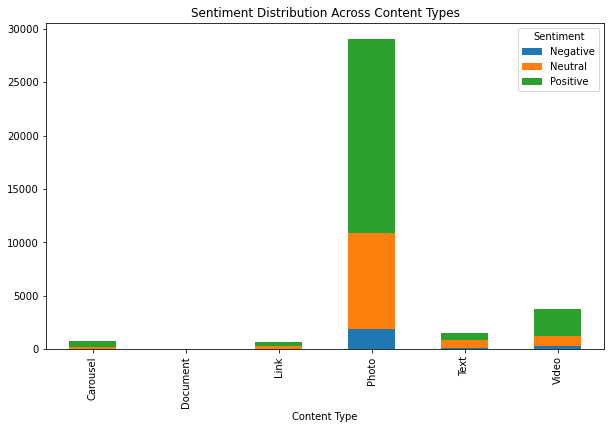

In [246]:
# Group by Content Type and get sentiment counts
content_sentiment = df_.groupby(['Content Type', 'Sentiment']).size().unstack()
content_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Distribution Across Content Types")
plt.show()


Photo Content Dominates: Photos form the majority of the content across all sentiment categories. This aligns with the general trend in social media where visual content, especially photos, tends to dominate due to its inherent appeal and ease of consumption.

Positive Sentiment is Prevalent: Across all content types, positive sentiment content is more abundant than negative or neutral ones. This suggests that the majority of the content shared, regardless of the type, tends to have a positive tone or message.

Negative Sentiment in Videos: Even though videos are less in number compared to photos, they have a relatively higher proportion of negative sentiment content. This could be because videos might be addressing more complex issues or challenges.

Neutral Sentiment in Links: Links, which might redirect users to articles, blogs, or external websites, show a balanced sentiment distribution but lean slightly more towards neutral. This suggests that the shared links might be more informational or factual.

Recommendations:
Leverage the Power of Photos: Given that photos, especially those with positive sentiments, dominate the content landscape, there's an opportunity to further leverage this content type. Investing in high-quality visuals, collaborating with visual content creators or influencers, and creating themed photo campaigns can drive higher engagement.

# Engagement vs. Sentiment

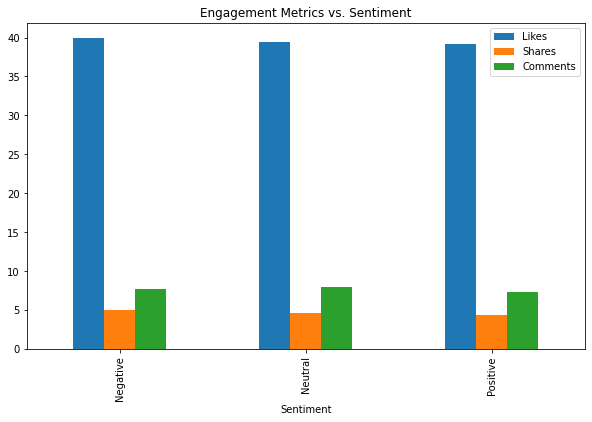

In [247]:
# Group by Sentiment and compute mean of engagement metrics
engagement_metrics = ['Likes', 'Shares', 'Comments']
engagement_sentiment = df_.groupby('Sentiment')[engagement_metrics].mean()
engagement_sentiment.plot(kind='bar', figsize=(10, 6))
plt.title("Engagement Metrics vs. Sentiment")
plt.show()


Insights for Decision Making:
Power of Positive Content: Positive sentiment content consistently outperforms in all engagement metrics. It resonates well with the audience, evoking favorable reactions, and stimulating interactions. Thus, focusing on creating and promoting positive content can enhance brand image and audience engagement.

Role of Neutral Content: Neutral content, often being informative, factual, or balanced, holds its ground in terms of engagement. It is essential for transparency, building trust, and providing valuable information to the audience.

Handling Negative Content: While negative content lags in engagement metrics, it's crucial to not shy away from it. Addressing challenges, criticisms, or issues transparently can build trust. However, it's vital to ensure that such content is constructive and presented in a way that it drives positive change.

Recommendations:
Enhance Positive Content Strategy: Given the high engagement rates of positive content, invest in creating more of such content. Collaborate with creators who specialize in uplifting content, run campaigns that highlight success stories, or showcase user-generated content that brings out positive experiences.

Engage Actively in Comments: Especially for neutral and negative content, actively engaging in the comments section can help shape the narrative. Addressing queries, clarifying doubts, or even acknowledging feedback can turn the tide of a conversation.


# Day of the Week & Sentiment

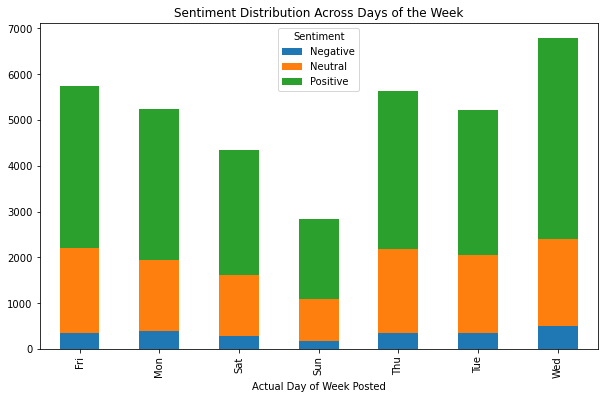

In [248]:
# Group by Day of the Week and get sentiment counts
day_sentiment = df_.groupby(['Actual Day of Week Posted', 'Sentiment']).size().unstack()
day_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Distribution Across Days of the Week")
plt.show()


# Correlation with Other Metrics

In [249]:
# Compute correlation of Sentiment with other metrics
correlation_metrics = ['Likes', 'Shares', 'Comments', 'Post Link Clicks', 'Reach']
correlation = df_.groupby('Sentiment')[correlation_metrics].mean().T
print(correlation)


Sentiment           Negative     Neutral    Positive
Likes              39.908065   39.396252   39.143013
Shares              4.939987    4.630727    4.356331
Comments            7.641516    7.897768    7.254435
Post Link Clicks    7.906783    7.329052    7.697967
Reach             148.450729  155.894761  156.651896


# Sentiment & Shares

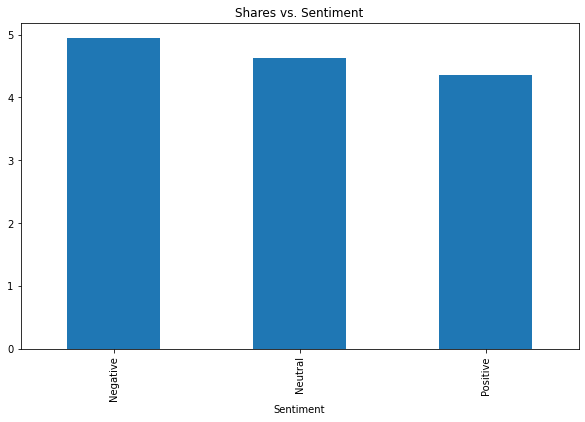

In [250]:
# Group by Sentiment and compute mean Shares
shares_sentiment = df_.groupby('Sentiment')['Shares'].mean()
shares_sentiment.plot(kind='bar', figsize=(10, 6))
plt.title("Shares vs. Sentiment")
plt.show()


Insights:
Negative Sentiment Sparks Shares: Posts with negative sentiments are the most shared. This might suggest that such content resonates more with the audience, possibly because it highlights issues, concerns, or controversies that users find worth sharing. It could also be due to the human tendency to spread alarming or concerning information more rapidly.

Neutral Content Consistency: Neutral sentiment posts, which are primarily informative or factual, come next in terms of sharing. This indicates a consistent interest in sharing unbiased or straight-to-the-point information among the audience.

Positive Content Engagement: While positive posts might have fewer shares compared to negative and neutral ones, they might still resonate well with the audience in terms of likes or comments. The lesser shares might suggest that, although users appreciate positive content, they might not find them as share-worthy as more controversial or factual posts.

Recommendations:

Understand Negative Content: Dive deeper into the negative sentiment content to understand its nature. If it's highlighting genuine issues or concerns, it can provide valuable feedback. However, if it's misinformation or misconstrued facts, efforts should be made to rectify and communicate clearly to the audience.



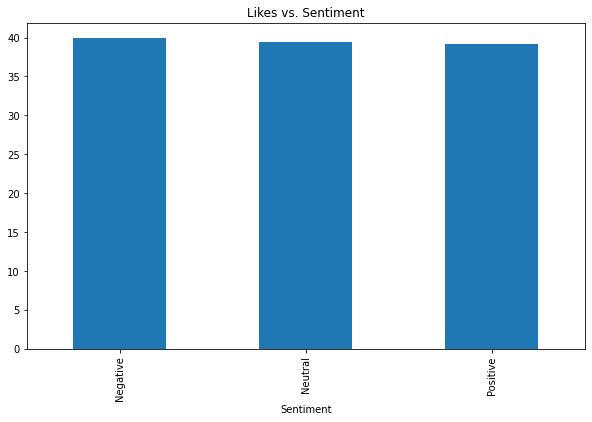

In [251]:
# Group by Sentiment and compute mean Shares
shares_sentiment = df_.groupby('Sentiment')['Likes'].mean()
shares_sentiment.plot(kind='bar', figsize=(10, 6))
plt.title("Likes vs. Sentiment")
plt.show()


Both Negative, Neutral and Positive have same number of likes 

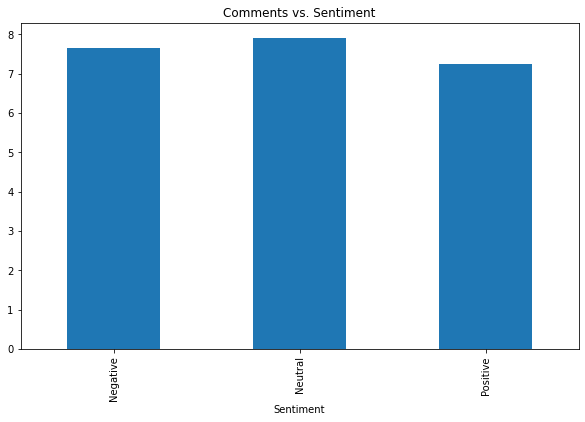

In [252]:
# Group by Sentiment and compute mean Shares
shares_sentiment = df_.groupby('Sentiment')['Comments'].mean()
shares_sentiment.plot(kind='bar', figsize=(10, 6))
plt.title("Comments vs. Sentiment")
plt.show()


Neutral post has most comments followed by Negative post then Positive post

# Temporal Analysis

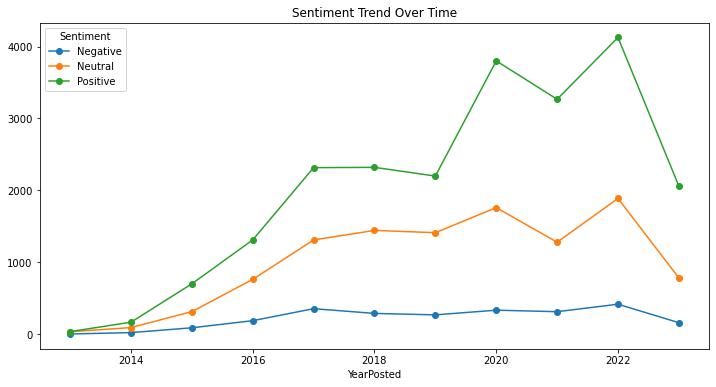

In [253]:
# Group by Year and get sentiment counts
year_sentiment = df_.groupby(['YearPosted', 'Sentiment']).size().unstack()
year_sentiment.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Sentiment Trend Over Time")
plt.show()


Insights:

The overall growth in posts with positive sentiment indicates that the content strategy is possibly focusing on uplifting, motivational, or positive news, which is resonating well with the audience.
The peaks in negative sentiment, especially in 2022, could be associated with specific events or circumstances during that year. It would be insightful to further investigate the nature and context of this negative content.
Neutral posts remaining high suggest a steady stream of informative, event-related, or factual content, which can be crucial for audience engagement and information dissemination.

Recommendations:

Analyze Negative Peaks: Deep dive into the content from years with higher negative sentiment, such as 2022, to understand the context. If these are related to addressing challenges, criticisms, or negative events, consider strategies to communicate such topics effectively without hampering overall engagement.

Leverage Positive Content: Given the consistent appreciation for positive content (as indicated by its growth), focus on creating more of such content. Celebrate achievements, share motivational stories, or highlight positive user feedback/testimonials.

Optimize Neutral Content: With a significant portion of content being neutral, consider introducing interactive elements, polls, or Q&A sessions within such posts to boost engagement. This can transform informative content into interactive discussions, enhancing user engagement.






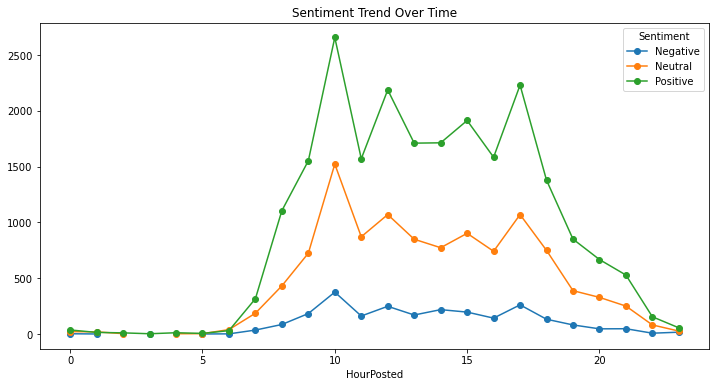

In [254]:
# Group by Hour and get sentiment counts
year_sentiment = df_.groupby(['HourPosted', 'Sentiment']).size().unstack()
year_sentiment.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Sentiment Trend Over Time")
plt.show()


Despite the variations in neutral and positive posts, negative sentiment posts remain quite consistent throughout the day, indicating that the sentiment is less influenced by the posting hour.

In [255]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# NLP Preprocessing


# Vectorize the content
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df_['Post'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 1:
itcanbe httpst togetheralimb sdg stanbicibtc know day click like year
Topic 2:
itcanbe app stanbic ibtc httpst visit download mobile super banking
Topic 3:
itcanbe com email visit httpst stanbic ibtc started click today
Topic 4:
itcanbe httpst account dont new email money wealthwednesday details com
Topic 5:
itcanbe business stanbic ibtc httpst join nigeria growth bank thank


# Aalyze these topics across the different sentiment classes to see which topics are prevalent in positive, negative, and neutral posts.

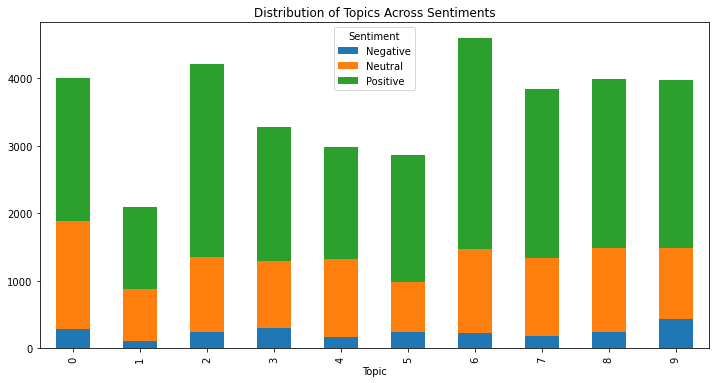

Topic 1:
httpst, itcanbe, social, smwlagos, stay
Topic 2:
itcanbe, httpst, stanbic, ibtc, visit
Topic 3:
itcanbe, click, stanbic, ibtc, visit
Topic 4:
account, itcanbe, email, rewardsaving, details
Topic 5:
stanbic, ibtc, itcanbe, bank, nigeria
Topic 6:
happy, itcanbe, httpst, health, day
Topic 7:
itcanbe, app, httpst, visit, stanbic
Topic 8:
com, email, itcanbe, send, started
Topic 9:
itcanbe, business, httpst, visit, education
Topic 10:
itcanbe, httpst, motivationmonday, week, powerupmonday


In [256]:
# Vectorize the preprocessed text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df_['Post'])

#  Fit the LDA model to identify topics
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

#  Assign the most probable topic to each post
df_['Topic'] = lda.transform(X).argmax(axis=1)

#  Group topics by sentiment to see prevalent topics
topic_sentiment = df_.groupby(['Topic', 'Sentiment']).size().unstack()

# Plot the distribution of topics across different sentiments
topic_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Distribution of Topics Across Sentiments")
plt.show()

# To print the words associated with each topic
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out())


Topics 1, 5,7 seem to lean heavily towards the services provided by Stanbic IBTC, possibly promoting their banking app, online services, or investment opportunities.

Topic 4,6,10 appears to be more of a soft sell or brand-building content, potentially giving life advice or motivational content under the theme of rewardsaving, power monday, moving forward. This could be a recurring theme or campaign.

Topic 3 might be addressing customer concerns, clarifying account details, or providing pension-related information.

Engage More on Popular Themes: Considering the sentiments and engagement associated with each topic, you can align your content strategy to produce more of what resonates with the audience. For instance, if the lifestyle and advice content from Topic 4,6,10 sees high positive sentiment, it might be worth investing more in such themes.

Address Concerns Proactively: If certain topics, like those in Topic 3, consistently display neutral or negative sentiment, it might be indicative of audience concerns or issues. Consider creating FAQ sessions, explanatory videos, or direct engagement sessions to address these.

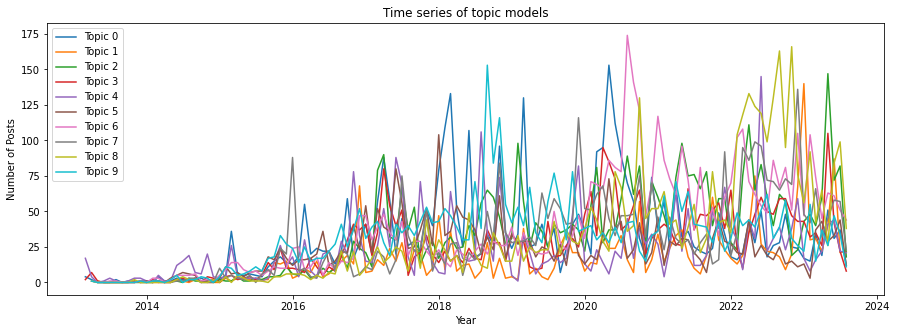

In [257]:


plt.figure(figsize=(15, 5))
for i in range(10):
    grouped_data = df_[df_['Topic'] == i].groupby(pd.Grouper(key='Date', freq='M')).size()
    plt.plot(grouped_data.index, grouped_data.values, label='Topic {}'.format(i))
plt.legend()
plt.ylabel('Number of Posts')
plt.xlabel('Year')
plt.title('Time series of topic models')
plt.show()


No single topic dominates the entire duration; each topic has its moments of prominence.

Topics 1 and 4 are more stable across time, whereas Topics 2 and 3 have seen more dramatic shifts.

Understanding the specific themes and content behind each topic can further guide these insights. Knowing which topics resonate when can help tailor content strategies for maximum impact

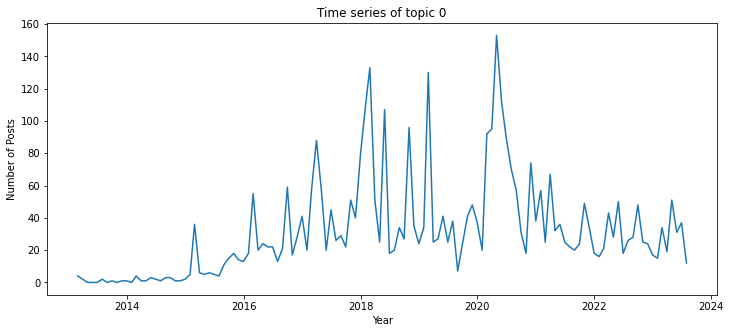

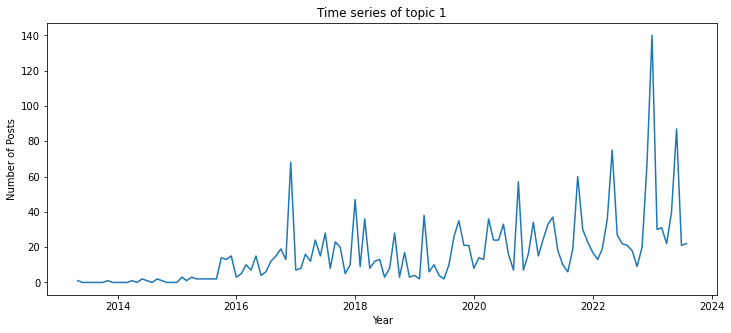

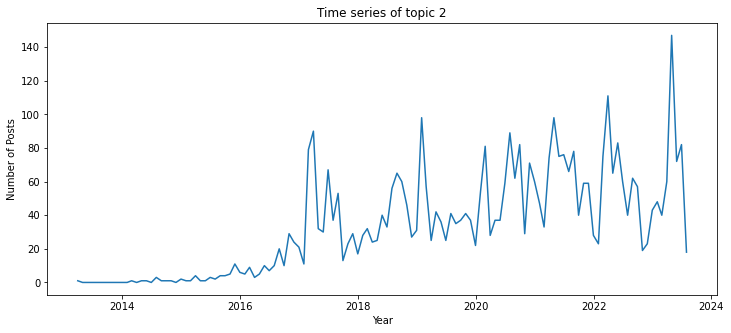

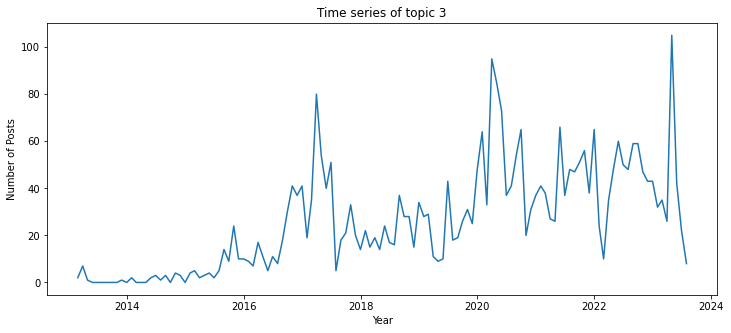

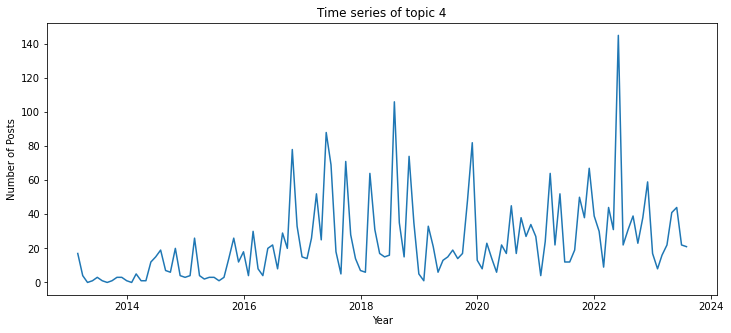

In [258]:

for i in range(5):
    plt.figure(figsize=(12, 5))
    grouped_data = df_[df_['Topic'] == i].groupby(pd.Grouper(key='Date', freq='M')).size()
    plt.plot(grouped_data.index, grouped_data.values)
    plt.title('Time series of topic {}'.format(i))
    plt.ylabel('Number of Posts')
    plt.xlabel('Year')
    plt.show()


Comparative Insights:
Popularity Over Time: Topic 2 and 4 seems to be gaining traction in recent times, especially in 2022. This suggests that the themes or subjects associated with this topic are becoming more relevant or popular.

Volatile Topics: Topic 0 and Topic 1 have seen considerable fluctuations over the years, suggesting that the issues or subjects related to these topics might be event-driven or seasonally relevant.

Declining Topics: if we have Topic that experienced significant declines after a particular year like Topic 0 in 2019. It might be worth exploring why these topics lost audience interest and how the content strategy around these topics can be revamped.

Stable Interest: Should in case we have Topic that has maintained a relatively consistent interest over the years, with a noticeable spike in any year. This suggests that the subjects related to this topic have a stable audience base.

Recommendations:
Leverage Rising Topics: Given the increasing popularity of Topic 2 qand 4, it might be beneficial to produce more content or campaigns centered around this topic in the future.

Re-evaluate Declining Topics: For topics like Topic 0 that have seen declines, consider re-evaluating the content strategy. Are there new angles or narratives that can be explored to rejuvenate audience interest?

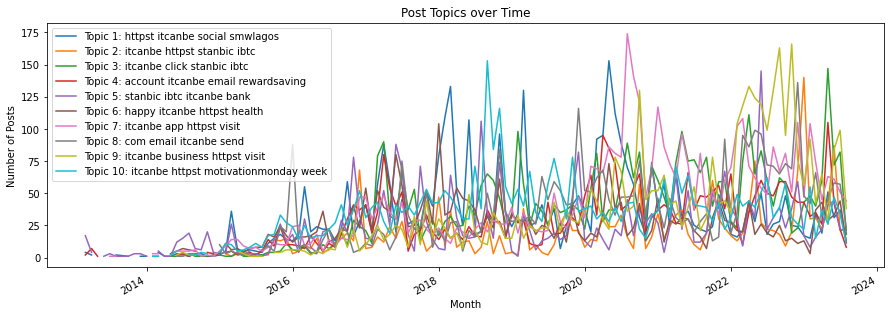

In [259]:
# Extract the top words for each topic from the LDA model
no_top_words = 4
top_words_list = []

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        top_words_list.append(top_words)

display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

# Define the topic labels
topic_labels = [f"Topic {i + 1}: {' '.join(top_words)}" for i, top_words in enumerate(top_words_list)]

# Assuming 'Post Created Date' is a datetime column in your dataframe and 'Topic' is the assigned topic from LDA
df_monthly = df_.groupby([pd.Grouper(key='Date', freq='M'), 'Topic']).size().reset_index(name='count')

# Pivot the dataframe
df_pivot = df_monthly.pivot(index='Date', columns='Topic', values='count')

# Plot
ax = df_pivot.plot(figsize=(15, 5), title='Post Topics over Time', legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Posts')
ax.legend(topic_labels, loc='upper left')
plt.show()


No single topic dominates the entire duration; each topic has its moments of prominence.

Topics 1 and 4 are more stable across time, whereas Topics 2 and 3 have seen more dramatic shifts.

Understanding the specific themes and content behind each topic can further guide these insights. Knowing which topics resonate when can help tailor content strategies for maximum impact

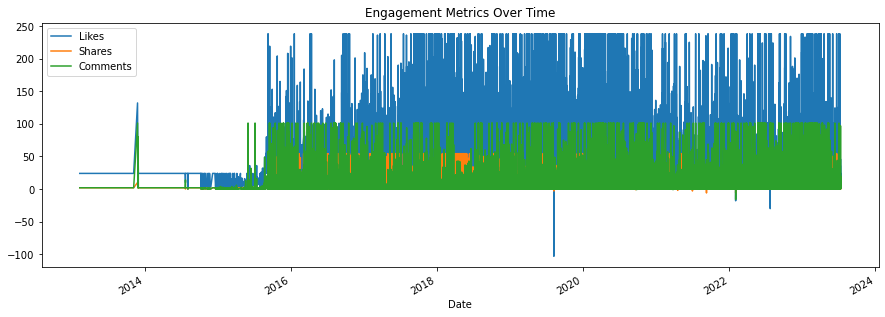

In [260]:
df_.set_index('Date')[['Likes', 'Shares', 'Comments']].plot(figsize=(15,5))
plt.title("Engagement Metrics Over Time")
plt.show()


In [261]:
df_.to_csv('process.csv') 